In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Define the log file path in your Google Drive
log_file_path = '/content/drive/My Drive/TTDS_Project/log.txt'

# Ensure the folder exists
os.makedirs(os.path.dirname(log_file_path), exist_ok=True)

# Function to log activities without a timestamp
def log_activity(message):
    log_message = f"{message}\n"
    with open(log_file_path, 'a') as log_file:
        log_file.write(log_message)

# Example usage
log_activity("Initialized the project log file.")
log_activity("Added a new feature to the project.")
log_activity("Analyzed dataset and created visualizations.")


In [ ]:
def log_decorator(func):
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        log_activity(f"Executed {func.__name__} with args: {args} kwargs: {kwargs}")
        return result
    return wrapper

In [ ]:
@log_decorator
def my_function(x, y):
    return x + y

@log_decorator
def another_function(data):
    return [item * 2 for item in data]

# Example calls
result1 = my_function(3, 5)
result2 = another_function([1, 2, 3, 4])


In [ ]:
# Step 1: Load the Dataset

file_path = '/content/drive/My Drive/TTDS_Project/propertyDataTorontoCombined.csv'  # Update this path if needed
# Read the CSV file, handling errors by skipping bad lines
property_data = pd.read_csv(file_path, on_bad_lines='skip')
log_activity("Loading dataset from Google Drive.")


<ipython-input-5-979a47e96933>:7: DtypeWarning: Columns (47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,137,139,140,141,142,147,151,152,153,154,156,157,158,159,162,163,164,165,166,167,168,169,170,171,174,175,193,195,196,199,202,203,204,205,206,207,208,209,210,211,212,215,218,219,232,233,234,237,238,239,240,243,244,246,248,249,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,283,285,288,289,290,291,292,293,294,295,296,297,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392) have mixed types. Specify dtype option on import or set low_m

In [ ]:

property_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 125070 entries, ('1996565', 'E171154', 'TREB', 'archive_condo_digits', '703', '115', 'Omni', 'Dr', nan) to (2393765, 'C341219', 'TREB', 'archive_free_digits', nan, 349, '"Briar Hill"', 'Ave', nan)
Columns: 393 entries, id to longitude.1
dtypes: float64(22), object(371)
memory usage: 387.7+ MB


In [ ]:
@log_decorator
def analyze_nulls(property_data):
    null_sums = property_data.isna().sum()
    sorted_null_columns = sorted(null_sums.items(), key=lambda x: x[1], reverse=False)  # Change reverse=True for descending
    for column, null_count in sorted_null_columns:
        print(f"{column}: {null_count}")
    return sorted_null_columns
sorted_null_columns = analyze_nulls(property_data)

id: 0
mls_num: 0
feed_type: 0
reference_table: 0
street_number: 0
street_name: 0
community: 0
municipality: 0
area: 0
address: 0
property_key: 0
bedrooms: 0
bedrooms_plus: 0
bedrooms_total: 0
washrooms: 0
kitchens: 0
kitchens_plus: 0
garage_spaces: 0
parking_spaces: 0
total_parking_spaces: 0
days_on_market: 0
list_price: 0
sold_price: 0
status: 0
sale_lease: 0
listing_entry_date: 0
sold_date: 0
expiry_date: 0
suspended_date: 0
terminated_date: 0
close_date: 2
updated_timestamp: 2
type: 5
images_available: 182
style: 254
exterior: 262
remarks_for_clients: 2013
street_abbrivation: 4896
extras: 5305
garage_type: 27657
for_sale_most_recent: 55051
apartment_number: 55580
sqft: 71020
brokerage: 89232
pix_updated_timestamp: 90794
rm9_wth: 106506
addl_mo_fee: 106506
addr: 106506
input_date: 106506
ld: 106506
maint: 106506
ml_num: 106506
mmap_page: 106506
num_kit: 106506
orig_dol: 106506
park_chgs: 106506
park_spcs: 106506
perc_dif: 106506
rm1_len: 106506
rm1_wth: 106506
rm10_len: 106506
rm10_w

In [ ]:
selected_columns = ['community','municipality', 'feed_type', 'type', 'area', 'address','bedrooms', 'bedrooms_plus', 'bedrooms_total', 'washrooms', 'kitchens', 'kitchens_plus', 'garage_spaces', 'parking_spaces', 'total_parking_spaces', 'list_price', 'sold_price', 'status', 'sale_lease', 'style', 'exterior', 'garage_type', 'sqft', 'brokerage', ]
company_features = ['municipality', 'community', 'feed_type','type', 'style', 'basement', 'exterior', 'garage_type', 'rooms_plus', 'rooms', 'washrooms', 'kitchens', 'kitchens_plus', 'longitude', 'lotdepth', 'lotfront', 'lat.1', 'lat', 'street_number']

@log_decorator
def selected_initialized_features(property_data, company_features, selected_columns):
  combine_features = list(set(selected_columns + company_features))
  print(combine_features)
  property_data = property_data[combine_features]
  return property_data
property_data = selected_initialized_features(property_data, company_features, selected_columns)

['lotdepth', 'area', 'brokerage', 'community', 'list_price', 'feed_type', 'status', 'sale_lease', 'lat', 'bedrooms_plus', 'washrooms', 'exterior', 'bedrooms_total', 'street_number', 'total_parking_spaces', 'garage_type', 'sqft', 'lotfront', 'sold_price', 'type', 'basement', 'kitchens_plus', 'style', 'longitude', 'rooms_plus', 'lat.1', 'rooms', 'address', 'garage_spaces', 'bedrooms', 'municipality', 'kitchens', 'parking_spaces']


In [ ]:
combine_features = list(set(selected_columns + company_features))
combine_features


['lotdepth',
 'area',
 'brokerage',
 'community',
 'list_price',
 'feed_type',
 'status',
 'sale_lease',
 'lat',
 'bedrooms_plus',
 'washrooms',
 'exterior',
 'bedrooms_total',
 'street_number',
 'total_parking_spaces',
 'garage_type',
 'sqft',
 'lotfront',
 'sold_price',
 'type',
 'basement',
 'kitchens_plus',
 'style',
 'longitude',
 'rooms_plus',
 'lat.1',
 'rooms',
 'address',
 'garage_spaces',
 'bedrooms',
 'municipality',
 'kitchens',
 'parking_spaces']

In [ ]:
property_data.head()

lotdepth     area                               brokerage  \
0      NaN  Toronto                                     NaN   
1      NaN  Toronto                                     NaN   
2      NaN  Toronto                                     NaN   
3      NaN  Toronto  HOMELIFE/MIRACLE REALTY LTD, BROKERAGE   
4      NaN  Toronto                                     NaN   

                           community  list_price feed_type   status  \
0                            Bendale      209900      TREB     Sold   
1                            Niagara      279900      TREB  Expired   
2                    South Riverdale      299900      TREB     Sold   
3                            Malvern      380000      TREB  Expired   
4  Mount Olive-Silverstone-Jamestown        1275      TREB     Sold   

  sale_lease  lat  bedrooms_plus  ...  longitude rooms_plus  lat.1 rooms  \
0       Sale  NaN              0  ...        NaN        NaN    NaN   6.0   
1       Sale  NaN              0  ...        NaN        NaN    NaN   5.0   
2       Sale  NaN              0  ...        NaN        NaN    NaN   2.0   
3       Sale  NaN              0  ...        NaN        0.0    NaN   NaN   
4      Lease  NaN              1  ...        NaN        NaN    NaN   5.0   

           address garage_spaces bedrooms municipality  kitchens  \
0      115 Omni Dr             1        3      Toronto         1   
1   1000 King St W             1        2      Toronto         1   
2   326 Carlaw Ave             0        1      Toronto         1   
3  1795 Markham Rd             2        3      Toronto         1   
4    5 Rowntree Rd             1        2      Toronto         1   

  parking_spaces  
0              1  
1              1  
2              0  
3              2  
4              0  

[5 rows x 33 columns]

In [ ]:
@log_decorator
def separate_features(data):
    string_features = [col for col in data.columns if data[col].dtype == 'object']
    numeric_features = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col])]
    return string_features, numeric_features
# Separate features
string_features, numeric_features = separate_features(property_data)

# Print results
print("String Features:", string_features)
print("Numeric Features:", numeric_features)

String Features: ['lotdepth', 'area', 'brokerage', 'community', 'feed_type', 'status', 'sale_lease', 'lat', 'exterior', 'street_number', 'garage_type', 'sqft', 'lotfront', 'type', 'basement', 'style', 'longitude', 'lat.1', 'address', 'municipality']
Numeric Features: ['list_price', 'bedrooms_plus', 'washrooms', 'bedrooms_total', 'total_parking_spaces', 'sold_price', 'kitchens_plus', 'rooms_plus', 'rooms', 'garage_spaces', 'bedrooms', 'kitchens', 'parking_spaces']


In [ ]:
# Define the CSV file path in Drive
csv_file_path = '/content/drive/My Drive/TTDS_Project/property_data_selected_columns.csv'

# Ensure the folder exists
os.makedirs(os.path.dirname(csv_file_path), exist_ok=True)

# Save the DataFrame to a CSV file
property_data.to_csv(csv_file_path, index=False)

print(f"DataFrame has been saved to: {csv_file_path}")

DataFrame has been saved to: /content/drive/My Drive/TTDS_Project/property_data_selected_columns.csv


In [ ]:
@log_decorator
def filter_for_sale(dataframe, column_name, save_path=None):
    """
    Filters rows where the specified column has the value 'Sale' and optionally saves the result to a CSV.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame to filter.
        column_name (str): The name of the column to filter on.
        save_path (str): The path to save the filtered data as a CSV (optional).

    Returns:
        pd.DataFrame: The filtered DataFrame containing only rows where the column equals 'Sale'.
    """
    filtered_data = dataframe[dataframe[column_name] == "Sale"]

    if save_path:
        # Ensure the folder exists
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        filtered_data.to_csv(save_path, index=False)
        log_activity(f"Filtered data saved to: {save_path}")

    return filtered_data

# Call the function
csv_file_path = '/content/drive/My Drive/TTDS_Project/properties_for_sale.csv'
for_sale = filter_for_sale(property_data, column_name="sale_lease", save_path=csv_file_path)

for_sale.head()


lotdepth     area                               brokerage        community  \
0      NaN  Toronto                                     NaN          Bendale   
1      NaN  Toronto                                     NaN          Niagara   
2      NaN  Toronto                                     NaN  South Riverdale   
3      NaN  Toronto  HOMELIFE/MIRACLE REALTY LTD, BROKERAGE          Malvern   
5      NaN  Toronto                          PSR, BROKERAGE            Annex   

   list_price feed_type   status sale_lease  lat  bedrooms_plus  ...  \
0      209900      TREB     Sold       Sale  NaN              0  ...   
1      279900      TREB  Expired       Sale  NaN              0  ...   
2      299900      TREB     Sold       Sale  NaN              0  ...   
3      380000      TREB  Expired       Sale  NaN              0  ...   
5     1549000      TREB  Expired       Sale  NaN              1  ...   

   longitude rooms_plus  lat.1 rooms           address garage_spaces bedrooms  \
0        NaN        NaN    NaN   6.0       115 Omni Dr             1        3   
1        NaN        NaN    NaN   5.0    1000 King St W             1        2   
2        NaN        NaN    NaN   2.0    326 Carlaw Ave             0        1   
3        NaN        0.0    NaN   NaN   1795 Markham Rd             2        3   
5        NaN        0.0    NaN   NaN  181 Davenport Rd             1        2   

  municipality  kitchens parking_spaces  
0      Toronto         1              1  
1      Toronto         1              1  
2      Toronto         1              0  
3      Toronto         1              2  
5      Toronto         1              1  

[5 rows x 33 columns]

In [ ]:
property_data = for_sale

In [ ]:
@log_decorator
def convert_string_to_numeric(dataframe, string_columns):
    """
    Converts specified string columns to numeric values if they represent numbers.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame with string columns.
        string_columns (list): List of column names that should be converted.

    Returns:
        pd.DataFrame: The DataFrame with the converted columns.
    """
    for column in string_columns:
        # Convert the column to numeric, forcing errors to NaN if conversion fails
        dataframe[column] = pd.to_numeric(dataframe[column], errors='coerce')
        log_activity(f"Converted column '{column}' to numeric values.")

    return dataframe



# List of columns to convert (string columns that represent numbers)
string_columns_for_number_conversion = ['lotdepth', 'lat', 'lotfront', 'longitude']


# Convert specified columns to numeric
property_data = convert_string_to_numeric(property_data, string_columns_for_number_conversion)

# Print the converted DataFrame
property_data


lotdepth     area                                          brokerage  \
0            NaN  Toronto                                                NaN   
1            NaN  Toronto                                                NaN   
2            NaN  Toronto                                                NaN   
3            NaN  Toronto             HOMELIFE/MIRACLE REALTY LTD, BROKERAGE   
5            NaN  Toronto                                     PSR, BROKERAGE   
...          ...      ...                                                ...   
178470       NaN  Toronto                                                NaN   
178473       NaN  Toronto                                                NaN   
178475       NaN  Toronto                                                NaN   
178477       NaN  Toronto                                                NaN   
178478       NaN  Toronto  REALTY EXECUTIVES INVESTMENT GROUP LTD., BROKE...   

                         community  list_price feed_type      status  \
0                          Bendale      209900      TREB        Sold   
1                          Niagara      279900      TREB     Expired   
2                  South Riverdale      299900      TREB        Sold   
3                          Malvern      380000      TREB     Expired   
5                            Annex     1549000      TREB     Expired   
...                            ...         ...       ...         ...   
178470   Waterfront Communities C1      279000      TREB        Sold   
178473               Pleasant View      187000      TREB        Sold   
178475             Willowdale East      259500      TREB        Sold   
178477             Willowdale East      369900      TREB        Sold   
178478  Islington-City Centre West      409900      TREB  Terminated   

       sale_lease  lat  bedrooms_plus  ...  longitude rooms_plus  lat.1 rooms  \
0            Sale  NaN              0  ...        NaN        NaN    NaN   6.0   
1            Sale  NaN              0  ...        NaN        NaN    NaN   5.0   
2            Sale  NaN              0  ...        NaN        NaN    NaN   2.0   
3            Sale  NaN              0  ...        NaN        0.0    NaN   NaN   
5            Sale  NaN              1  ...        NaN        0.0    NaN   NaN   
...           ...  ...            ...  ...        ...        ...    ...   ...   
178470       Sale  NaN              0  ...        NaN        NaN    NaN   5.0   
178473       Sale  NaN              0  ...        NaN        NaN    NaN   5.0   
178475       Sale  NaN              0  ...        NaN        NaN    NaN   5.0   
178477       Sale  NaN              0  ...        NaN        NaN    NaN   6.0   
178478       Sale  NaN              1  ...        NaN        0.0    NaN   NaN   

                   address garage_spaces  bedrooms  municipality  kitchens  \
0              115 Omni Dr             1         3       Toronto         1   
1           1000 King St W             1         2       Toronto         1   
2           326 Carlaw Ave             0         1       Toronto         1   
3          1795 Markham Rd             2         3       Toronto         1   
5         181 Davenport Rd             1         2       Toronto         1   
...                    ...           ...       ...           ...       ...   
178470   550 Queens Quay W             1         2       Toronto         1   
178473  5 Old Sheppard Ave             2         2       Toronto         1   
178475    18 Hillcrest Ave             1         2       Toronto         1   
178477  92 Flaming Roseway             1         3       Toronto         1   
178478         15 Zorra St             1         1       Toronto         1   

       parking_spaces  
0                   1  
1                   1  
2                   0  
3                   2  
5                   1  
...               ...  
178470              1  
178473              2  
178475              1  
178477              1  
178478  

In [ ]:
@log_decorator
def convert_sqft_range(dataframe, column_name):
    """
    Converts a column with sqft range values (e.g., '1100-1500') to numeric values (e.g., average of the range).
    a
    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the sqft column.
        column_name (str): The name of the column to convert.

    Returns:
        pd.DataFrame: The DataFrame with the converted sqft values.
    """
    def convert_range(value):
      """Convert a sqft range string to a numeric value (average of range, fixed value, or threshold)."""
      if isinstance(value, str):
          # Handling for "<700" or similar values (lower bounds)
          if value.startswith('<'):
              upper_bound = int(value[1:])
              return upper_bound  # We can adjust this value if necessary

          # Handling for ">5000" or similar values (upper bounds)
          elif value.startswith('>'):
              lower_bound = int(value[1:])
              return lower_bound  # We can adjust this value if necessary

          elif '+' in value:
              # Handle the case for "5000+" or any similar value, by extracting the number before "+"
              return int(value.split('+')[0])  # Extract the numeric part before "+"

          elif '-' in value:
              # If the value is in range format like '1100-1500'
              lower, upper = value.split('-')
              return (int(lower) + int(upper)) / 2
      elif isinstance(value, (int, float)):
          # If the value is already numeric, return it as it is
          return value
      return None  # If the value cannot be converted, return None

    # Apply the conversion function to the specified column
    dataframe[column_name] = property_data[column_name].apply(convert_range)

    log_activity(f"Converted column '{column_name}' with sqft range values to numeric.")

    return dataframe


# Convert the sqft range column to numeric values
property_data = convert_sqft_range(property_data, column_name="sqft")

# Print the converted DataFrame
property_data['sqft']

0         1300.0
1          900.0
2         1300.0
3          949.5
5         1499.5
           ...  
178470     900.0
178473       NaN
178475     900.0
178477       NaN
178478     649.5
Name: sqft, Length: 121744, dtype: float64

In [ ]:
# Separate features
string_features, numeric_features = separate_features(property_data)

# Print results
print("String Features:", string_features)
print("Numeric Features:", numeric_features)

String Features: ['area', 'brokerage', 'community', 'feed_type', 'status', 'sale_lease', 'exterior', 'street_number', 'garage_type', 'type', 'basement', 'style', 'lat.1', 'address', 'municipality']
Numeric Features: ['lotdepth', 'list_price', 'lat', 'bedrooms_plus', 'washrooms', 'bedrooms_total', 'total_parking_spaces', 'sqft', 'lotfront', 'sold_price', 'kitchens_plus', 'longitude', 'rooms_plus', 'rooms', 'garage_spaces', 'bedrooms', 'kitchens', 'parking_spaces']


In [ ]:
for_sale_sorted_null_columns = analyze_nulls(property_data)

area: 0
community: 0
list_price: 0
feed_type: 0
status: 0
sale_lease: 0
bedrooms_plus: 0
washrooms: 0
bedrooms_total: 0
street_number: 0
total_parking_spaces: 0
sold_price: 0
kitchens_plus: 0
address: 0
garage_spaces: 0
bedrooms: 0
municipality: 0
kitchens: 0
parking_spaces: 0
type: 4
style: 218
exterior: 223
garage_type: 18846
sqft: 63260
basement: 67218
brokerage: 73664
rooms: 82373
rooms_plus: 85955
lotfront: 87494
lotdepth: 87504
lat.1: 117430
lat: 120074
longitude: 120333


In [ ]:
@log_decorator
def remove_columns(dataframe, columns_to_remove):
    """Remove specified columns from the DataFrame."""
    dataframe = dataframe.drop(columns=columns_to_remove, axis=1)
    return dataframe

# Columns to remove
columns_to_remove = ['feed_type', 'municipality', 'address', 'lat.1', 'street_number', 'area', 'sale_lease', 'status']
property_data = remove_columns(property_data, columns_to_remove)


In [ ]:
@log_decorator
def get_unique_string_features(dataframe):
    """
    Retrieves unique values for all string columns in the DataFrame and logs the results.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame to analyze.

    Returns:
        dict: A dictionary with string column names as keys and unique values as lists.
    """
    # Identify string features
    string_features = [col for col in dataframe.columns if dataframe[col].dtype == 'object']

    # Get unique values for each string feature
    unique_values = {col: dataframe[col].unique().tolist() for col in string_features}

    # Log the unique values found
    for col, values in unique_values.items():
        log_activity(f"Unique values for {col}: {values}")

    return unique_values


# Get unique values for string features
unique_string_values = get_unique_string_features(property_data)

# Print the results
print("Unique Values for String Features:")
print(unique_string_values)
for key, value in unique_string_values.items():
  print(len(value), key, value)


Unique Values for String Features:
{'brokerage': [nan, 'HOMELIFE/MIRACLE REALTY LTD, BROKERAGE', 'PSR, BROKERAGE', 'RE/MAX CROSSROADS REALTY INC., BROKERAGE', 'KELLER WILLIAMS NEIGHBOURHOOD REALTY, BROKERAGE', 'ROYAL LEPAGE ELITE REALTY, BROKERAGE', 'SLAVENS & ASSOCIATES REAL ESTATE INC., BROKERAGE', 'ROYAL LEPAGE CONNECT REALTY, BROKERAGE', 'CHESTNUT PARK REAL ESTATE LIMITED, BROKERAGE', 'HOMELIFE LANDMARK REALTY INC., BROKERAGE', 'REX.CA REALTY, BROKERAGE', 'SUTTON TEAM REALTY INC., BROKERAGE', 'HOMELIFE NEW WORLD REALTY INC., BROKERAGE', 'HOMELIFE/LEADER INC., BROKERAGE', 'CENTURY 21 LEADING EDGE REALTY INC., BROKERAGE', 'RE/MAX REALTRON REALTY INC., BROKERAGE', 'LIVING REALTY INC., BROKERAGE', 'FLATPRICE.CA,  BROKERAGE', 'SUTTON WEST REALTY INC., BROKERAGE', 'ROYAL LEPAGE REAL ESTATE PROFESSIONALS, BROKERAGE', 'CENTURY 21 HERITAGE GROUP LTD., BROKERAGE', 'ELLICOTT REALTY INC., BROKERAGE', 'JDL REALTY INC., BROKERAGE', 'HOMELIFE/REALTY ONE LTD., BROKERAGE', 'BEST ADVICE REALTY INC.,

In [ ]:
@log_decorator
def calculate_category_percentages(df, columns):
    """
    Calculate the percentage of each category for specified columns in a DataFrame.

    Args:
        df (pd.DataFrame): The input dataframe.
        columns (list): A list of column names (categorical) to process.

    Returns:
        dict: A dictionary where keys are column names and values are DataFrames with
              category percentages for each column.
    """
    category_percentages = {}

    for column in columns:
        # Calculate value counts and percentages
        value_counts = df[column].value_counts(normalize=True) * 100
        category_percentages[column] = pd.DataFrame({
            'Category': value_counts.index,
            'Percentage': value_counts.values
        }).reset_index(drop=True)

    return category_percentages

list_of_categorical_columns = unique_string_values.keys()
category_percentages = calculate_category_percentages(property_data, list_of_categorical_columns)

for column, stats in category_percentages.items():
    print(f"\nCategory Percentages for '{column}':")
    print(stats)


Category Percentages for 'brokerage':
                                               Category  Percentage
0                  RIGHT AT HOME REALTY INC., BROKERAGE    4.498752
1              ROYAL LEPAGE SIGNATURE REALTY, BROKERAGE    3.325707
2                RE/MAX HALLMARK REALTY LTD., BROKERAGE    3.304908
3                RE/MAX REALTRON REALTY INC., BROKERAGE    3.284110
4     ROYAL LEPAGE REAL ESTATE SERVICES LTD., BROKERAGE    2.379368
...                                                 ...         ...
1217              FAMILY REALTY CROCKER LTD., BROKERAGE    0.002080
1218  NIAGARA - ON - THE - LAKE REALTY (1994) LTD., ...    0.002080
1219                       PLANET REALTY BROKERAGE INC.    0.002080
1220           REAL CITY REALTY INCORPORATED, BROKERAGE    0.002080
1221                         TOMORROW REALTY, BROKERAGE    0.002080

[1222 rows x 2 columns]

Category Percentages for 'community':
                      Category  Percentage
0    Waterfront Communities C1    6.73

In [ ]:
freq_percentage = property_data['basement'].value_counts(normalize=True)
# Find categories that meet the percentage threshold
valid_categories = freq_percentage[freq_percentage*100 >= 5].index
valid_categories

Index(['Finished', 'Finished,Sep Entrance', 'Fin W/O', 'Apartment',
       'Apartment,Sep Entrance', 'Unfinished', 'Part Fin'],
      dtype='object', name='basement')

In [ ]:
property_data['basement'].unique()

array([nan, 'Part Fin,Sep Entrance', 'Finished',
       'Sep Entrance,Unfinished', 'Apartment', 'Part Fin', 'Fin W/O',
       'Apartment,Sep Entrance', 'Unfinished', 'Full,Unfinished',
       'Part Bsmt', 'Full', 'Finished,W/O', 'Finished,Sep Entrance',
       'Apartment,Finished', 'Finished,Full', 'Sep Entrance',
       'Fin W/O,Sep Entrance', 'Other', 'Full,Sep Entrance',
       'Apartment,W/O', 'Apartment,Part Bsmt', 'Apartment,Fin W/O', 'W/O',
       'Full,Part Fin', 'Apartment,None', 'Unfinished,W/O',
       'Part Fin,W/O', 'Fin W/O,Finished', 'Finished,Walk-Up',
       'Fin W/O,Full', 'Apartment,Part Fin', 'Other,Sep Entrance',
       'Finished,Part Bsmt', 'Crawl Space,Finished', 'Full,Walk-Up',
       'Part Fin,Unfinished', 'Part Bsmt,Sep Entrance', 'None,Unfinished',
       'Full,W/O', 'Crawl Space,Sep Entrance', 'Apartment,Walk-Up',
       'None,Other', 'Apartment,Full', 'Crawl Space',
       'Crawl Space,Part Fin', 'Finished,None', 'Finished,Part Fin',
       'Apartment,Crawl

In [ ]:
# Function to apply thresholds to categorical columns
@log_decorator
def apply_threshold_to_categorical(df, threshold_dict):
  """
  Apply a frequency threshold to categorical columns in the DataFrame.
  Categories appearing less than the threshold will be replaced with 'Other'.

  Parameters:
      df (pd.DataFrame): The input DataFrame.
      threshold_dict (dict): A dictionary where keys are column names
                              and values are the frequency threshold for each column.

  Returns:
      pd.DataFrame: The DataFrame with thresholds applied.
  """
  for column, threshold in threshold_dict.items():
    if column in df.columns:
      # Get the percentage frequency of categories in the column
      freq_percentage = df[column].value_counts(normalize=True)
      # Find categories that meet the percentage threshold
      valid_categories = freq_percentage[freq_percentage*100 >= threshold].index
      # Replace categories that don't meet the threshold with 'Other'
      df[column] = df[column].apply(lambda x: x if x in valid_categories else 'Other')


  return df
threshold_dict = {'brokerage': 1, 'community':1, 'exterior':1, 'type': 1, 'basement': 5, 'style': 1}
property_data_threshold = apply_threshold_to_categorical(property_data, threshold_dict)

In [ ]:
property_data_threshold.head()

lotdepth brokerage        community  list_price  lat  bedrooms_plus  \
0       NaN     Other          Bendale      209900  NaN              0   
1       NaN     Other          Niagara      279900  NaN              0   
2       NaN     Other  South Riverdale      299900  NaN              0   
3       NaN     Other          Malvern      380000  NaN              0   
5       NaN     Other            Annex     1549000  NaN              1   

   washrooms  exterior  bedrooms_total  total_parking_spaces  ... basement  \
0          2     Brick               3                     0  ...    Other   
1          2     Brick               2                     0  ...    Other   
2          2     Brick               1                     0  ...    Other   
3          2     Brick               3                     0  ...    Other   
5          3  Concrete               3                     0  ...    Other   

   kitchens_plus      style  longitude rooms_plus rooms  garage_spaces  \
0              0  Apartment        NaN        NaN   6.0              1   
1              0  Apartment        NaN        NaN   5.0              1   
2              0       Loft        NaN        NaN   2.0              0   
3              0   2-Storey        NaN        0.0   NaN              2   
5              0  Apartment        NaN        0.0   NaN              1   

  bedrooms  kitchens  parking_spaces  
0        3         1               1  
1        2         1               1  
2        1         1               0  
3        3         1               2  
5        2         1               1  

[5 rows x 25 columns]

In [ ]:
category_percentages_scaled = calculate_category_percentages(property_data_threshold, list_of_categorical_columns)

for column, stats in category_percentages_scaled.items():
    print(f"\nCategory Percentages for '{column}':")
    print(stats)


Category Percentages for 'brokerage':
                                             Category  Percentage
0                                               Other   84.757360
1                RIGHT AT HOME REALTY INC., BROKERAGE    1.776679
2            ROYAL LEPAGE SIGNATURE REALTY, BROKERAGE    1.313412
3              RE/MAX HALLMARK REALTY LTD., BROKERAGE    1.305198
4              RE/MAX REALTRON REALTY INC., BROKERAGE    1.296984
5   ROYAL LEPAGE REAL ESTATE SERVICES LTD., BROKERAGE    0.939677
6            HOMELIFE LANDMARK REALTY INC., BROKERAGE    0.900250
7                  RE/MAX WEST REALTY INC., BROKERAGE    0.768826
8       ROYAL LEPAGE YOUR COMMUNITY REALTY, BROKERAGE    0.633296
9      CENTURY 21 LEADING EDGE REALTY INC., BROKERAGE    0.613583
10          HOMELIFE NEW WORLD REALTY INC., BROKERAGE    0.611940
11            FOREST HILL REAL ESTATE INC., BROKERAGE    0.591405
12          HARVEY KALLES REAL ESTATE LTD., BROKERAGE    0.540478
13          ROYAL LEPAGE TERREQUITY R

In [ ]:
category_percentages_scaled

{'brokerage':                                              Category  Percentage
 0                                               Other   84.757360
 1                RIGHT AT HOME REALTY INC., BROKERAGE    1.776679
 2            ROYAL LEPAGE SIGNATURE REALTY, BROKERAGE    1.313412
 3              RE/MAX HALLMARK REALTY LTD., BROKERAGE    1.305198
 4              RE/MAX REALTRON REALTY INC., BROKERAGE    1.296984
 5   ROYAL LEPAGE REAL ESTATE SERVICES LTD., BROKERAGE    0.939677
 6            HOMELIFE LANDMARK REALTY INC., BROKERAGE    0.900250
 7                  RE/MAX WEST REALTY INC., BROKERAGE    0.768826
 8       ROYAL LEPAGE YOUR COMMUNITY REALTY, BROKERAGE    0.633296
 9      CENTURY 21 LEADING EDGE REALTY INC., BROKERAGE    0.613583
 10          HOMELIFE NEW WORLD REALTY INC., BROKERAGE    0.611940
 11            FOREST HILL REAL ESTATE INC., BROKERAGE    0.591405
 12          HARVEY KALLES REAL ESTATE LTD., BROKERAGE    0.540478
 13          ROYAL LEPAGE TERREQUITY REALTY, BROK

In [ ]:
property_data_threshold.isna().sum()

lotdepth                 87504
brokerage                    0
community                    0
list_price                   0
lat                     120074
bedrooms_plus                0
washrooms                    0
exterior                     0
bedrooms_total               0
total_parking_spaces         0
garage_type              18846
sqft                     63260
lotfront                 87494
sold_price                   0
type                         0
basement                     0
kitchens_plus                0
style                        0
longitude               120333
rooms_plus               85955
rooms                    82373
garage_spaces                0
bedrooms                     0
kitchens                     0
parking_spaces               0
dtype: int64

In [ ]:
len(property_data_threshold['brokerage'].unique())
property_data_threshold['brokerage'].unique()

array(['Other', 'RE/MAX CROSSROADS REALTY INC., BROKERAGE',
       'CHESTNUT PARK REAL ESTATE LIMITED, BROKERAGE',
       'HOMELIFE LANDMARK REALTY INC., BROKERAGE',
       'HOMELIFE NEW WORLD REALTY INC., BROKERAGE',
       'CENTURY 21 LEADING EDGE REALTY INC., BROKERAGE',
       'RE/MAX REALTRON REALTY INC., BROKERAGE',
       'ROYAL LEPAGE SIGNATURE REALTY, BROKERAGE',
       'ROYAL LEPAGE/J & D DIVISION, BROKERAGE',
       'ROYAL LEPAGE TERREQUITY REALTY, BROKERAGE',
       'RE/MAX HALLMARK REALTY LTD., BROKERAGE',
       'FOREST HILL REAL ESTATE INC., BROKERAGE',
       'RE/MAX WEST REALTY INC., BROKERAGE',
       'RIGHT AT HOME REALTY INC., BROKERAGE',
       'HARVEY KALLES REAL ESTATE LTD., BROKERAGE',
       'ROYAL LEPAGE REAL ESTATE SERVICES LTD., BROKERAGE',
       'KELLER WILLIAMS REFERRED URBAN REALTY, BROKERAGE',
       'REAL ESTATE HOMEWARD, BROKERAGE',
       'ROYAL LEPAGE YOUR COMMUNITY REALTY, BROKERAGE',
       'RE/MAX PREMIER INC., BROKERAGE',
       'RE/MAX ULTIMATE

In [ ]:
len(property_data_threshold['community'].unique())
property_data_threshold['community'].unique()

array(['Bendale', 'Niagara', 'South Riverdale', 'Malvern', 'Annex',
       'Waterfront Communities C1', 'Mimico', 'Other',
       'Rosedale-Moore Park', 'Mount Olive-Silverstone-Jamestown',
       "L'Amoreaux", 'Willowdale West', 'Willowdale East',
       'West Humber-Clairville', 'Church-Yonge Corridor',
       'Islington-City Centre West', 'Mount Pleasant West',
       'Agincourt South-Malvern West', 'Bay Street Corridor',
       'Flemingdon Park', 'Woburn', 'Bayview Village', 'Newtonbrook East',
       'Banbury-Don Mills', 'Dorset Park', 'Moss Park'], dtype=object)

In [ ]:
len(property_data_threshold['exterior'].unique())
property_data_threshold['exterior'].unique()

array(['Brick', 'Concrete', 'Other', 'Brick,Stucco/Plaster',
       'Stucco/Plaster', 'Alum Siding,Brick', 'Alum Siding',
       'Brick,Stone', 'Brick,Concrete'], dtype=object)

In [ ]:
len(property_data_threshold['garage_type'].unique())
property_data_threshold['garage_type'].unique()

array(['Undergrnd', nan, 'Built-In', 'Attached', 'Detached', 'Carport',
       'Other', 'Surface', 'Built-in'], dtype=object)

In [ ]:
len(property_data_threshold['type'].unique())
property_data_threshold['type'].unique()

array(['Condo Apt', 'Condo Townhouse', 'Other', 'Detached',
       'Semi-Detached', 'Att/Row/Twnhouse'], dtype=object)

In [ ]:
len(property_data_threshold['basement'].unique())
property_data_threshold['basement'].unique()

array(['Other', 'Finished', 'Apartment', 'Part Fin', 'Fin W/O',
       'Apartment,Sep Entrance', 'Unfinished', 'Finished,Sep Entrance'],
      dtype=object)

In [ ]:
len(property_data_threshold['style'].unique())
property_data_threshold['style'].unique()

array(['Apartment', 'Loft', '2-Storey', 'Other', 'Stacked Townhse',
       'Bungalow', '2 1/2 Storey', '3-Storey', 'Bungalow-Raised',
       'Multi-Level', '1 1/2 Storey'], dtype=object)

In [ ]:
@log_decorator
def encode_with_nan(df, column_mappings):
    """
    Apply ordinal encoding to columns while preserving NaN values.

    Args:
        df (pd.DataFrame): Input dataframe with categorical columns.
        column_mappings (dict): A dictionary where keys are column names,
                                and values are lists of unique categories in the desired order.

    Returns:
        pd.DataFrame: Dataframe with ordinally encoded columns and NaN values preserved.
    """
    for column, unique_values in column_mappings.items():
        # Create a mapping of category to integer based on the order
        value_to_int = {value: idx for idx, value in enumerate(unique_values)}
        # Apply encoding, leaving NaN as it is
        df[column] = df[column].map(value_to_int)
    return df


In [ ]:
column_mappings = {
    'brokerage': ['Other', 'RE/MAX CROSSROADS REALTY INC., BROKERAGE',
        'CHESTNUT PARK REAL ESTATE LIMITED, BROKERAGE',
        'HOMELIFE LANDMARK REALTY INC., BROKERAGE',
        'HOMELIFE NEW WORLD REALTY INC., BROKERAGE',
        'CENTURY 21 LEADING EDGE REALTY INC., BROKERAGE',
        'RE/MAX REALTRON REALTY INC., BROKERAGE',
        'ROYAL LEPAGE SIGNATURE REALTY, BROKERAGE',
        'ROYAL LEPAGE/J & D DIVISION, BROKERAGE',
        'ROYAL LEPAGE TERREQUITY REALTY, BROKERAGE',
        'RE/MAX HALLMARK REALTY LTD., BROKERAGE',
        'FOREST HILL REAL ESTATE INC., BROKERAGE',
        'RE/MAX WEST REALTY INC., BROKERAGE',
        'RIGHT AT HOME REALTY INC., BROKERAGE',
        'HARVEY KALLES REAL ESTATE LTD., BROKERAGE',
        'ROYAL LEPAGE REAL ESTATE SERVICES LTD., BROKERAGE',
        'KELLER WILLIAMS REFERRED URBAN REALTY, BROKERAGE',
        'REAL ESTATE HOMEWARD, BROKERAGE',
        'ROYAL LEPAGE YOUR COMMUNITY REALTY, BROKERAGE',
        'RE/MAX PREMIER INC., BROKERAGE',
        'RE/MAX ULTIMATE REALTY INC., BROKERAGE',
        'RE/MAX PROFESSIONALS INC., BROKERAGE'],
    'community': ['Bendale', 'Niagara', 'South Riverdale', 'Malvern', 'Annex',
       'Waterfront Communities C1', 'Mimico', 'Other',
       'Rosedale-Moore Park', 'Mount Olive-Silverstone-Jamestown',
       "L'Amoreaux", 'Willowdale West', 'Willowdale East',
       'West Humber-Clairville', 'Church-Yonge Corridor',
       'Islington-City Centre West', 'Mount Pleasant West',
       'Agincourt South-Malvern West', 'Bay Street Corridor',
       'Flemingdon Park', 'Woburn', 'Bayview Village', 'Newtonbrook East',
       'Banbury-Don Mills', 'Dorset Park', 'Moss Park'],
    # 'status': ['Sold', 'Terminated', 'Expired', 'Suspended'],
    'exterior': ['Brick', 'Concrete', 'Other', 'Brick,Stucco/Plaster',
       'Stucco/Plaster', 'Alum Siding,Brick', 'Alum Siding',
       'Brick,Stone', 'Brick,Concrete'],
    'garage_type': ['Undergrnd', 'Built-In', 'Attached', 'Detached', 'Carport','Other', 'Surface', 'Built-in'],
    'type': ['Condo Apt', 'Condo Townhouse', 'Other', 'Detached',
       'Semi-Detached', 'Att/Row/Twnhouse'],
    'basement': ['Other', 'Finished', 'Apartment', 'Part Fin', 'Fin W/O',
       'Apartment,Sep Entrance', 'Unfinished', 'Finished,Sep Entrance'],
    'style': ['Apartment', 'Loft', '2-Storey', 'Other', 'Stacked Townhse',
       'Bungalow', '2 1/2 Storey', '3-Storey', 'Bungalow-Raised',
       'Multi-Level', '1 1/2 Storey']
}
# property_data_encoded = encode_with_nan(property_data, column_mappings)

In [ ]:
for column, unique_values in column_mappings.items():
  # Create a mapping of category to integer based on the order
  value_to_int = {value: idx for idx, value in enumerate(unique_values)}
  print(value_to_int)
  # Apply encoding, leaving NaN as it is
  # df[column] = df[column].map(value_to_int)

{'Other': 0, 'RE/MAX CROSSROADS REALTY INC., BROKERAGE': 1, 'CHESTNUT PARK REAL ESTATE LIMITED, BROKERAGE': 2, 'HOMELIFE LANDMARK REALTY INC., BROKERAGE': 3, 'HOMELIFE NEW WORLD REALTY INC., BROKERAGE': 4, 'CENTURY 21 LEADING EDGE REALTY INC., BROKERAGE': 5, 'RE/MAX REALTRON REALTY INC., BROKERAGE': 6, 'ROYAL LEPAGE SIGNATURE REALTY, BROKERAGE': 7, 'ROYAL LEPAGE/J & D DIVISION, BROKERAGE': 8, 'ROYAL LEPAGE TERREQUITY REALTY, BROKERAGE': 9, 'RE/MAX HALLMARK REALTY LTD., BROKERAGE': 10, 'FOREST HILL REAL ESTATE INC., BROKERAGE': 11, 'RE/MAX WEST REALTY INC., BROKERAGE': 12, 'RIGHT AT HOME REALTY INC., BROKERAGE': 13, 'HARVEY KALLES REAL ESTATE LTD., BROKERAGE': 14, 'ROYAL LEPAGE REAL ESTATE SERVICES LTD., BROKERAGE': 15, 'KELLER WILLIAMS REFERRED URBAN REALTY, BROKERAGE': 16, 'REAL ESTATE HOMEWARD, BROKERAGE': 17, 'ROYAL LEPAGE YOUR COMMUNITY REALTY, BROKERAGE': 18, 'RE/MAX PREMIER INC., BROKERAGE': 19, 'RE/MAX ULTIMATE REALTY INC., BROKERAGE': 20, 'RE/MAX PROFESSIONALS INC., BROKERAGE':

In [ ]:
property_data_encoded.head(50)

lotdepth  brokerage  community  list_price  lat  bedrooms_plus  washrooms  \
0        NaN          0          0      209900  NaN              0          2   
1        NaN          0          1      279900  NaN              0          2   
2        NaN          0          2      299900  NaN              0          2   
3        NaN          0          3      380000  NaN              0          2   
5        NaN          0          4     1549000  NaN              1          3   
6        NaN          1          5       38000  NaN              0          0   
7        NaN          0          6      249000  NaN              0          1   
10       NaN          0          6      329900  NaN              0          1   
11       NaN          0          7      339900  NaN              0          1   
12       NaN          0          7      699900  NaN              1          2   
14       NaN          2          8    27500000  NaN              1         10   
15    100.00          0          7      254900  NaN              1          2   
17     80.09          0          2      229000  NaN              2          3   
18     80.00          0          2      310000  NaN              0          2   
19    119.50          0          9      299900  NaN              1          3   
20     38.00          0         10      596000  NaN              0          5   
21    138.20          0          4     1275000  NaN              1          4   
22    127.00          0          7      385000  NaN              0          2   
23    132.00          0         11      299900  NaN              0          1   
24    120.00          0         12      399000  NaN              2          2   
25    133.00          0          7      429000  NaN              0          3   
26    167.00          0          7     1095000  NaN              2          6   
27    125.00          0          4      395000  NaN              0          7   
28    144.03          0          7      599000  NaN              0          0   
29    123.85          0          9      229990  NaN              0          2   
30    112.00          0          7      279900  NaN              1          2   
31    125.00          0          7      269000  NaN              1          2   
32    135.00          0          4      769000  NaN              0          4   
33    131.50          0          7      539000  NaN              0          2   
34       NaN          3         13      175000  NaN              1          2   
35       NaN          0          7      299000  NaN              0          1   
38    115.00          0          7      259000  NaN              2          2   
40       NaN          0          6      339900  NaN              0          1   
41    120.00          0          4      595000  NaN              0          3   
42       NaN          4          5      530000  NaN              1          2   
43       NaN          0          6      517000  NaN              0          2   
45       NaN          5         14      799000  NaN              1          2   
46       NaN          6         12      564900  NaN              1          2   
47       NaN          0          7      318000  NaN              0          1   
48    150.00          0          2      239900  NaN              2          2   
50    104.48          0          7      279000  NaN              0          2   
52       NaN          0         12      429900  NaN              0          1   
54    315.16          0          7      420000  NaN              2          2   
55       NaN          0          7      598900  NaN              0          2   
57       NaN          0         15      299000  NaN              0          1   
58       NaN          4         10      488000  NaN              0          3   
59    108.00          0          7      209900  NaN              1          2   
61       NaN          0          7      388888  NaN              0          2   
62       NaN          0         16 

In [ ]:
property_data_encoded.isna().sum()

lotdepth                 87504
brokerage                    0
community                    0
list_price                   0
lat                     120074
bedrooms_plus                0
washrooms                    0
exterior                     0
bedrooms_total               0
total_parking_spaces         0
garage_type              18846
sqft                     63260
lotfront                 87494
sold_price                   0
type                         0
basement                     0
kitchens_plus                0
style                        0
longitude               120333
rooms_plus               85955
rooms                    82373
garage_spaces                0
bedrooms                     0
kitchens                     0
parking_spaces               0
dtype: int64

In [ ]:
numeric_columns = property_data_encoded.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['lotdepth', 'brokerage', 'community', 'list_price', 'lat',
       'bedrooms_plus', 'washrooms', 'exterior', 'bedrooms_total',
       'total_parking_spaces', 'garage_type', 'sqft', 'lotfront', 'sold_price',
       'type', 'basement', 'kitchens_plus', 'style', 'longitude', 'rooms_plus',
       'rooms', 'garage_spaces', 'bedrooms', 'kitchens', 'parking_spaces'],
      dtype='object')

In [ ]:
from sklearn.impute import KNNImputer


# Initialize the KNN imputer with a specific number of neighbors (e.g., K=5)
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation on the selected columns
property_data_encoded[numeric_columns] = knn_imputer.fit_transform(property_data_encoded[numeric_columns])

In [ ]:
property_data_encoded.isna().sum()

lotdepth                0
brokerage               0
community               0
list_price              0
lat                     0
bedrooms_plus           0
washrooms               0
exterior                0
bedrooms_total          0
total_parking_spaces    0
garage_type             0
sqft                    0
lotfront                0
sold_price              0
type                    0
basement                0
kitchens_plus           0
style                   0
longitude               0
rooms_plus              0
rooms                   0
garage_spaces           0
bedrooms                0
kitchens                0
parking_spaces          0
dtype: int64

In [ ]:
# Define the CSV file path in Drive
csv_file_path = '/content/drive/My Drive/TTDS_Project/cleaned_property_data.csv'

# Ensure the folder exists
os.makedirs(os.path.dirname(csv_file_path), exist_ok=True)

# Save the DataFrame to a CSV file
property_data_encoded.to_csv(csv_file_path, index=False)

print(f"DataFrame has been saved to: {csv_file_path}")

DataFrame has been saved to: /content/drive/My Drive/TTDS_Project/cleaned_property_data.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cleaned_data' is your DataFrame
# Convert columns with '"0000-00-00 00:00:00"' to NaT (Not a Time)
# Replace 'column_name1', 'column_name2', etc. with the actual column names
# that contain the string value
for column in cleaned_data.select_dtypes(include=['object']).columns:
    cleaned_data[column] = pd.to_datetime(cleaned_data[column], errors='coerce').dt.date
# Select only numeric columns for correlation calculation
numeric_data = cleaned_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Alternatively, you can print the correlation values directly:
print(correlation_matrix)

In [ ]:
# Step 2: Clean the Data
# Drop columns unlikely to be predictive or with too many missing values
columns_to_drop = [
    'id', 'mls_num', 'feed_type', 'reference_table', 'apartment_number',
    'street_number', 'street_name', 'street_abbrivation', 'street_direction',
    'community', 'municipality', 'area', 'address', 'property_key',
    'agent_name', 'brokerage', 'remarks_for_clients', 'listing_entry_date',
    'close_date', 'sold_date', 'expiry_date', 'suspended_date',
    'terminated_date', 'updated_timestamp', 'pix_updated_timestamp'
]
cleaned_data = property_data.drop(columns=columns_to_drop, axis=1)


In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 125070 entries, ('1996565', 'E171154', 'TREB', 'archive_condo_digits', '703', '115', 'Omni', 'Dr', nan) to (2393765, 'C341219', 'TREB', 'archive_free_digits', nan, 349, '"Briar Hill"', 'Ave', nan)
Columns: 368 entries, bedrooms to longitude.1
dtypes: datetime64[ns](12), float64(22), object(334)
memory usage: 363.8+ MB


In [ ]:
import pandas as pd

# Assuming 'cleaned_data' is your DataFrame
num_rows = cleaned_data.shape[0]  # Get the number of rows
num_cols = cleaned_data.shape[1]  # Get the number of columns

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 125070
Number of columns: 368


In [ ]:
cleaned_data.head()

bedrooms  \
1996565 E171154  TREB archive_condo_digits 703     115 Omni            Dr  NaN      NaN   
1996585 E171921  TREB archive_condo_digits 116     326 Carlaw          Ave NaN      NaN   
1996588 W160613  TREB archive_condo_digits 1107    5   Rowntree        Rd  NaN      NaN   
1996592 C3541889 TREB rets_condo_digits    Parking 16  Harbour         St  NaN      NaN   
1996594 W3606201 TREB rets_condo_digits    407     3   "Marine Parade" Dr  NaN     6-10   

                                                                               bedrooms_plus  \
1996565 E171154  TREB archive_condo_digits 703     115 Omni            Dr  NaN     1100-1500   
1996585 E171921  TREB archive_condo_digits 116     326 Carlaw          Ave NaN     1100-1500   
1996588 W160613  TREB archive_condo_digits 1107    5   Rowntree        Rd  NaN     1100-1500   
1996592 C3541889 TREB rets_condo_digits    Parking 16  Harbour         St  NaN         0-499   
1996594 W3606201 TREB rets_condo_digits    407     3   "Marine Parade" Dr  NaN       600-699   

                                                                                bedrooms_total  \
1996565 E171154  TREB archive_condo_digits 703     115 Omni            Dr  NaN            27.0   
1996585 E171921  TREB archive_condo_digits 116     326 Carlaw          Ave NaN            24.0   
1996588 W160613  TREB archive_condo_digits 1107    5   Rowntree        Rd  NaN            56.0   
1996592 C3541889 TREB rets_condo_digits    Parking 16  Harbour         St  NaN           165.0   
1996594 W3606201 TREB rets_condo_digits    407     3   "Marine Parade" Dr  NaN            90.0   

                                                                               washrooms  \
1996565 E171154  TREB archive_condo_digits 703     115 Omni            Dr  NaN    209900   
1996585 E171921  TREB archive_condo_digits 116     326 Carlaw          Ave NaN    299900   
1996588 W160613  TREB archive_condo_digits 1107    5   Rowntree        Rd  NaN      1275   
1996592 C3541889 TREB rets_condo_digits    Parking 16  Harbour         St  NaN     38000   
1996594 W3606201 TREB rets_condo_digits    407     3   "Marine Parade" Dr  NaN    249000   

                                                                                kitchens  \
1996565 E171154  TREB archive_condo_digits 703     115 Omni            Dr  NaN  207000.0   
1996585 E171921  TREB archive_condo_digits 116     326 Carlaw          Ave NaN    1800.0   
1996588 W160613  TREB archive_condo_digits 1107    5   Rowntree        Rd  NaN    1225.0   
1996592 C3541889 TREB rets_condo_digits    Parking 16  Harbour         St  NaN       0.0   
1996594 W3606201 TREB rets_condo_digits    407     3   "Marine Parade" Dr  NaN       0.0   

                                                                               kitchens_plus  \
1996565 E171154  TREB archive_condo_digits 703     115 Omni            Dr  NaN          Sold   
1996585 E171921  TREB archive_condo_digits 116     326 Carlaw          Ave NaN          Sold   
1996588 W160613  TREB archive_condo_digits 1107    5   Rowntree        Rd  NaN          Sold   
1996592 C3541889 TREB rets_condo_digits    Parking 16  Harbour         St  NaN       Expired   
1996594 W3606201 TREB rets_condo_digits    407     3   "Marine Parade" Dr  NaN       Expired   

                                                                                garage_spaces  \
1996565 E171154  TREB archive_condo_digits 703     115 Omni            Dr  NaN            NaN   
1996585 E171921  TREB archive_condo_digits 116     326 Carlaw          Ave NaN            NaN   
1996588 W160613  TREB archive_condo_digits 1107    5   Rowntree        Rd  NaN            NaN   
1996592 C3541889 TREB rets_condo_digits    Parking 16  Harbour         St  NaN            NaN   
1996594 W3606201 TREB rets_condo_digits    407     3   "Marine Parade" Dr  NaN            NaN   

                                                                                                    

In [ ]:
cleaned_data.isna().sum()

bedrooms            95996
bedrooms_plus       48806
bedrooms_total          8
washrooms               6
kitchens                3
                    ...  
oh_dt_stamp.1      115521
water_front.1      116074
tot_park_spcs.1    116752
lat.1              117517
longitude.1        118287
Length: 368, dtype: int64

In [ ]:


# Calculate the mean and standard deviation for numeric columns
mean_values = cleaned_data.select_dtypes(include=['number']).mean()
std_values = cleaned_data.select_dtypes(include=['number']).std()

# Create a DataFrame to display the results
summary_stats = pd.DataFrame({'Mean': mean_values, 'Standard Deviation': std_values})

# Display the summary statistics
print(summary_stats)

                         Mean  Standard Deviation
bedrooms_total      37.491204           43.907170
garage_spaces   128400.000000       164263.558547
room4length        227.427107         8144.571947
room4width           2.389208            6.683565
room5length          2.134747            5.364406
room5width           2.041458            3.888141
room6length          1.835395            6.761999
room6width        1821.929658        20644.073651
room7length       1537.935980        23203.710235
room4width.1      2095.127822        47227.564367
room5length.1        2.821798            8.251300
room5width.1         2.955950            5.616524
room6length.1        3.022047            7.240875
rm2_wth           6705.108978       144174.526913
rm4_len.1        11702.416744       156900.016439
rm4_wth.1            3.788869           13.424341
rm5_len.1            3.787097           14.198993
rm5_wth.1            3.471162           11.273191
rm6_len.1            2.900631            7.313062


In [ ]:

# Strategy 1: Fill with mean for numeric features
numeric_features = cleaned_data.select_dtypes(include=['number']).columns
cleaned_data[numeric_features] = cleaned_data[numeric_features].fillna(cleaned_data[numeric_features].mean())

# Strategy 2: Fill with mode for categorical features
categorical_features = cleaned_data.select_dtypes(include=['object']).columns
cleaned_data[categorical_features] = cleaned_data[categorical_features].fillna(cleaned_data[categorical_features].mode().iloc[0])

# Check if there are any missing values left
print(cleaned_data.isnull().sum())

bedrooms           0
bedrooms_plus      0
bedrooms_total     0
washrooms          0
kitchens           0
                  ..
oh_dt_stamp.1      0
water_front.1      0
tot_park_spcs.1    0
lat.1              0
longitude.1        0
Length: 368, dtype: int64


In [ ]:
cleaned_data.head()

bedrooms  \
1996565 E171154  TREB archive_condo_digits 703     115 Omni            Dr  NaN      0-5   
1996585 E171921  TREB archive_condo_digits 116     326 Carlaw          Ave NaN      0-5   
1996588 W160613  TREB archive_condo_digits 1107    5   Rowntree        Rd  NaN      0-5   
1996592 C3541889 TREB rets_condo_digits    Parking 16  Harbour         St  NaN      0-5   
1996594 W3606201 TREB rets_condo_digits    407     3   "Marine Parade" Dr  NaN     6-10   

                                                                               bedrooms_plus  \
1996565 E171154  TREB archive_condo_digits 703     115 Omni            Dr  NaN     1100-1500   
1996585 E171921  TREB archive_condo_digits 116     326 Carlaw          Ave NaN     1100-1500   
1996588 W160613  TREB archive_condo_digits 1107    5   Rowntree        Rd  NaN     1100-1500   
1996592 C3541889 TREB rets_condo_digits    Parking 16  Harbour         St  NaN         0-499   
1996594 W3606201 TREB rets_condo_digits    407     3   "Marine Parade" Dr  NaN       600-699   

                                                                                bedrooms_total  \
1996565 E171154  TREB archive_condo_digits 703     115 Omni            Dr  NaN            27.0   
1996585 E171921  TREB archive_condo_digits 116     326 Carlaw          Ave NaN            24.0   
1996588 W160613  TREB archive_condo_digits 1107    5   Rowntree        Rd  NaN            56.0   
1996592 C3541889 TREB rets_condo_digits    Parking 16  Harbour         St  NaN           165.0   
1996594 W3606201 TREB rets_condo_digits    407     3   "Marine Parade" Dr  NaN            90.0   

                                                                               washrooms  \
1996565 E171154  TREB archive_condo_digits 703     115 Omni            Dr  NaN    209900   
1996585 E171921  TREB archive_condo_digits 116     326 Carlaw          Ave NaN    299900   
1996588 W160613  TREB archive_condo_digits 1107    5   Rowntree        Rd  NaN      1275   
1996592 C3541889 TREB rets_condo_digits    Parking 16  Harbour         St  NaN     38000   
1996594 W3606201 TREB rets_condo_digits    407     3   "Marine Parade" Dr  NaN    249000   

                                                                                kitchens  \
1996565 E171154  TREB archive_condo_digits 703     115 Omni            Dr  NaN  207000.0   
1996585 E171921  TREB archive_condo_digits 116     326 Carlaw          Ave NaN    1800.0   
1996588 W160613  TREB archive_condo_digits 1107    5   Rowntree        Rd  NaN    1225.0   
1996592 C3541889 TREB rets_condo_digits    Parking 16  Harbour         St  NaN       0.0   
1996594 W3606201 TREB rets_condo_digits    407     3   "Marine Parade" Dr  NaN       0.0   

                                                                               kitchens_plus  \
1996565 E171154  TREB archive_condo_digits 703     115 Omni            Dr  NaN          Sold   
1996585 E171921  TREB archive_condo_digits 116     326 Carlaw          Ave NaN          Sold   
1996588 W160613  TREB archive_condo_digits 1107    5   Rowntree        Rd  NaN          Sold   
1996592 C3541889 TREB rets_condo_digits    Parking 16  Harbour         St  NaN       Expired   
1996594 W3606201 TREB rets_condo_digits    407     3   "Marine Parade" Dr  NaN       Expired   

                                                                                garage_spaces  \
1996565 E171154  TREB archive_condo_digits 703     115 Omni            Dr  NaN       128400.0   
1996585 E171921  TREB archive_condo_digits 116     326 Carlaw          Ave NaN       128400.0   
1996588 W160613  TREB archive_condo_digits 1107    5   Rowntree        Rd  NaN       128400.0   
1996592 C3541889 TREB rets_condo_digits    Parking 16  Harbour         St  NaN       128400.0   
1996594 W3606201 TREB rets_condo_digits    407     3   "Marine Parade" Dr  NaN       128400.0   

                                                                                                    

In [ ]:
print(cleaned_data.describe())

       bedrooms_total  garage_spaces    room4length     room4width  \
count   125070.000000  125070.000000  125070.000000  125070.000000   
mean        37.491204  128400.000000     227.427107       2.389208   
std         43.905766    1137.737345    4292.851180       3.522782   
min      -1019.000000       0.000000       0.000000       0.000000   
25%          8.000000  128400.000000       4.510000       2.389208   
50%         21.000000  128400.000000     227.427107       2.389208   
75%         55.000000  128400.000000     227.427107       2.389208   
max       1273.000000  349900.000000  529000.000000     488.000000   

         room5length     room5width    room6length     room6width  \
count  125070.000000  125070.000000  125070.000000  125070.000000   
mean        2.134747       2.041458       1.835395    1821.929658   
std         2.827478       2.049366       3.564123   10881.104188   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.134747    

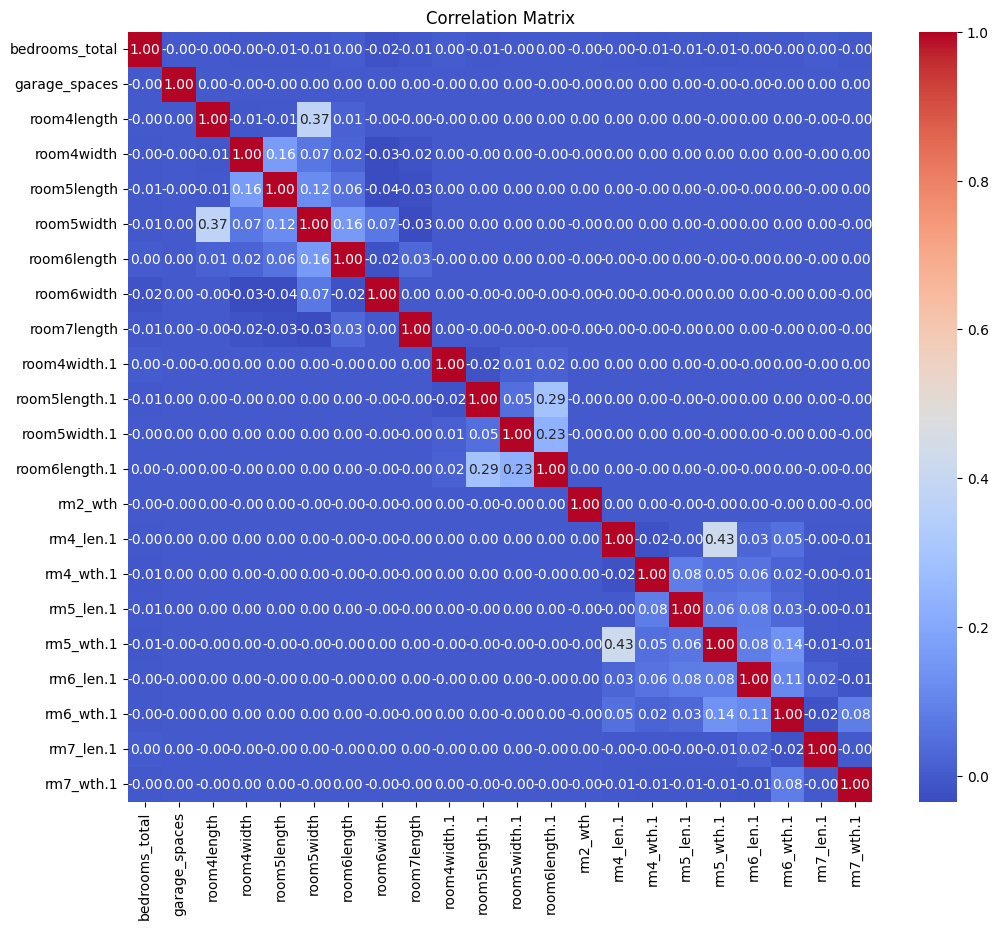

                bedrooms_total  garage_spaces   room4length    room4width  \
bedrooms_total        1.000000  -2.622944e-03 -1.691085e-03 -3.616319e-03   
garage_spaces        -0.002623   1.000000e+00  2.870001e-05 -1.822837e-03   
room4length          -0.001691   2.870001e-05  1.000000e+00 -9.763006e-03   
room4width           -0.003616  -1.822837e-03 -9.763006e-03  1.000000e+00   
room5length          -0.005212  -1.271142e-03 -6.027226e-03  1.649576e-01   
room5width           -0.005629   1.236967e-03  3.744274e-01  7.001197e-02   
room6length           0.002147   5.409617e-04  1.460880e-02  2.205570e-02   
room6width           -0.018314   9.154751e-05 -2.457285e-03 -3.151747e-02   
room7length          -0.006970   6.875292e-05 -1.845626e-03 -1.861174e-02   
room4width.1          0.003995  -3.817661e-15 -5.285710e-18  2.590009e-17   
room5length.1        -0.006130   3.651985e-15  1.949804e-17 -3.633137e-17   
room5width.1         -0.000587   4.410961e-17  2.148350e-18  1.958829e-17   

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cleaned_data' is your DataFrame
# Convert columns with '"0000-00-00 00:00:00"' to NaT (Not a Time)
# Replace 'column_name1', 'column_name2', etc. with the actual column names
# that contain the string value
for column in cleaned_data.select_dtypes(include=['object']).columns:
    cleaned_data[column] = pd.to_datetime(cleaned_data[column], errors='coerce').dt.date
# Select only numeric columns for correlation calculation
numeric_data = cleaned_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Alternatively, you can print the correlation values directly:
print(correlation_matrix)

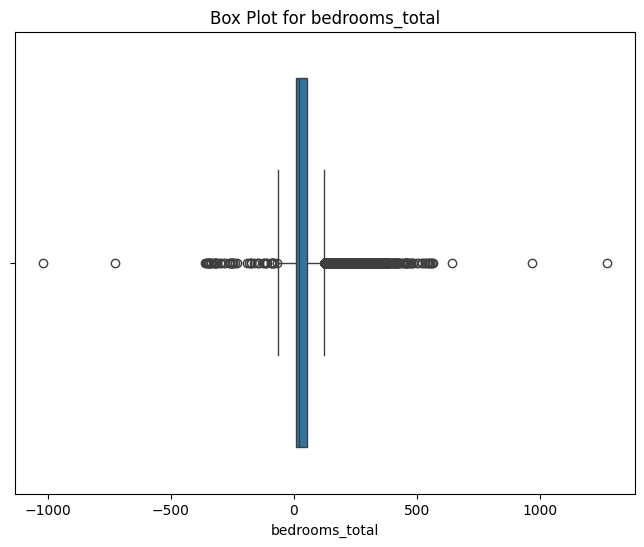

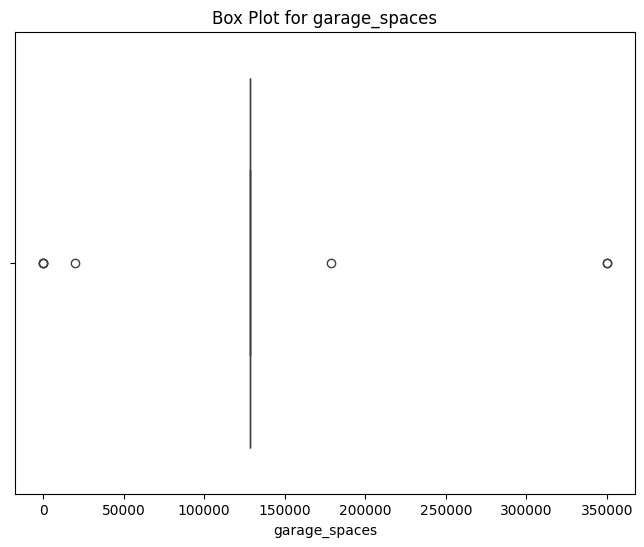

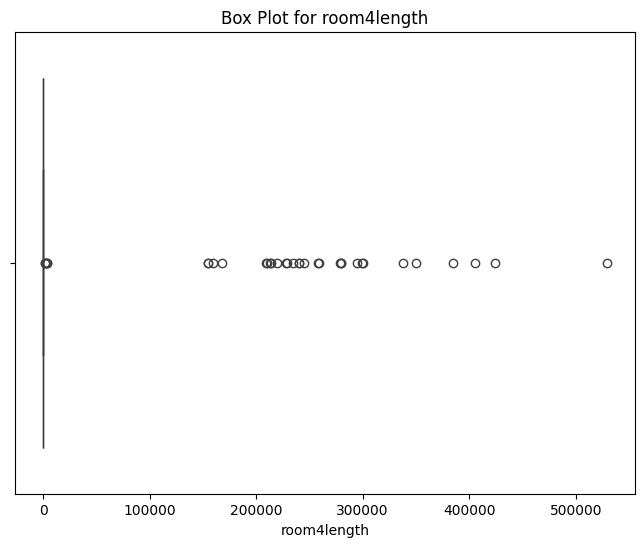

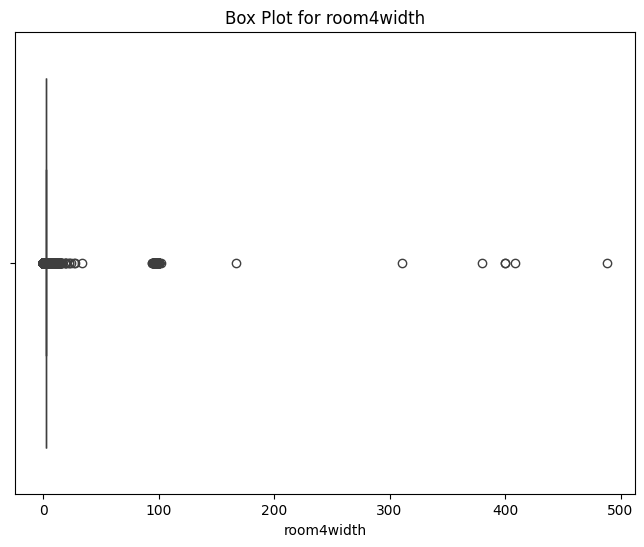

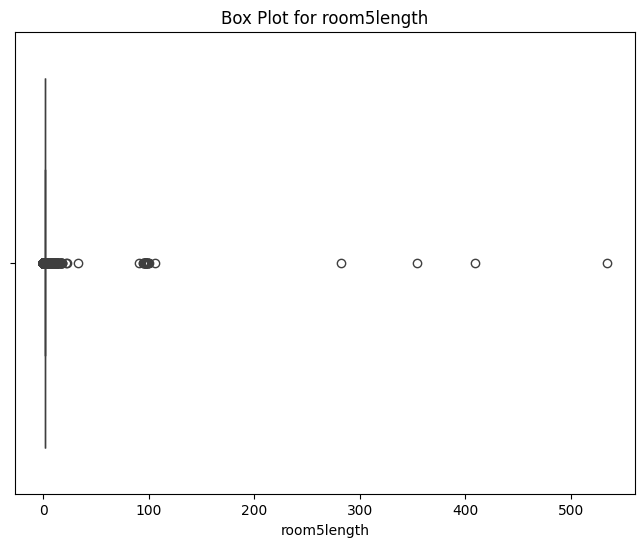

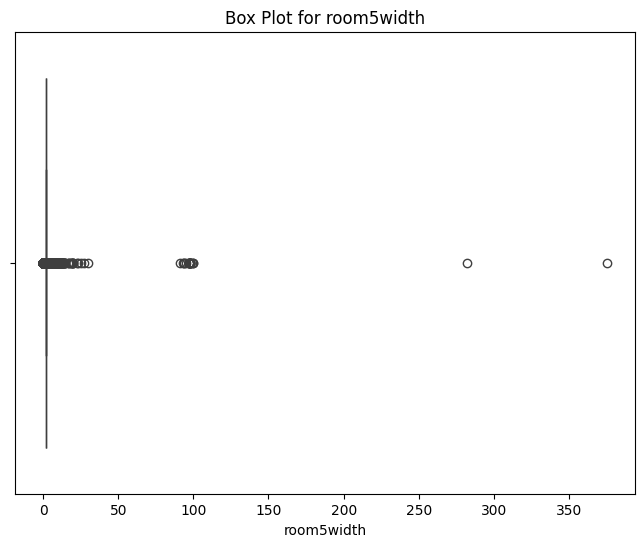

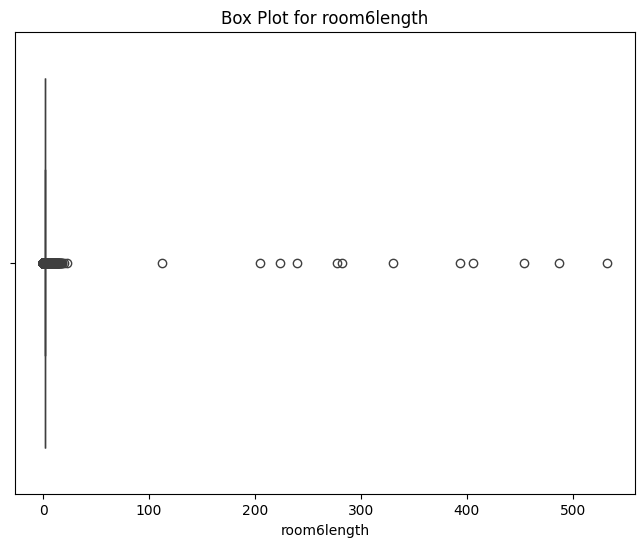

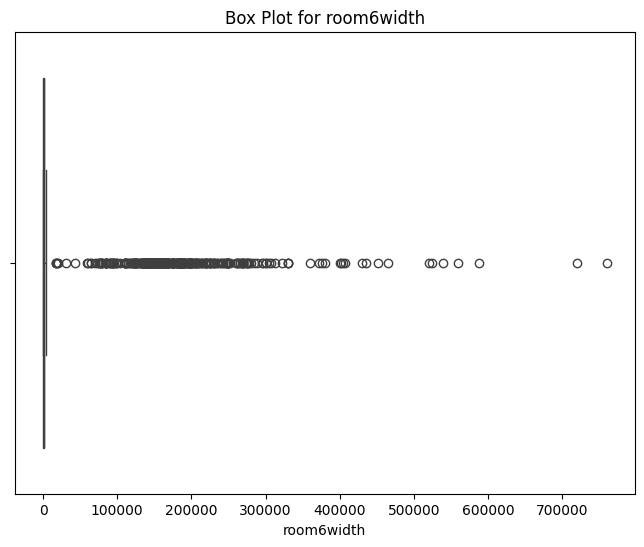

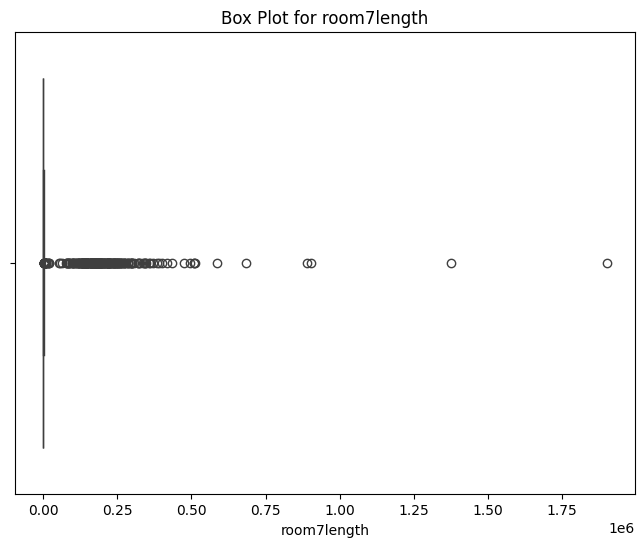

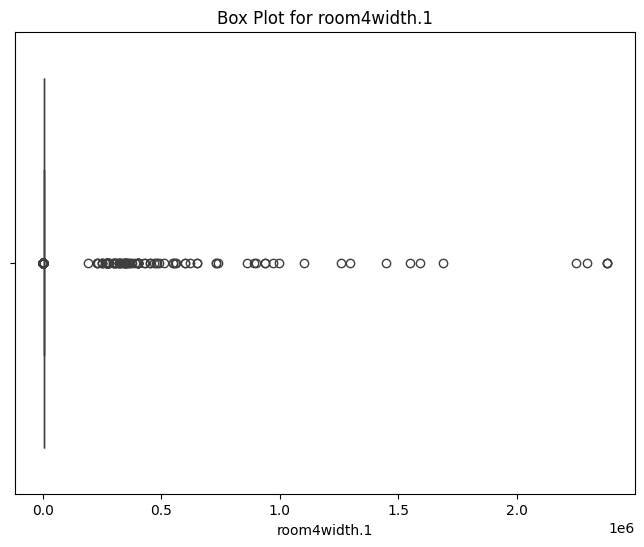

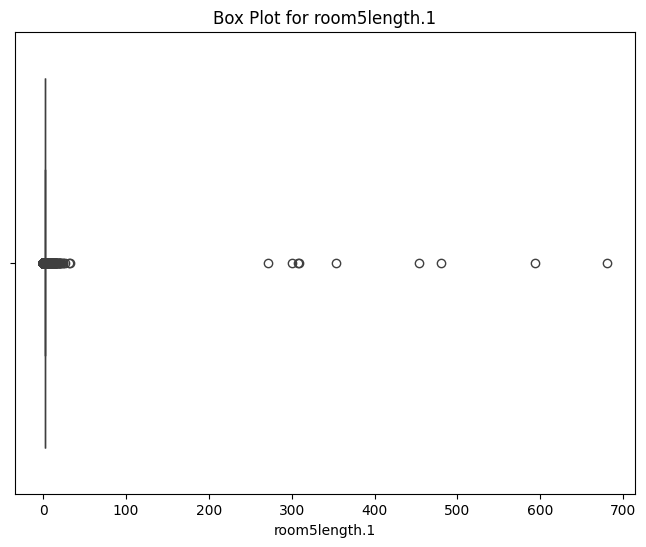

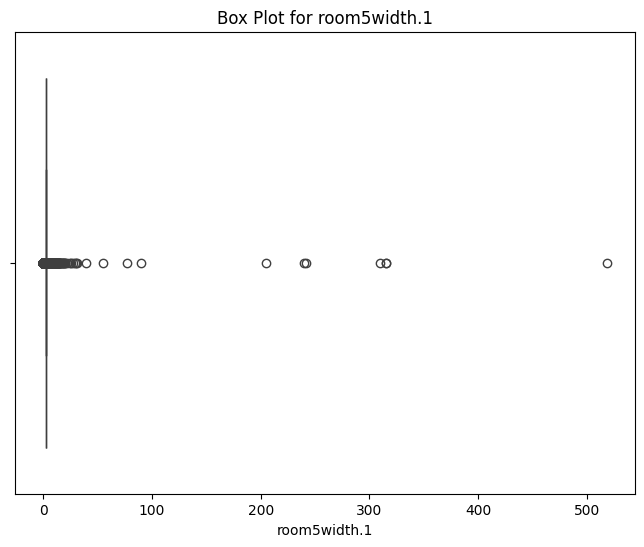

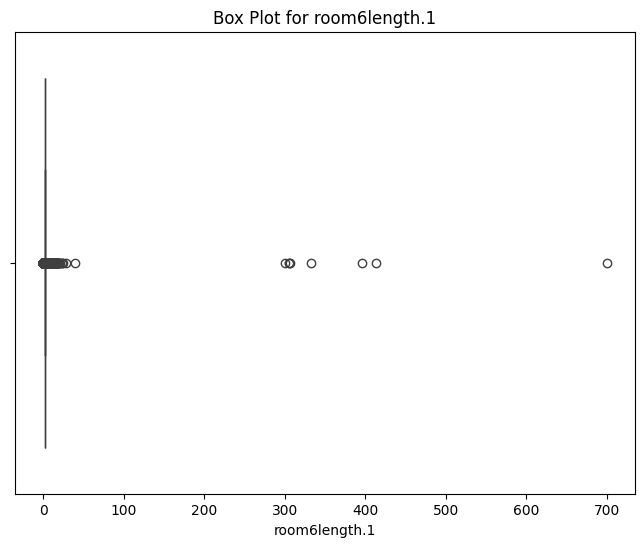

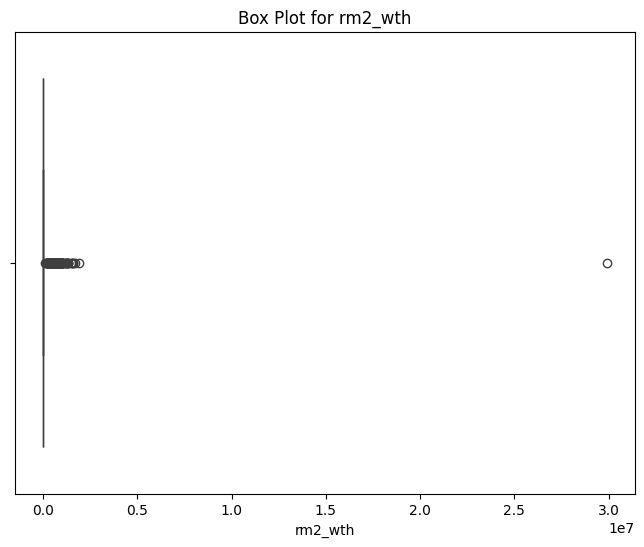

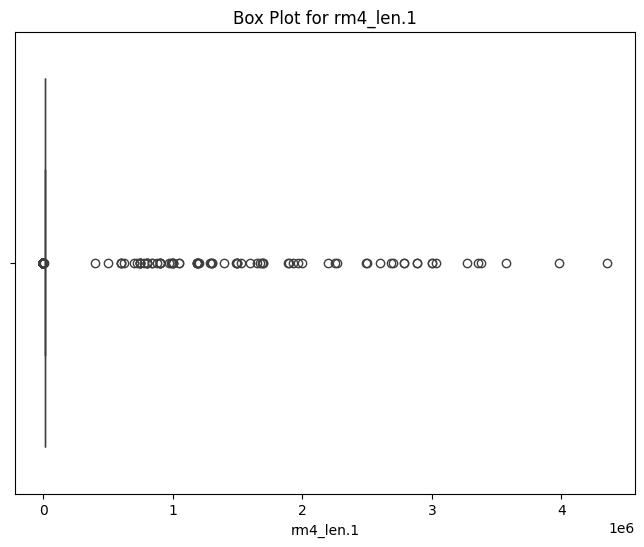

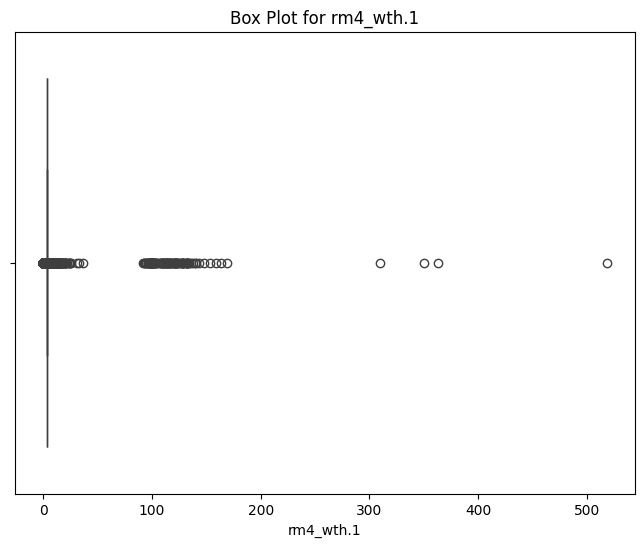

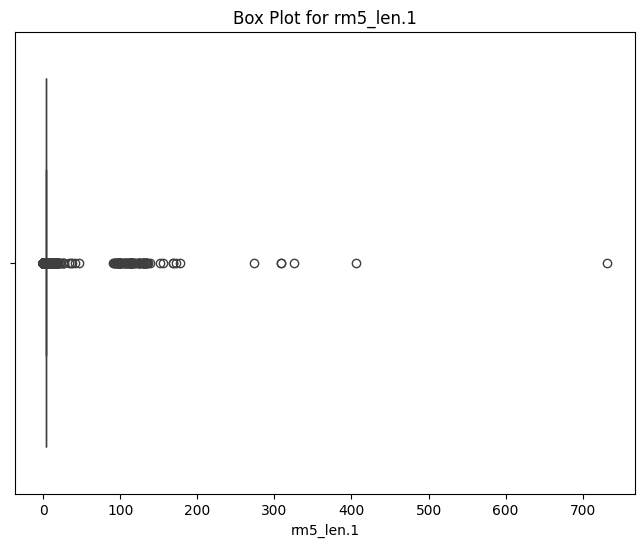

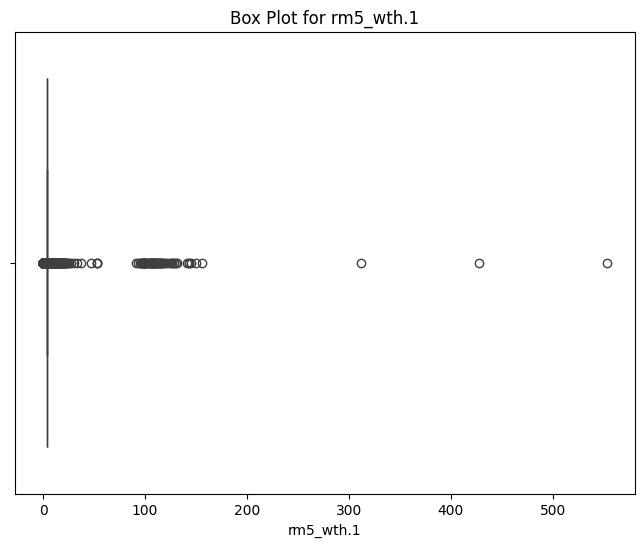

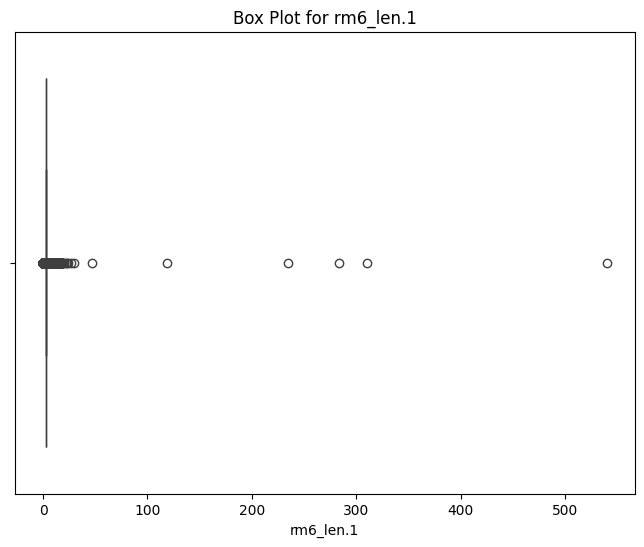

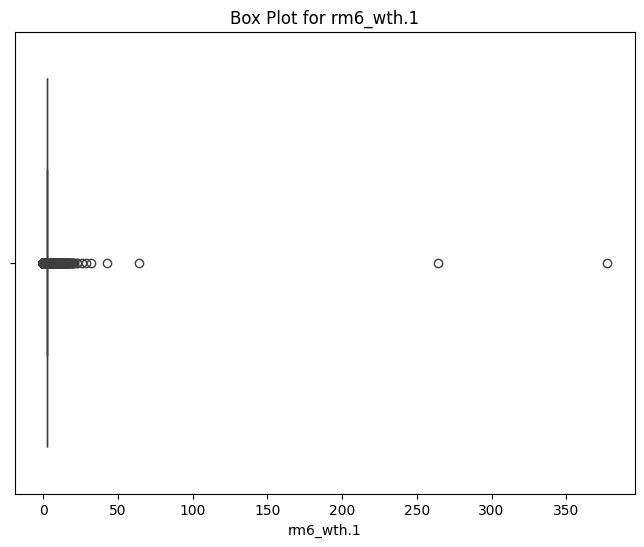

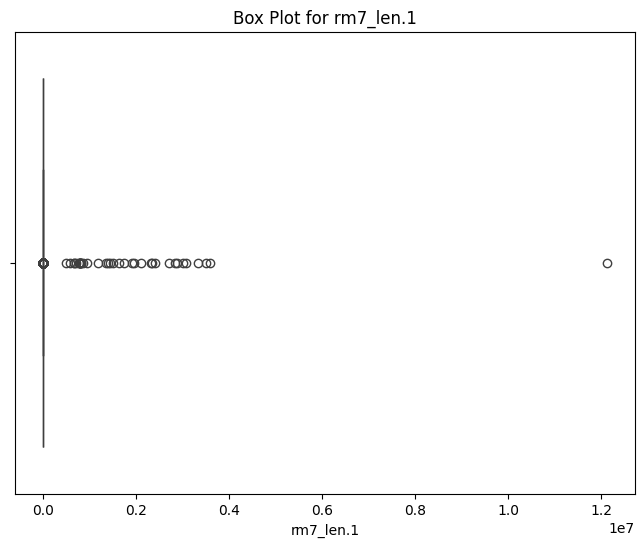

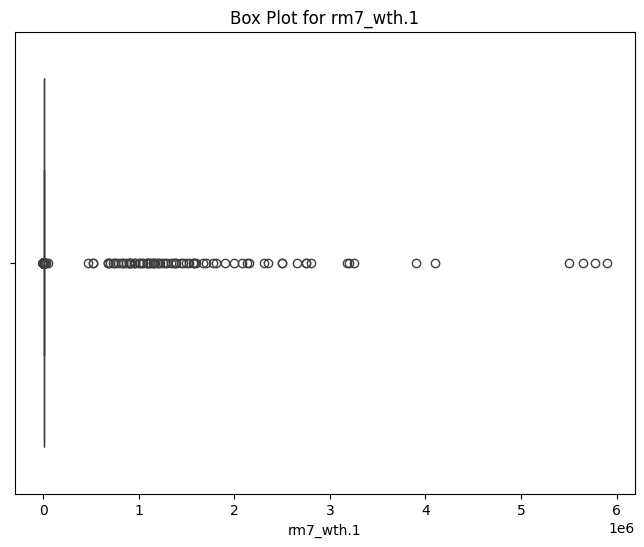

<ipython-input-68-639aa9876cf9>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cleaned_data[col + '_missing'] = cleaned_data[col].isnull()
<ipython-input-68-639aa9876cf9>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cleaned_data[col + '_missing'] = cleaned_data[col].isnull()
<ipython-input-68-639aa9876cf9>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instea

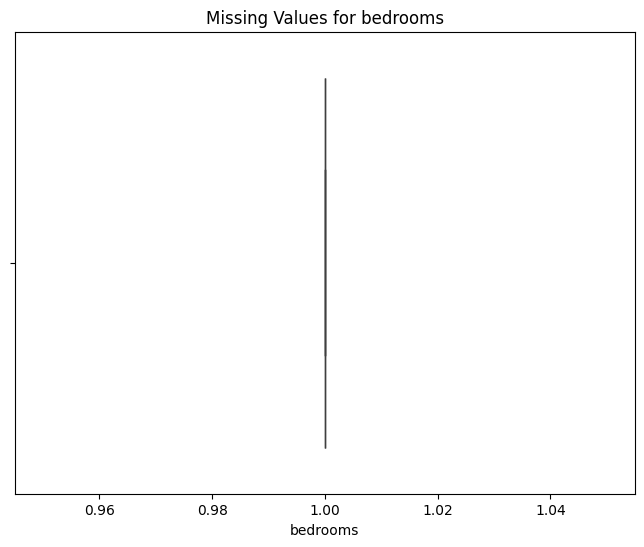

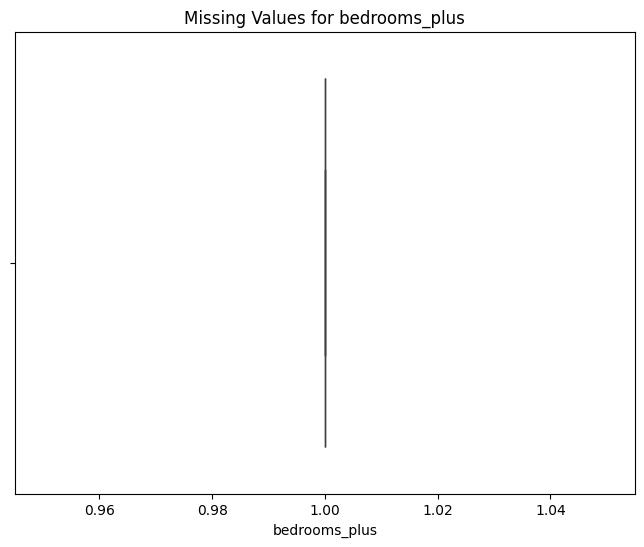

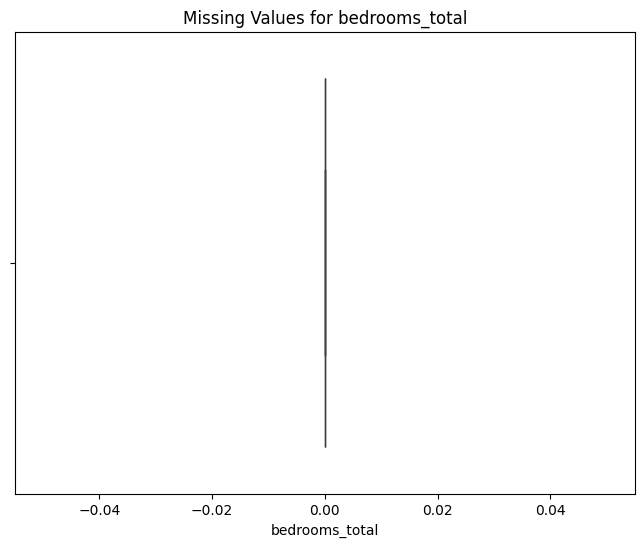

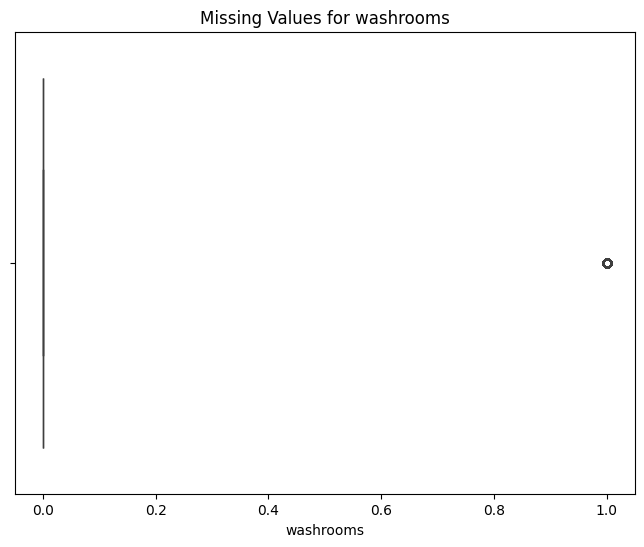

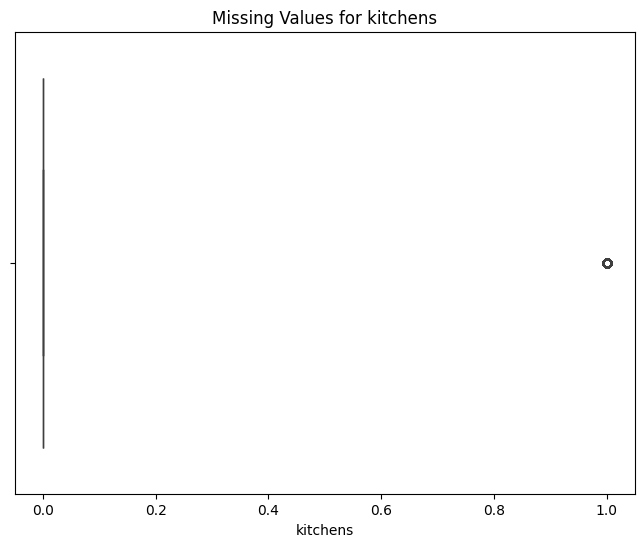

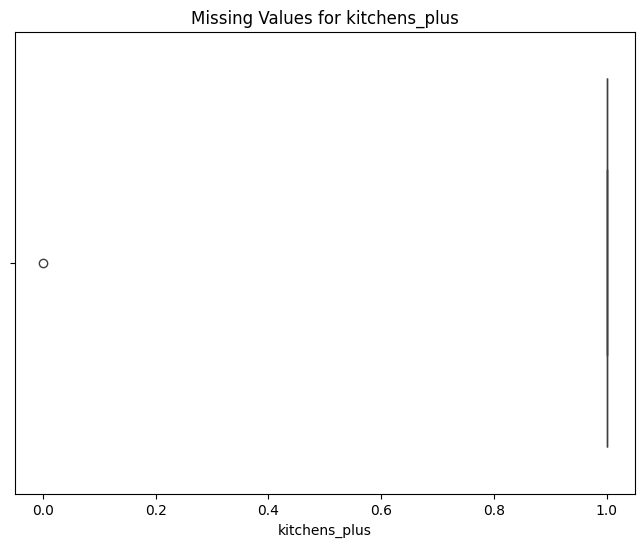

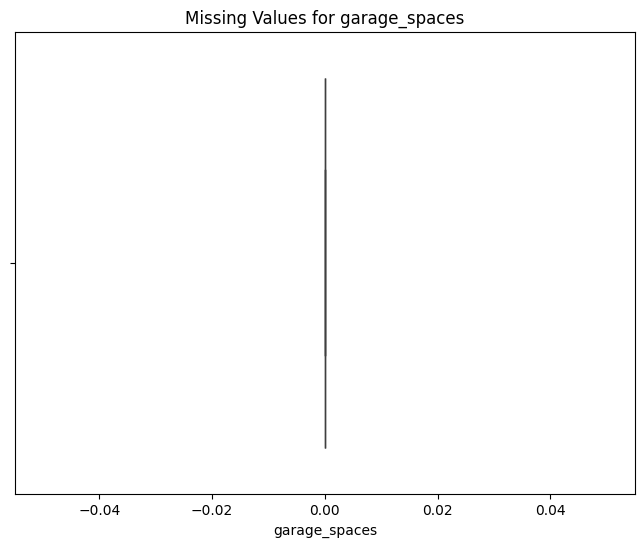

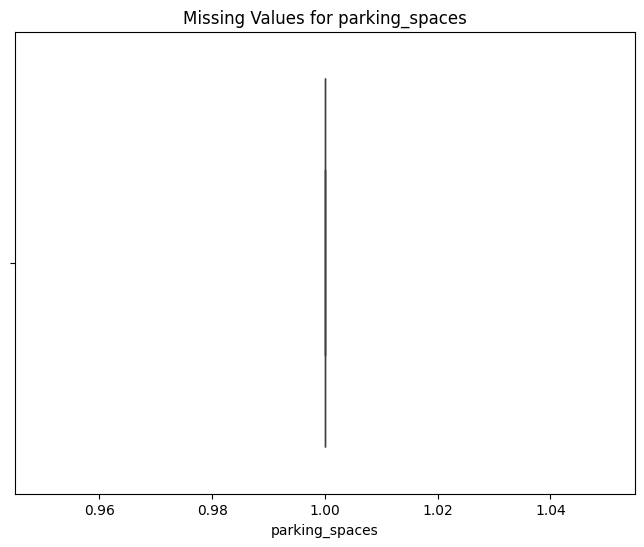

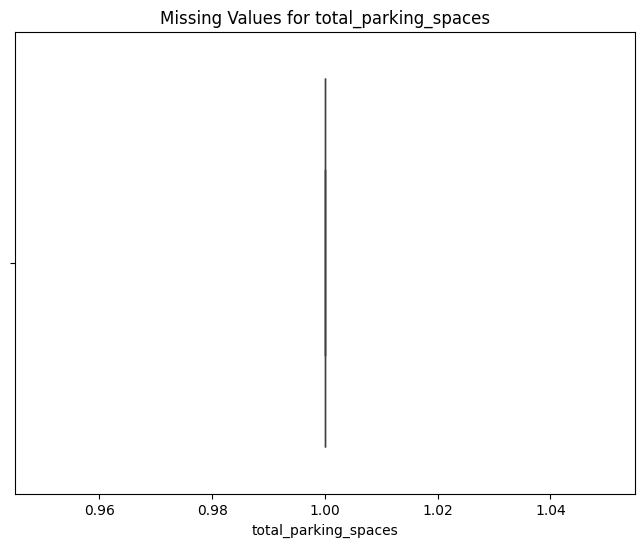

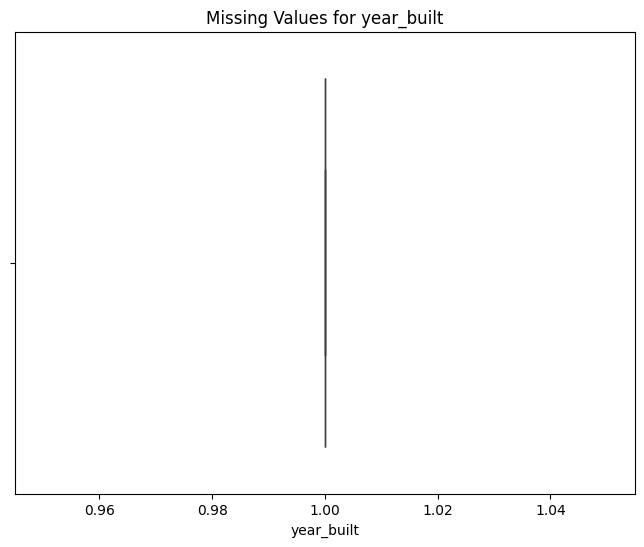

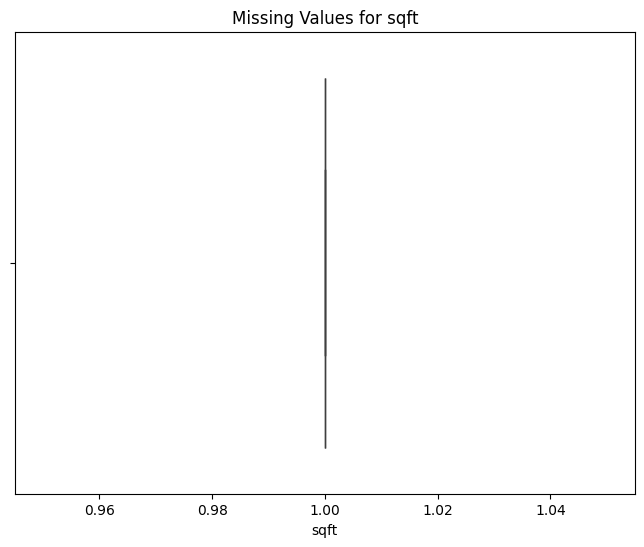

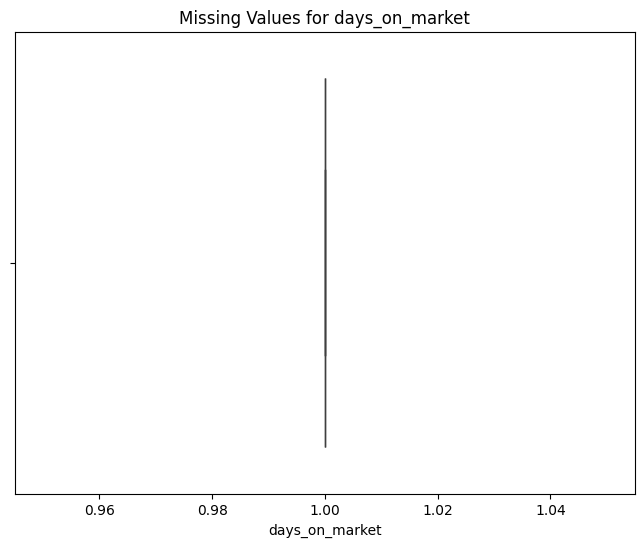

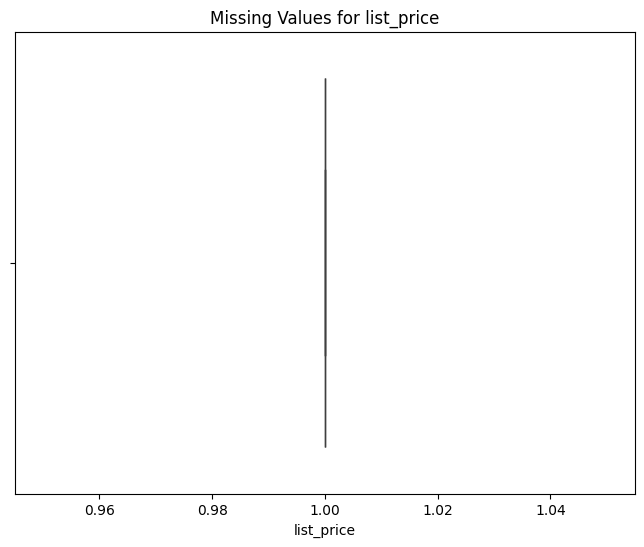

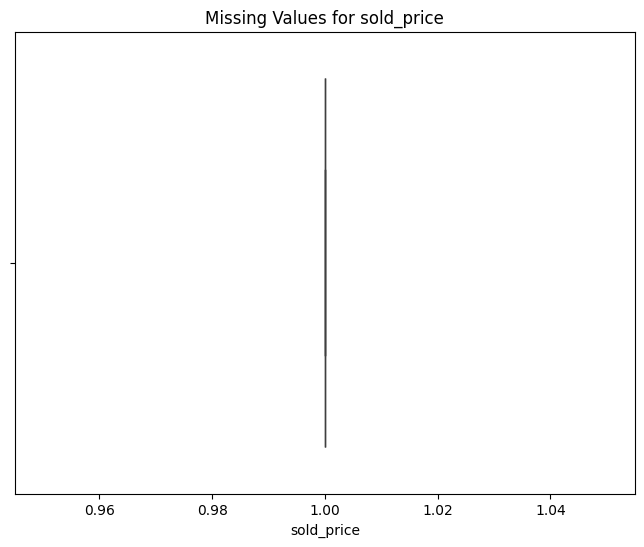

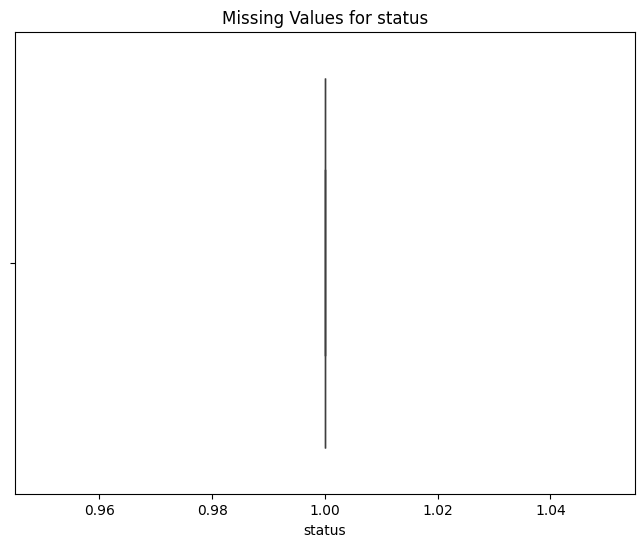

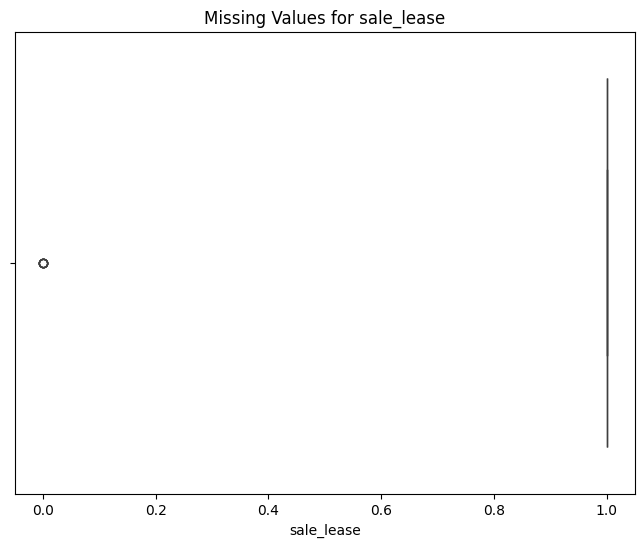

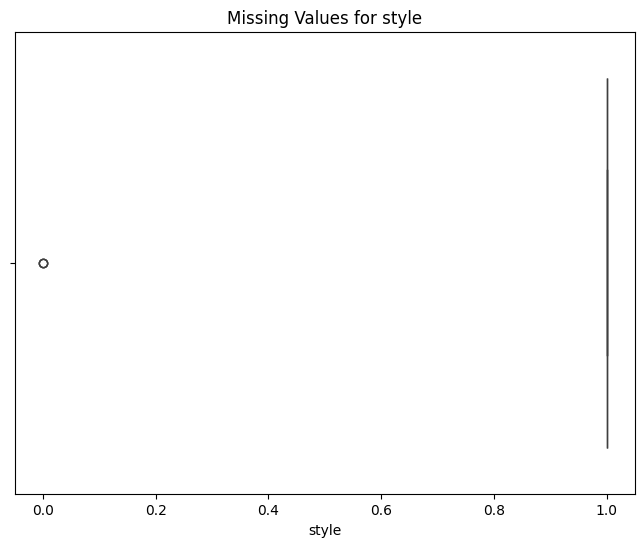

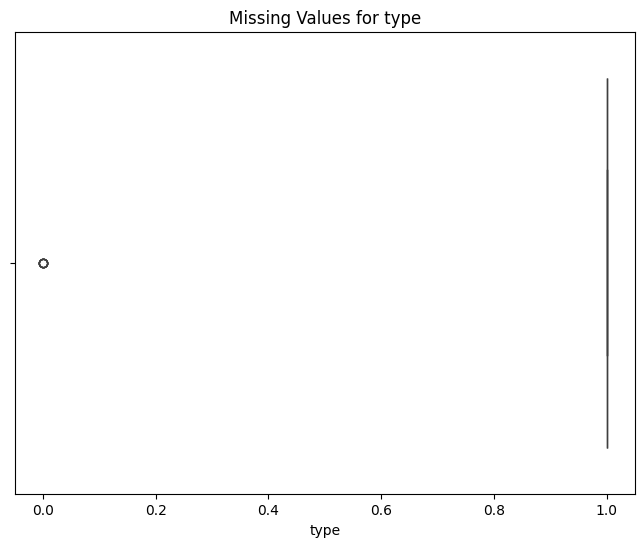

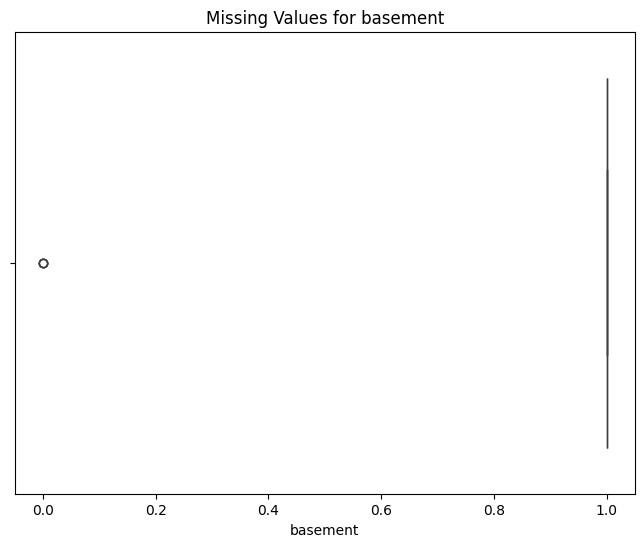

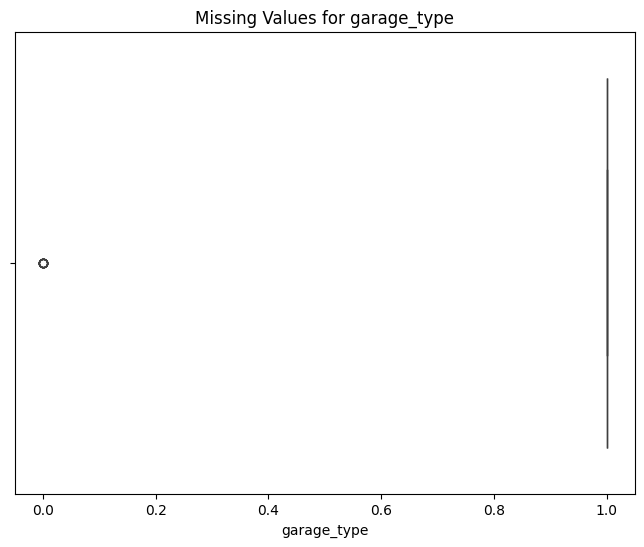

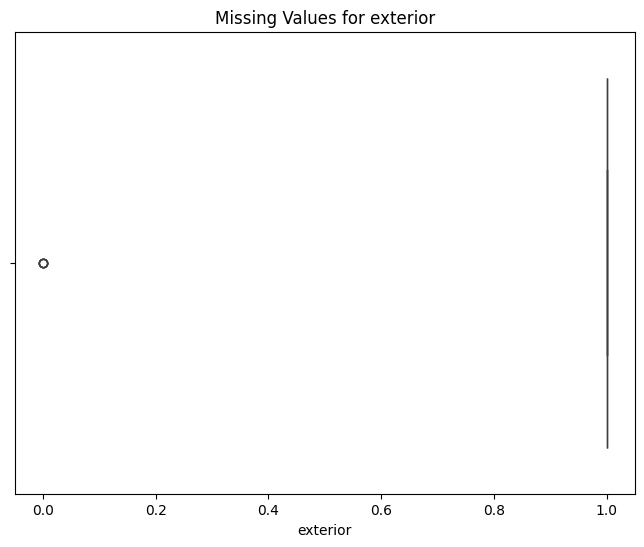

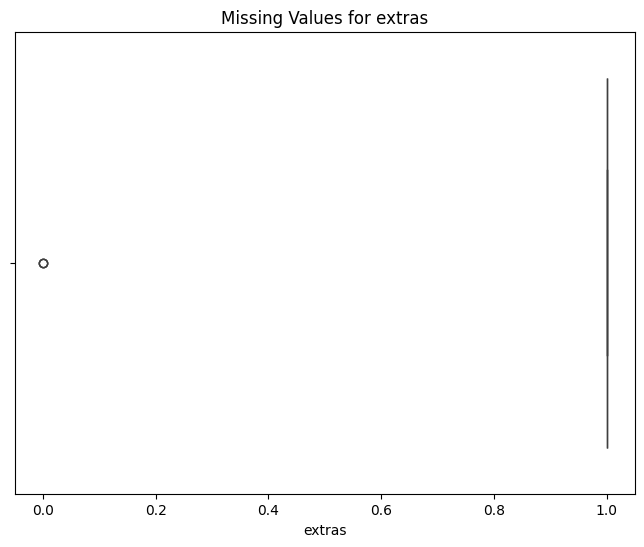

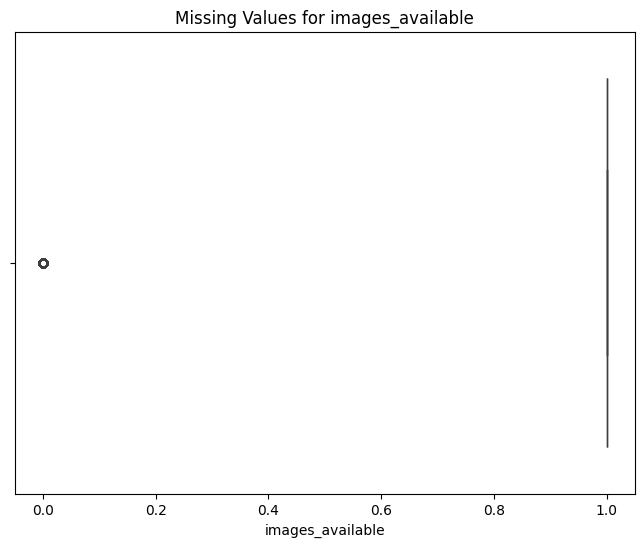

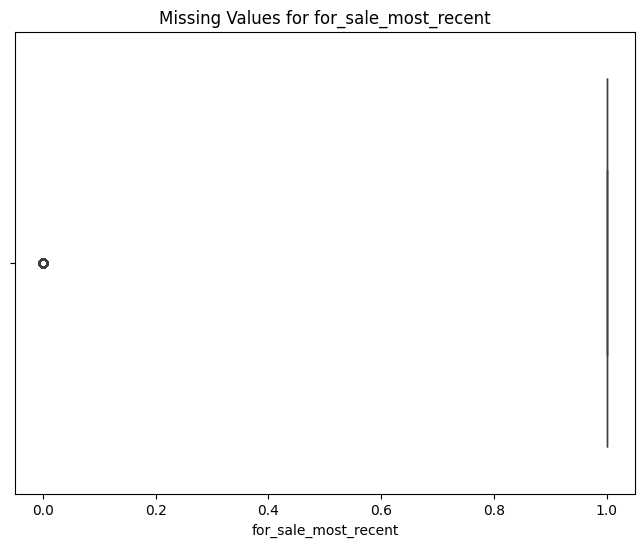

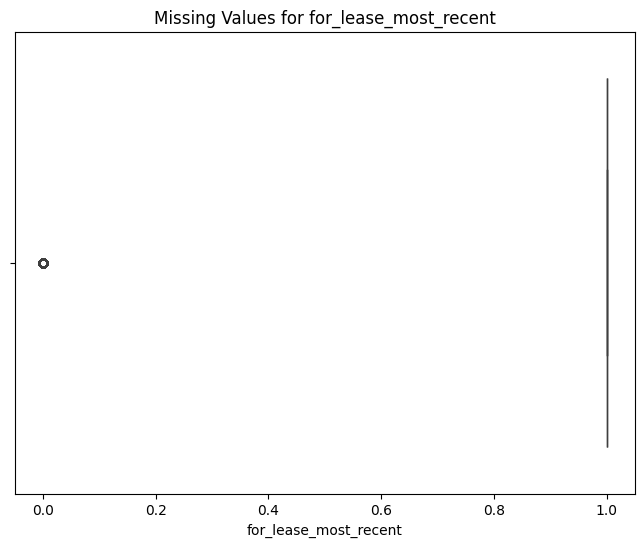

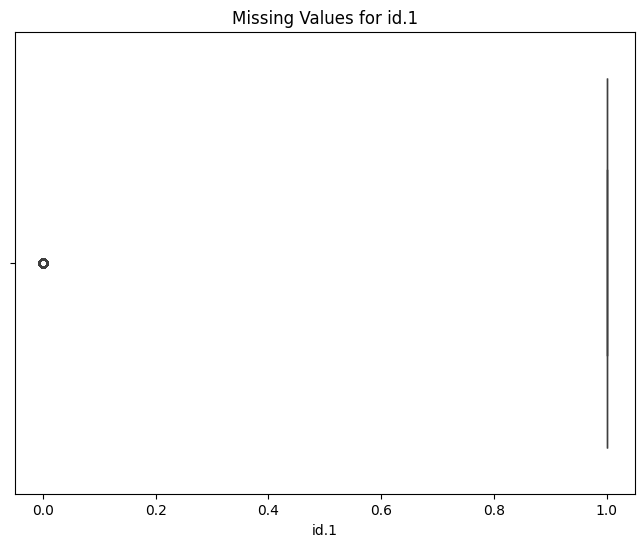

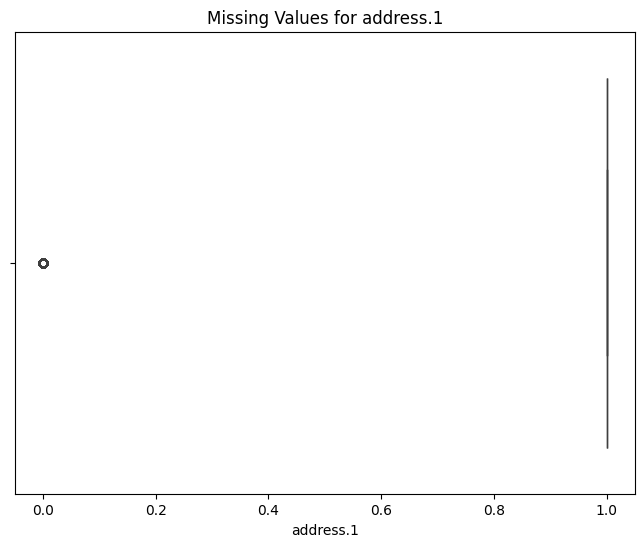

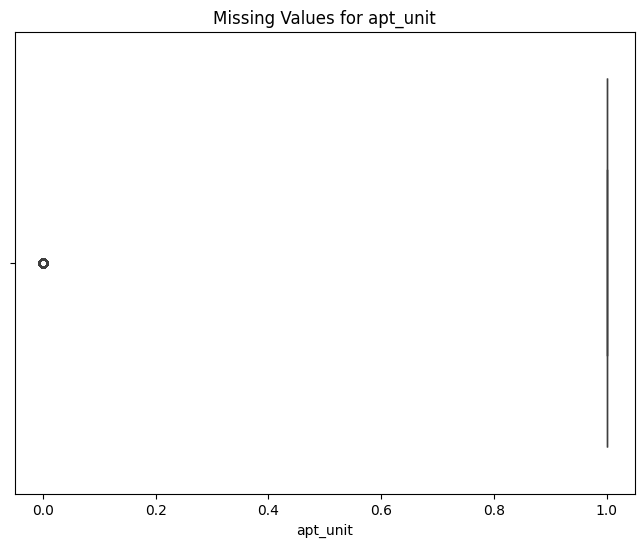

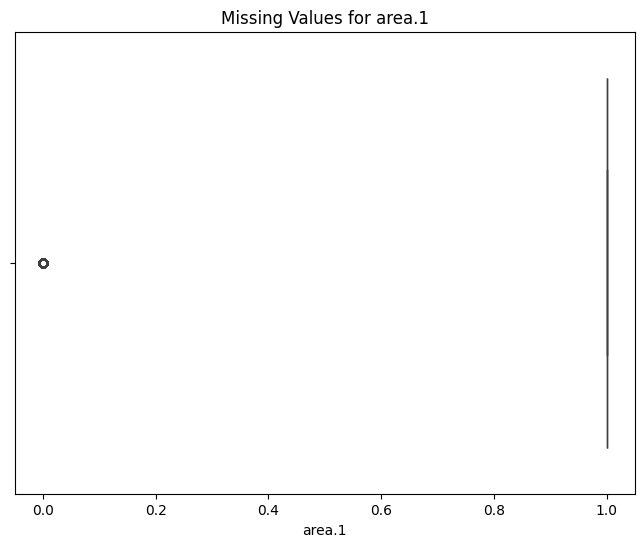

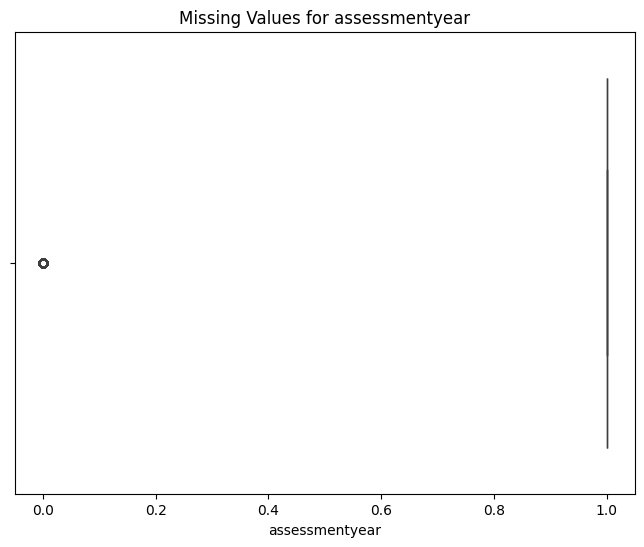

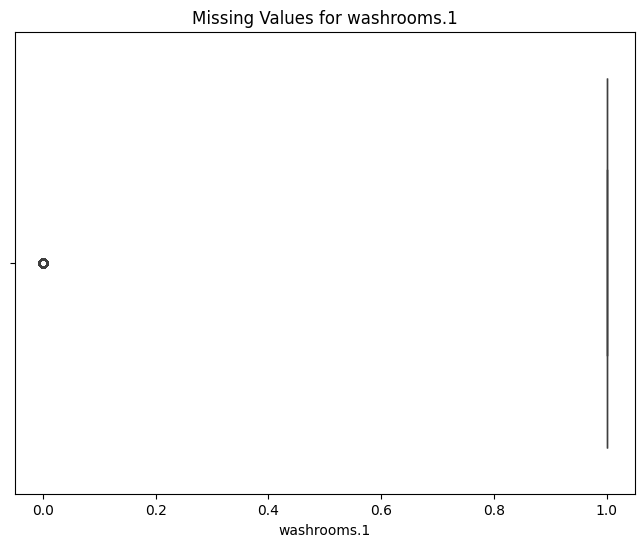

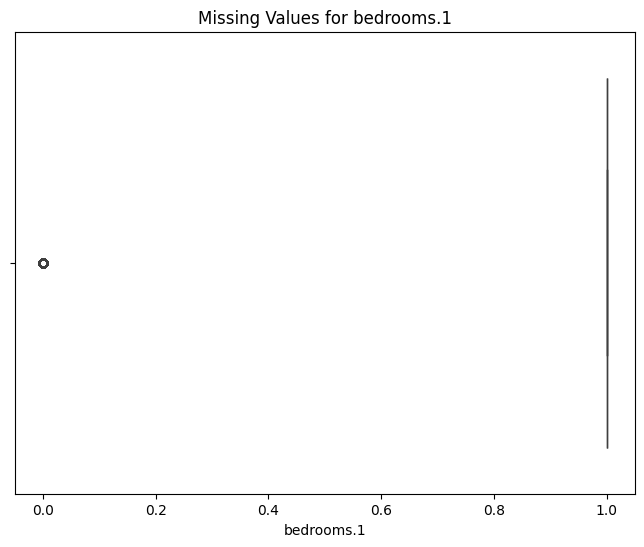

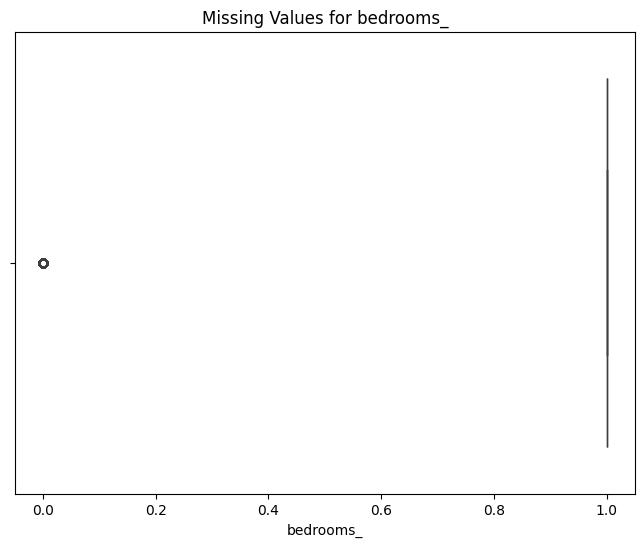

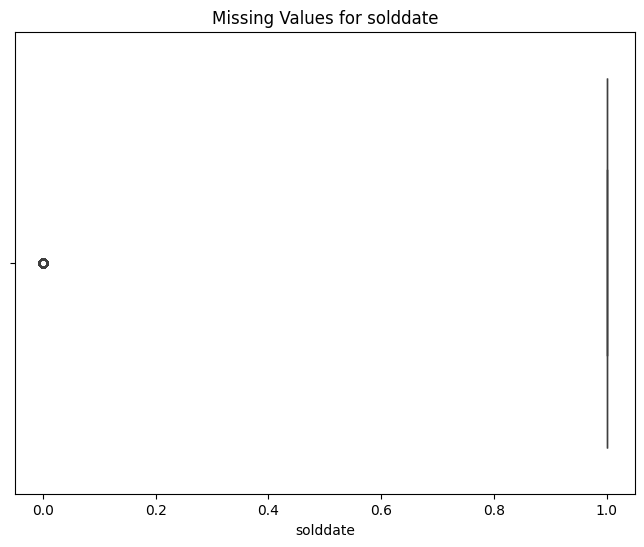

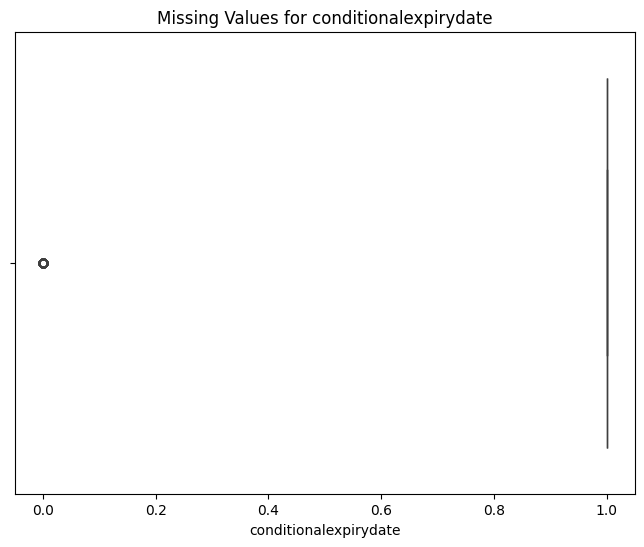

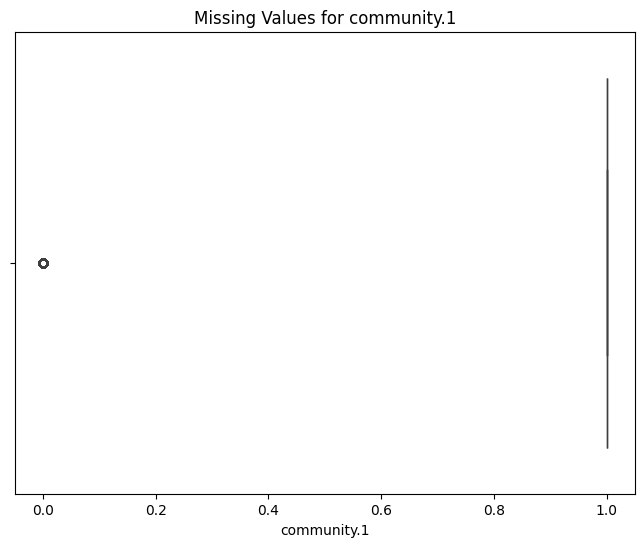

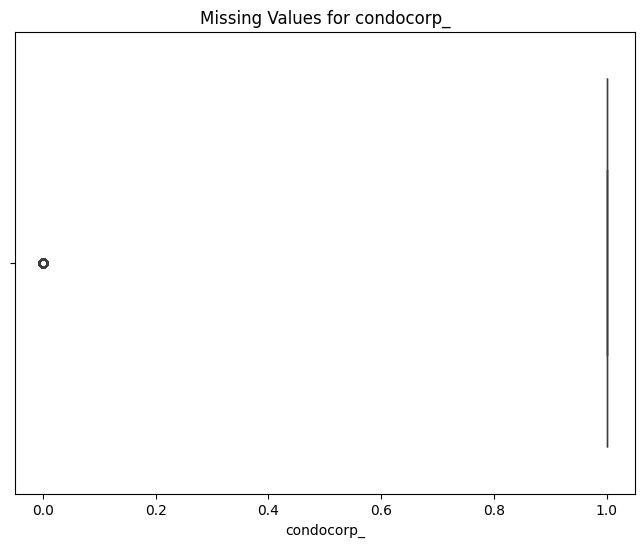

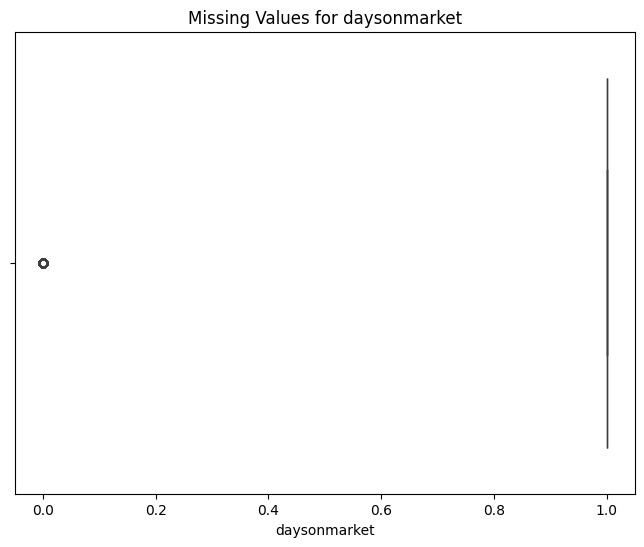

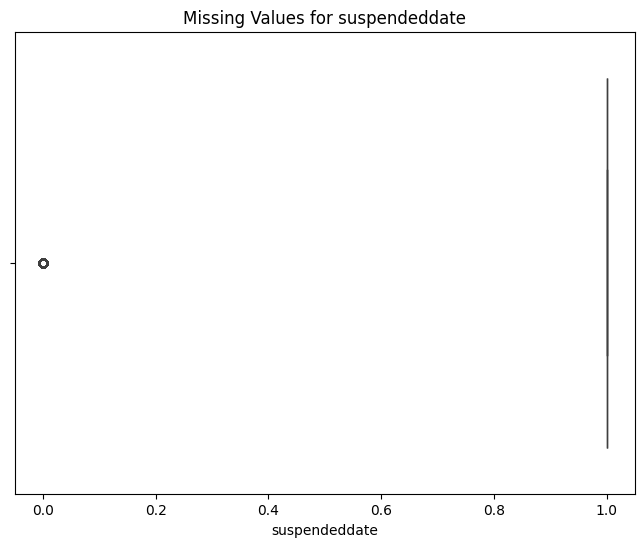

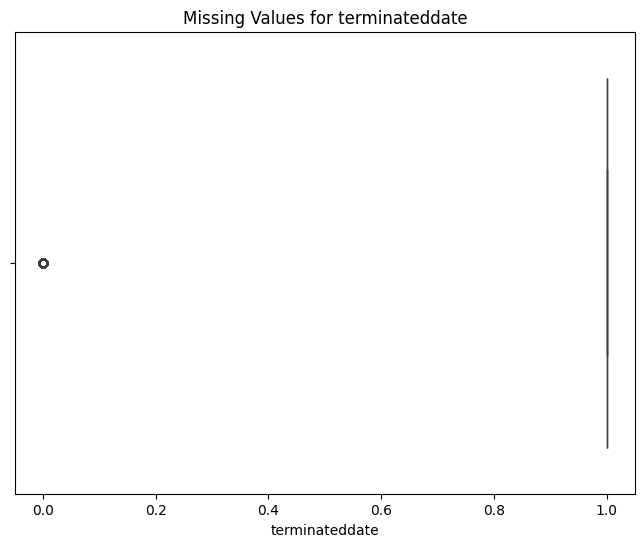

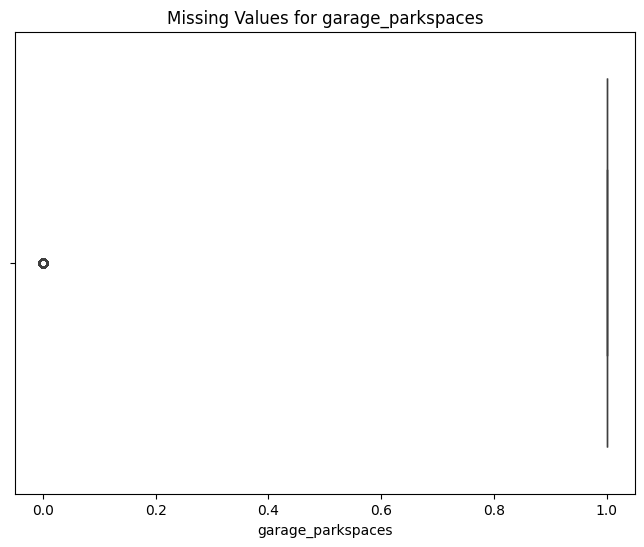

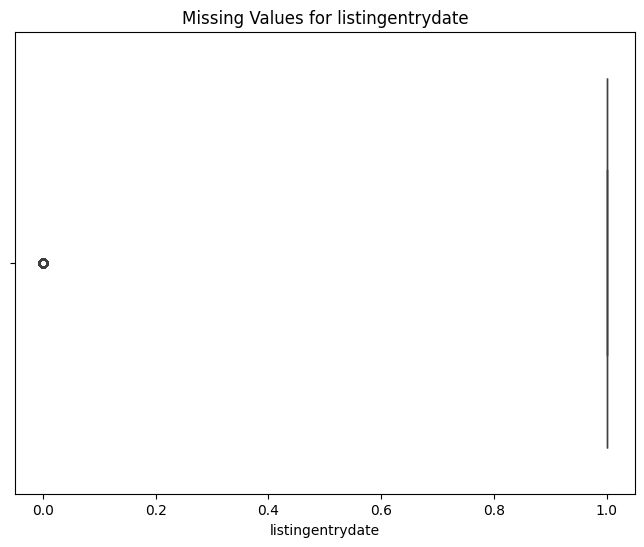

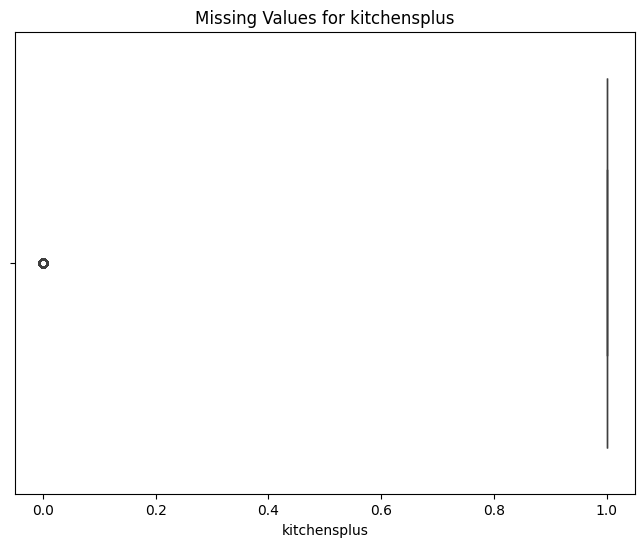

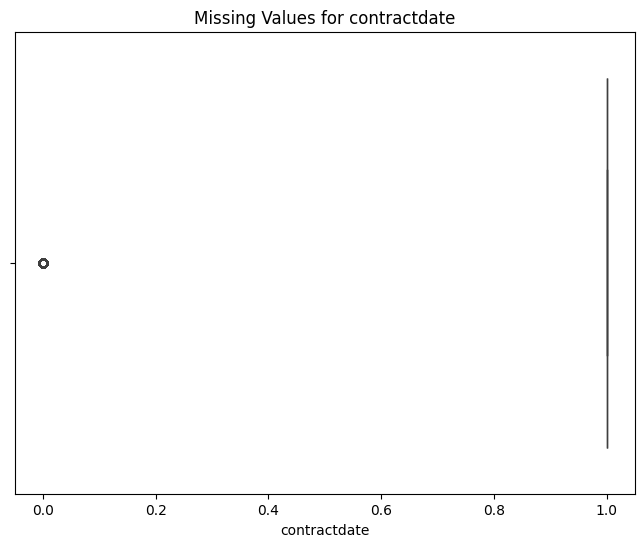

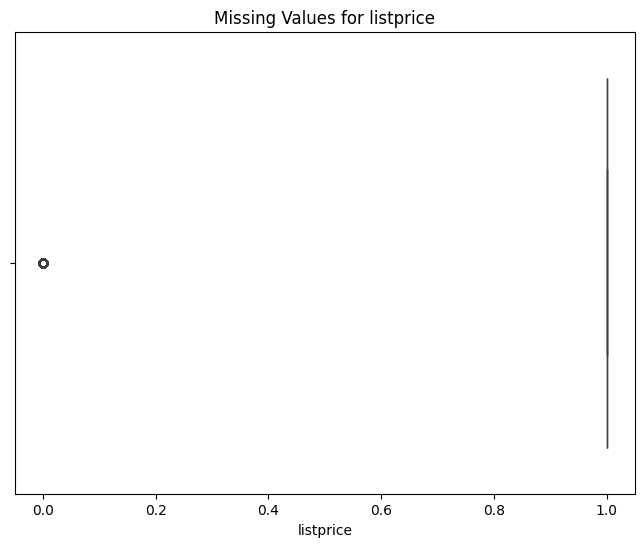

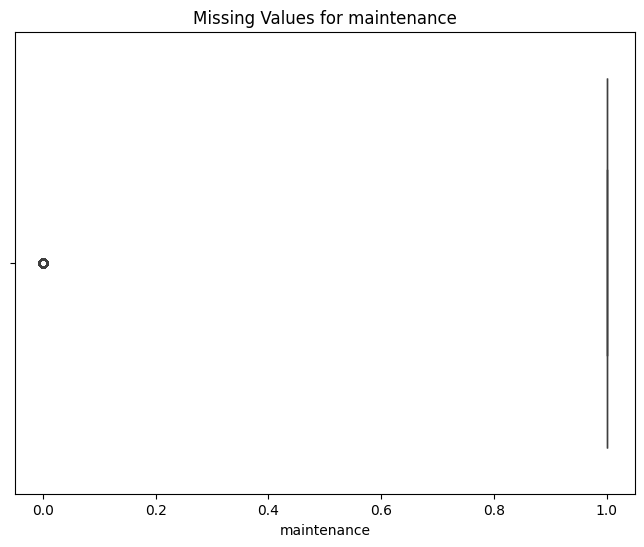

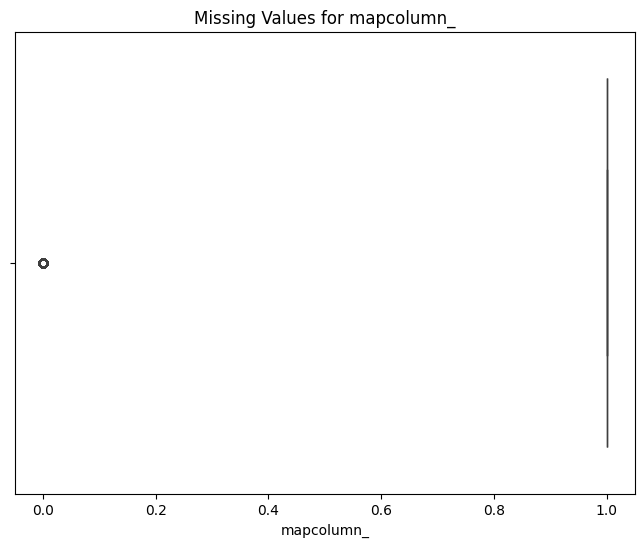

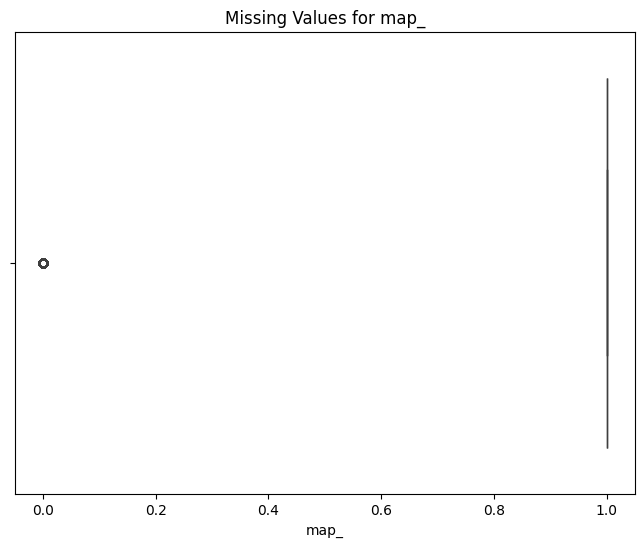

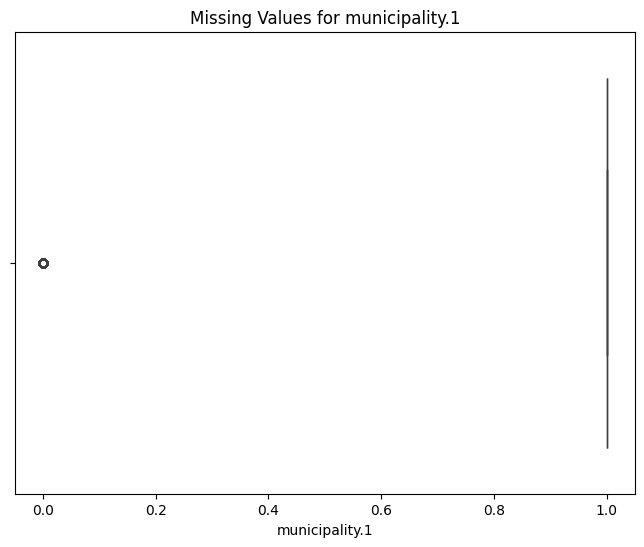

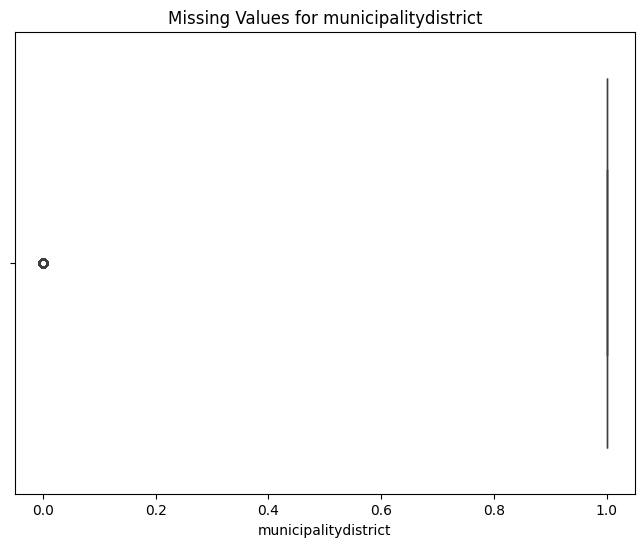

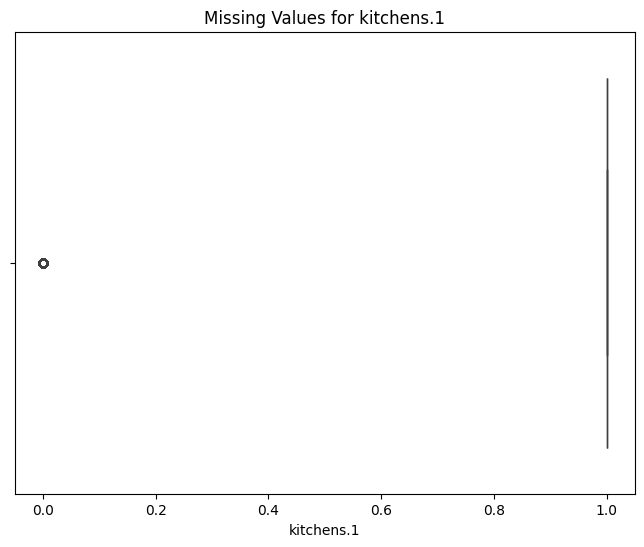

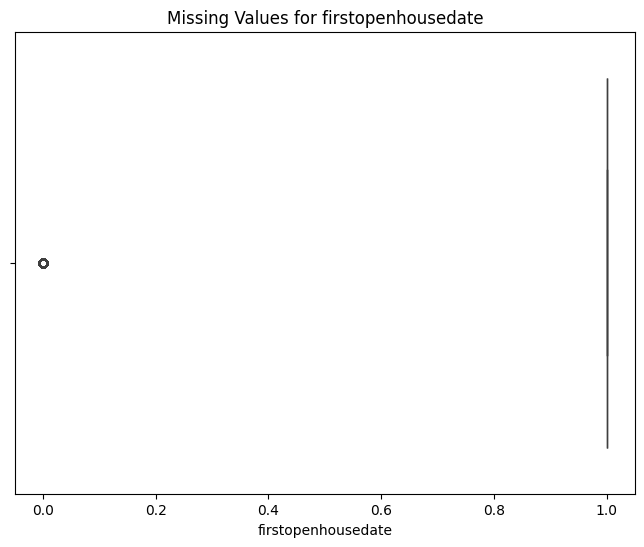

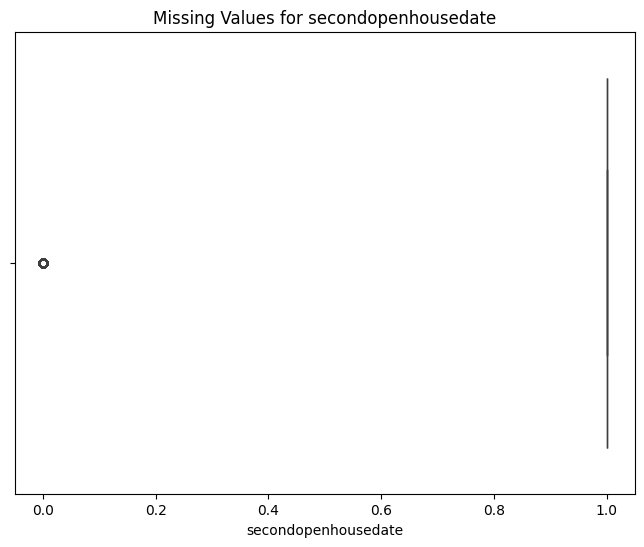

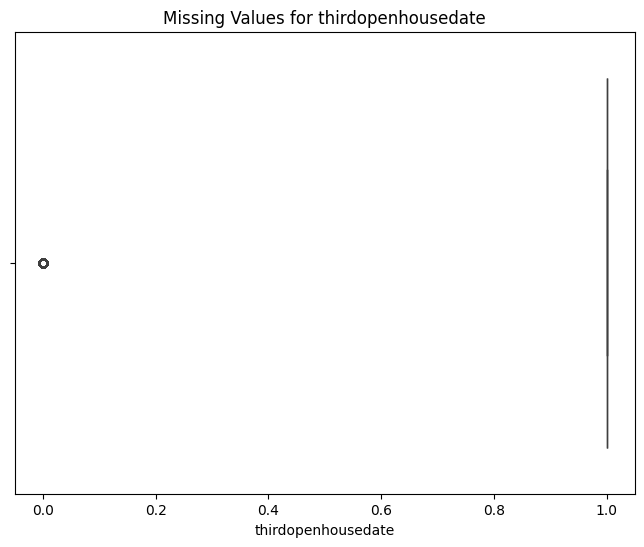

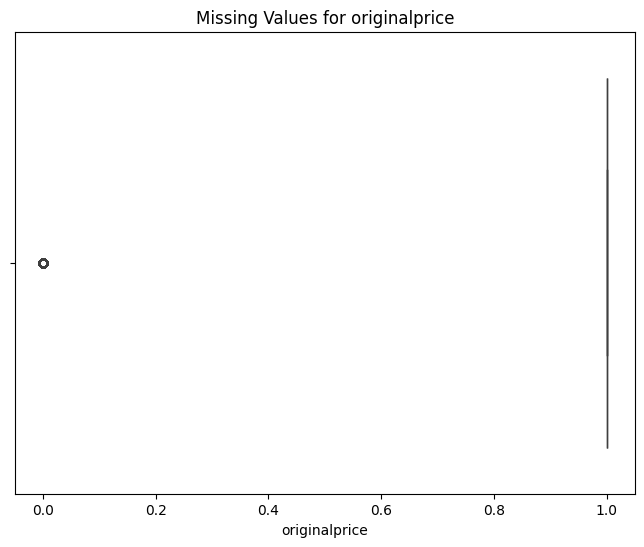

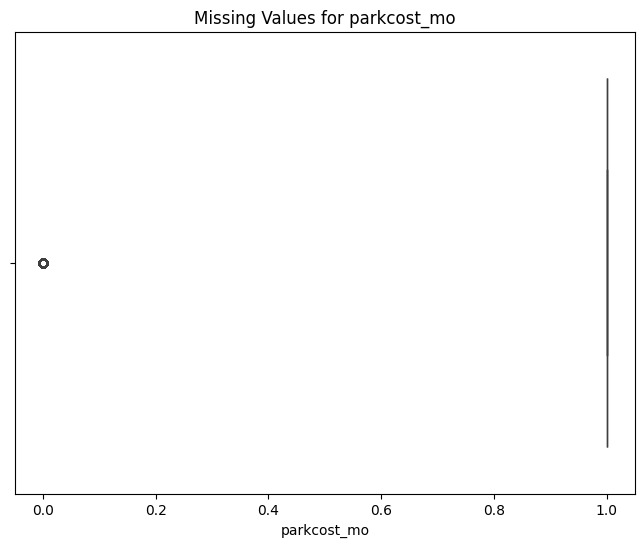

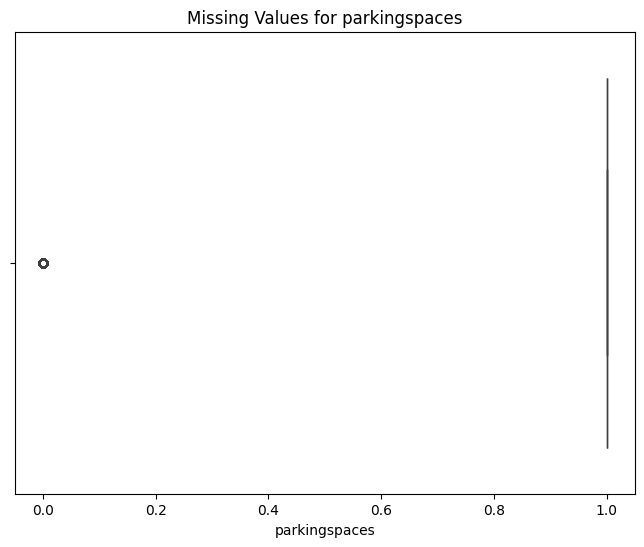

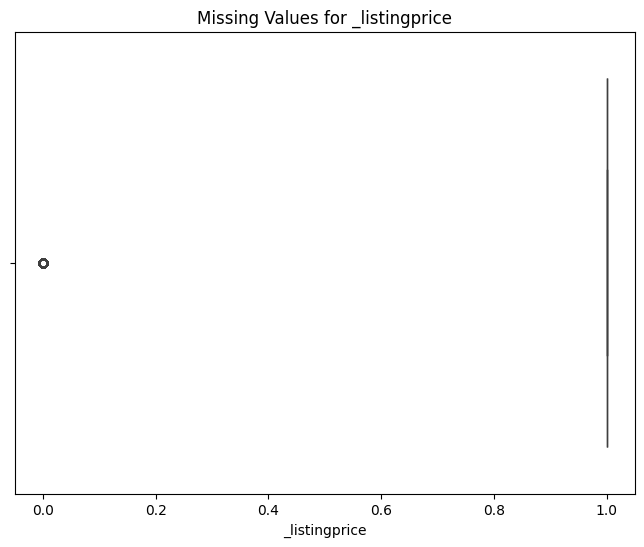

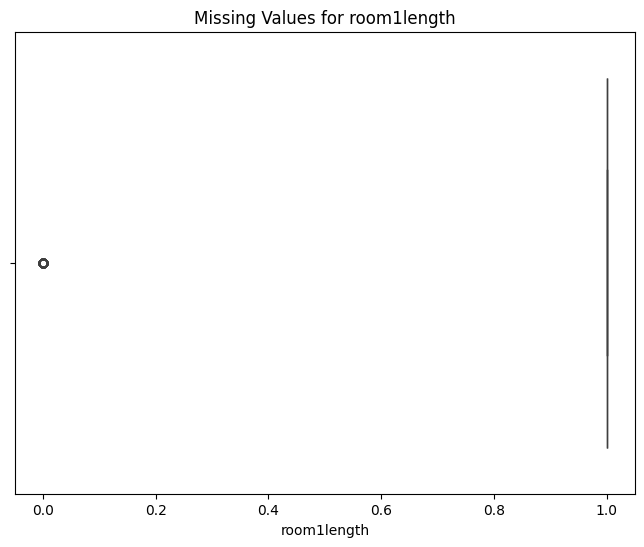

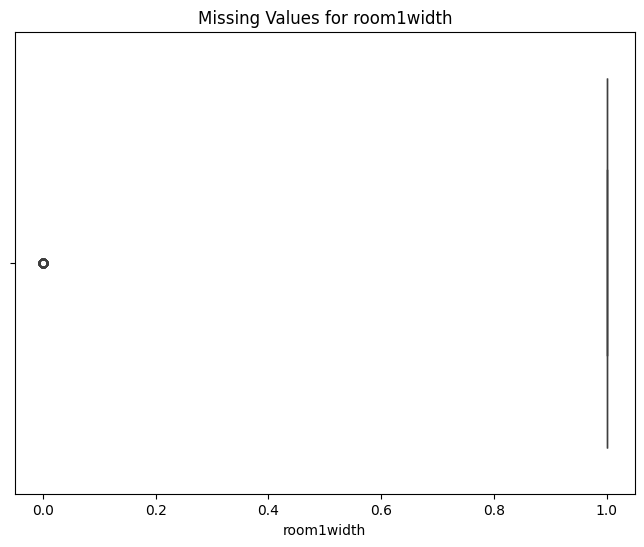

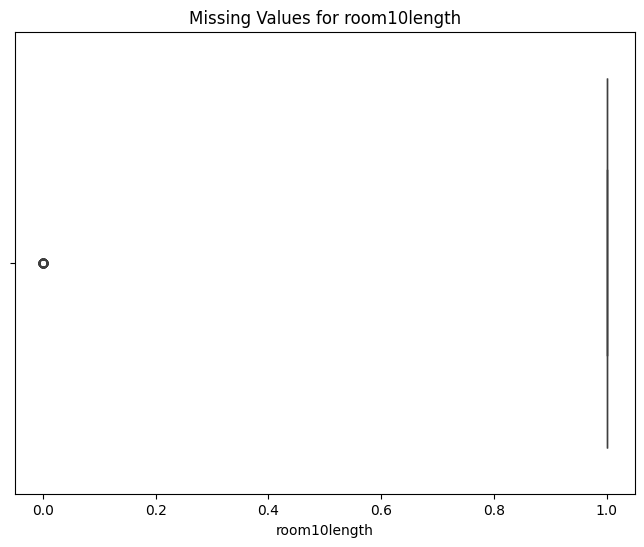

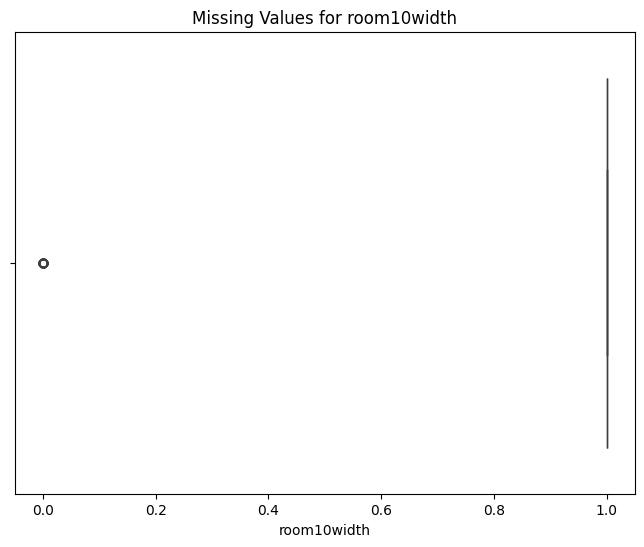

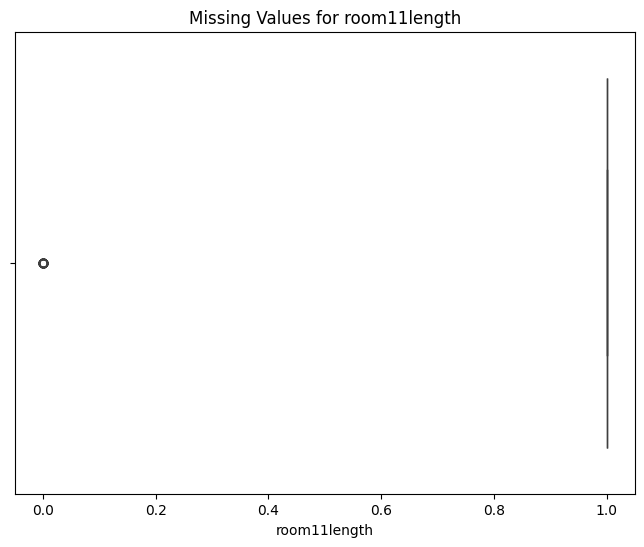

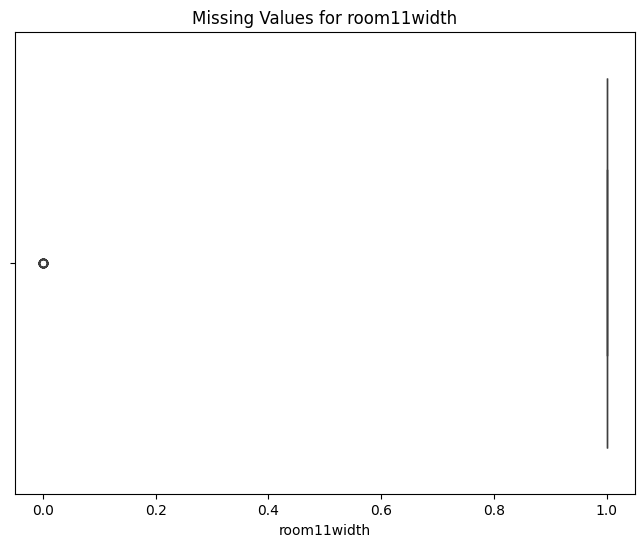

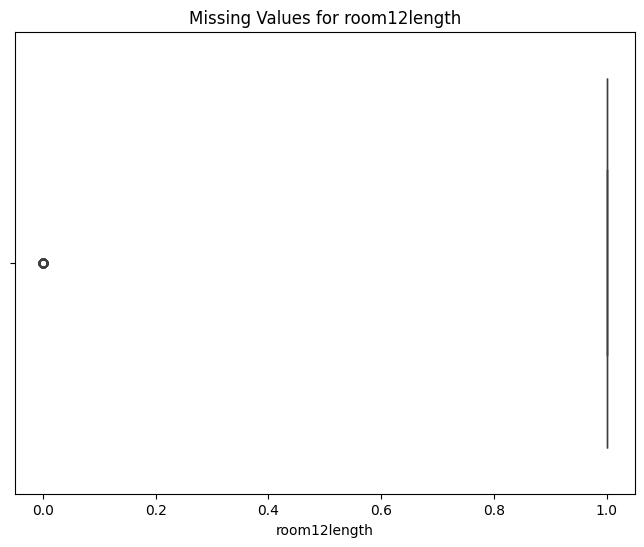

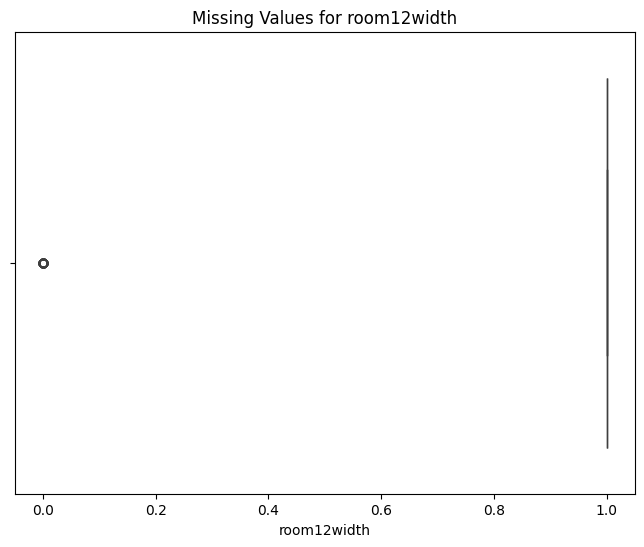

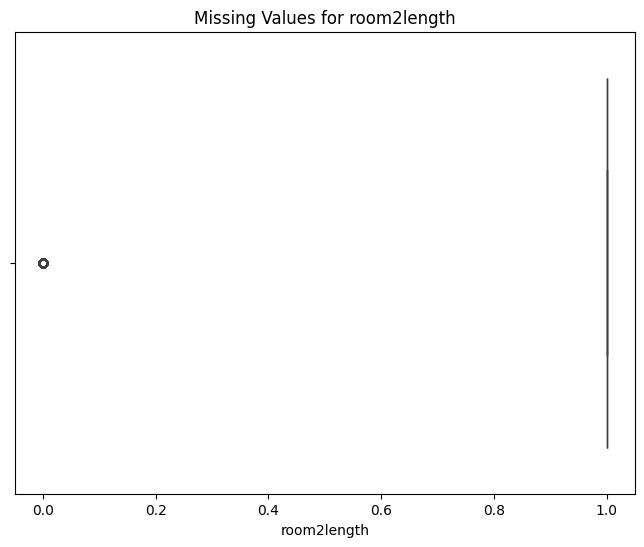

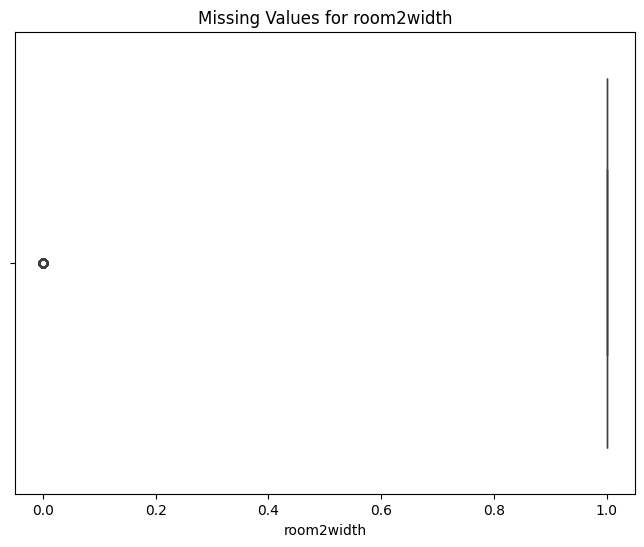

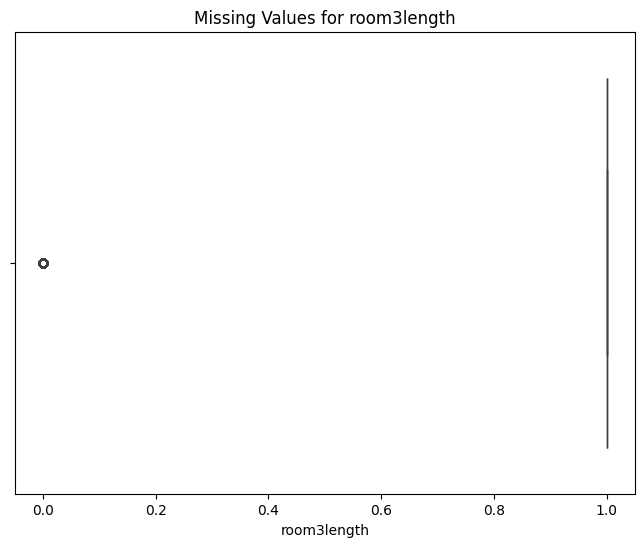

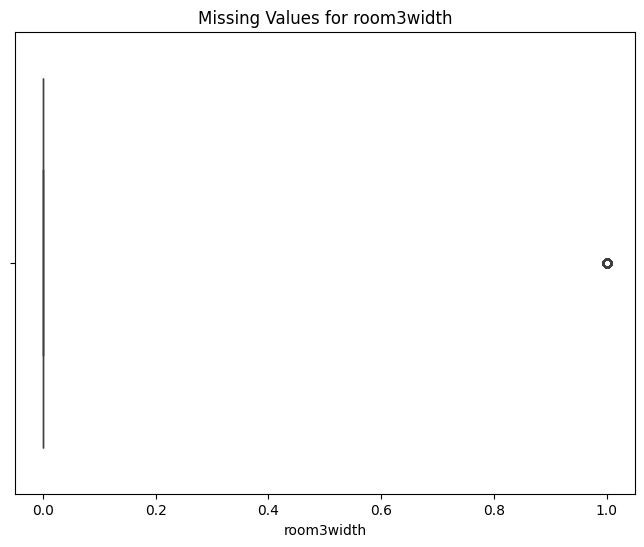

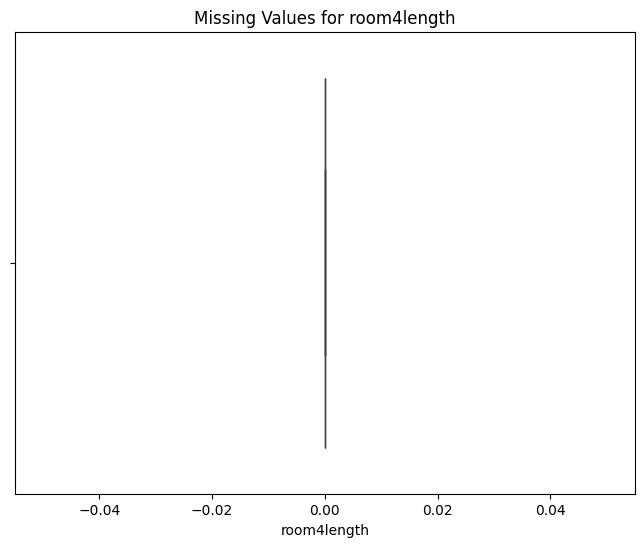

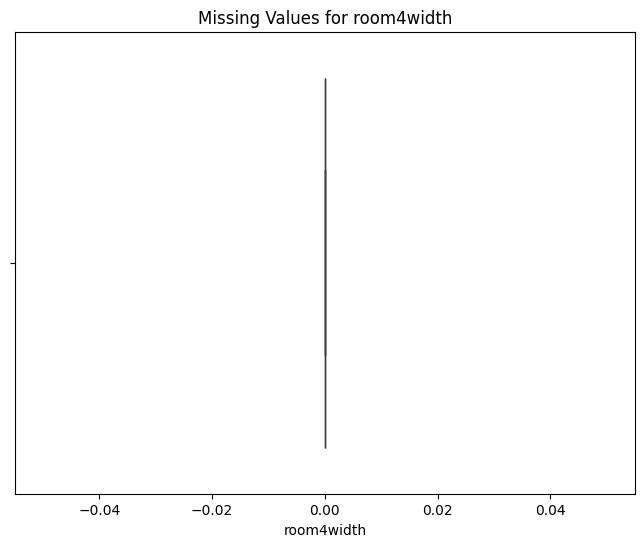

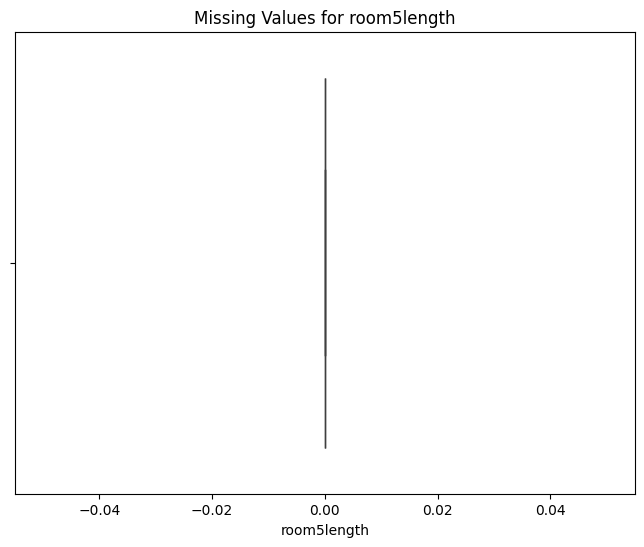

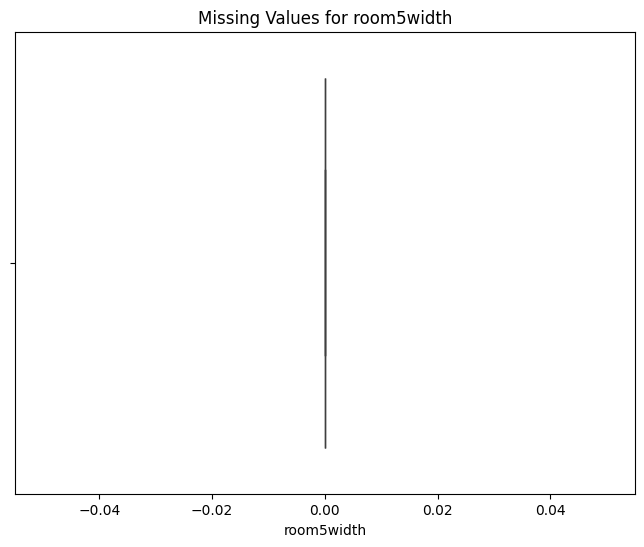

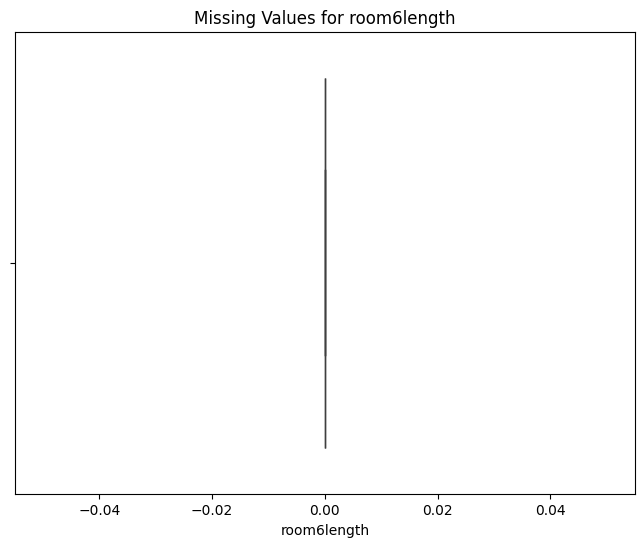

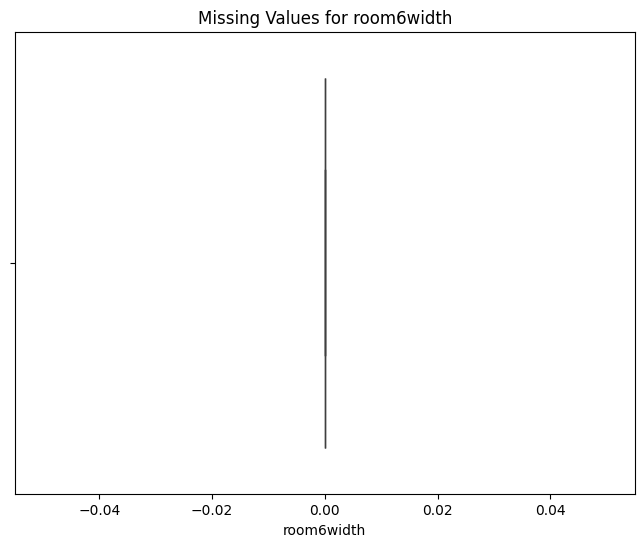

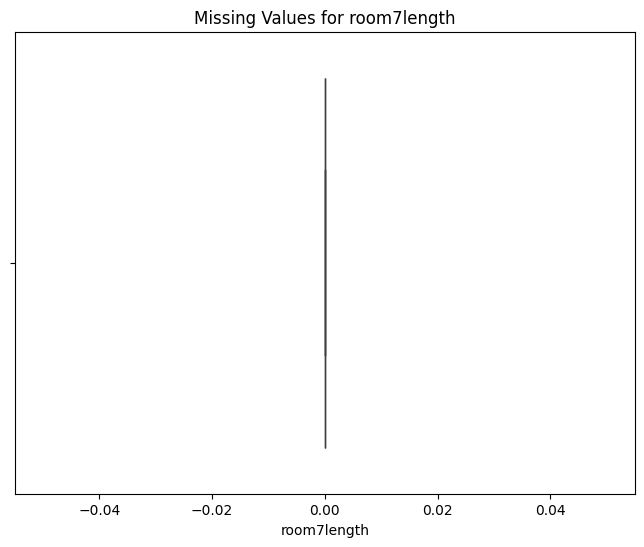

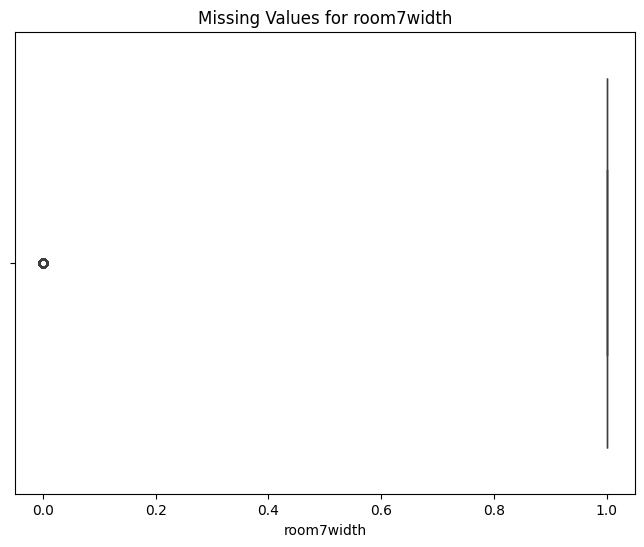

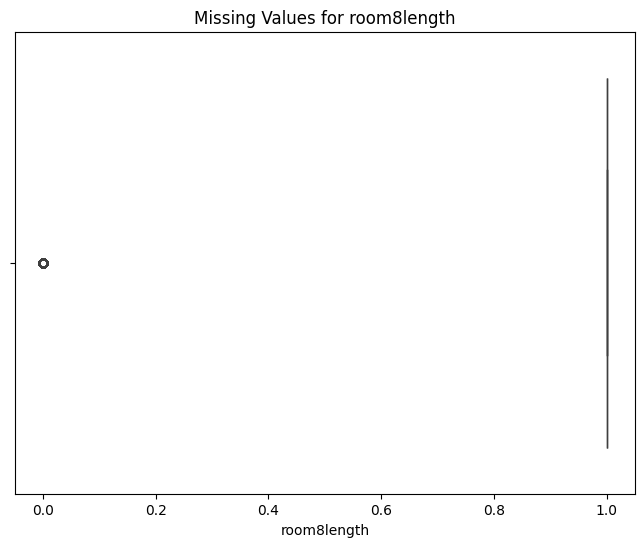

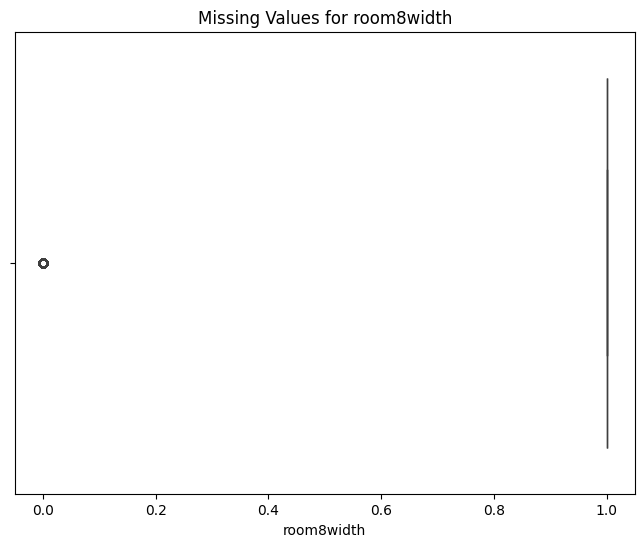

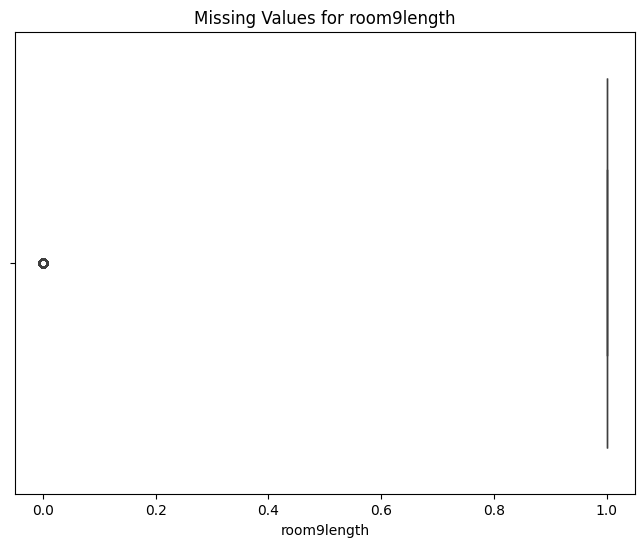

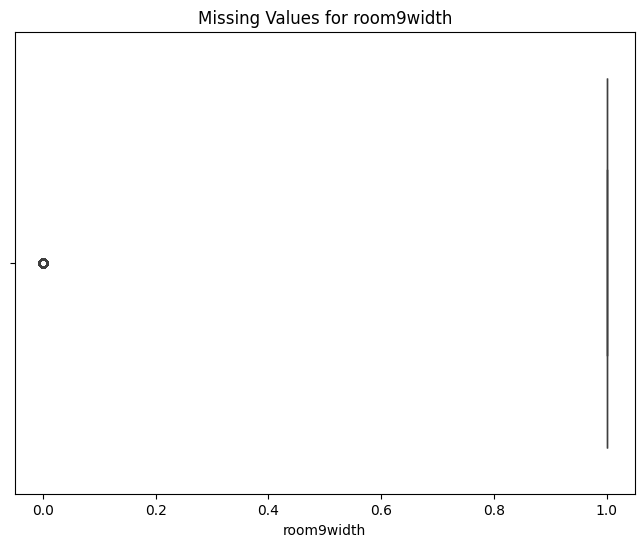

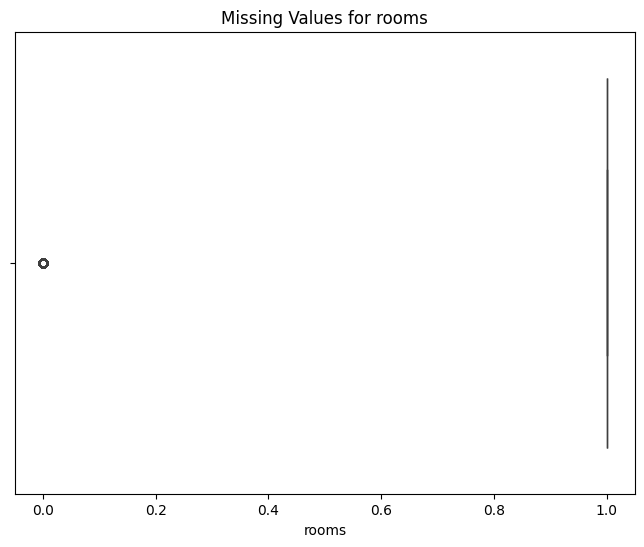

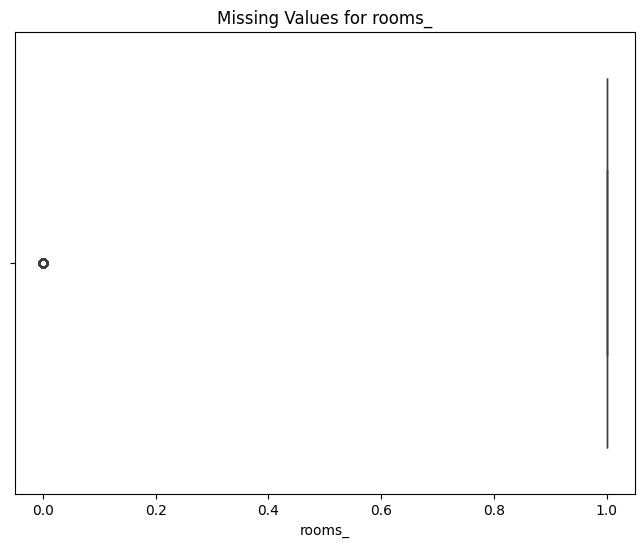

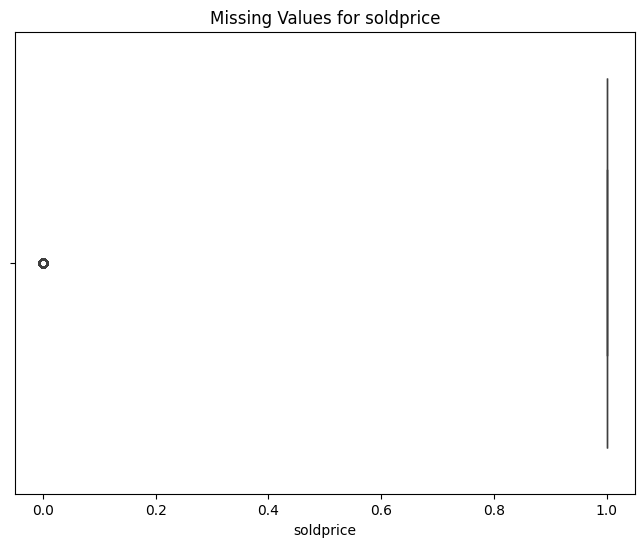

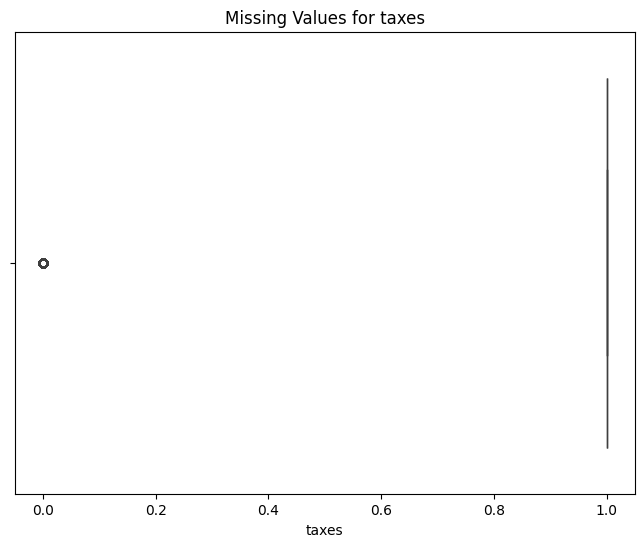

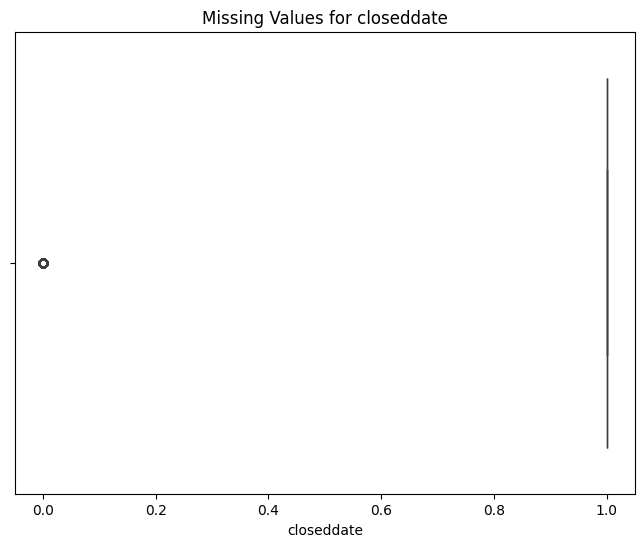

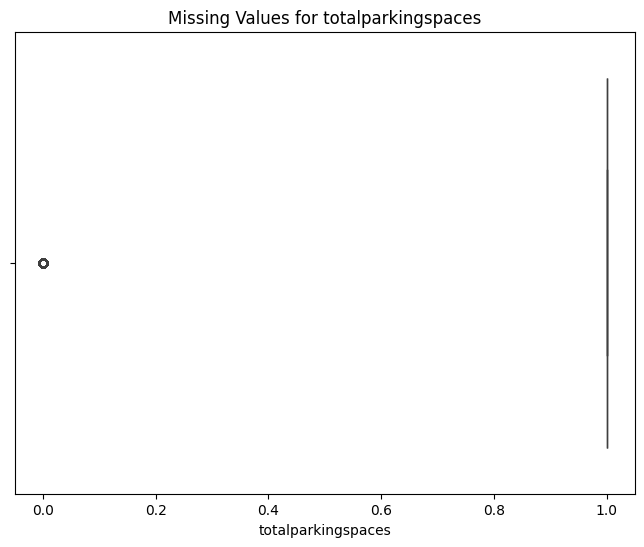

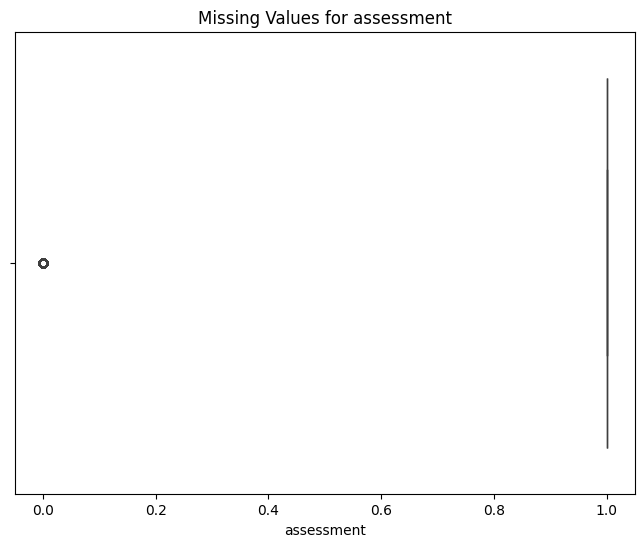

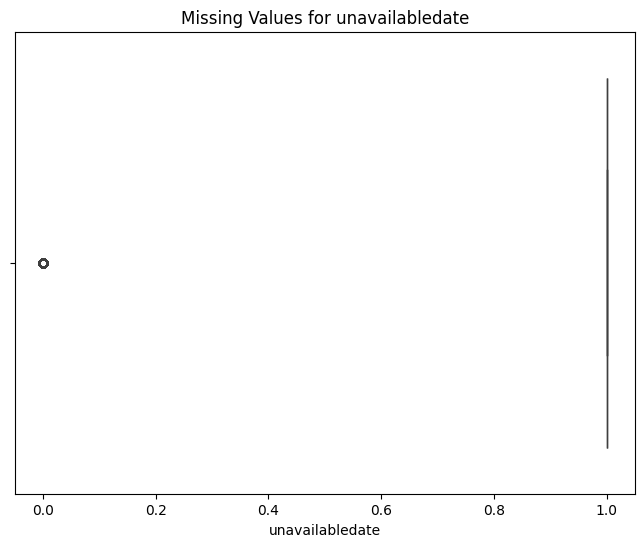

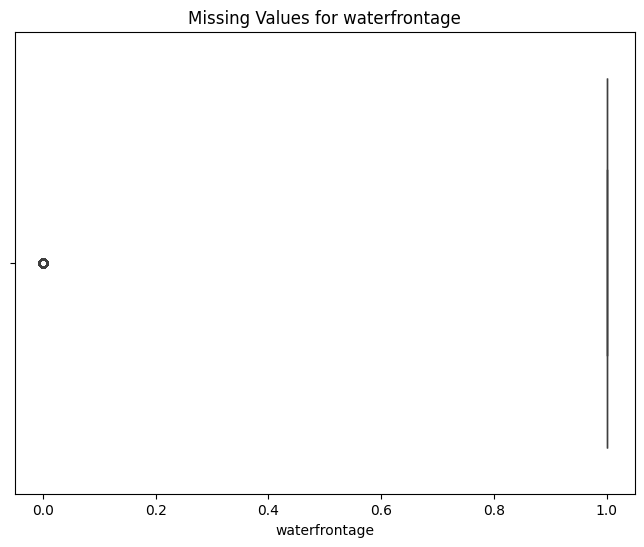

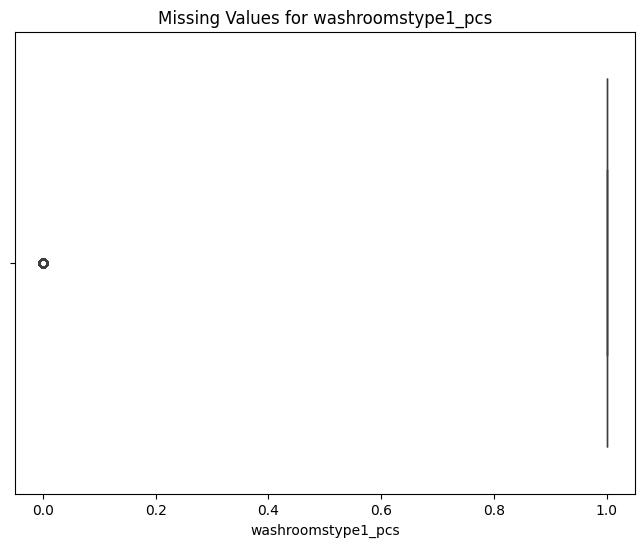

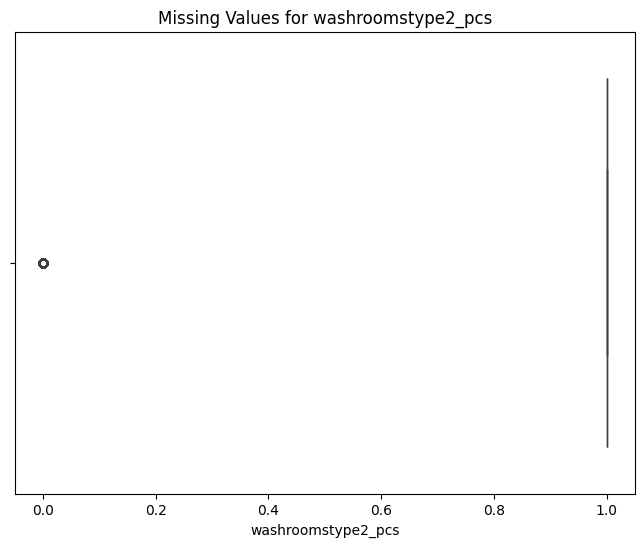

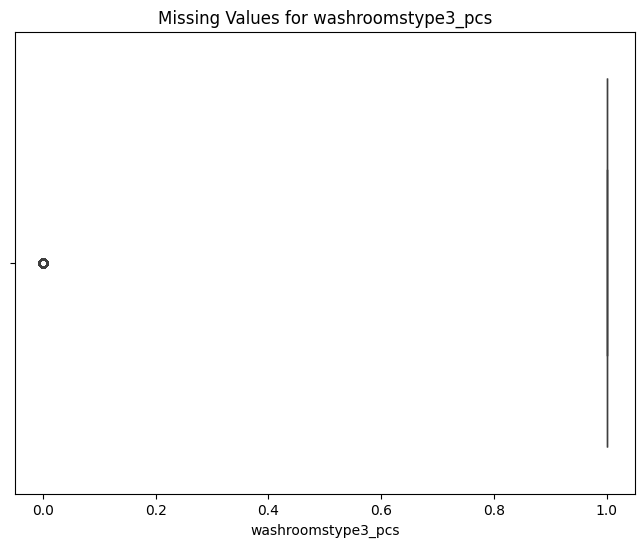

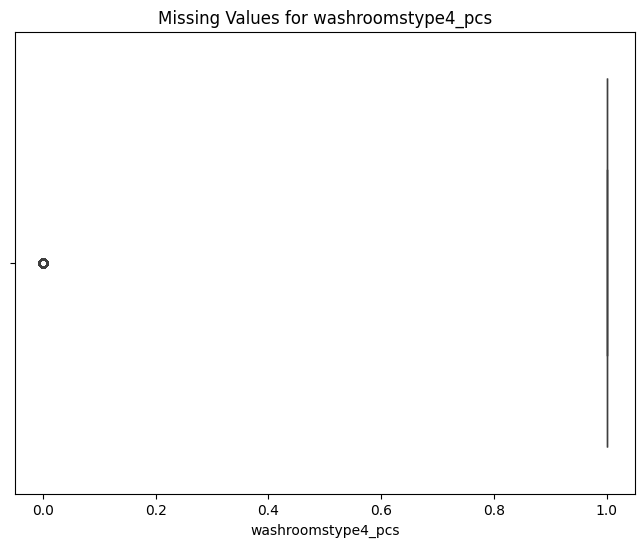

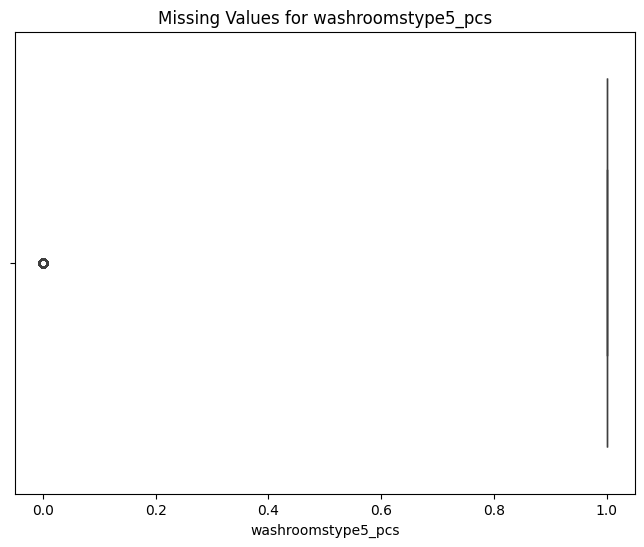

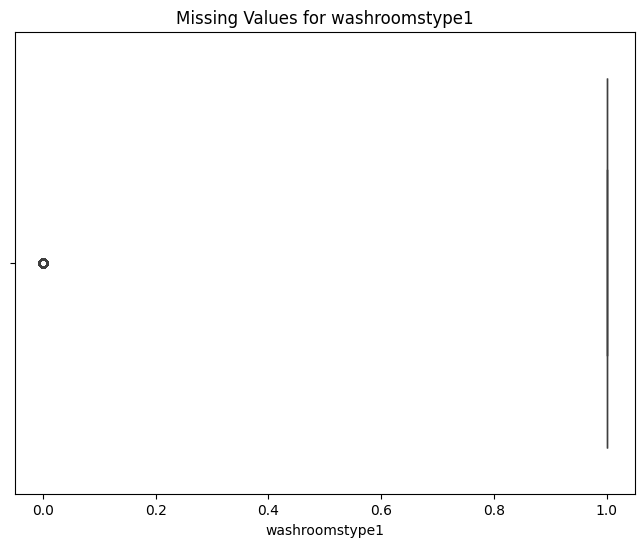

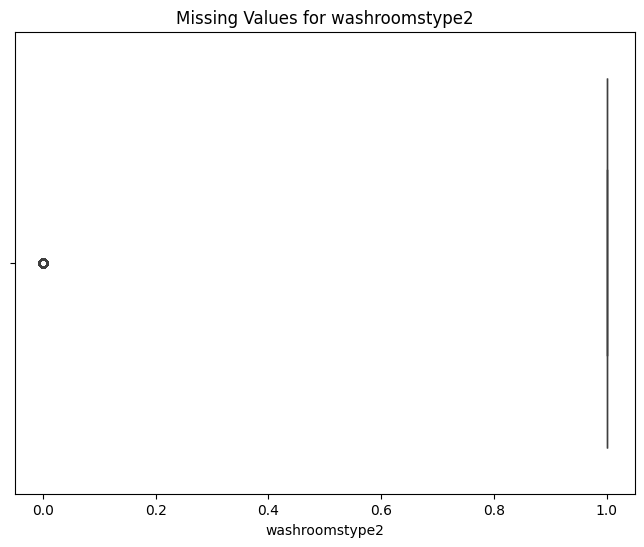

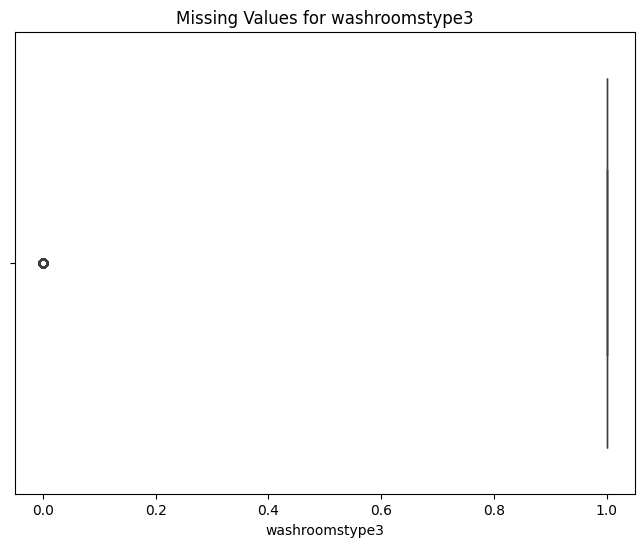

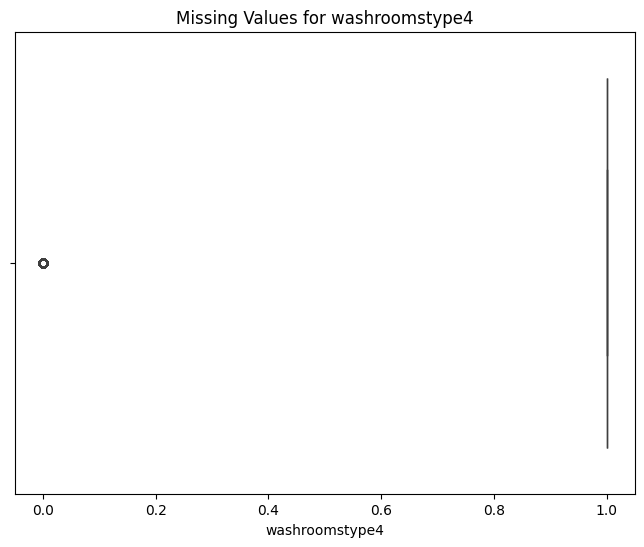

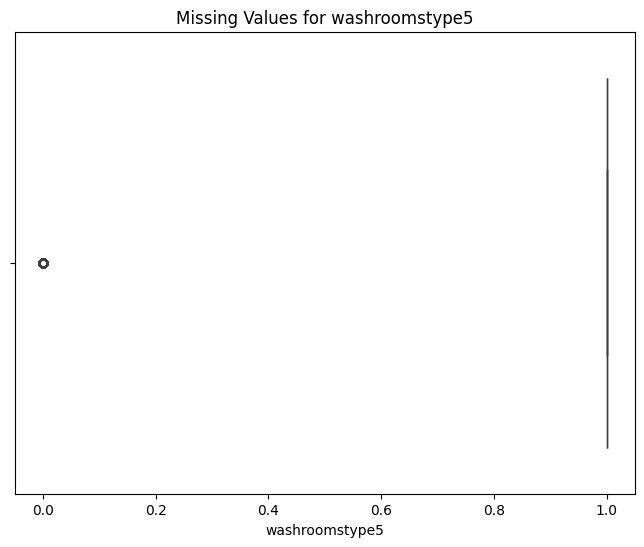

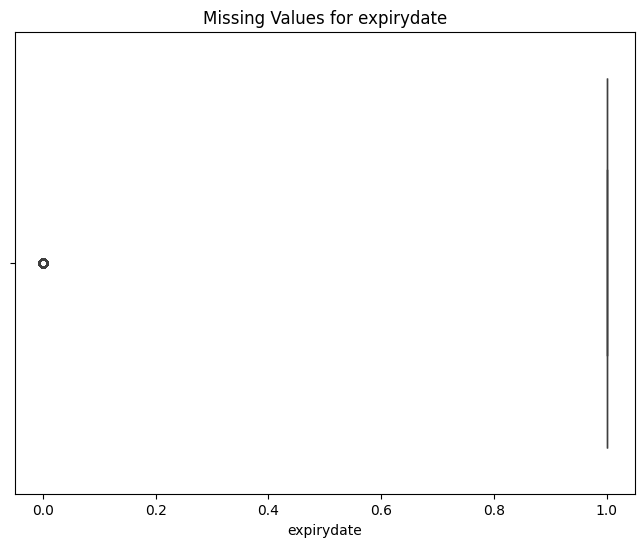

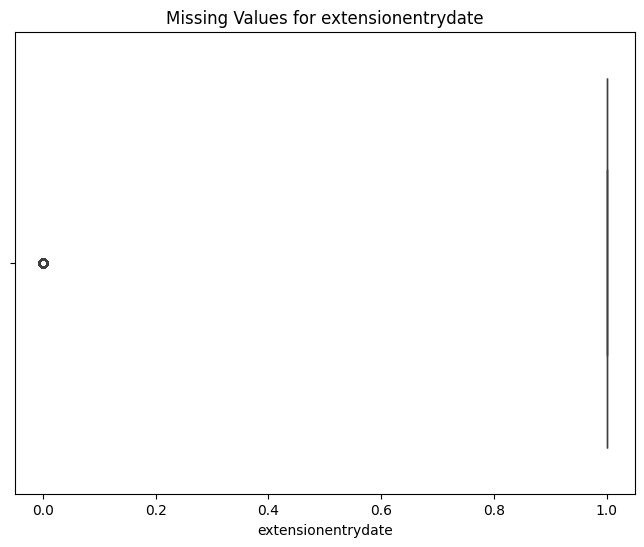

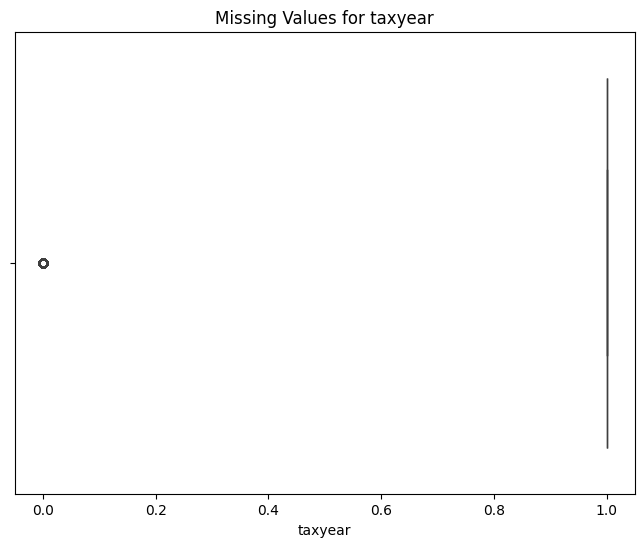

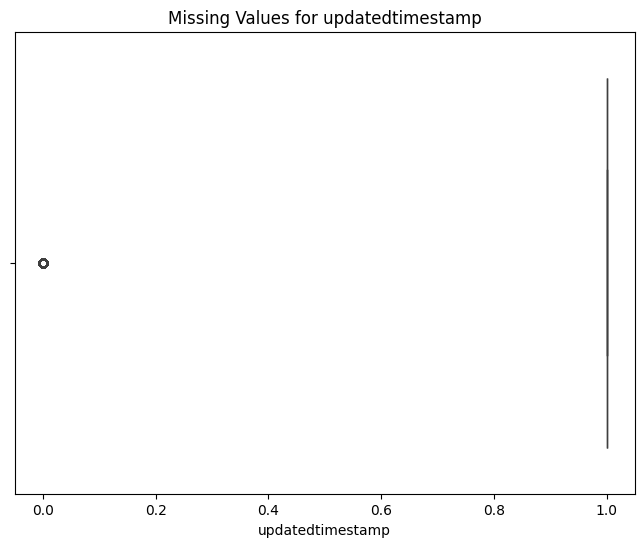

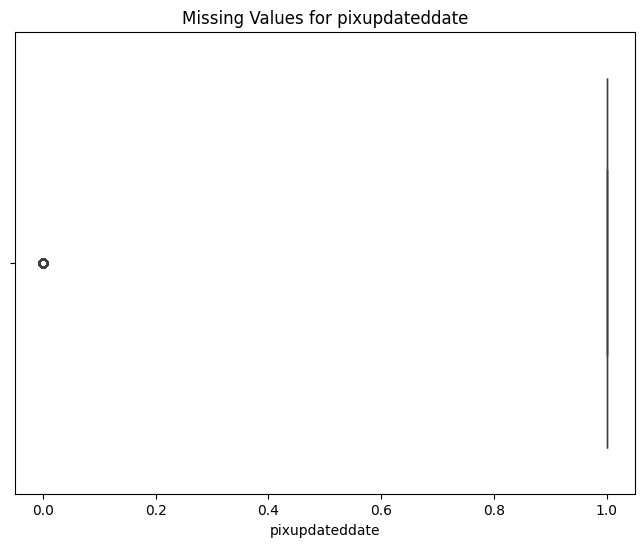

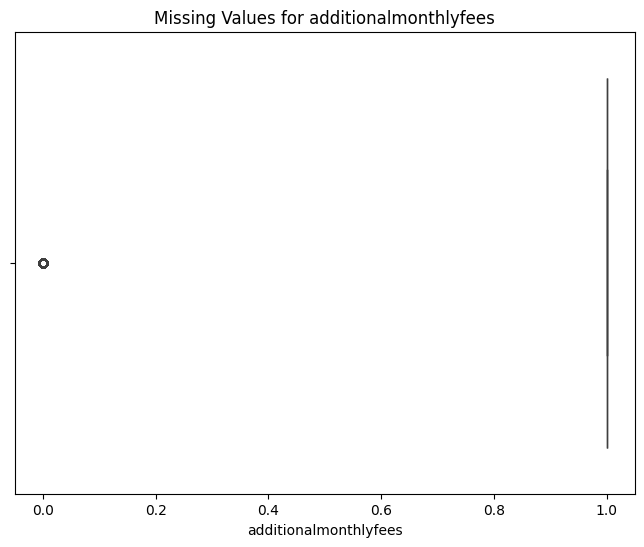

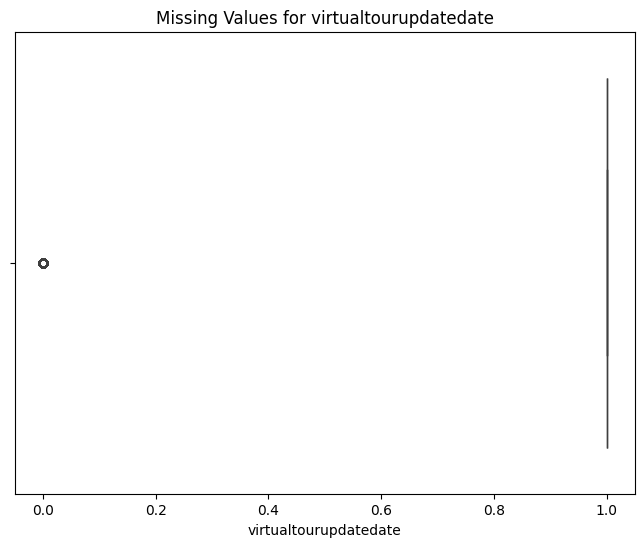

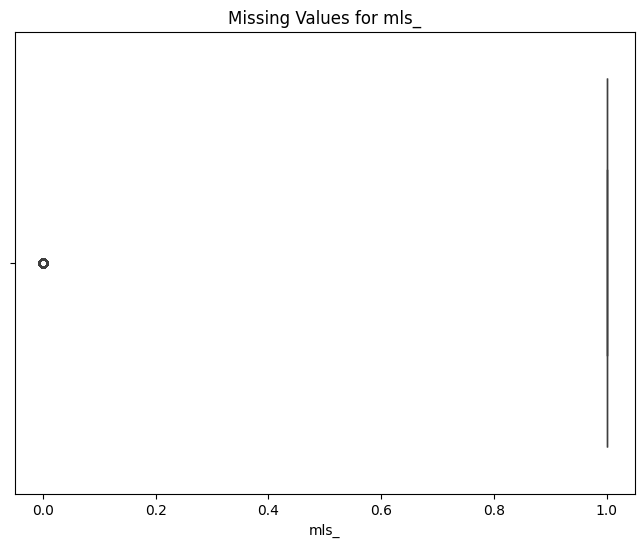

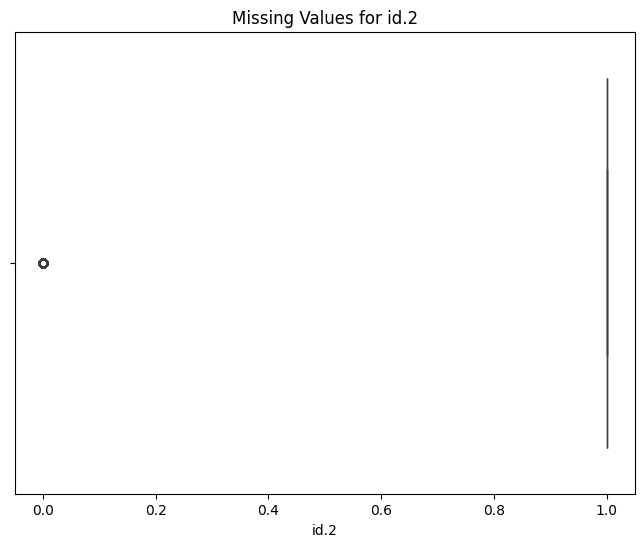

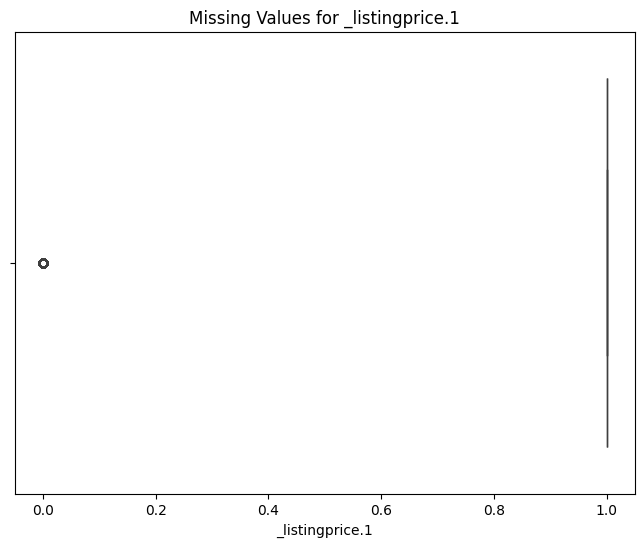

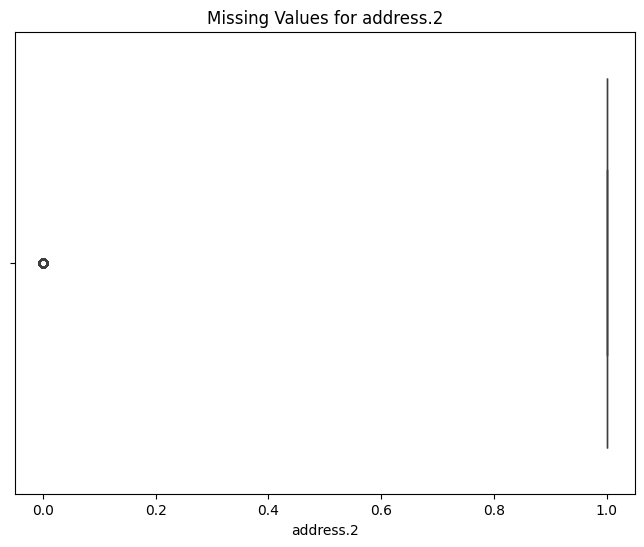

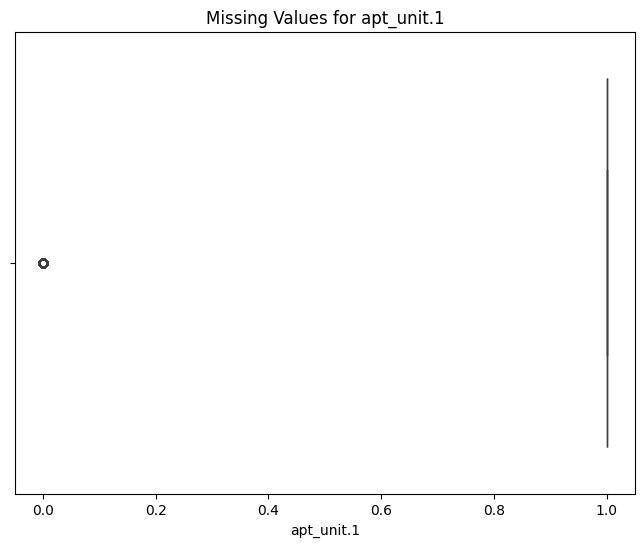

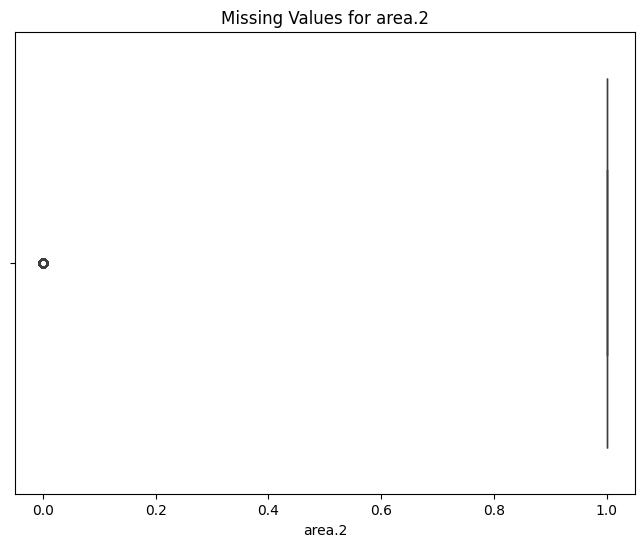

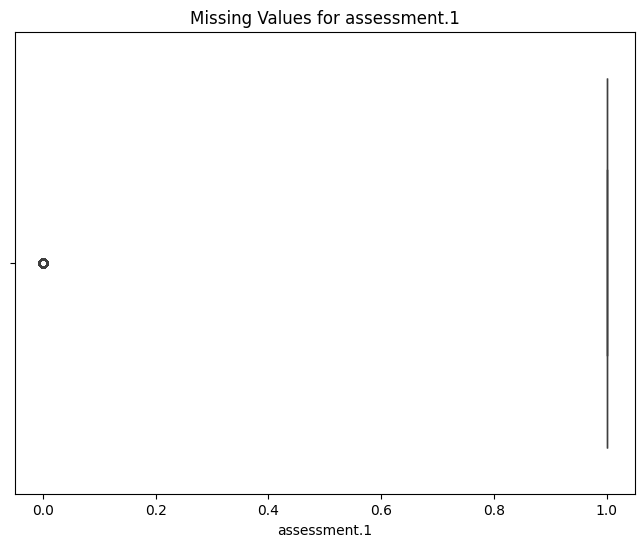

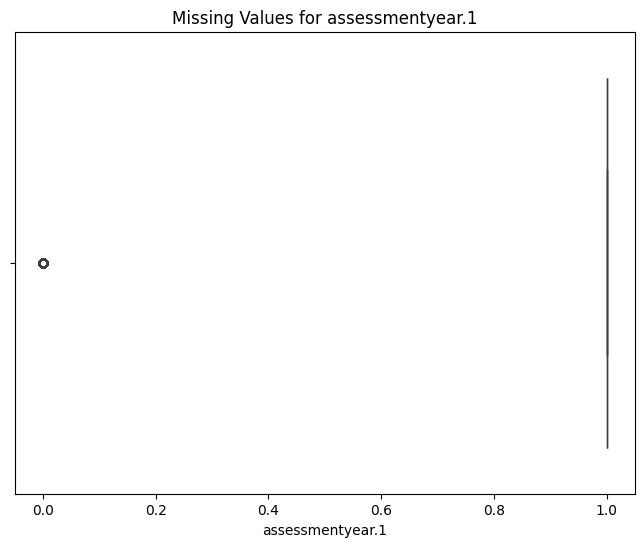

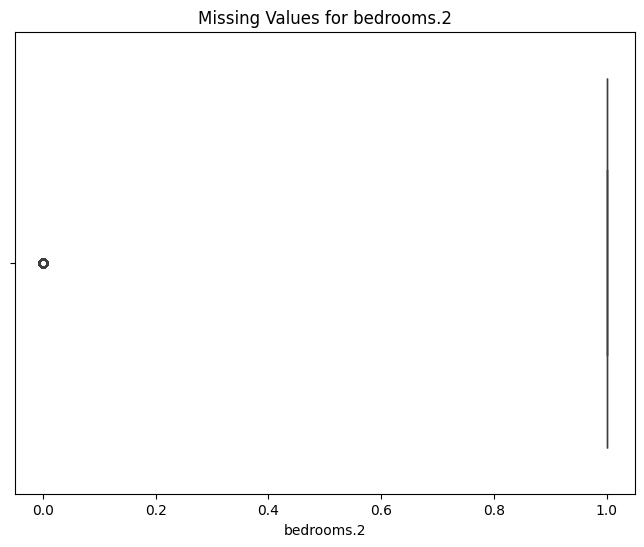

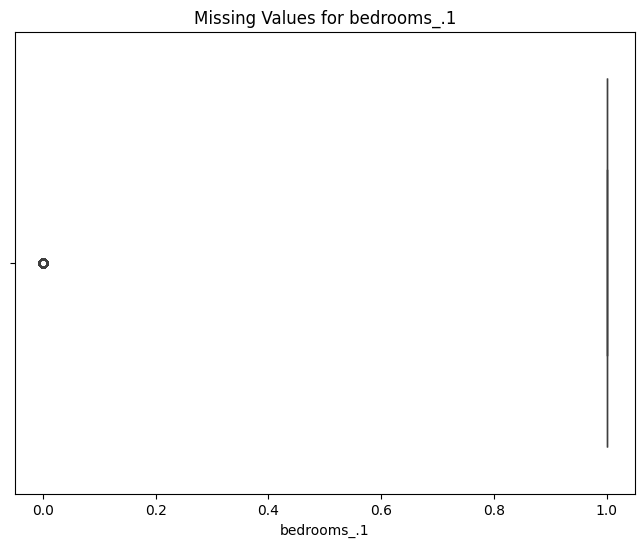

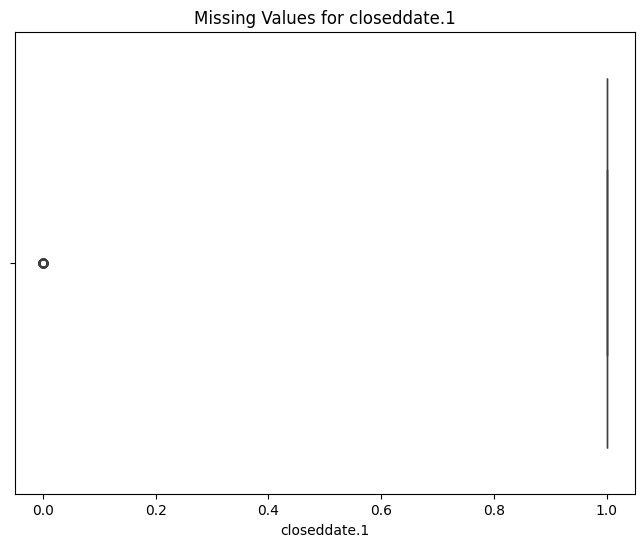

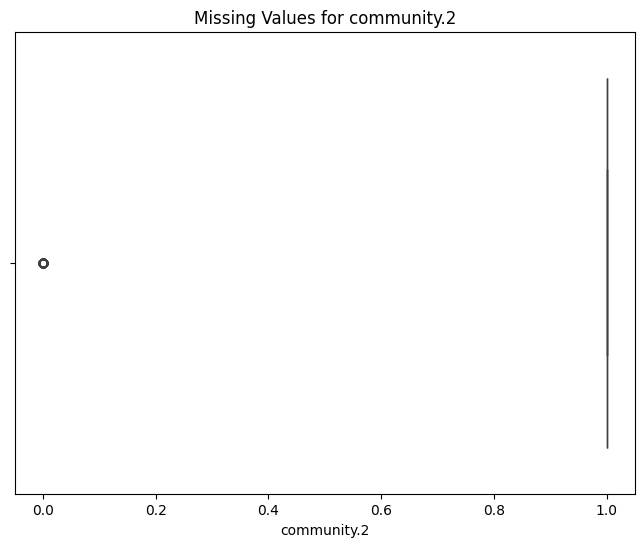

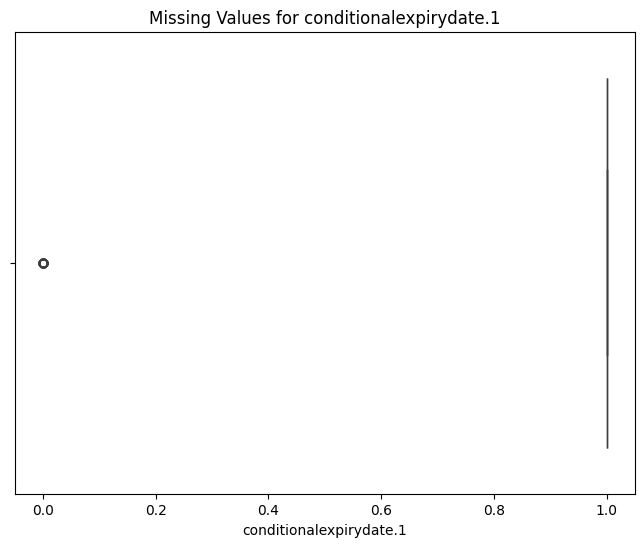

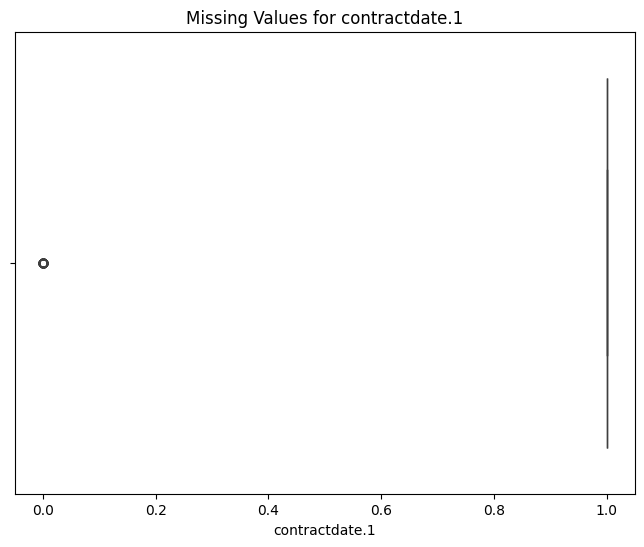

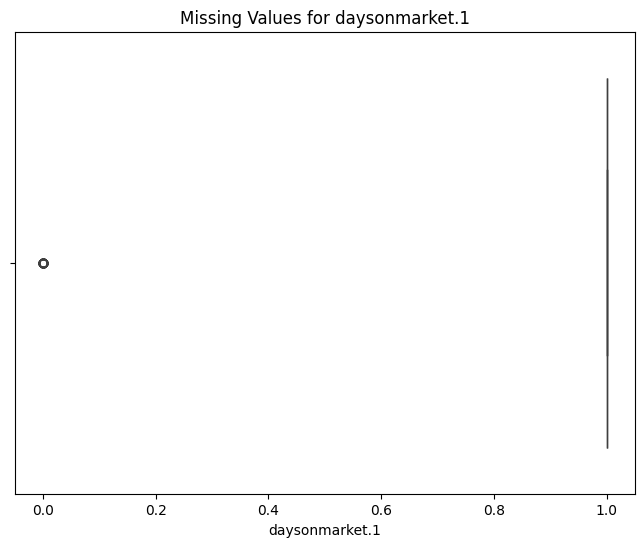

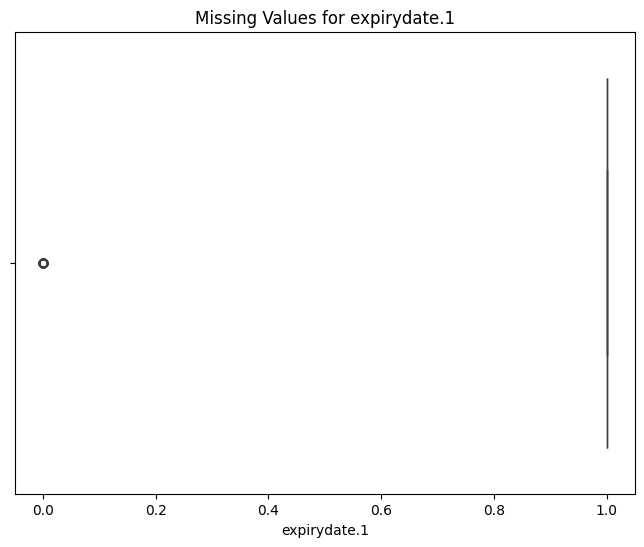

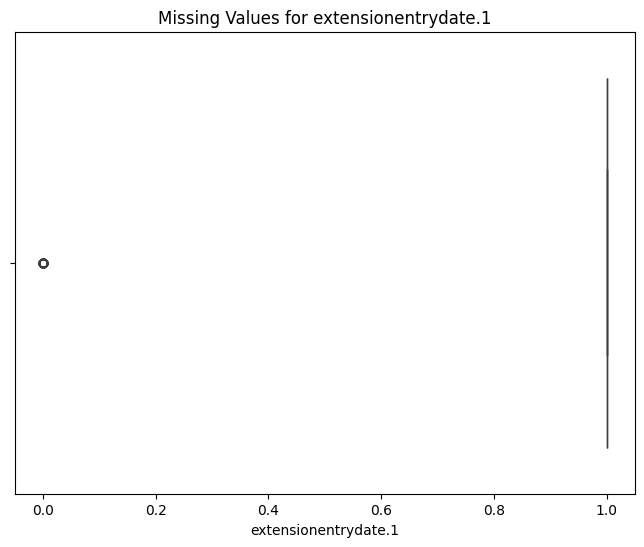

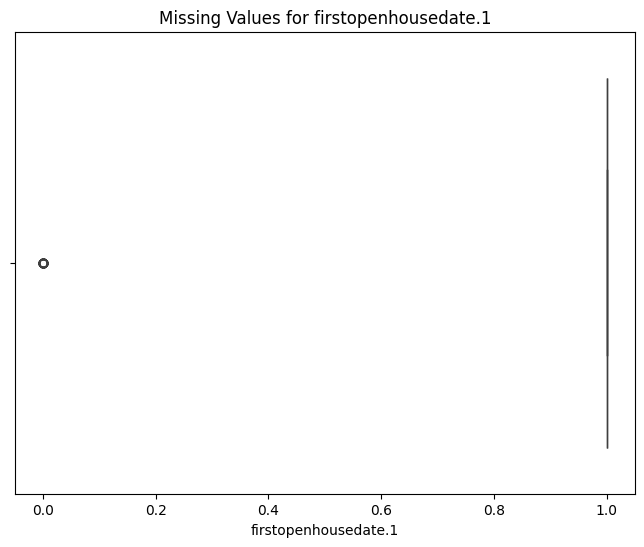

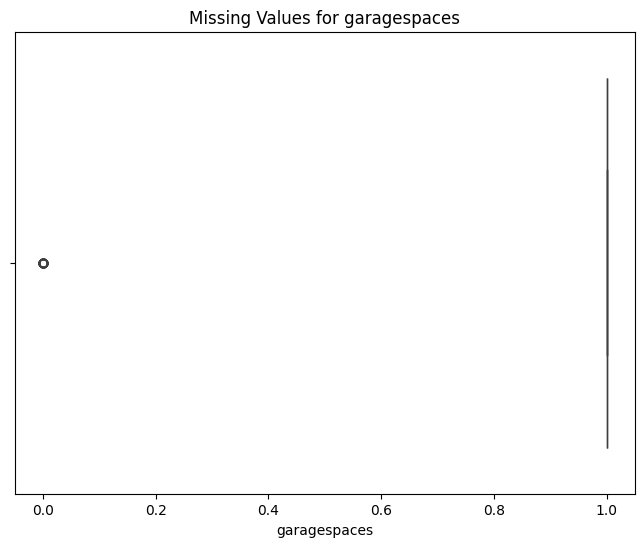

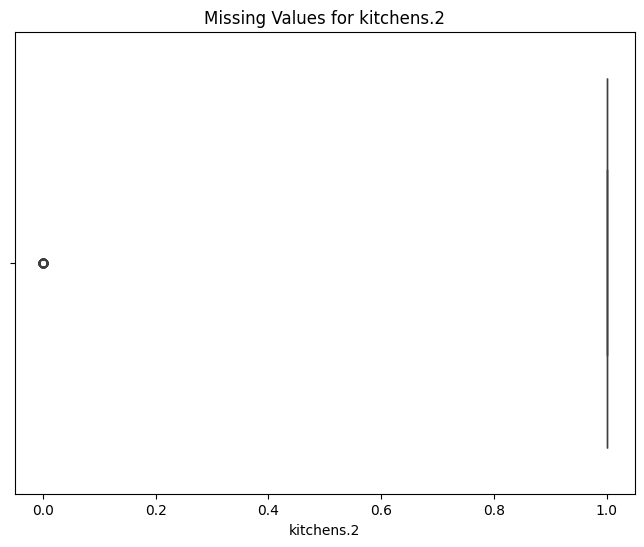

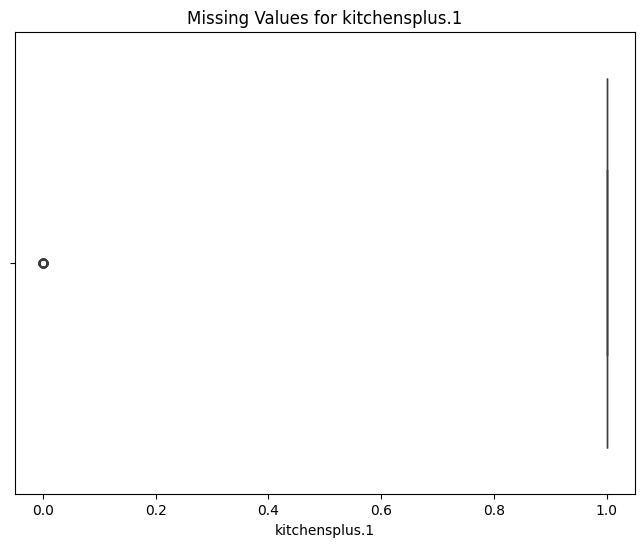

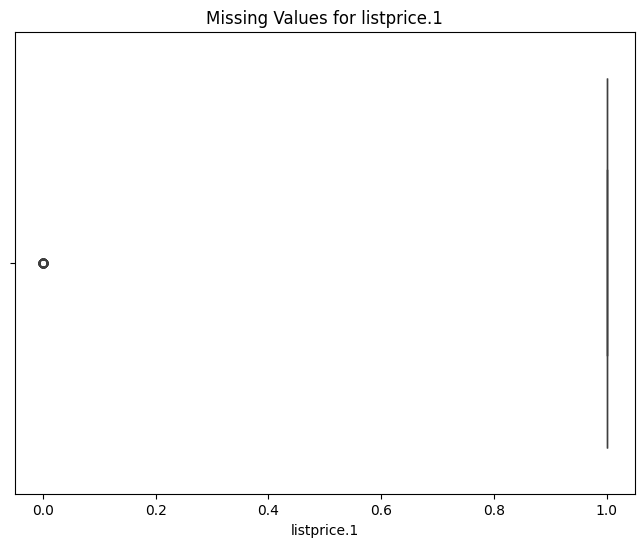

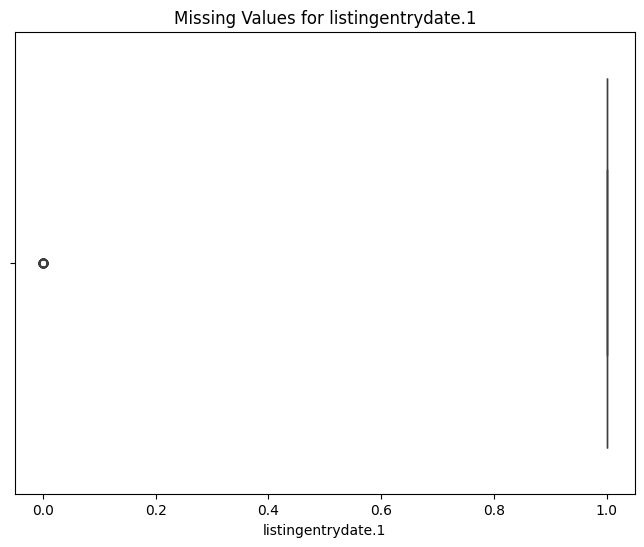

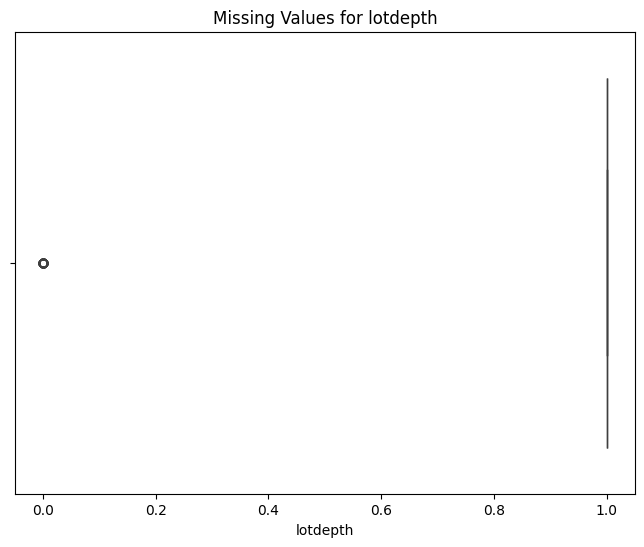

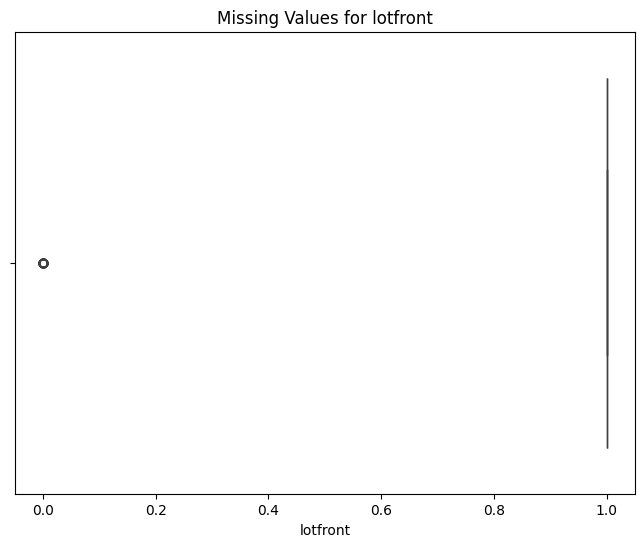

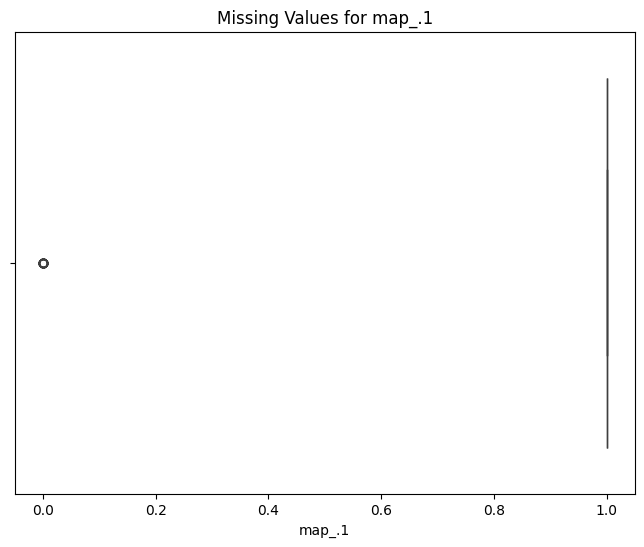

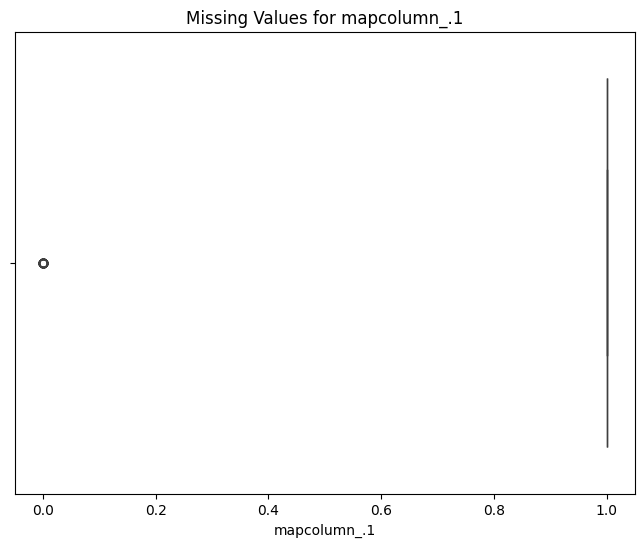

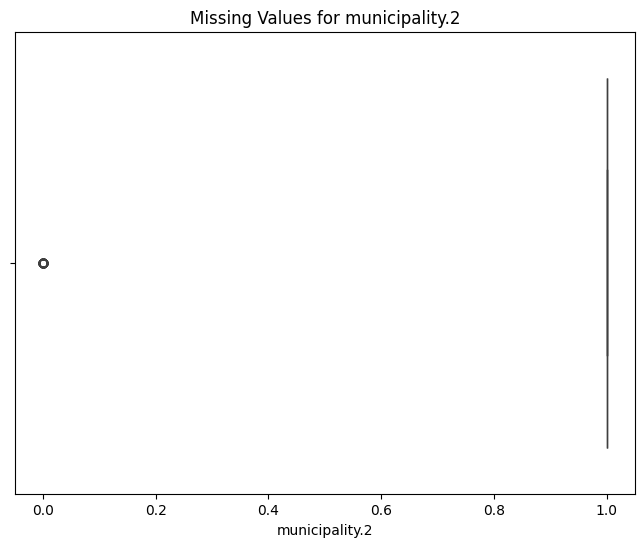

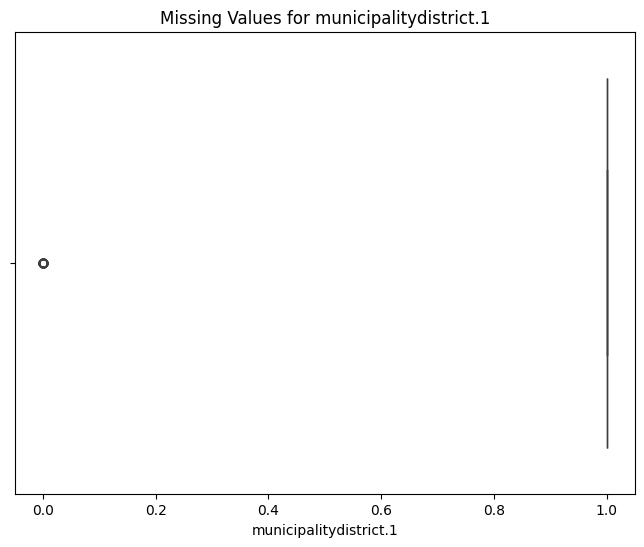

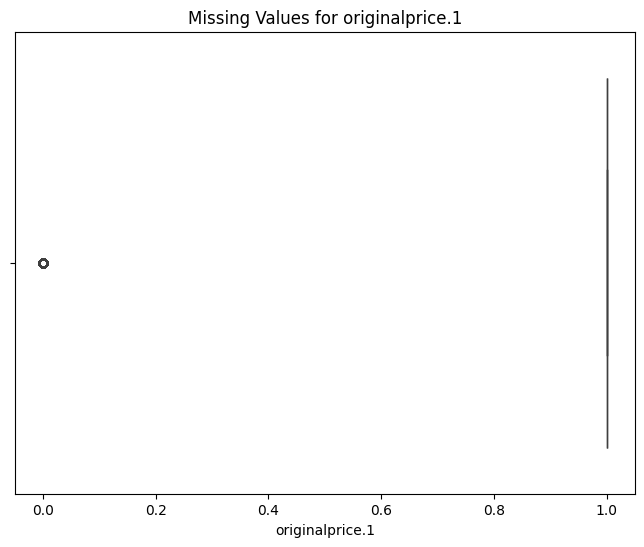

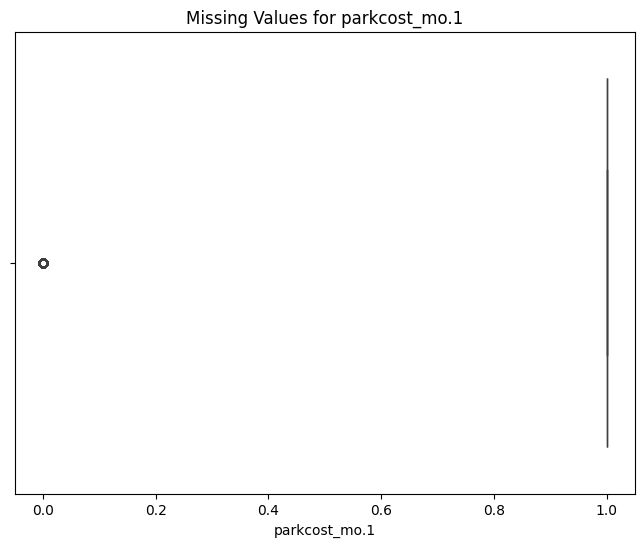

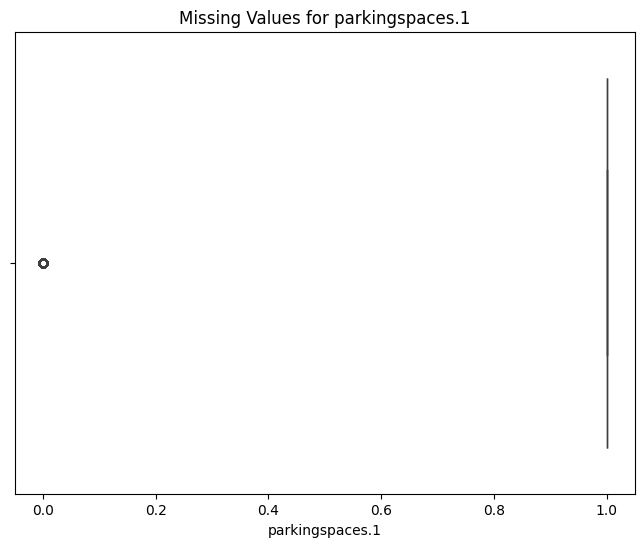

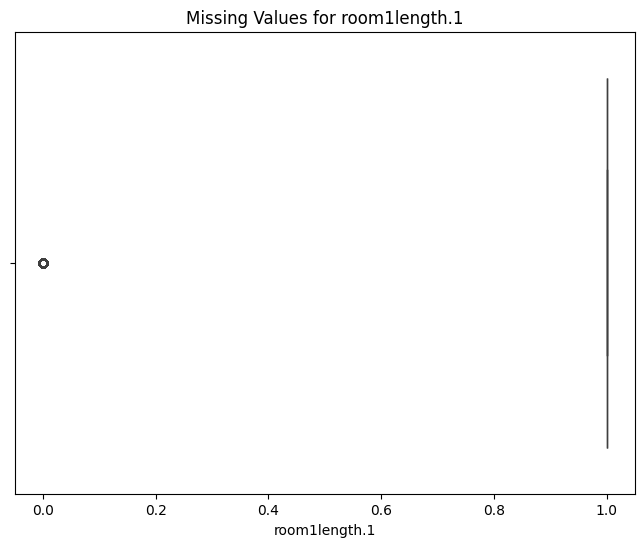

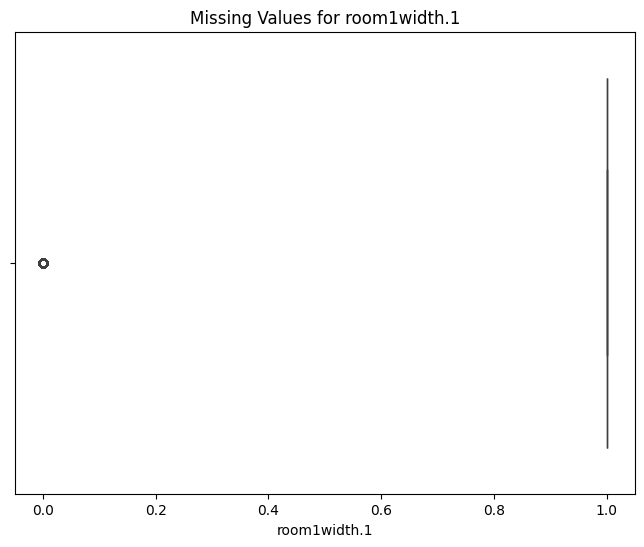

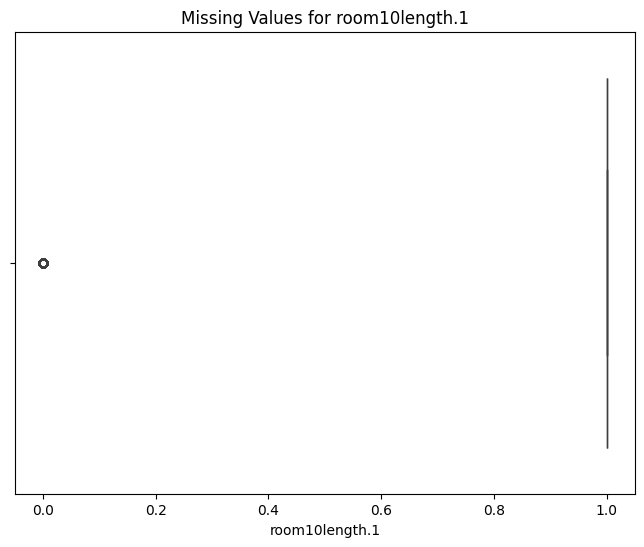

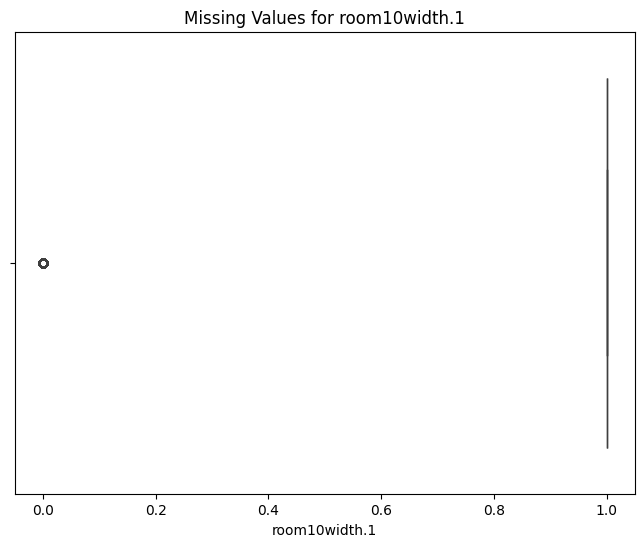

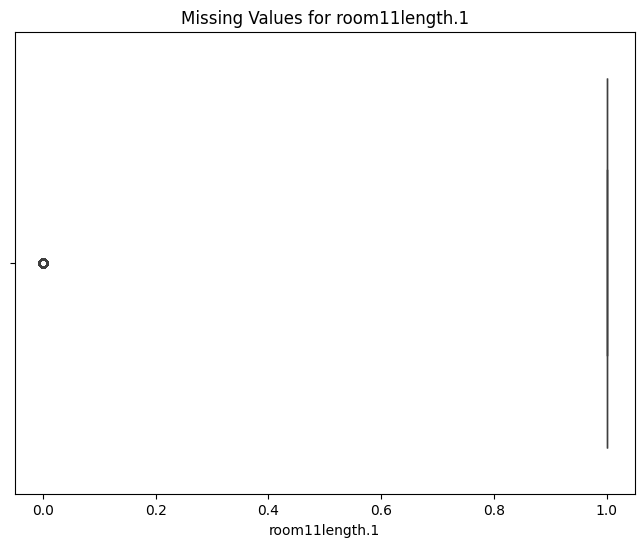

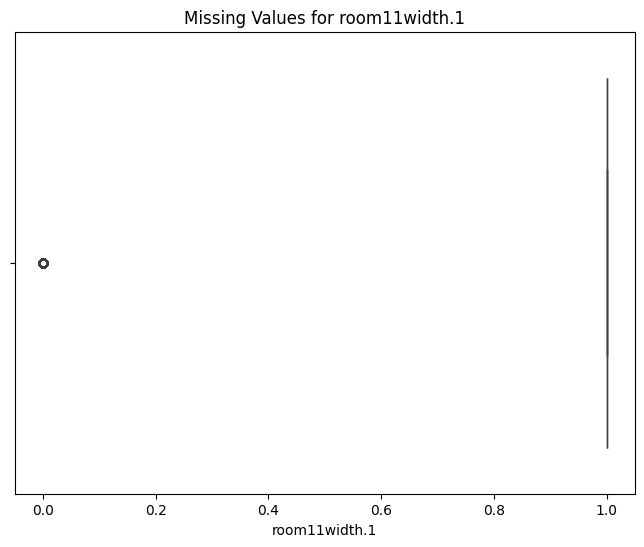

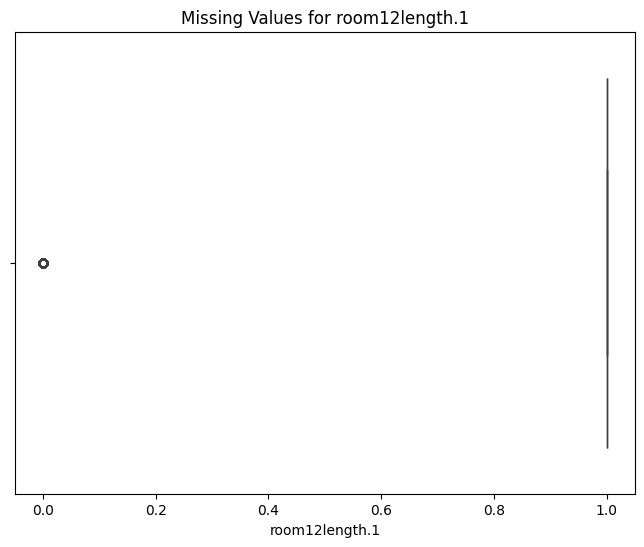

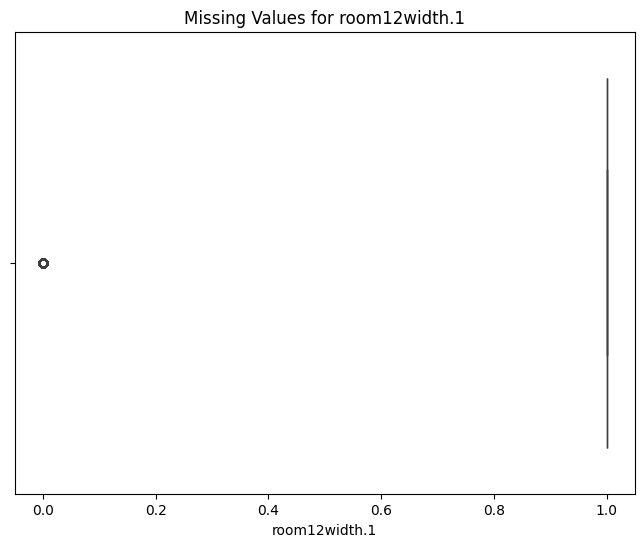

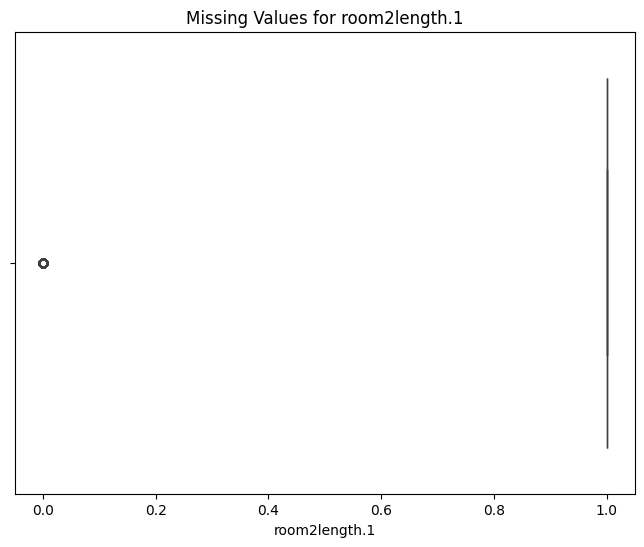

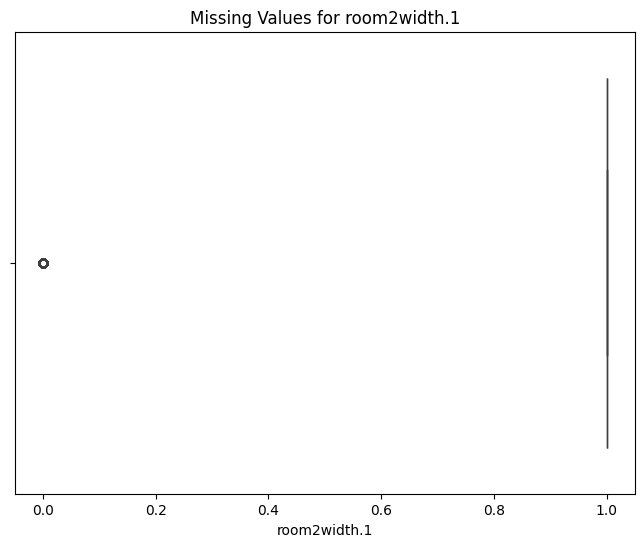

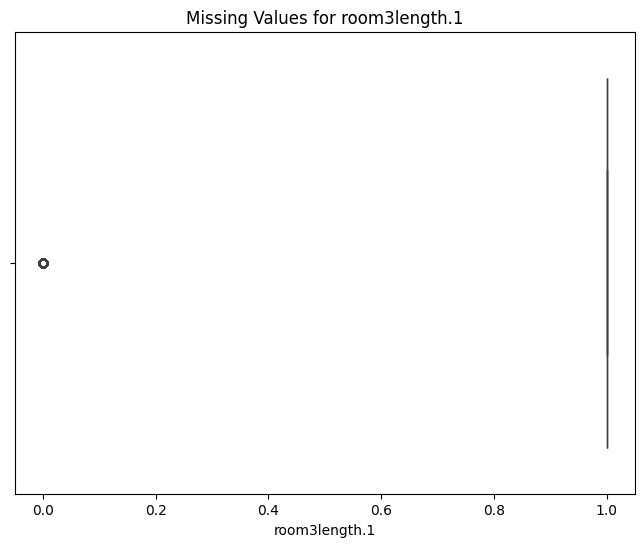

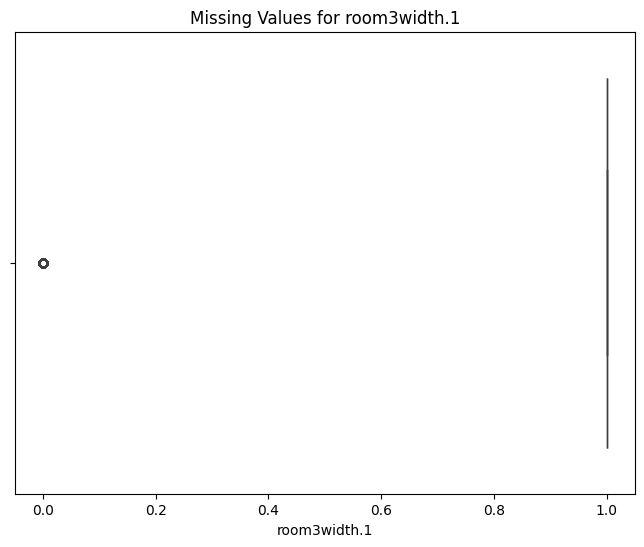

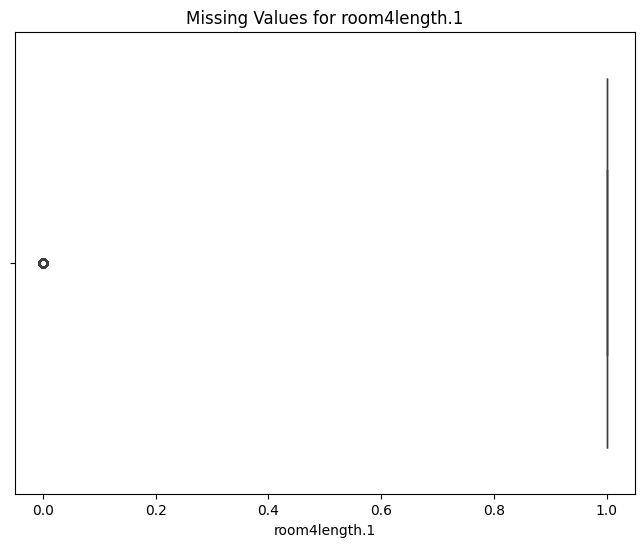

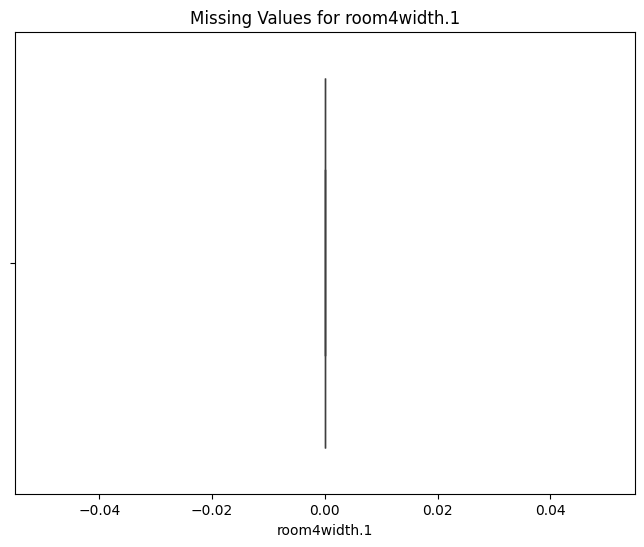

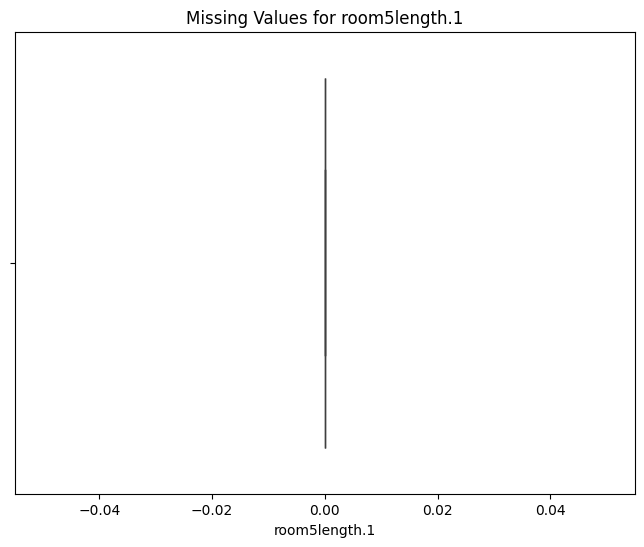

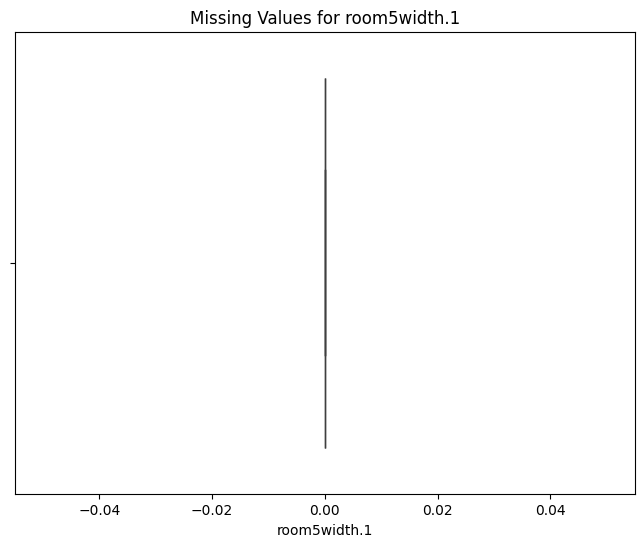

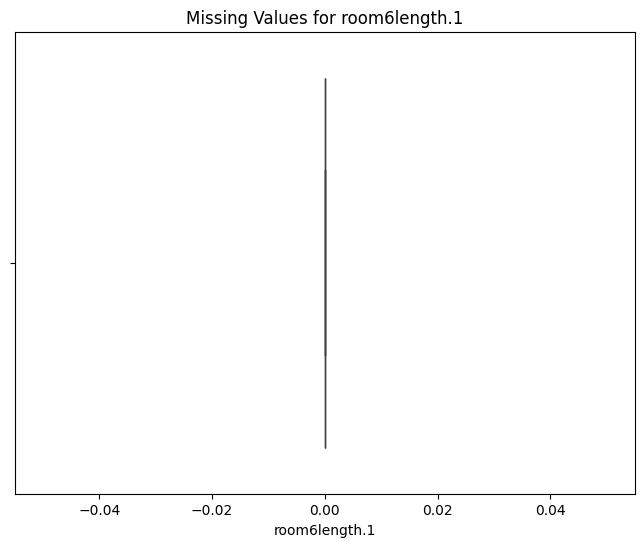

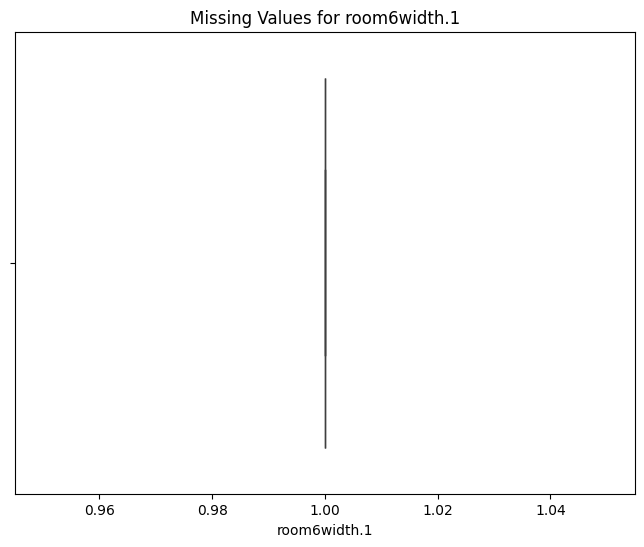

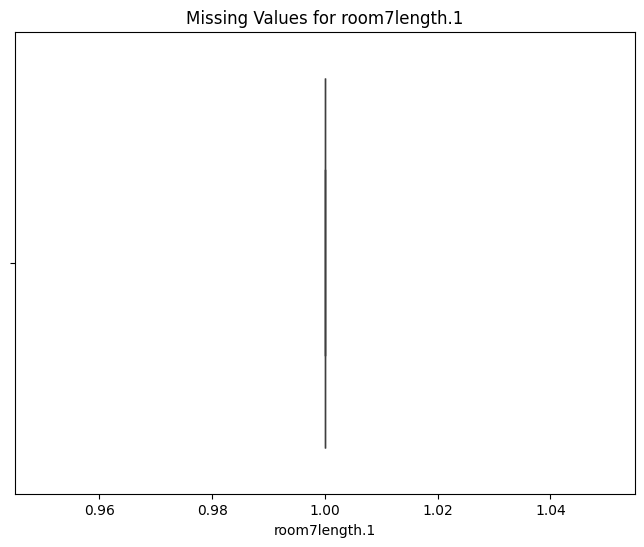

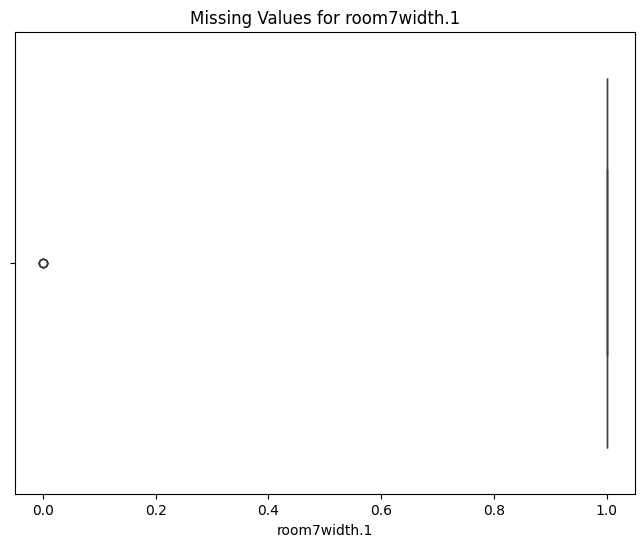

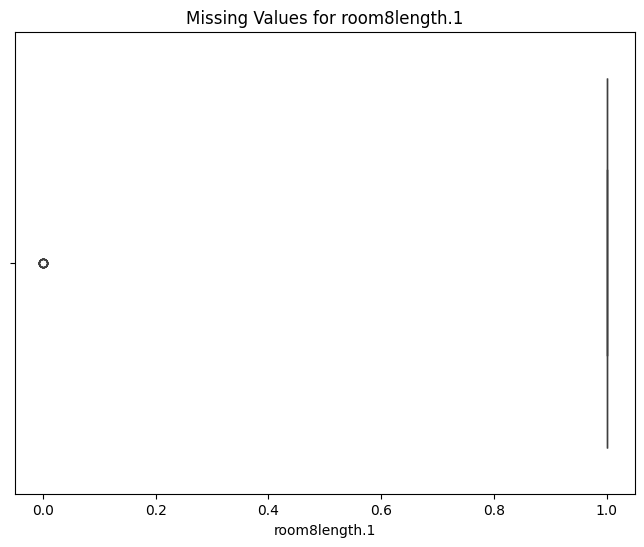

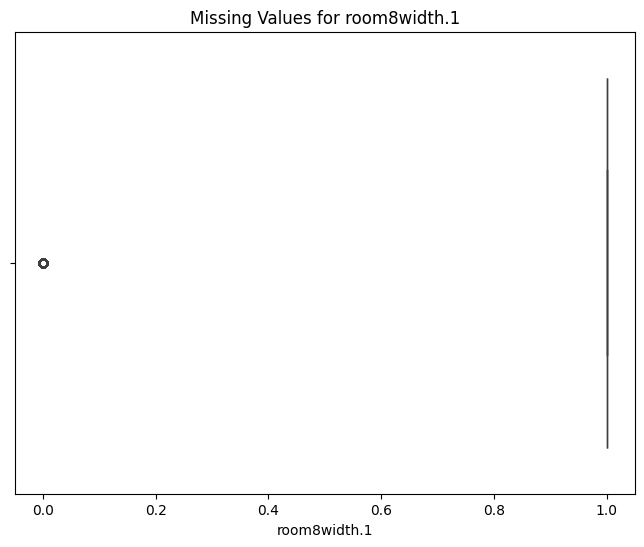

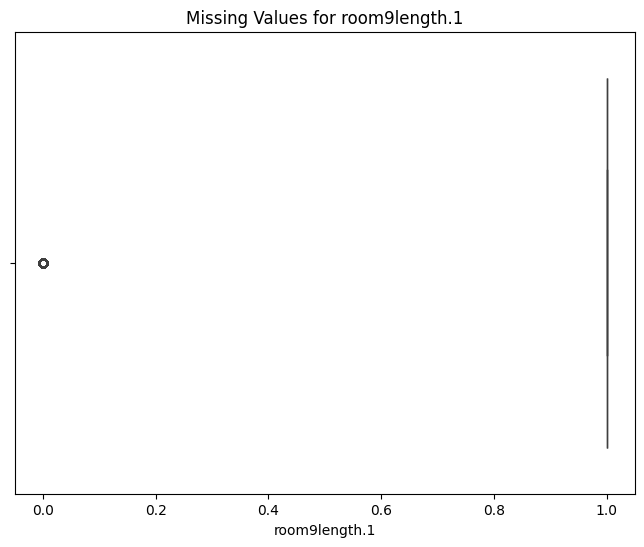

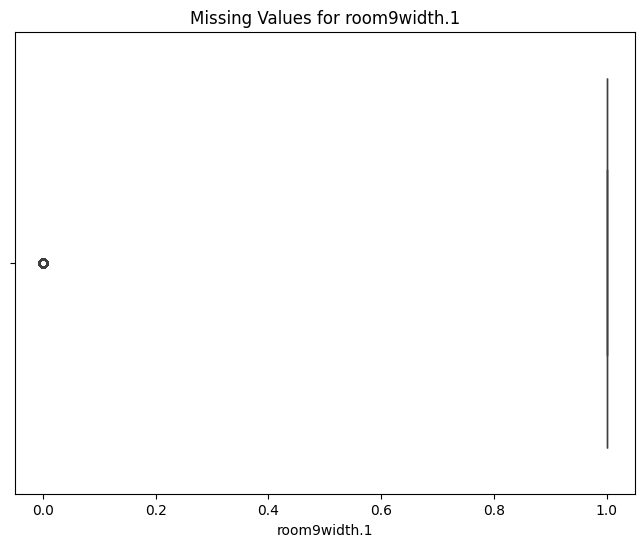

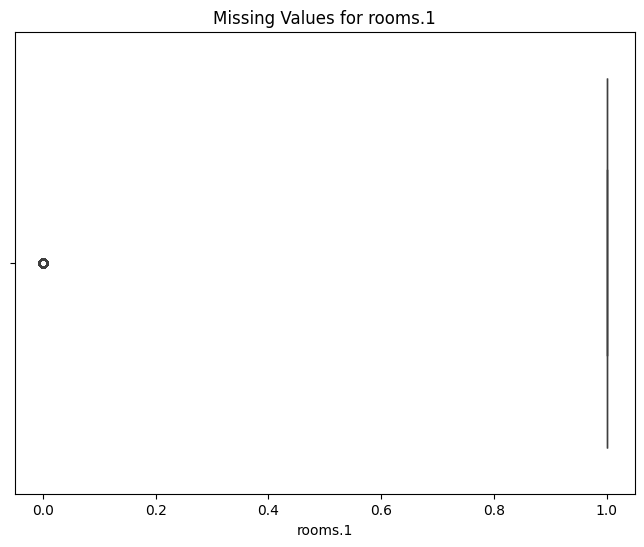

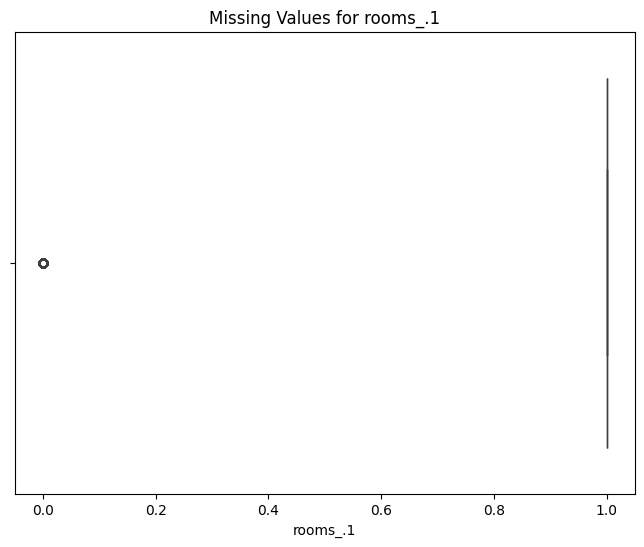

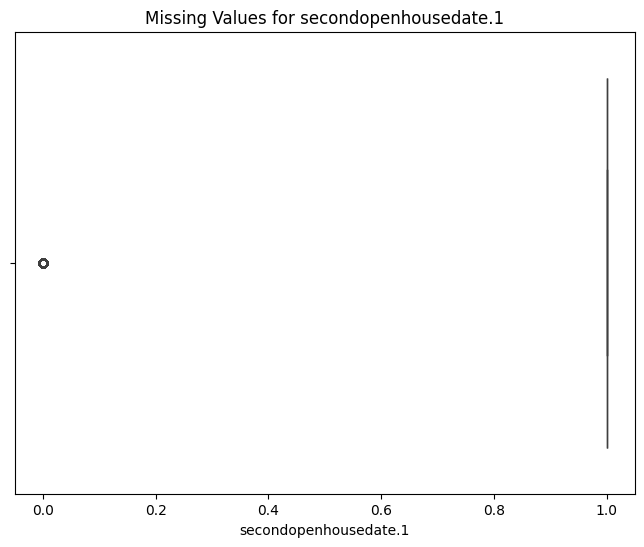

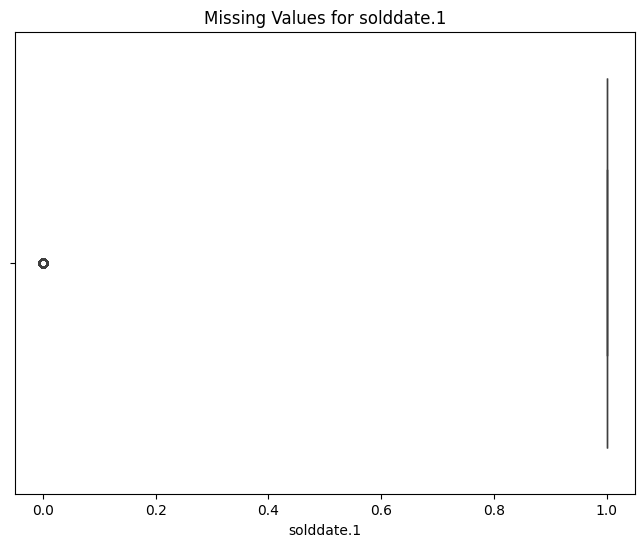

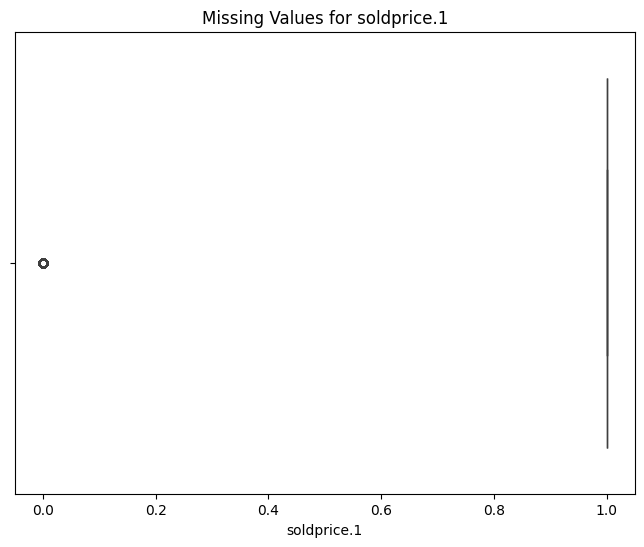

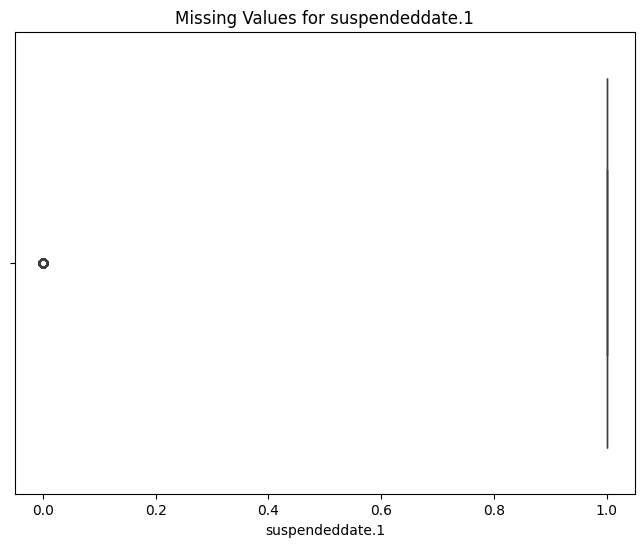

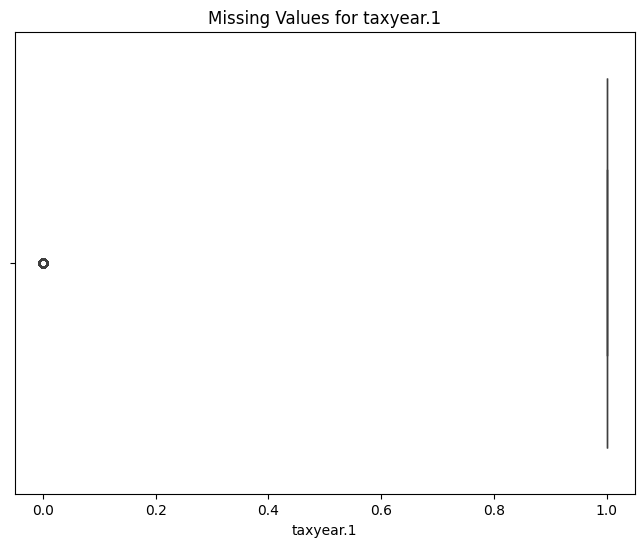

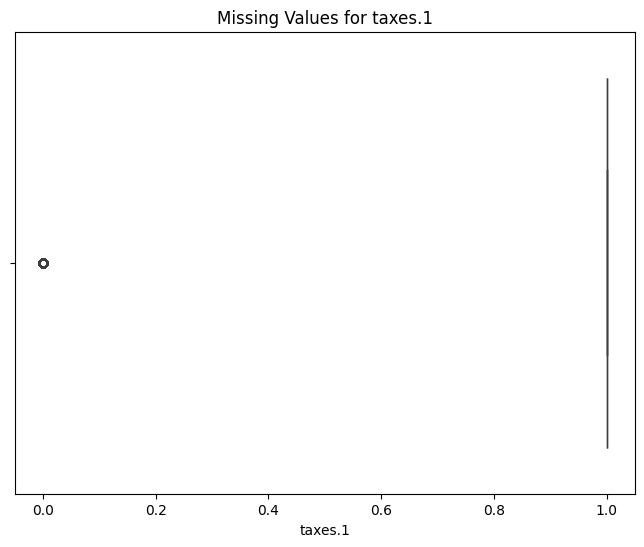

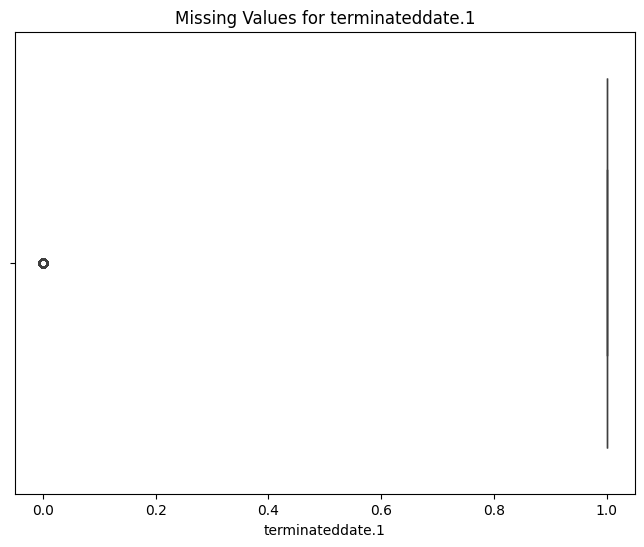

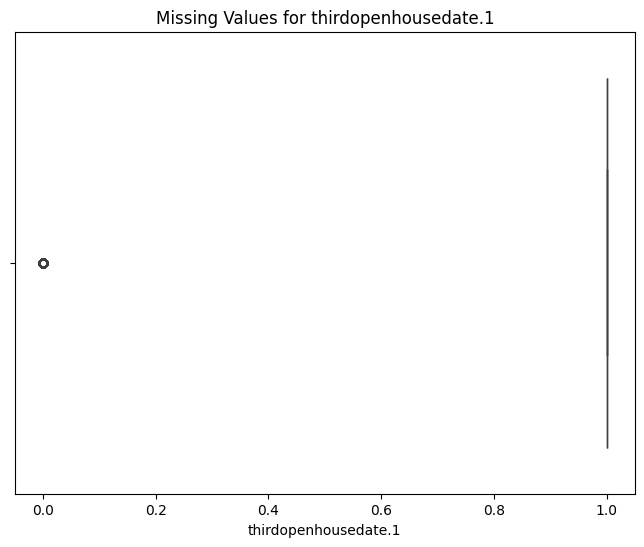

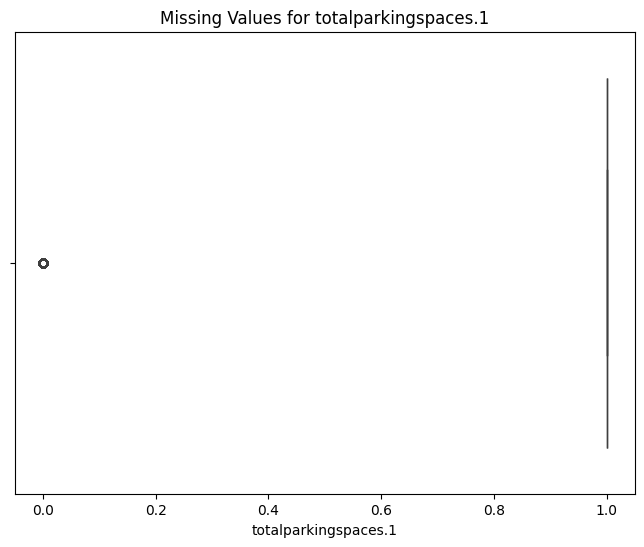

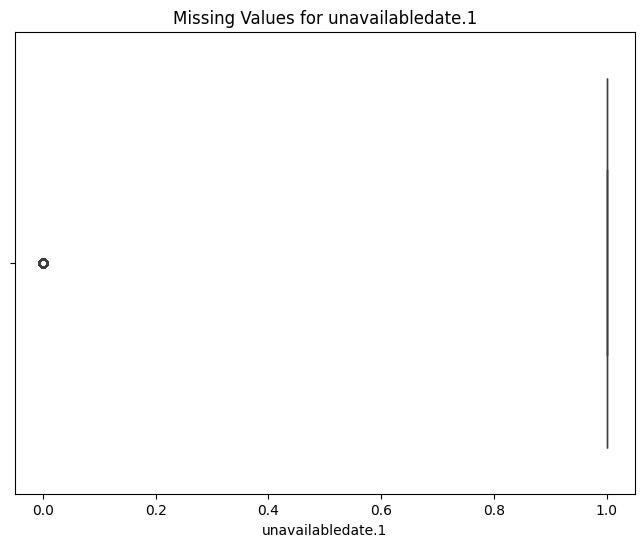

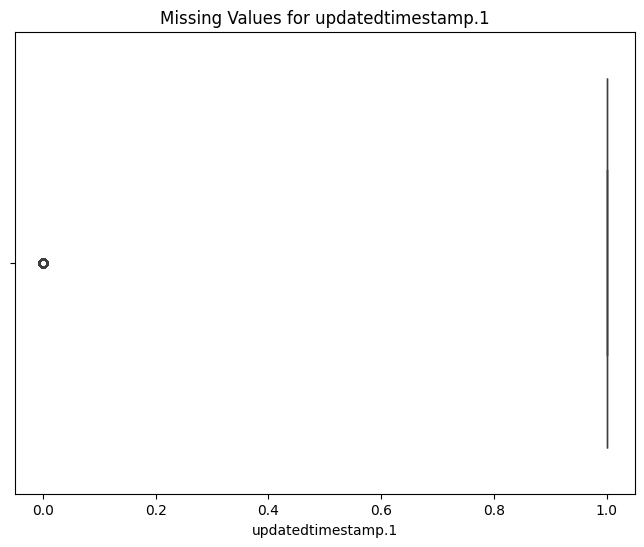

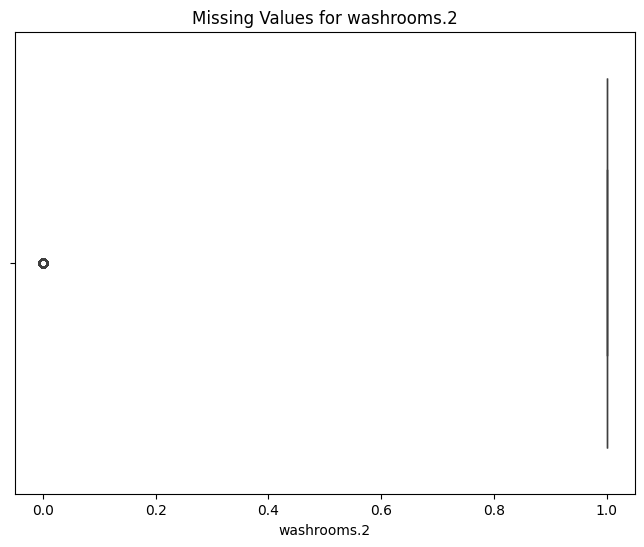

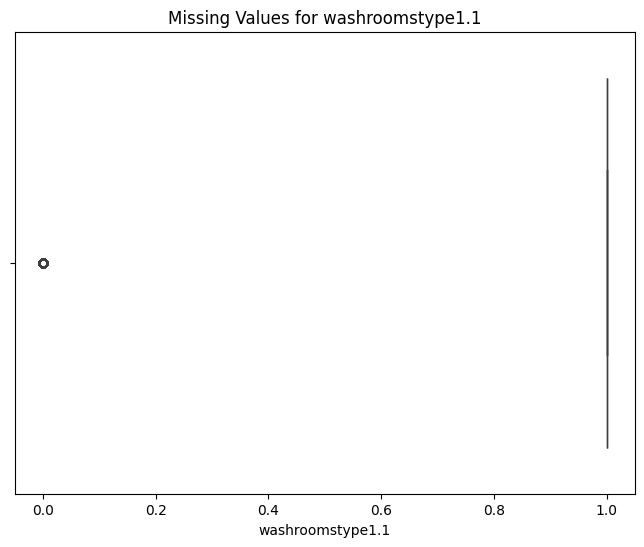

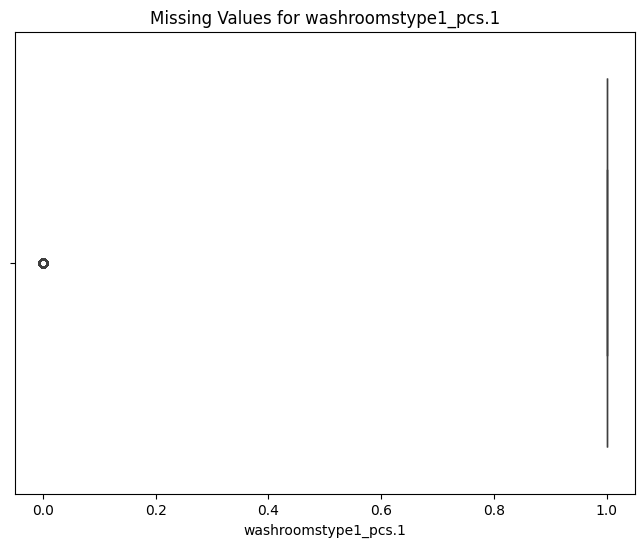

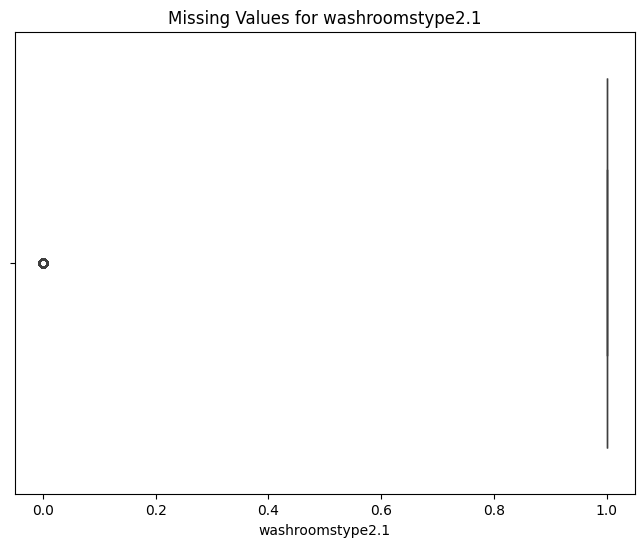

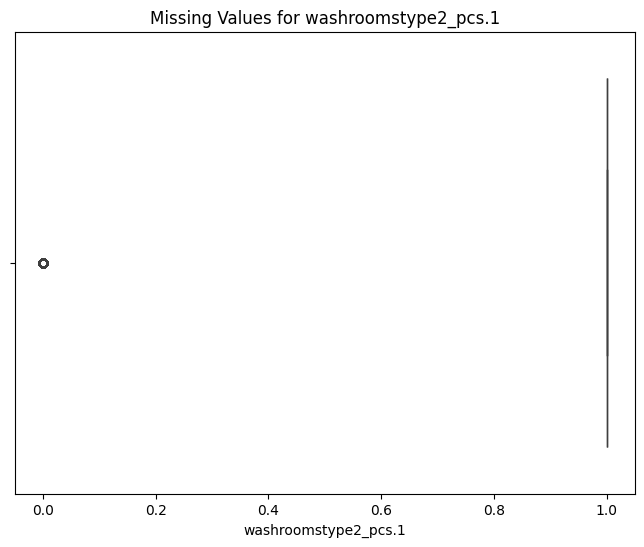

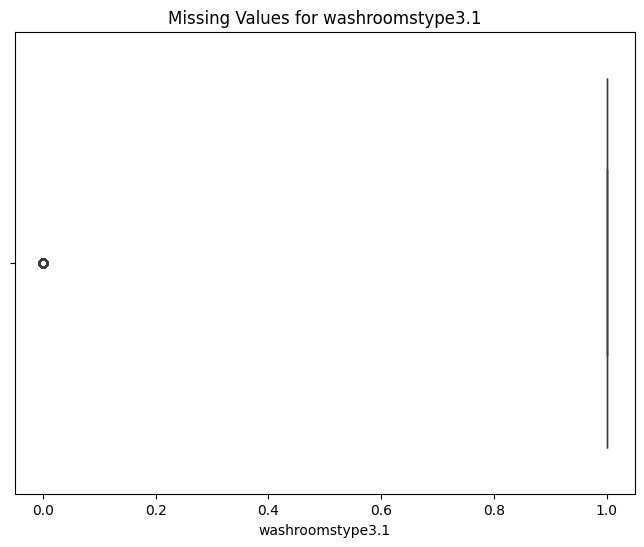

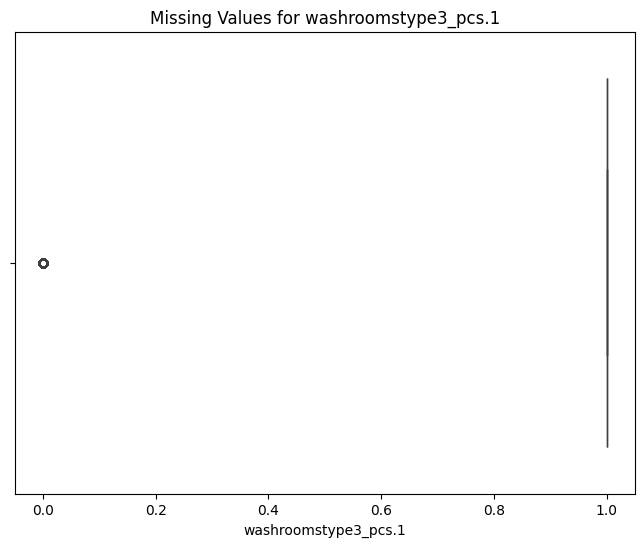

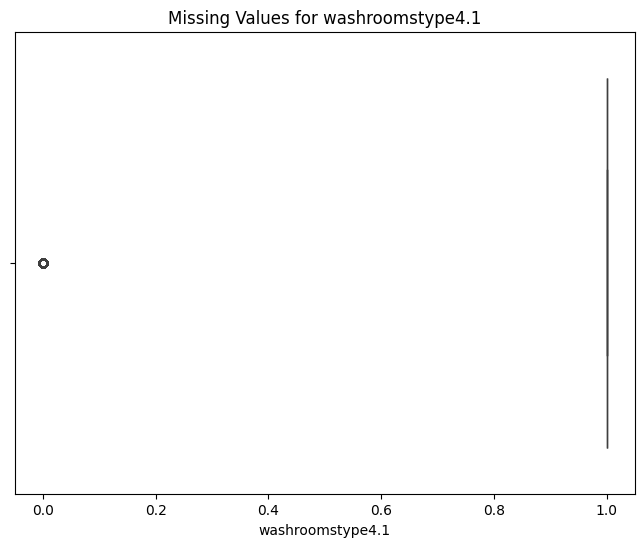

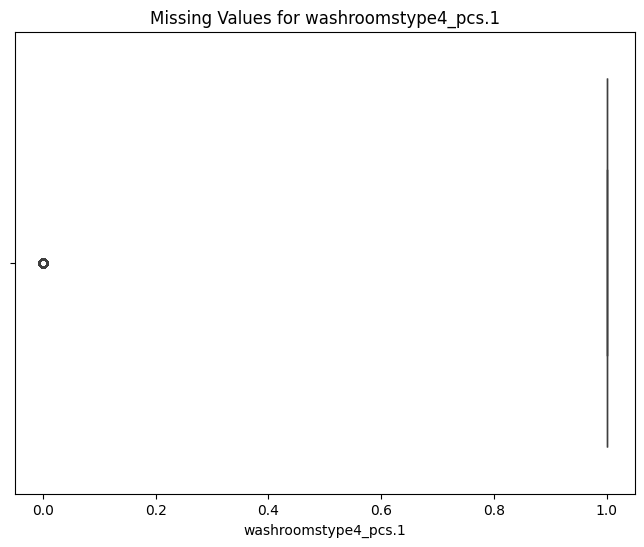

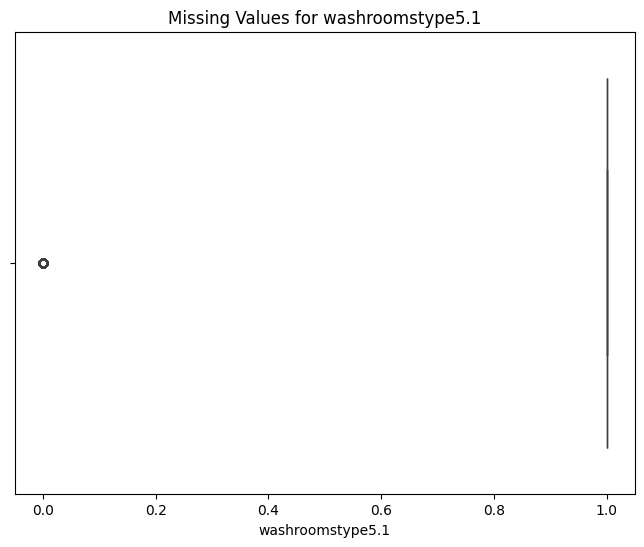

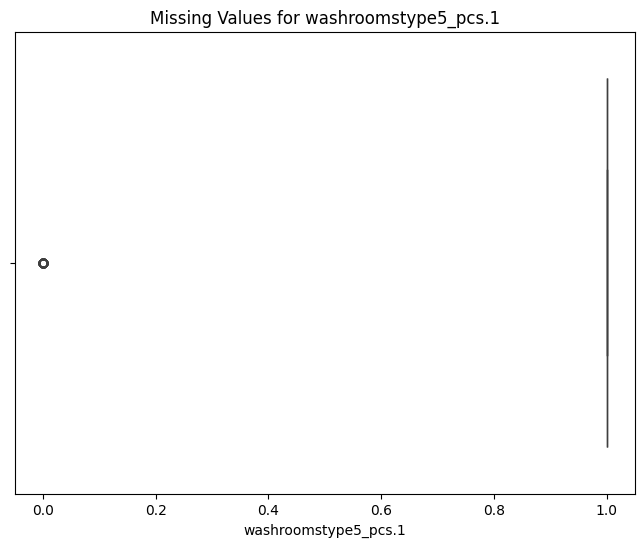

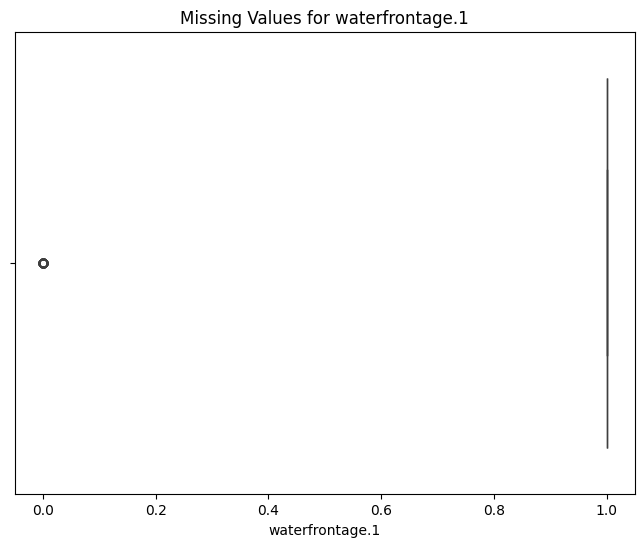

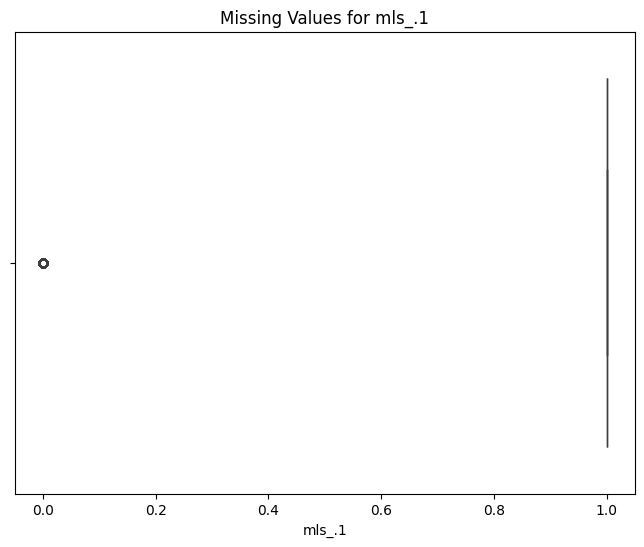

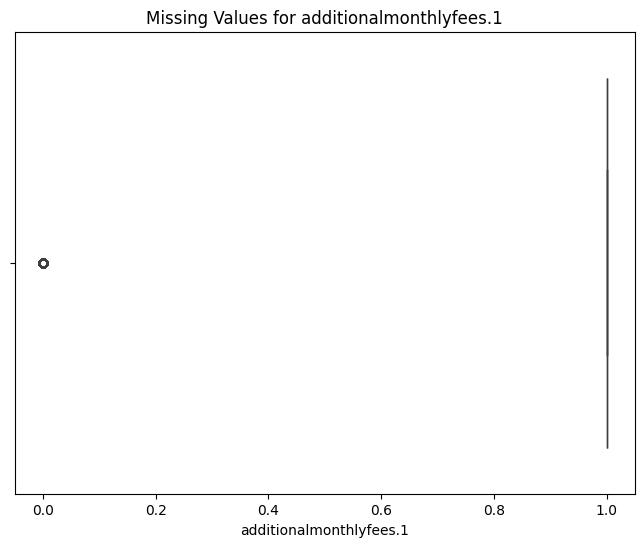

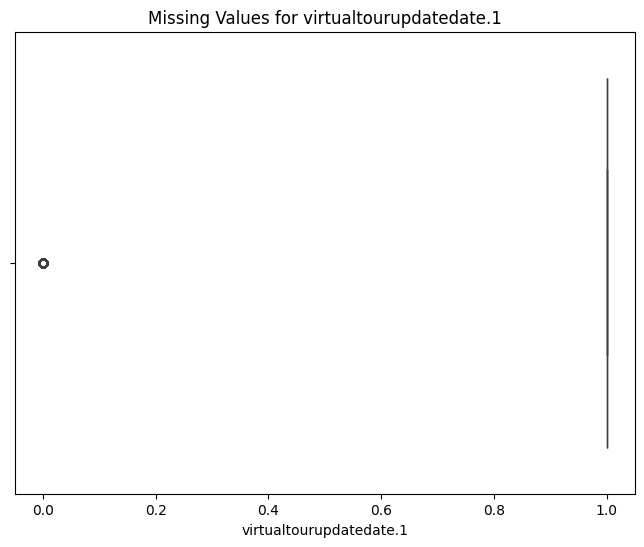

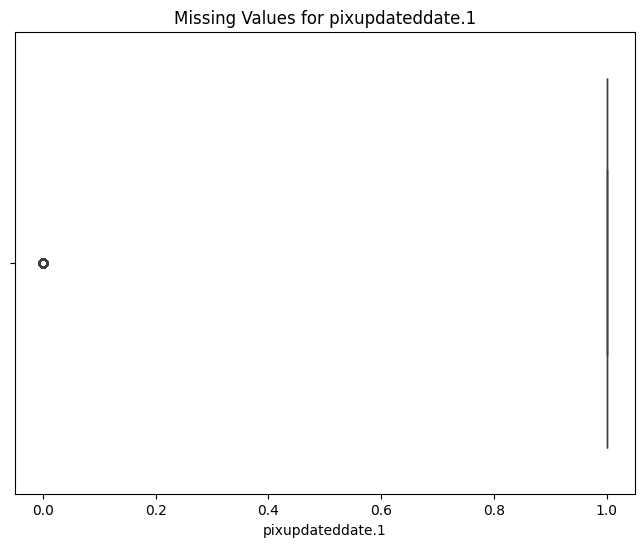

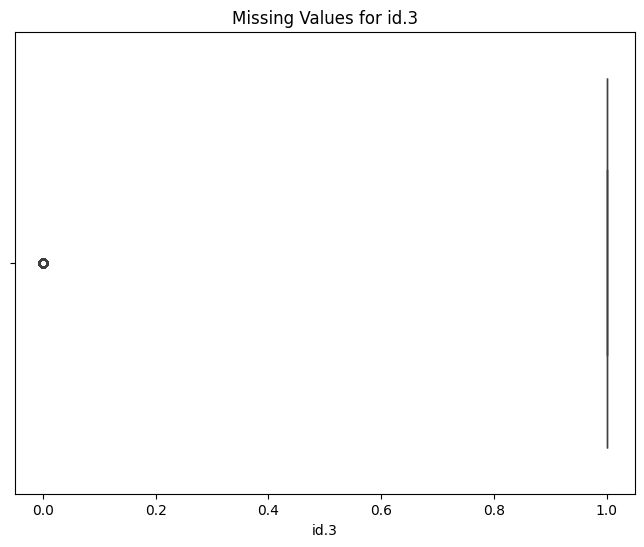

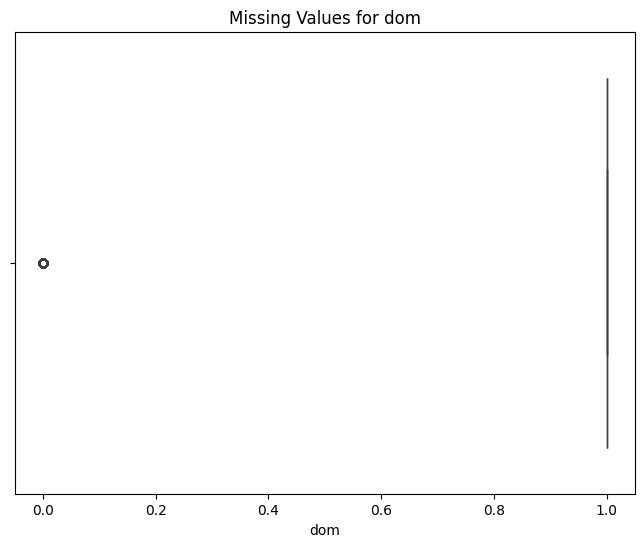

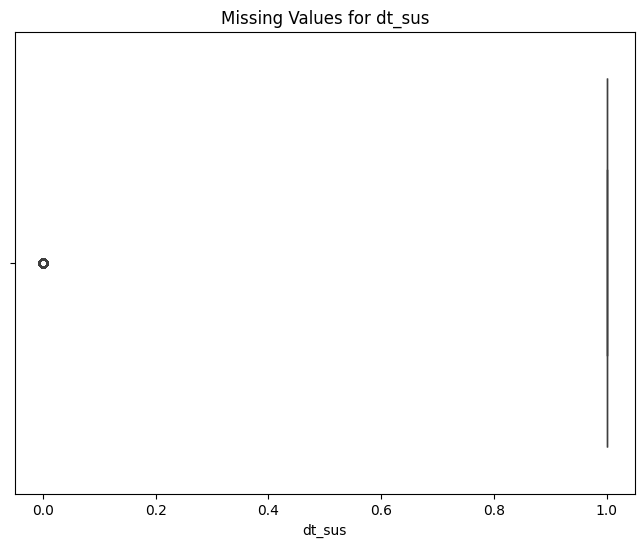

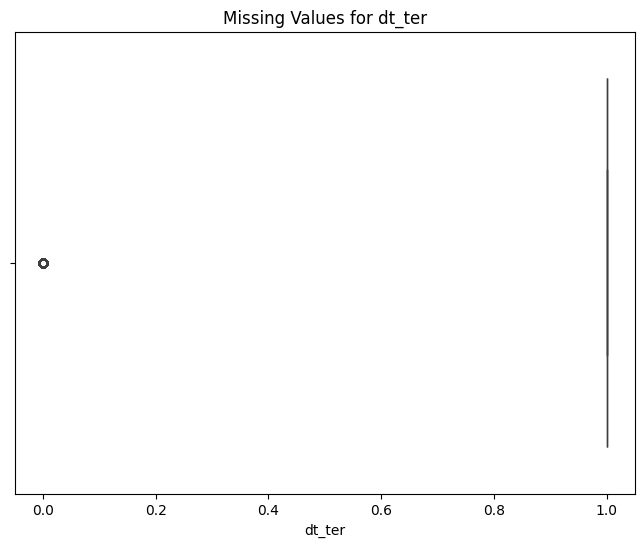

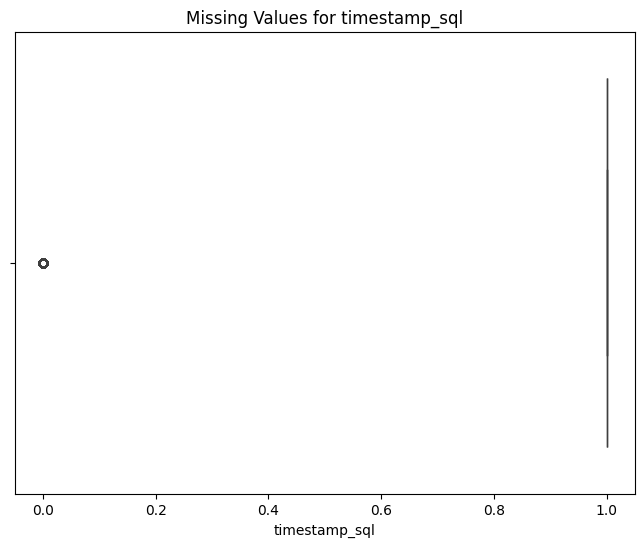

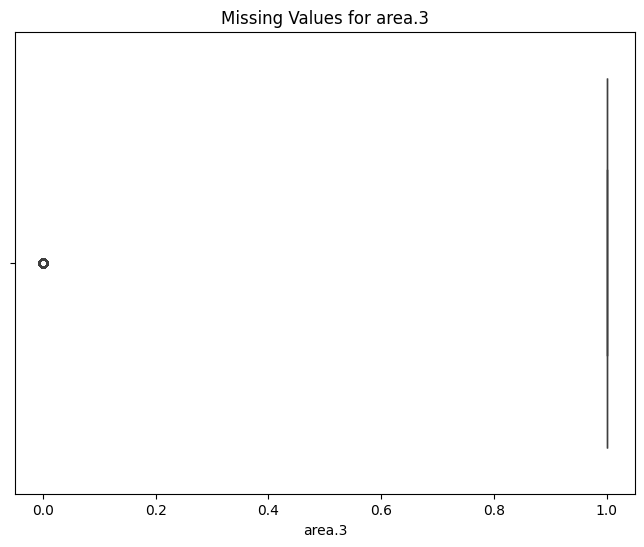

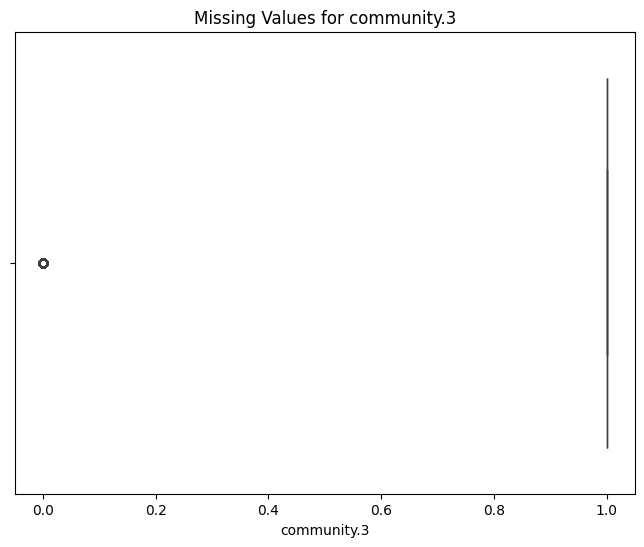

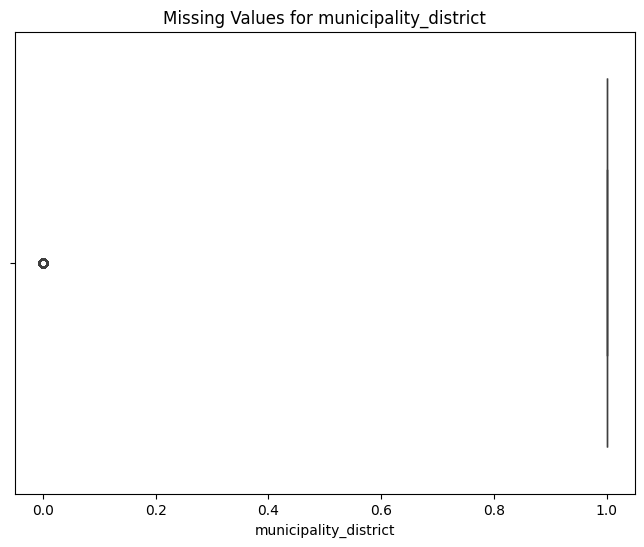

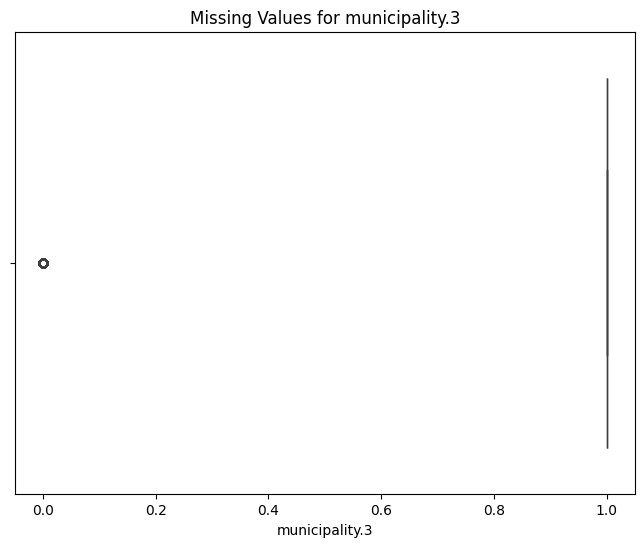

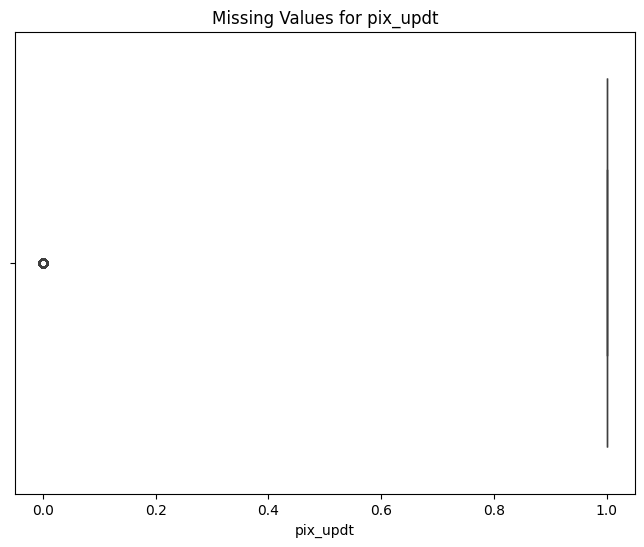

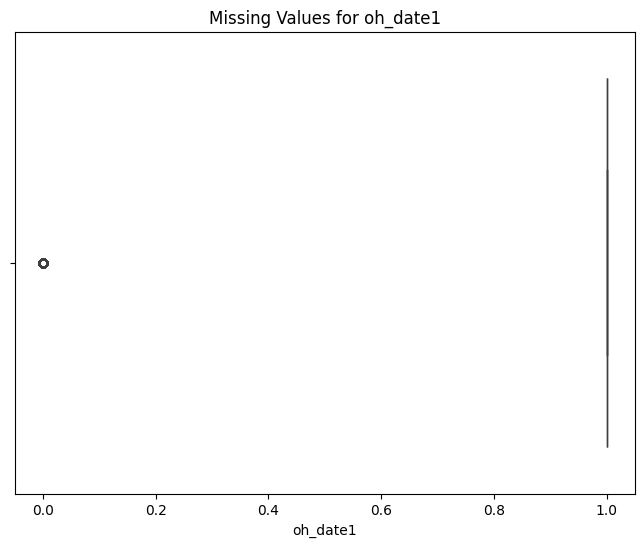

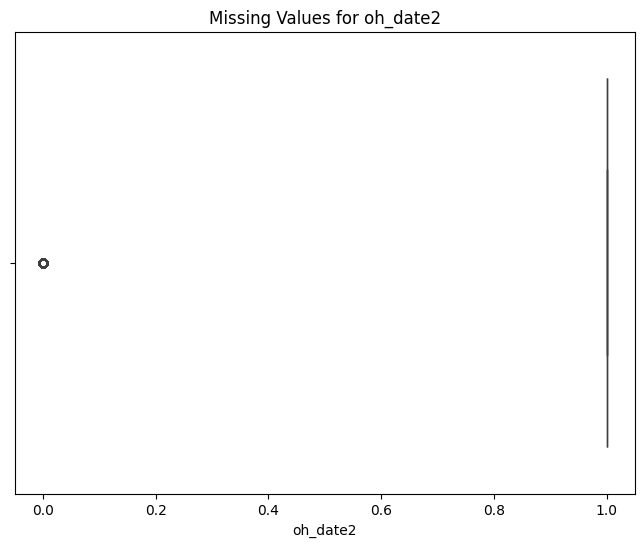

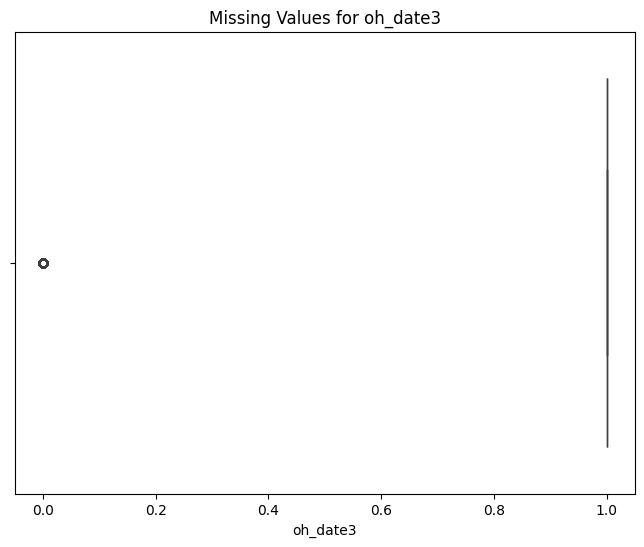

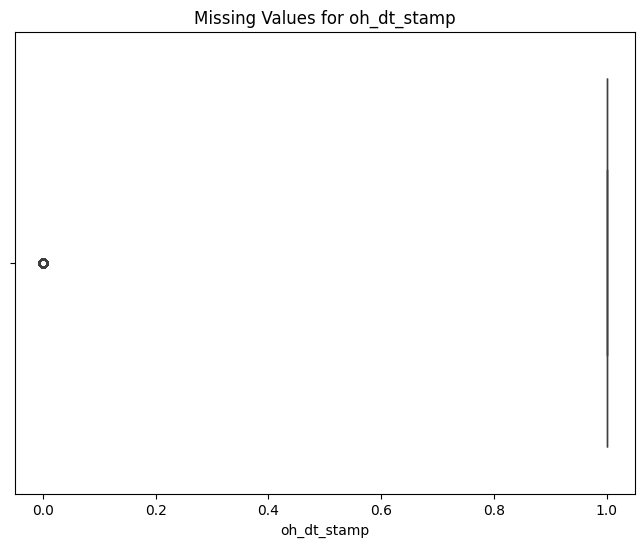

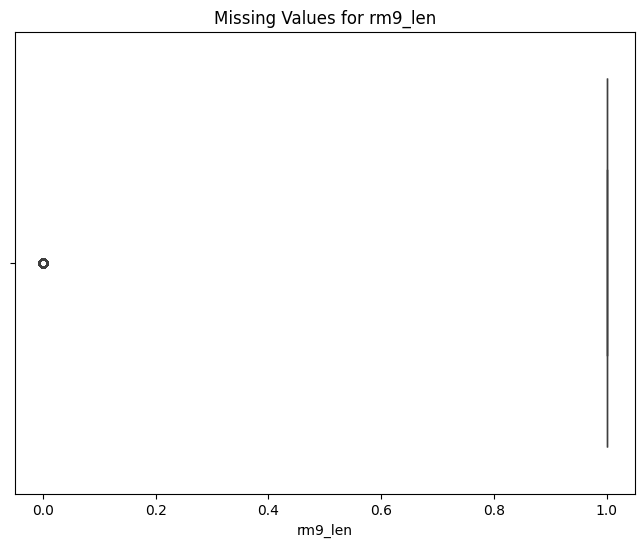

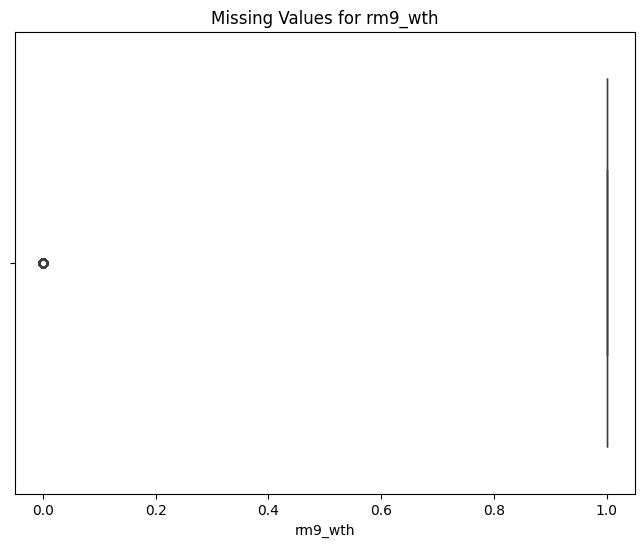

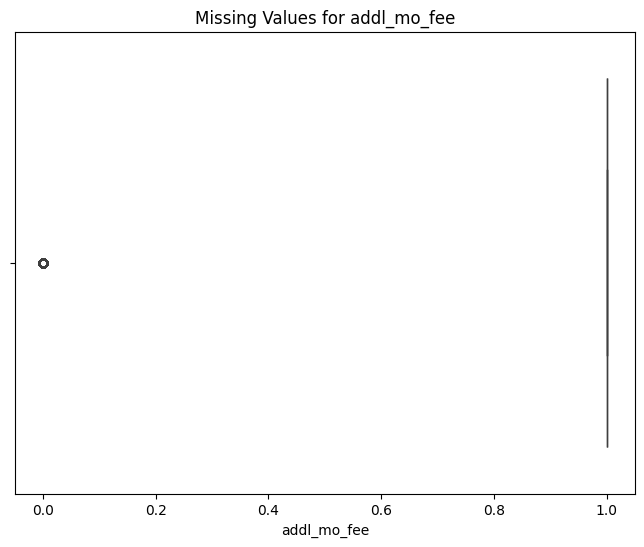

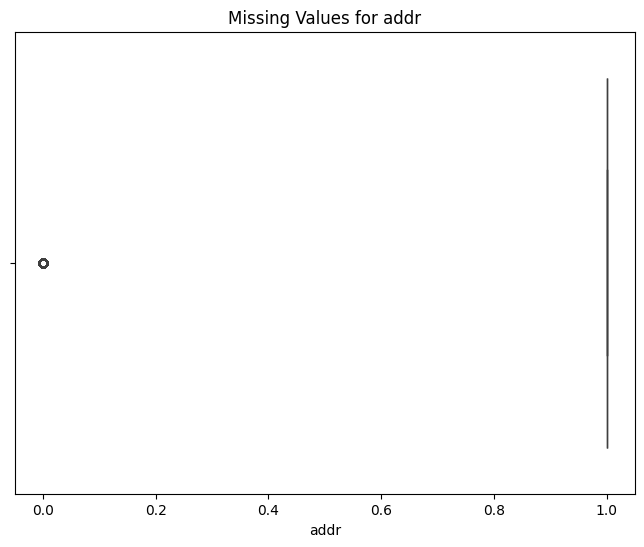

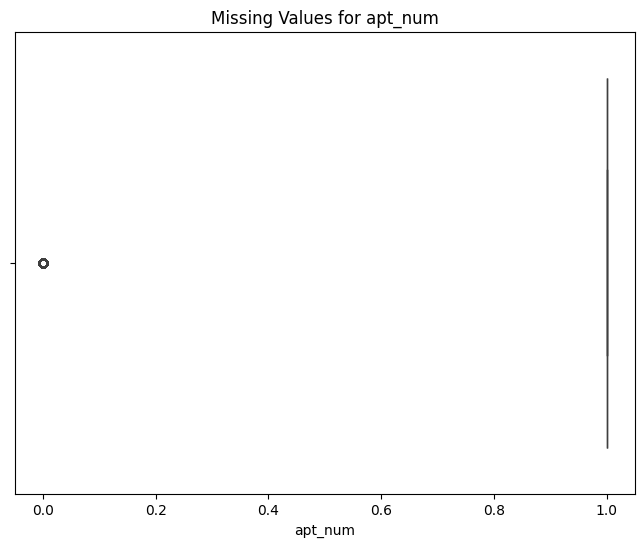

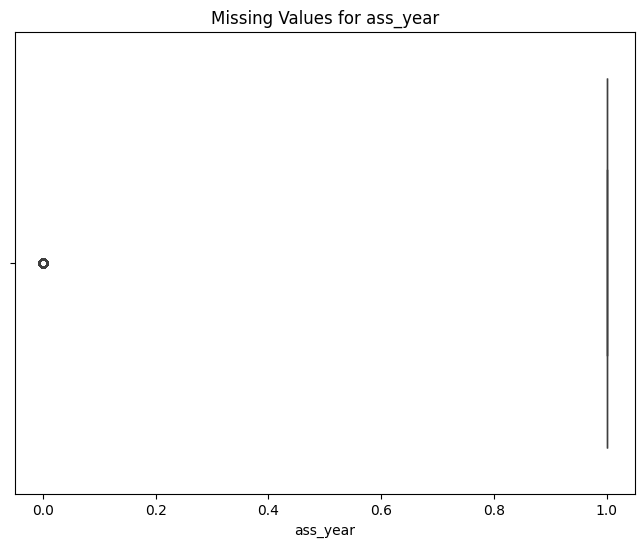

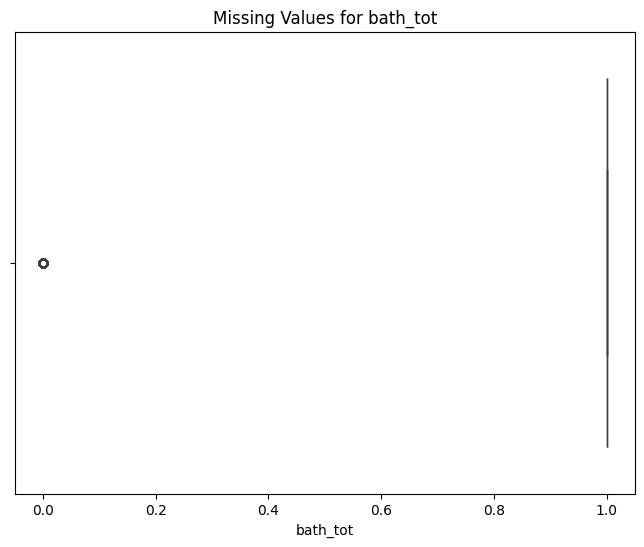

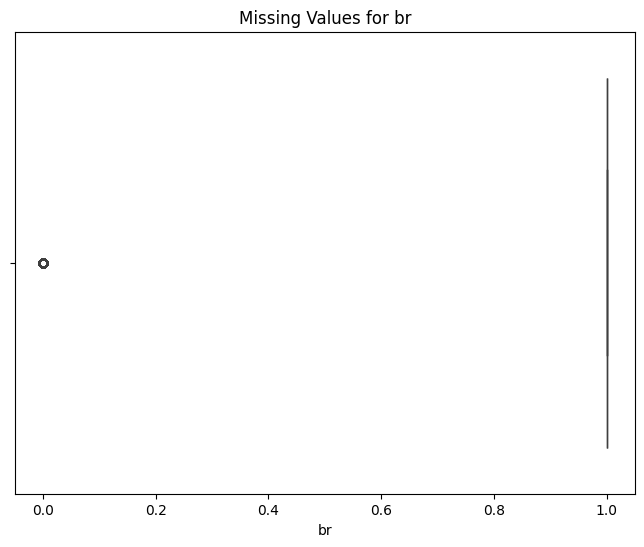

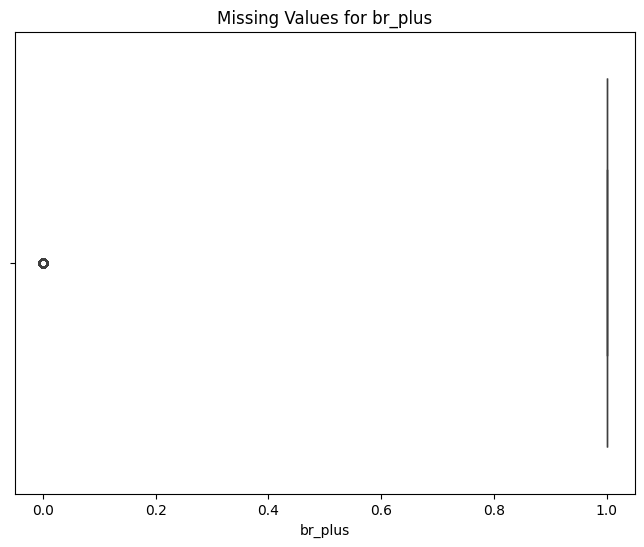

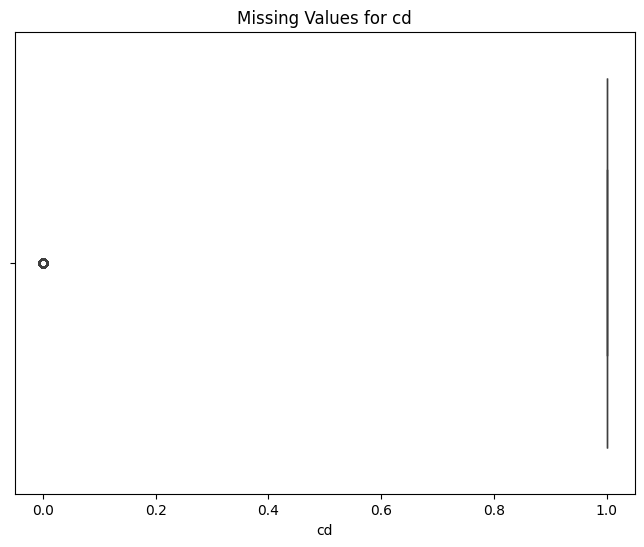

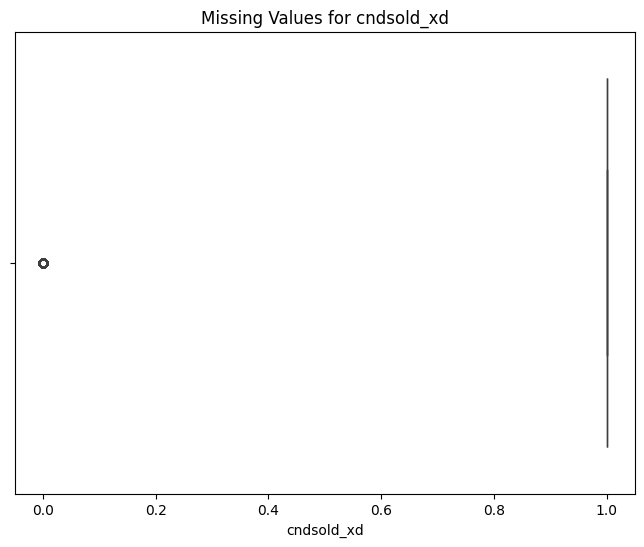

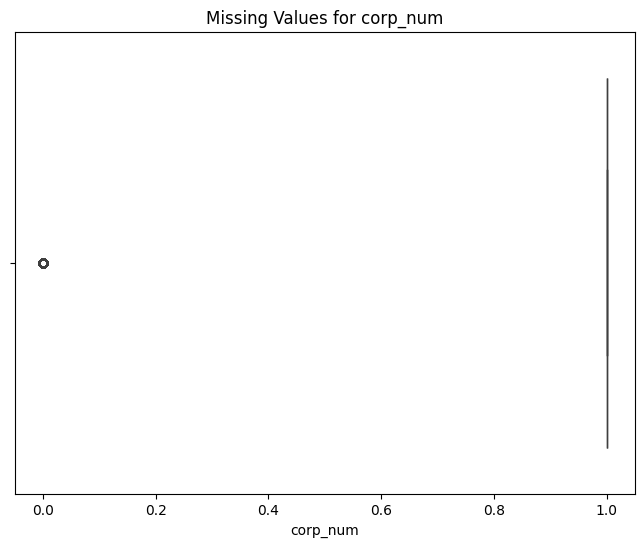

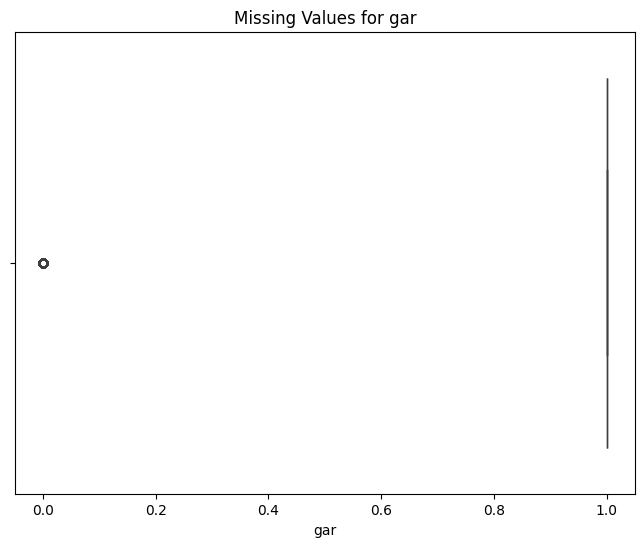

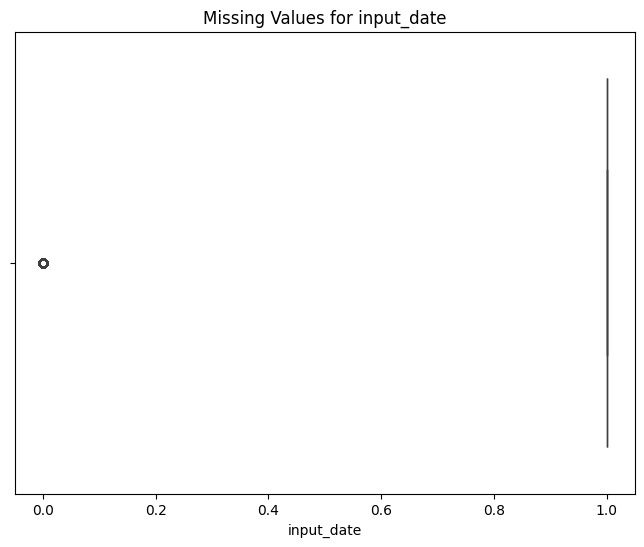

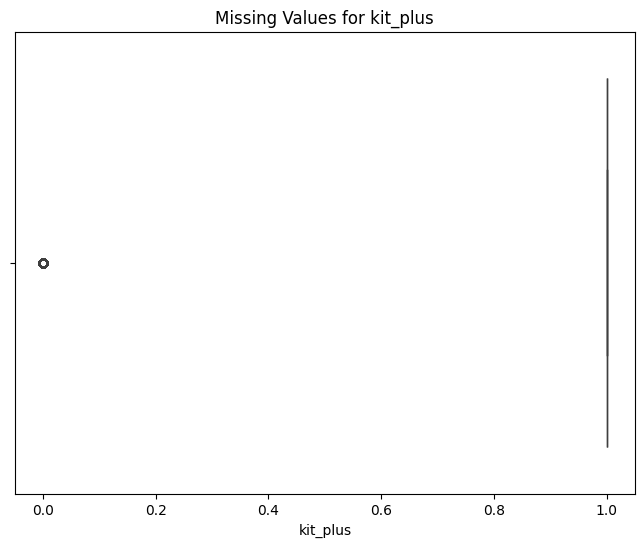

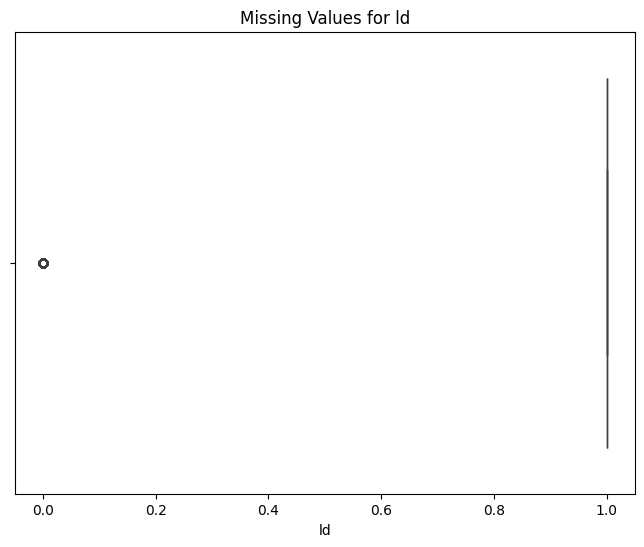

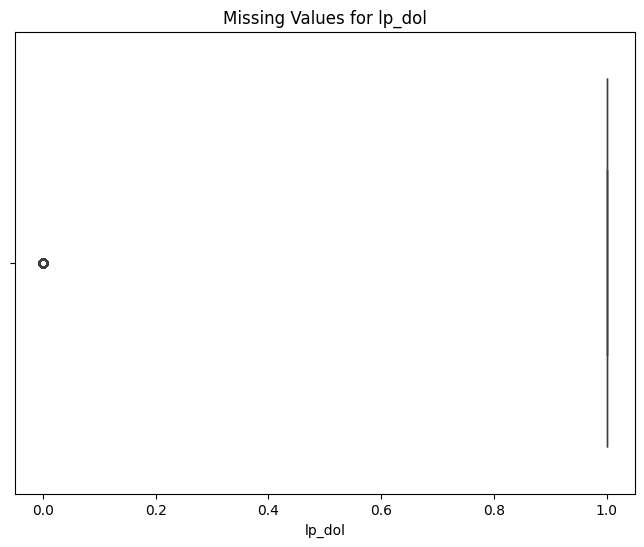

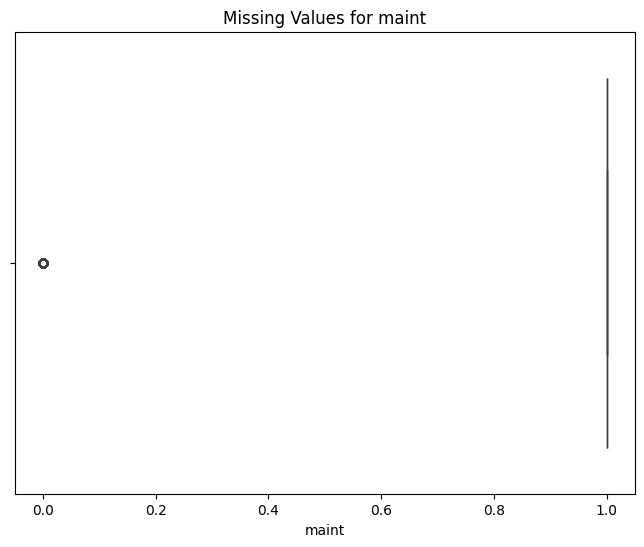

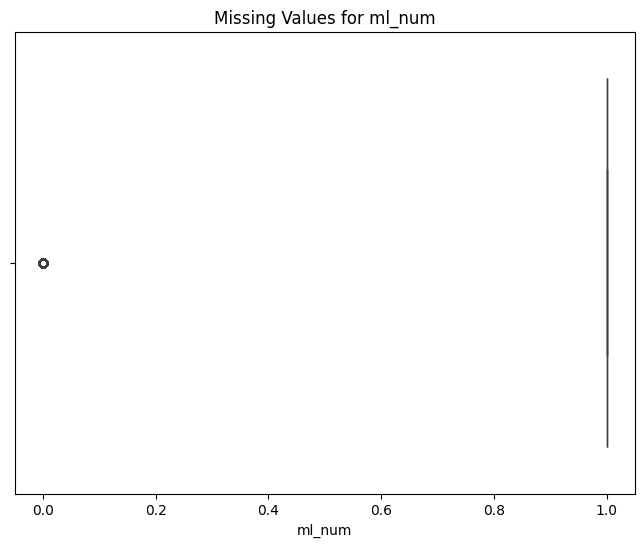

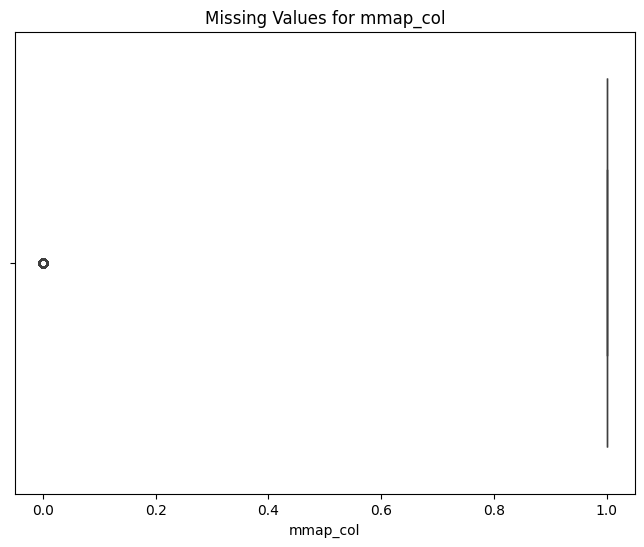

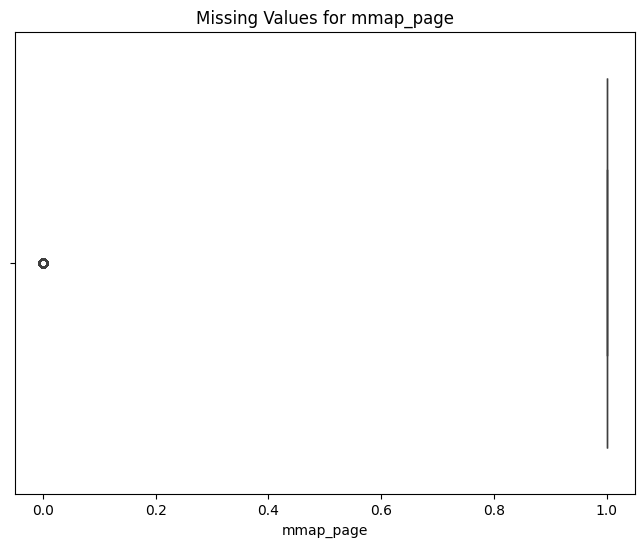

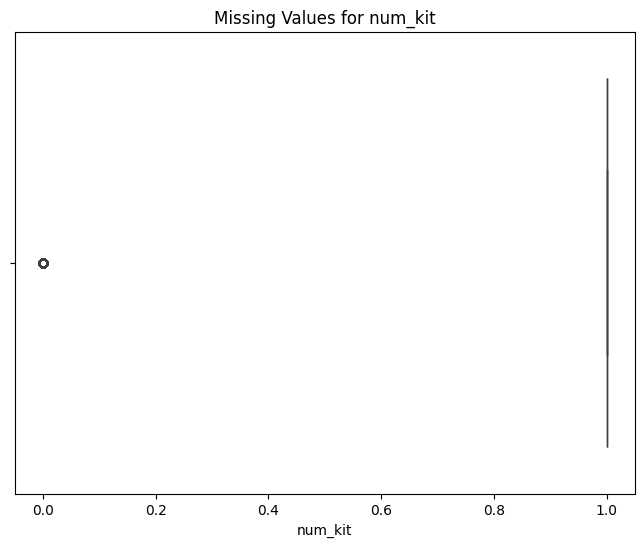

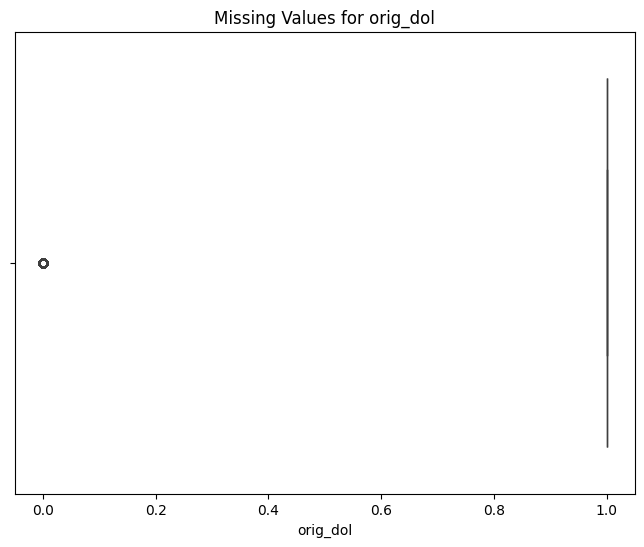

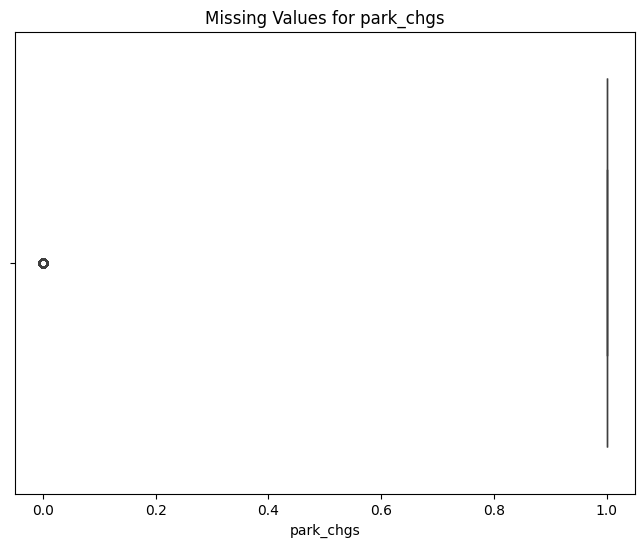

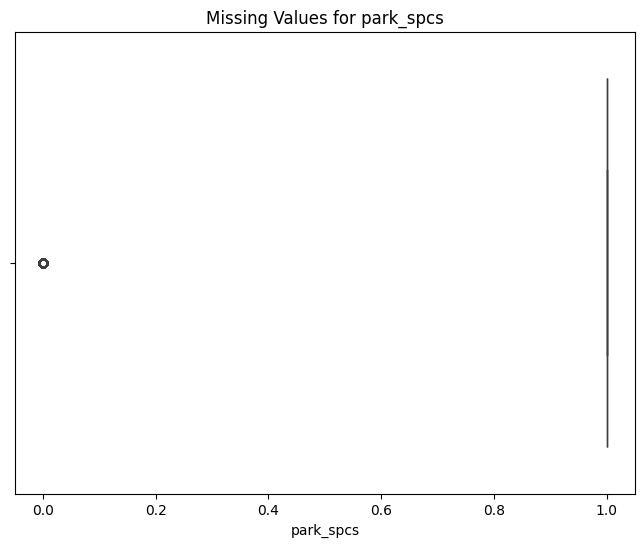

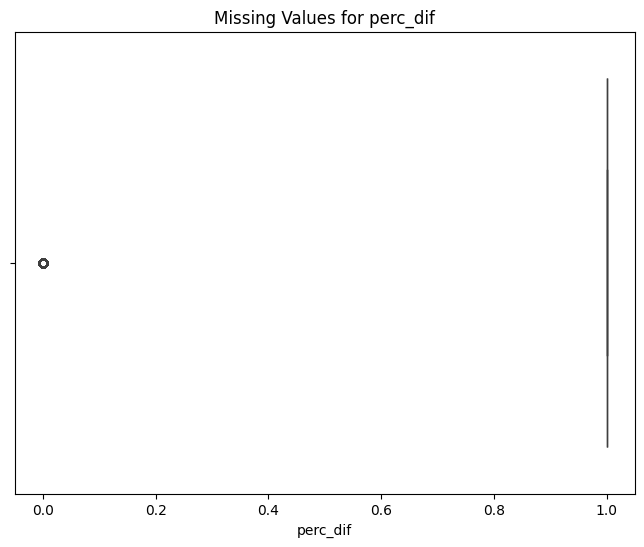

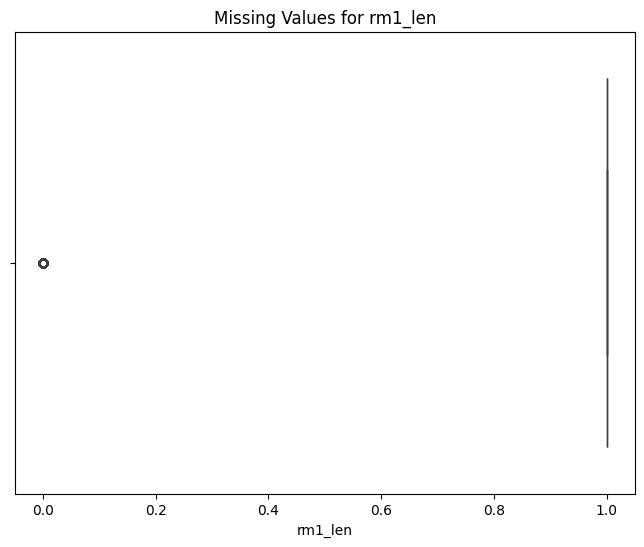

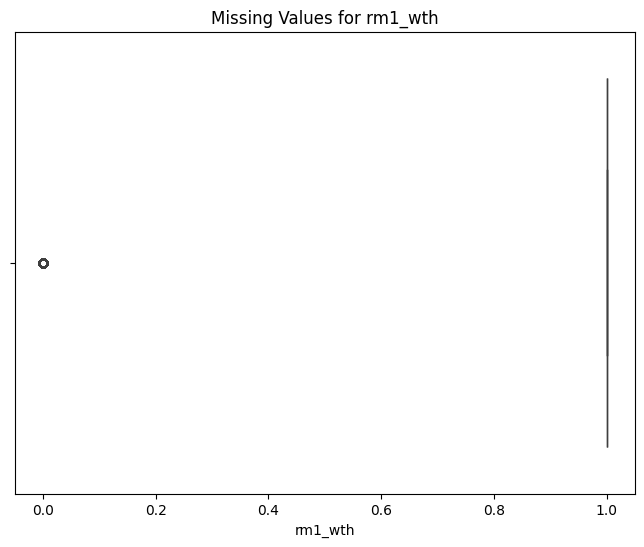

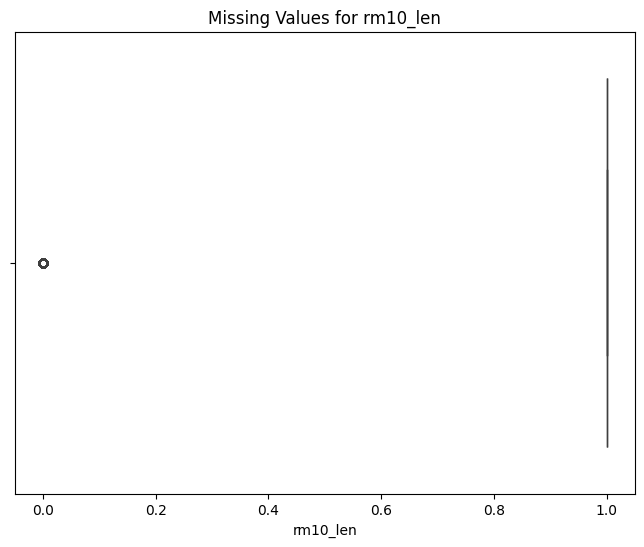

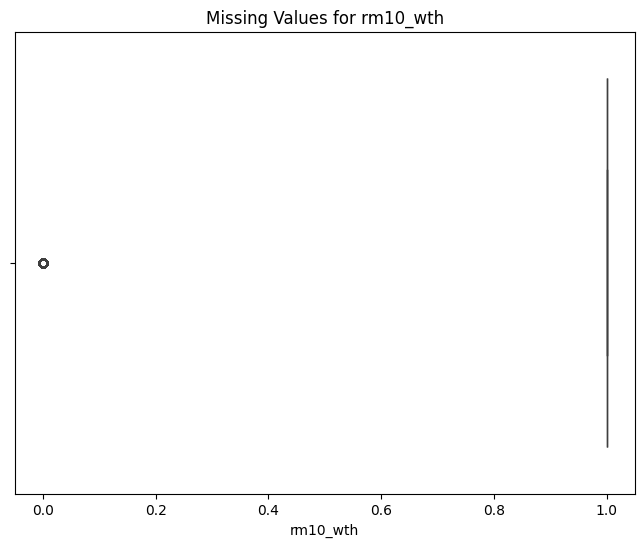

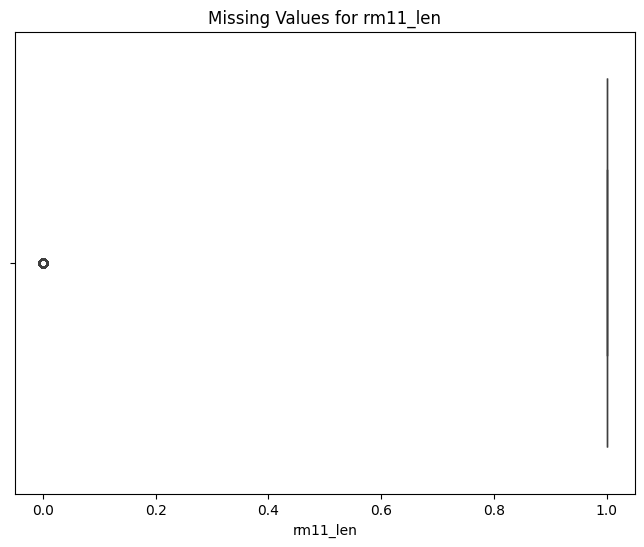

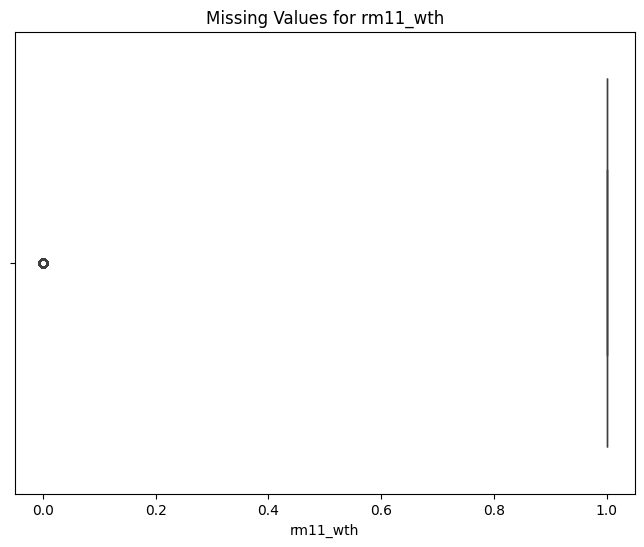

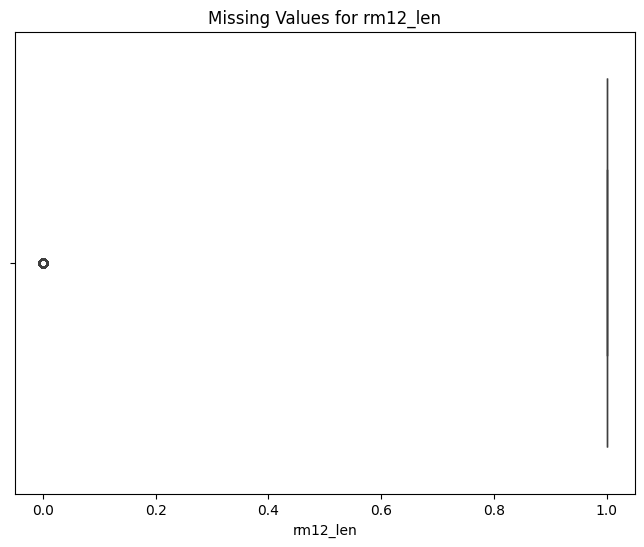

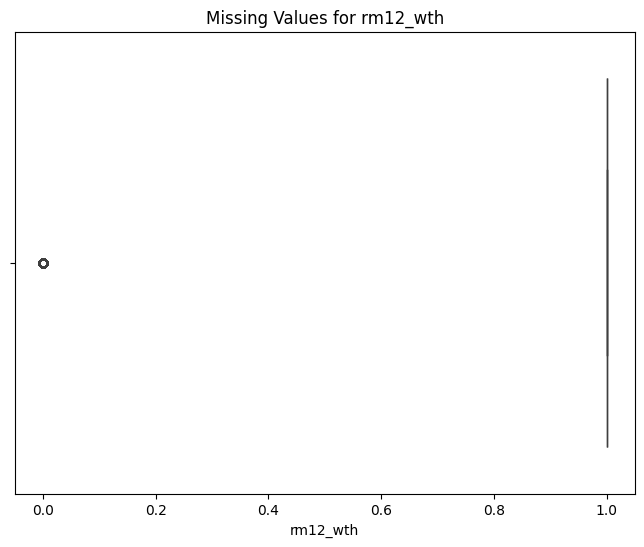

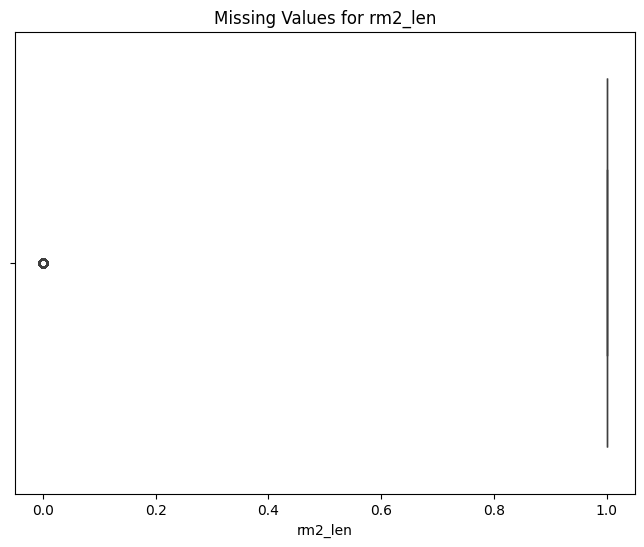

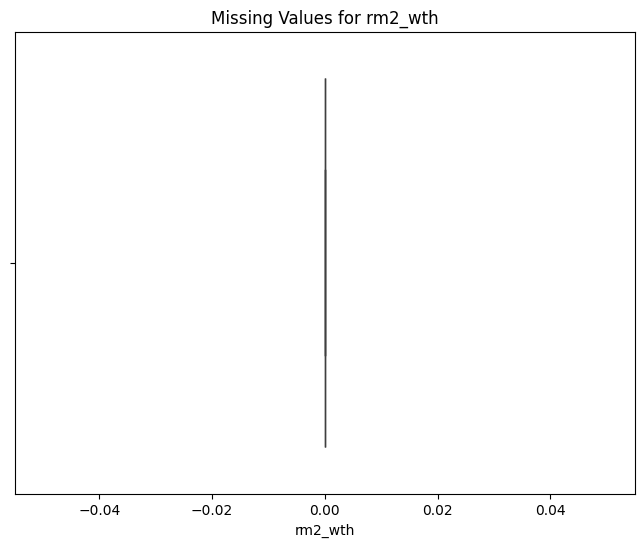

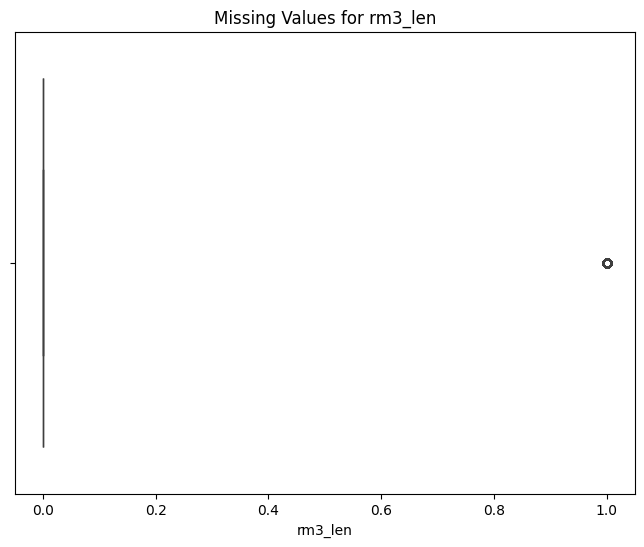

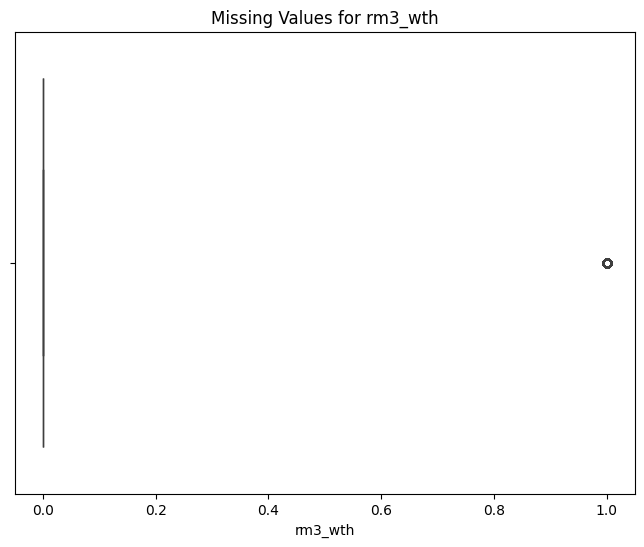

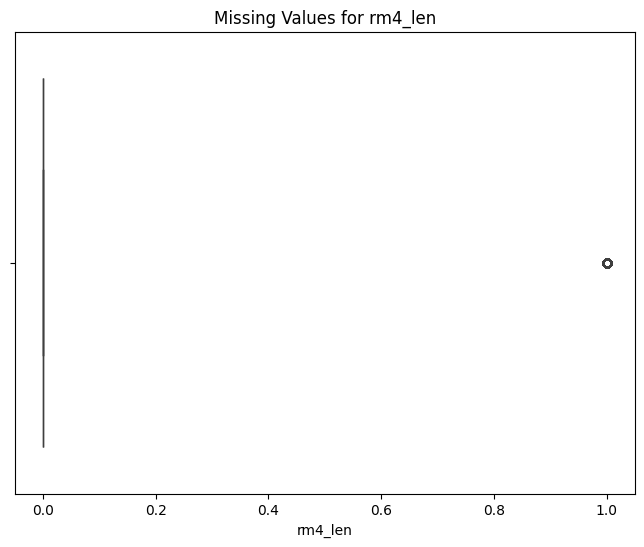

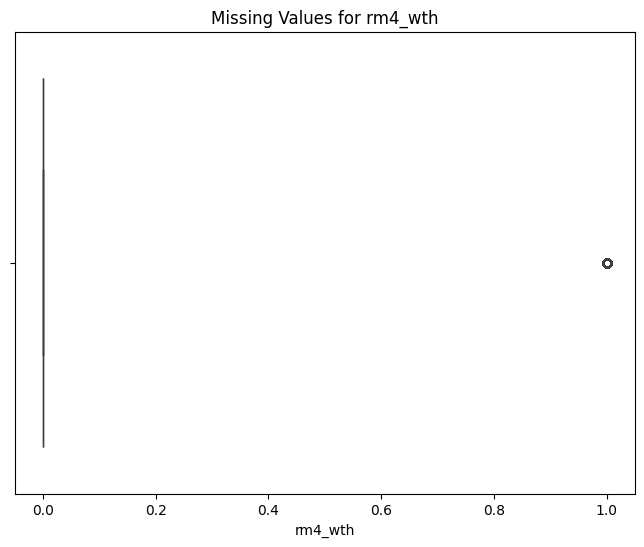

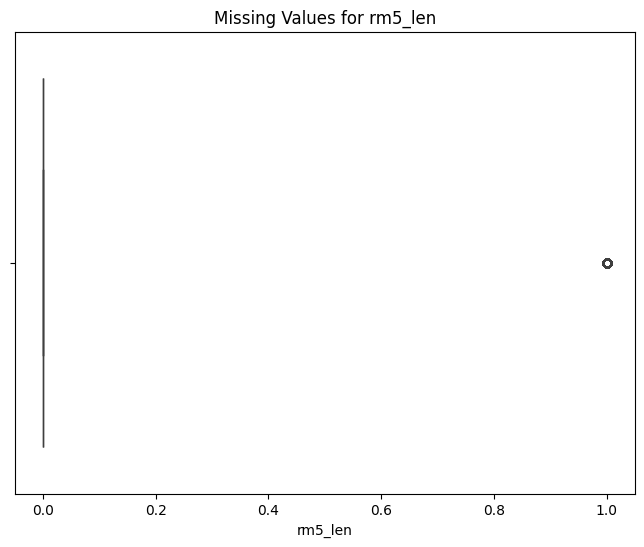

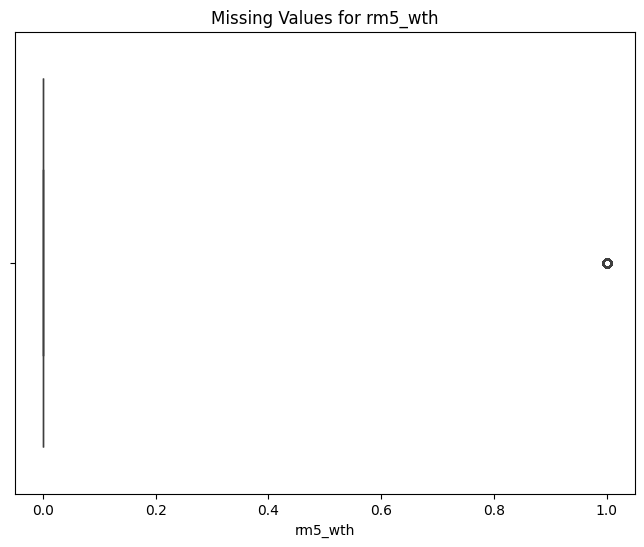

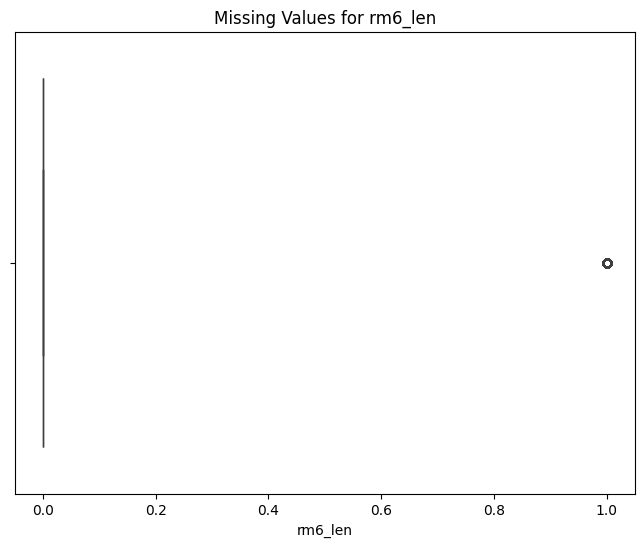

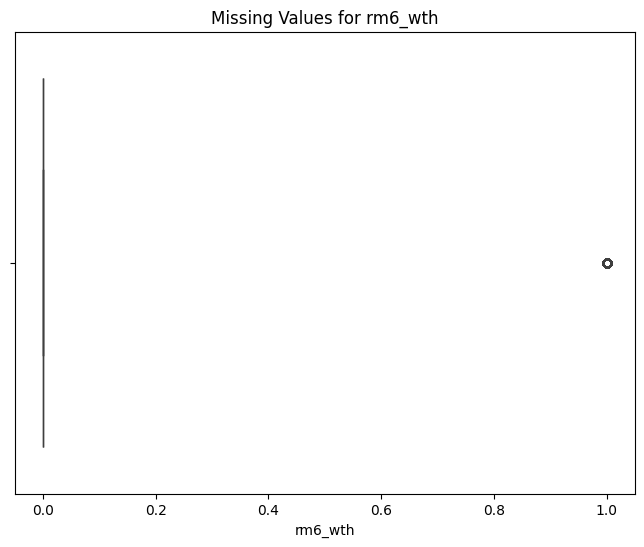

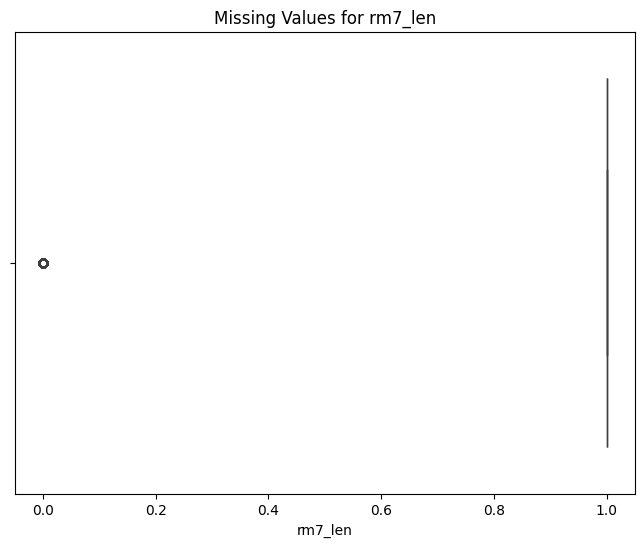

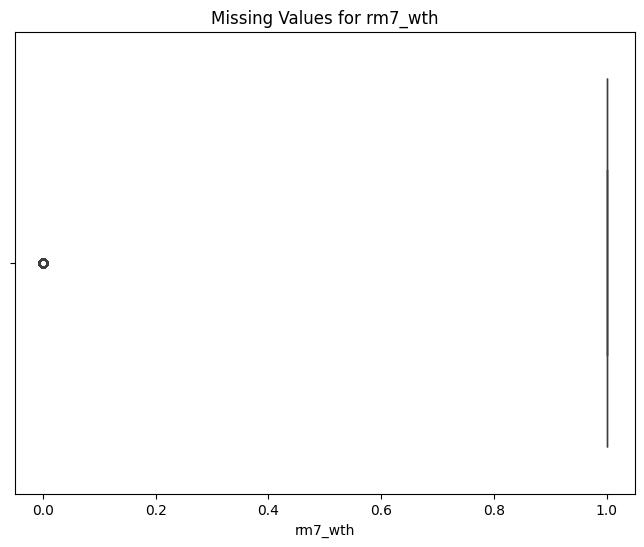

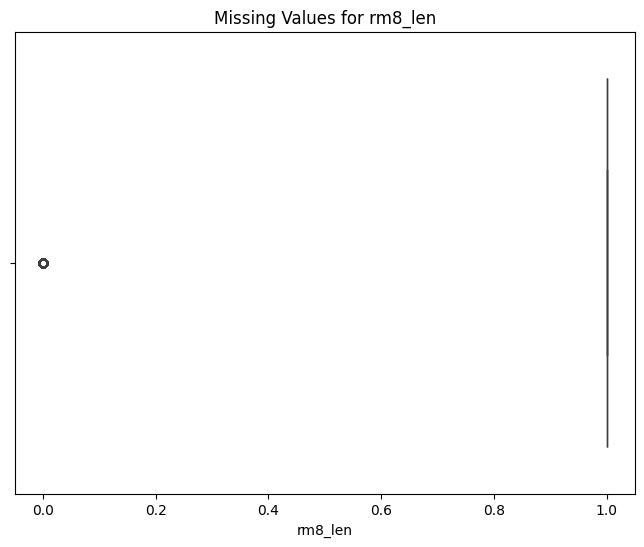

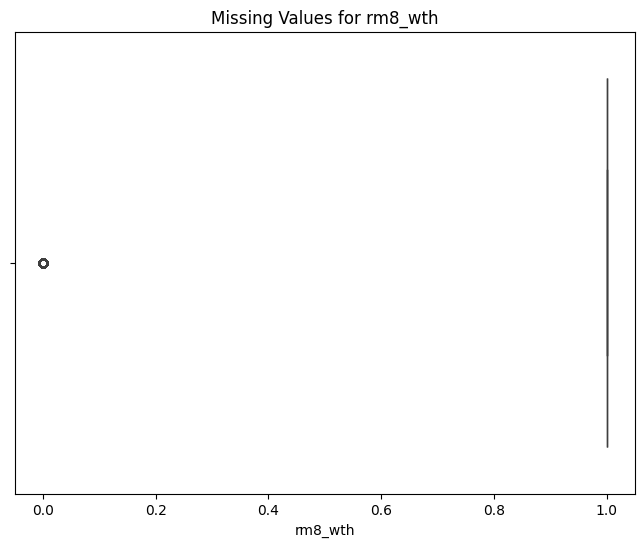

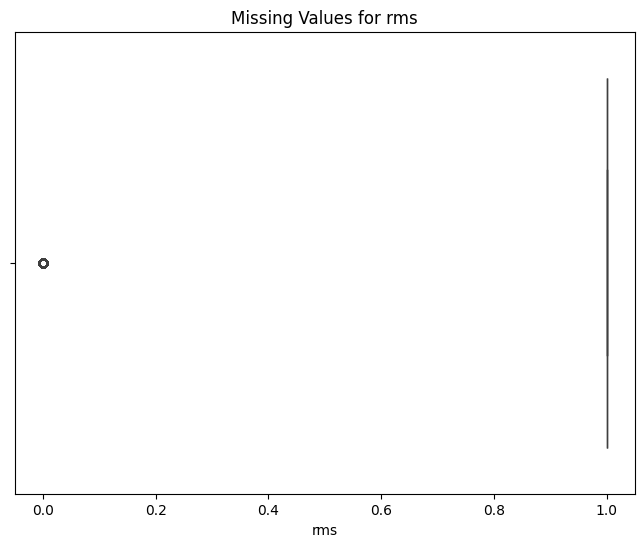

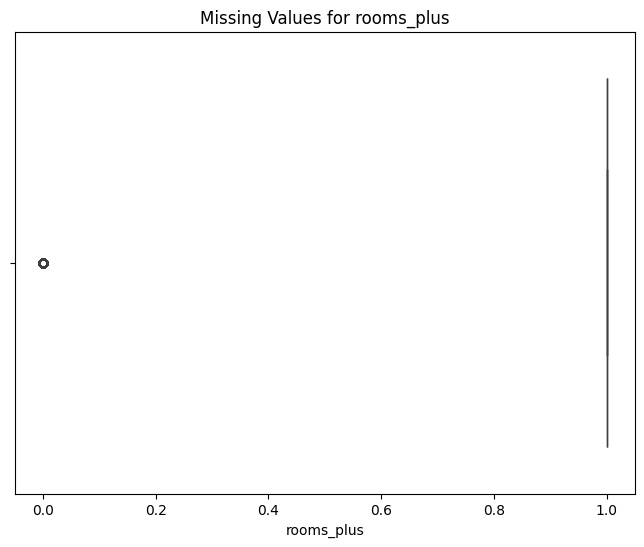

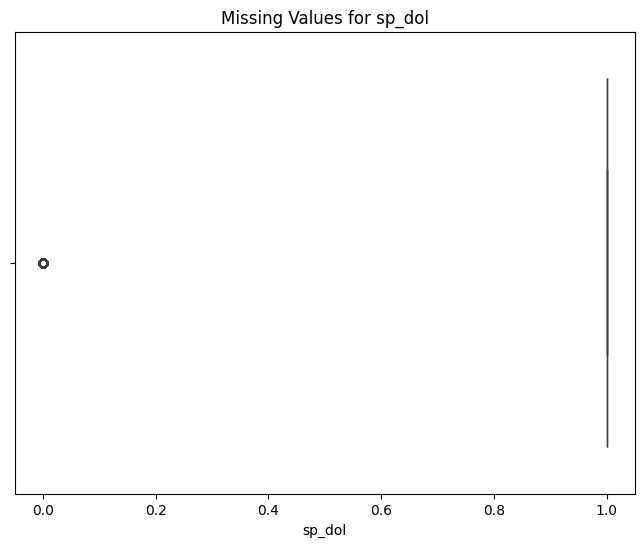

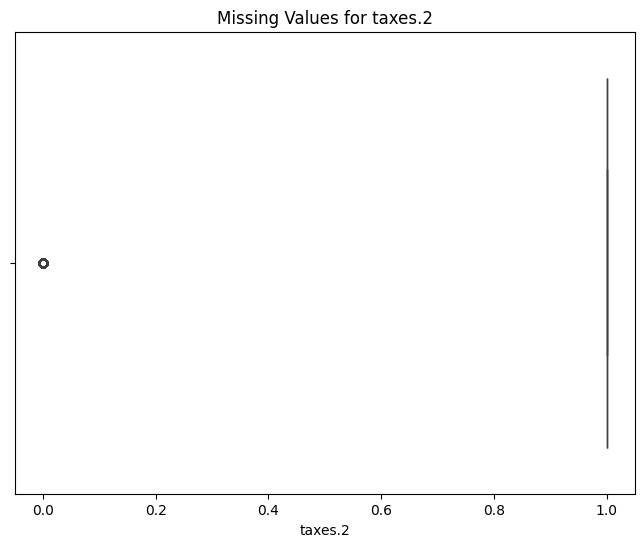

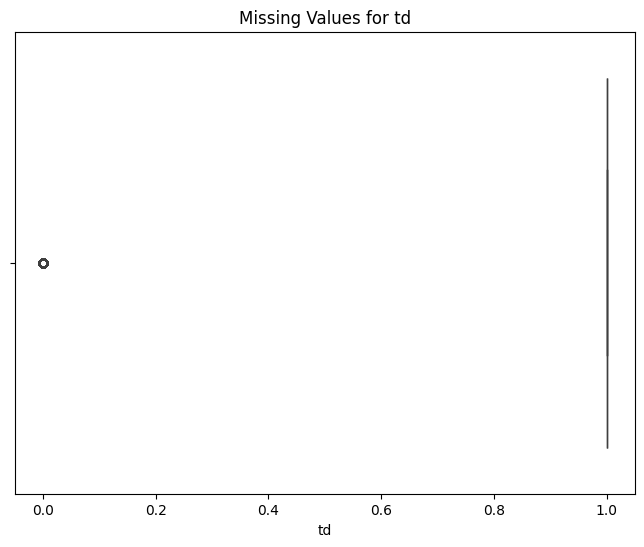

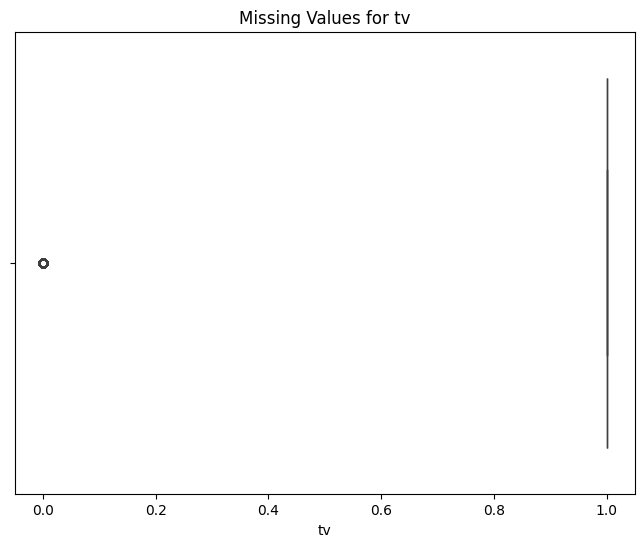

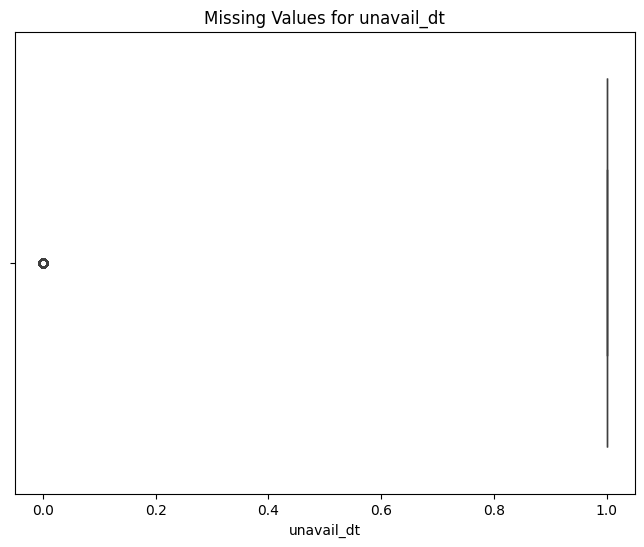

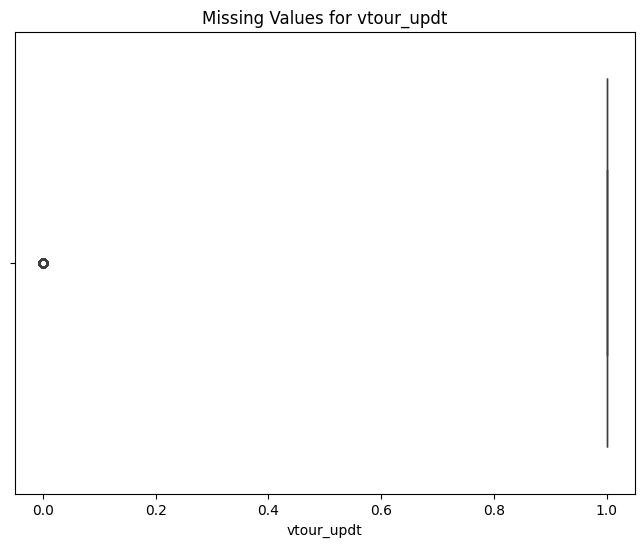

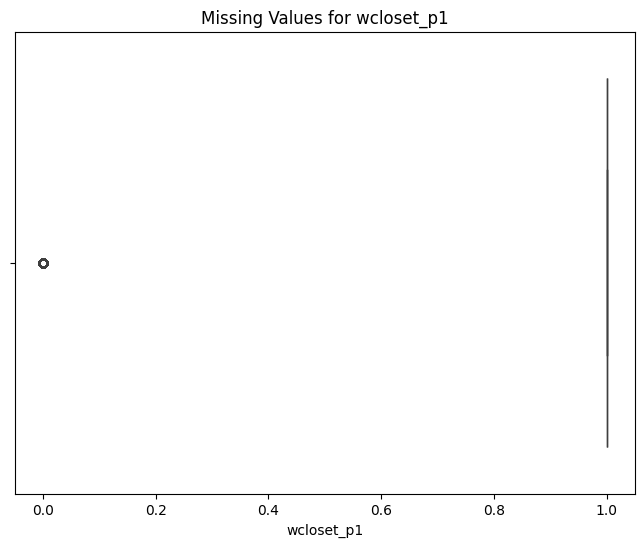

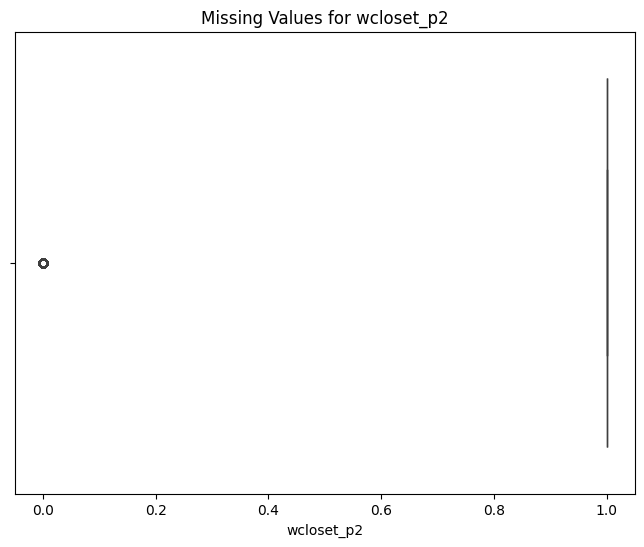

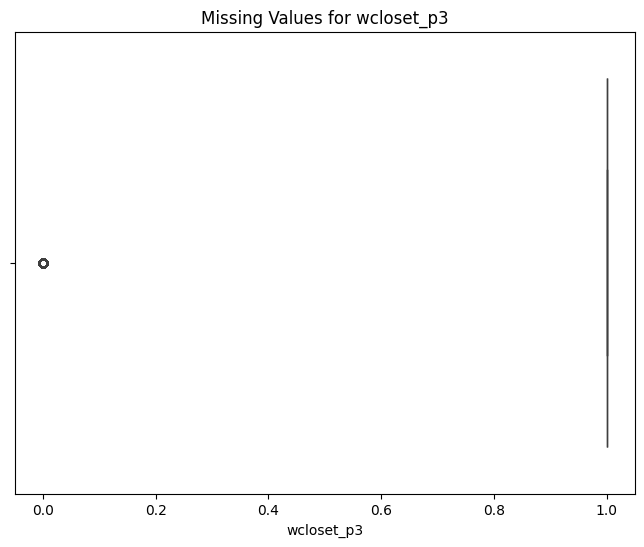

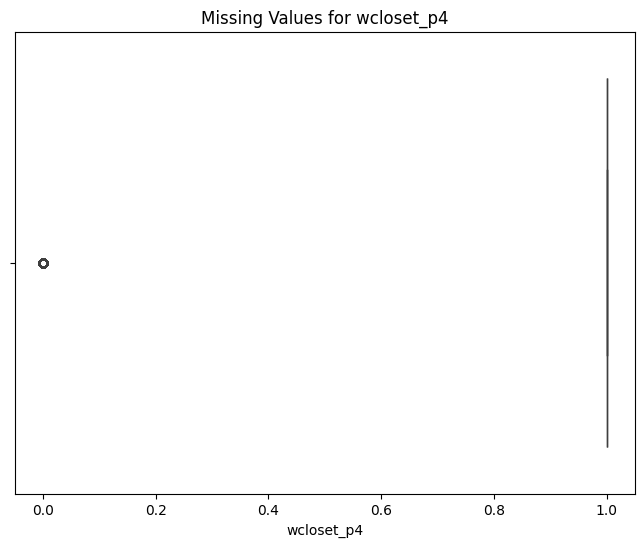

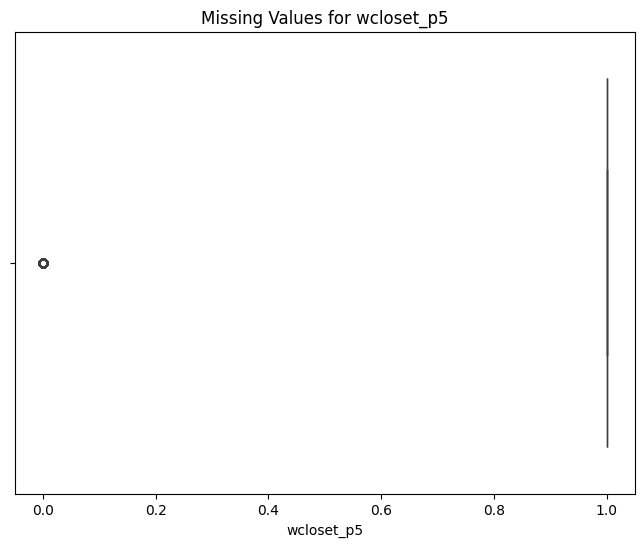

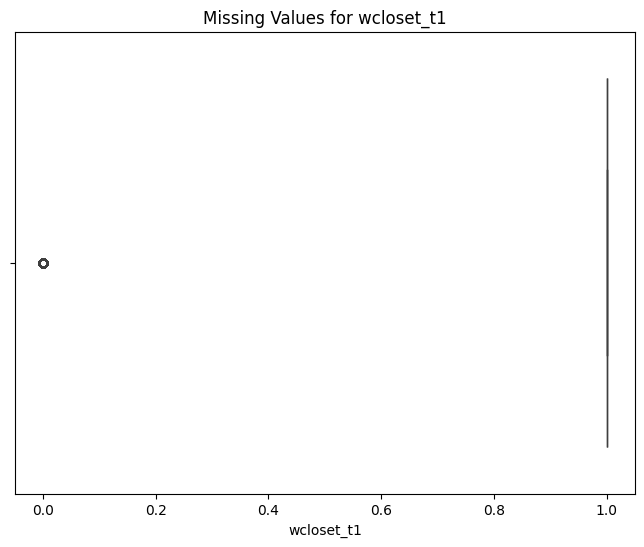

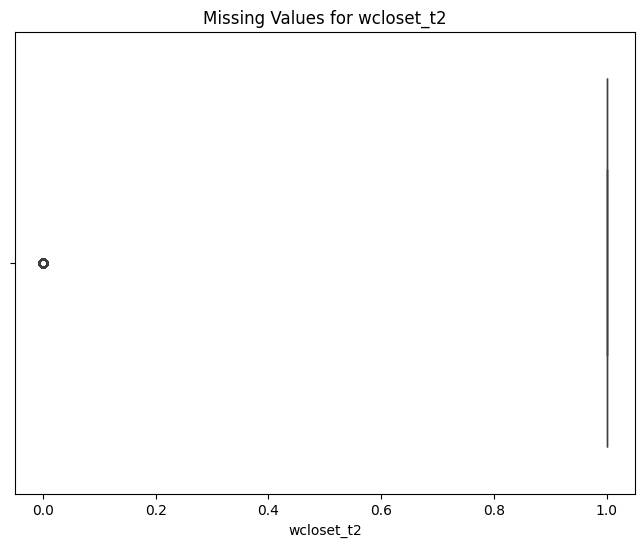

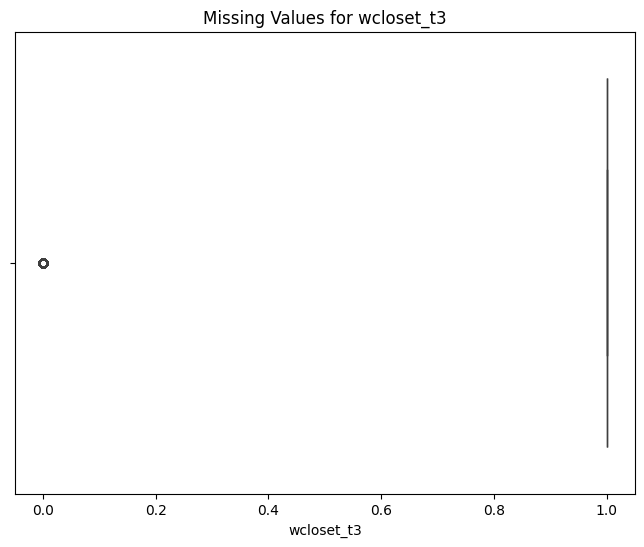

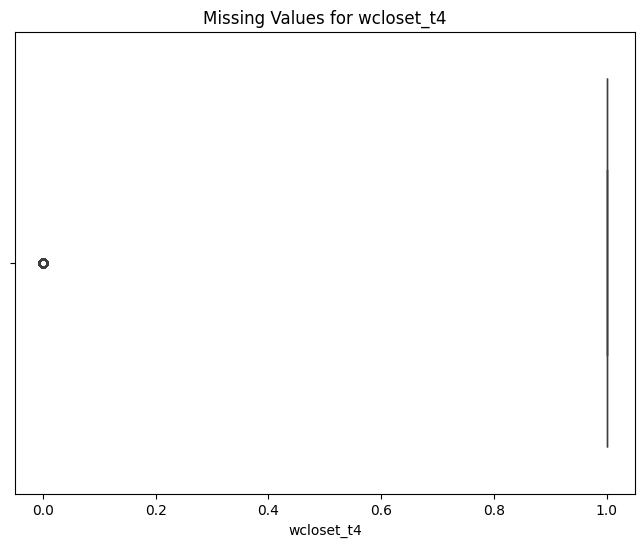

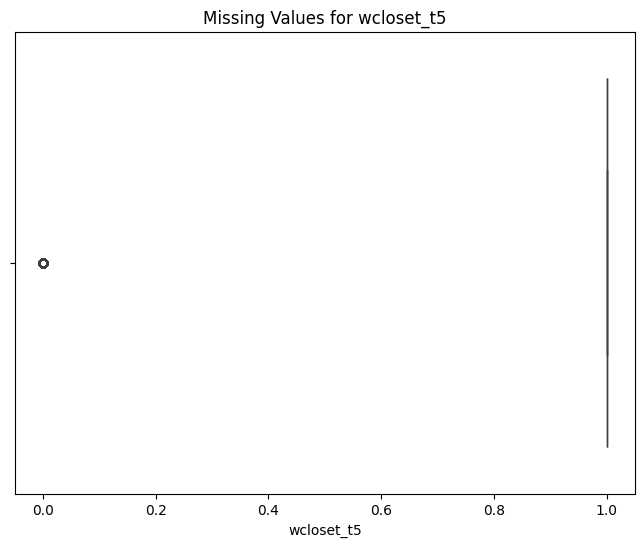

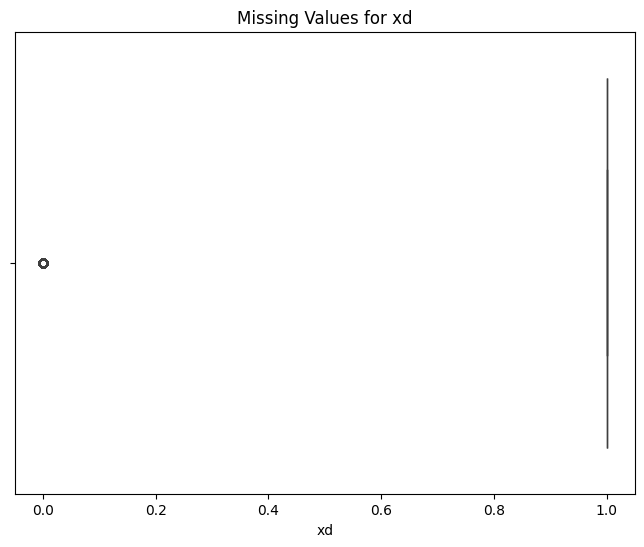

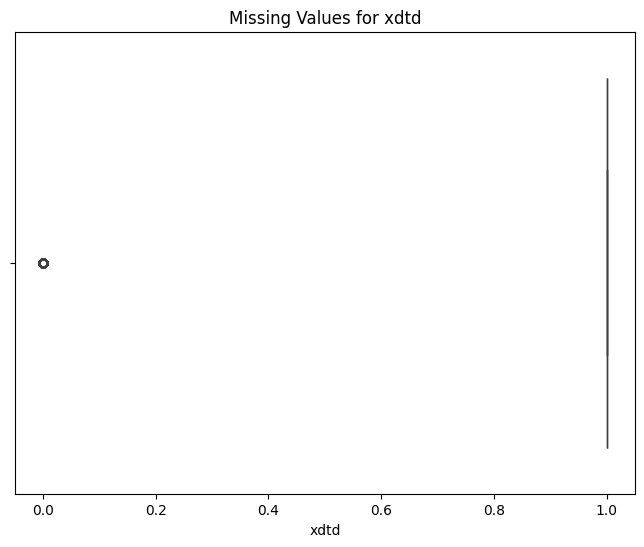

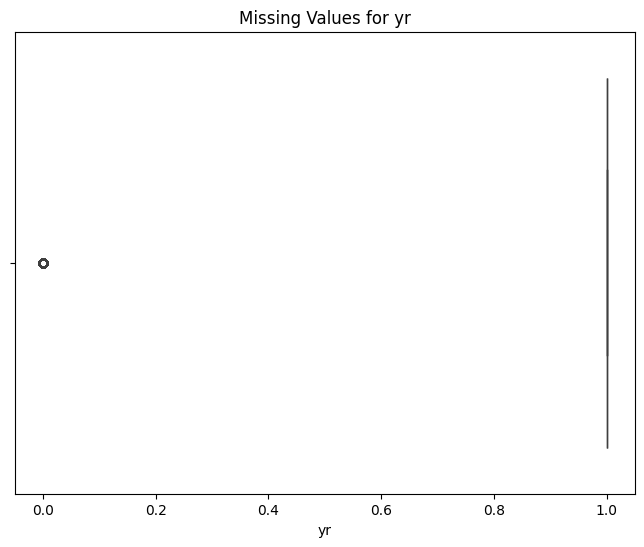

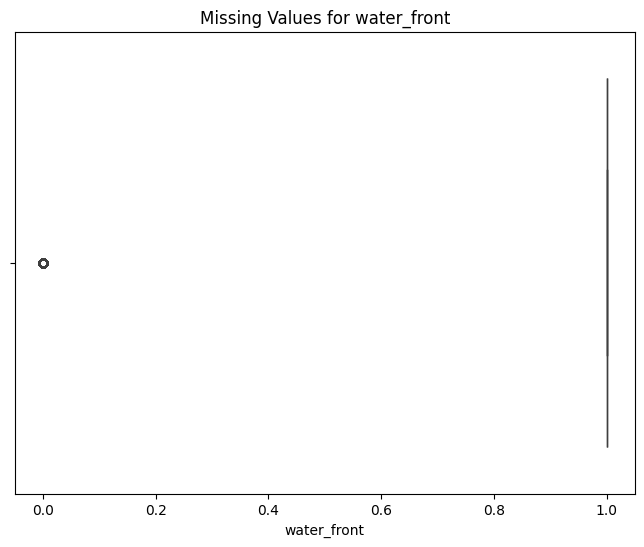

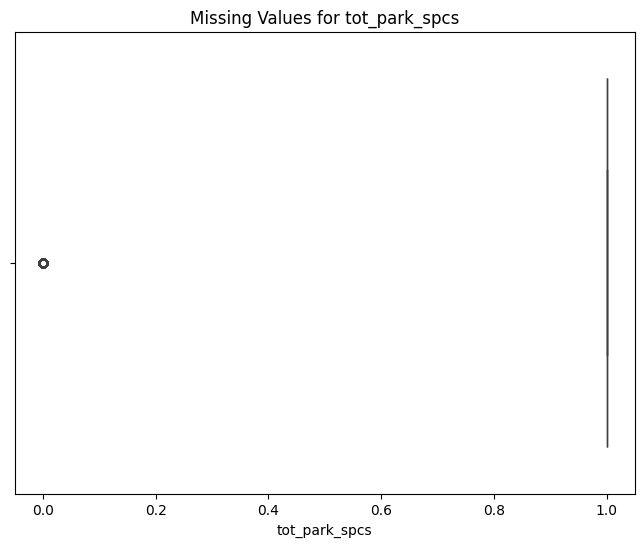

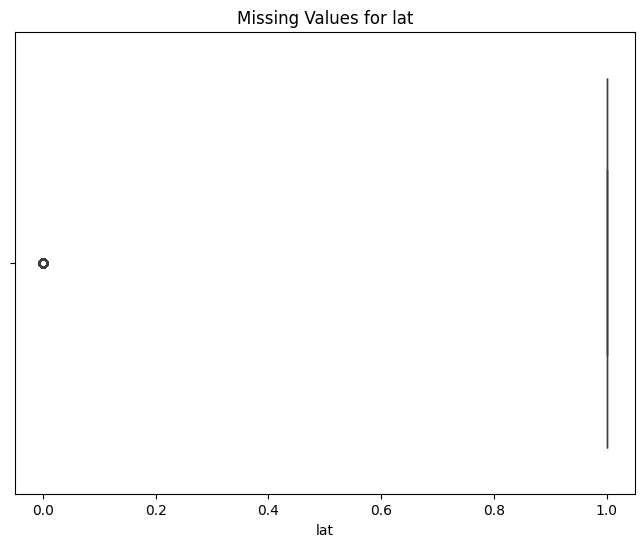

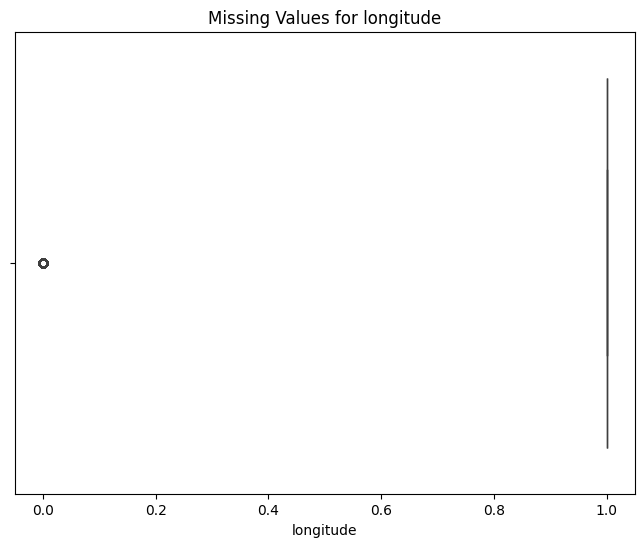

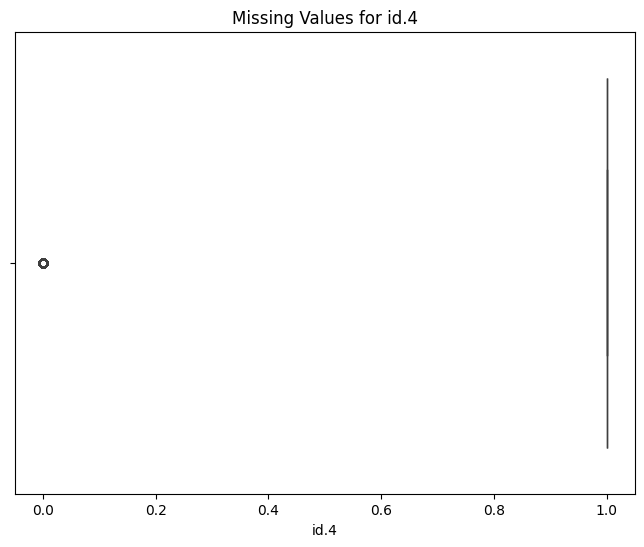

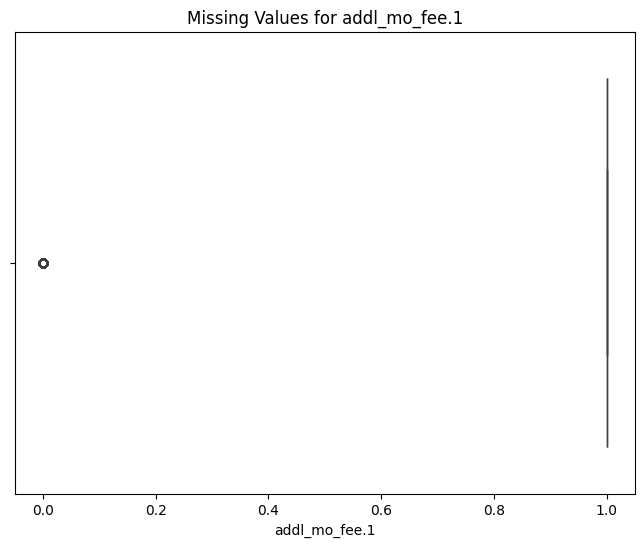

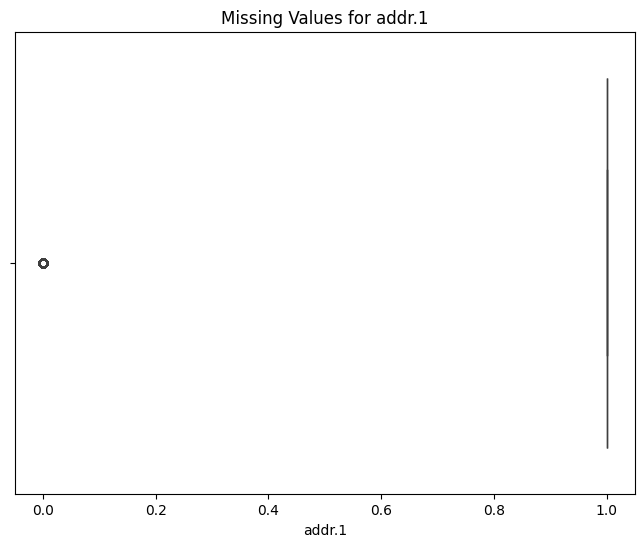

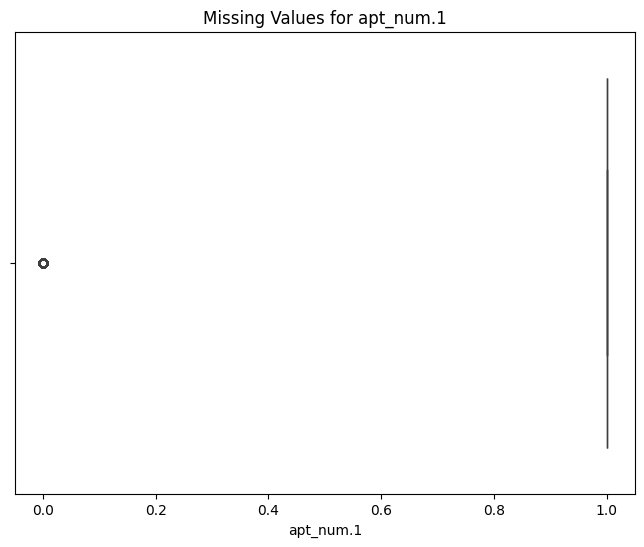

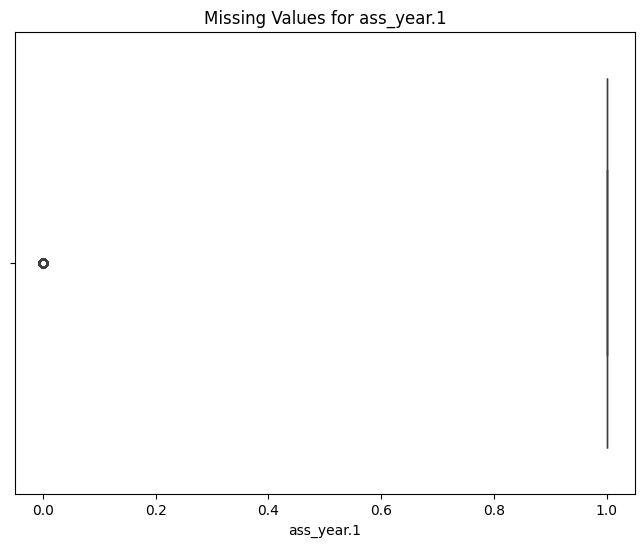

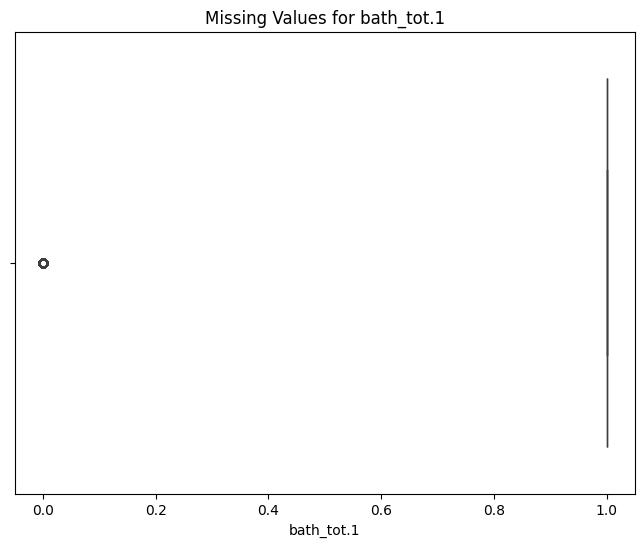

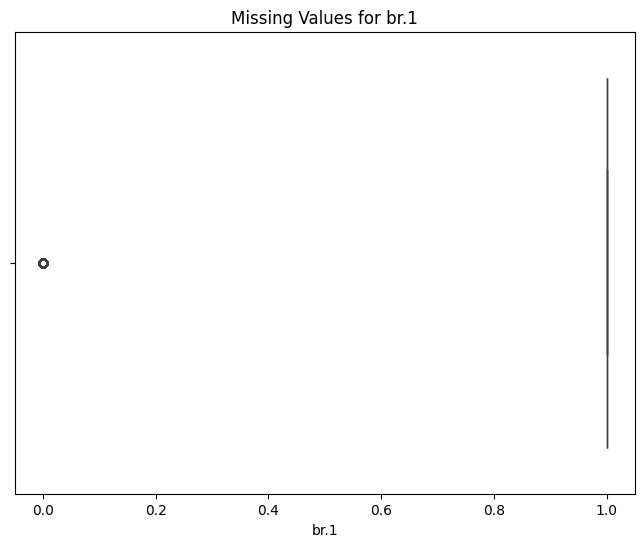

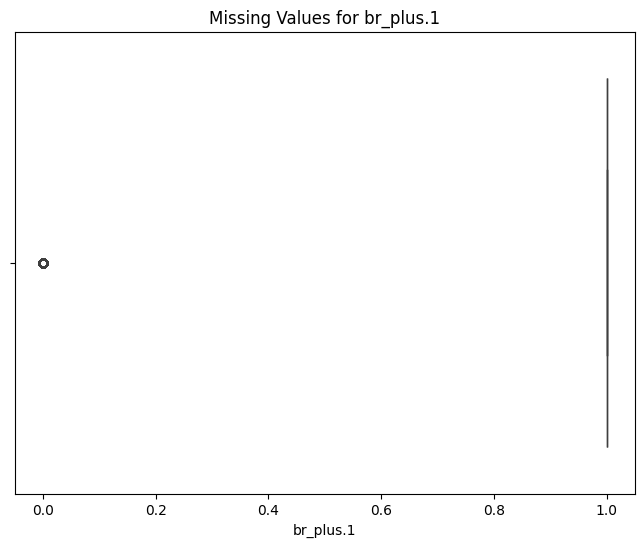

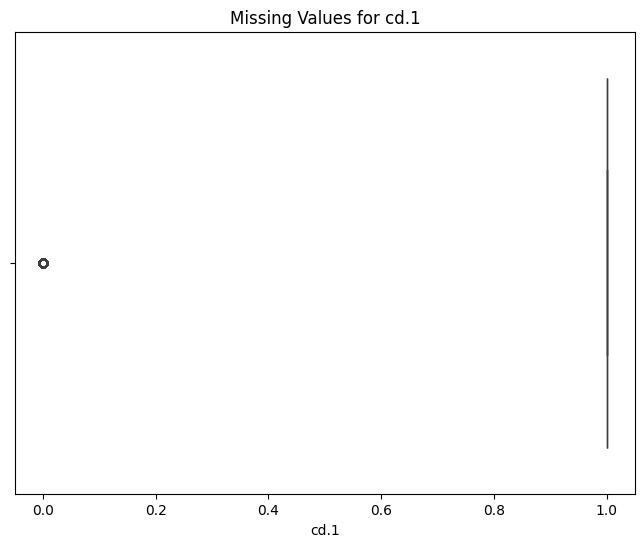

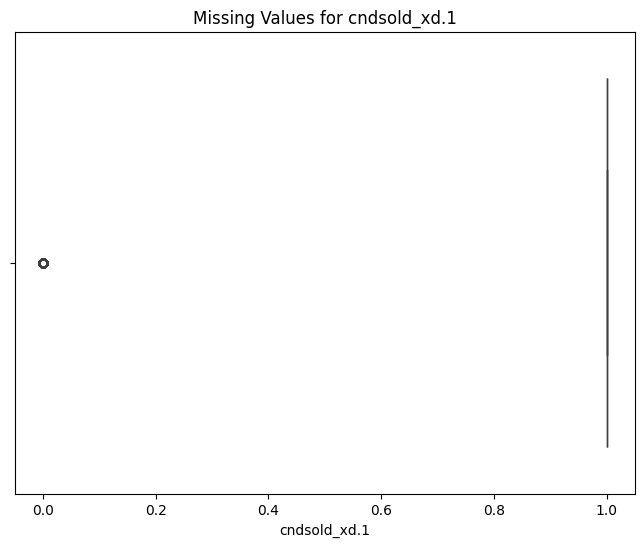

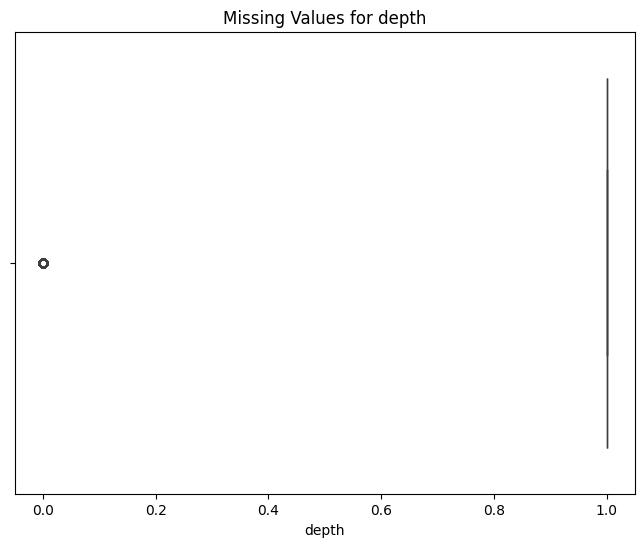

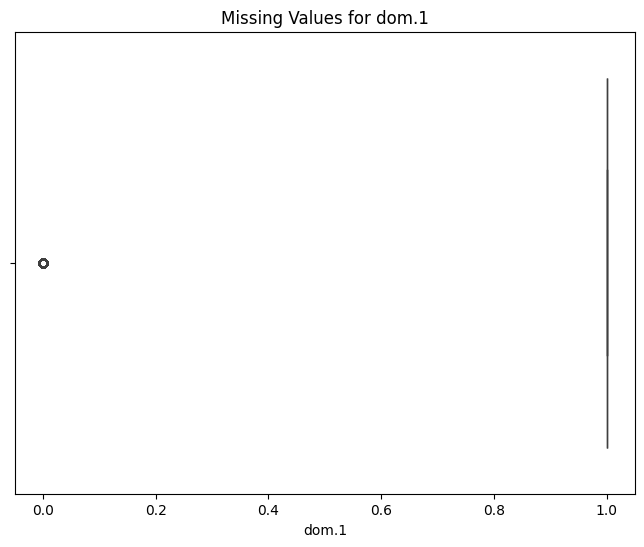

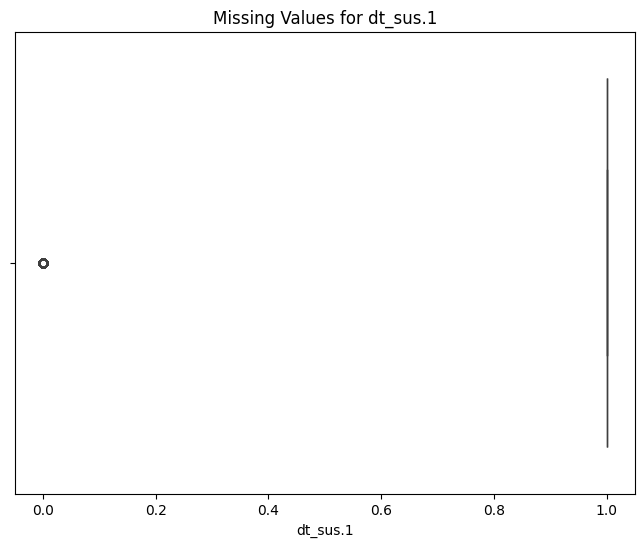

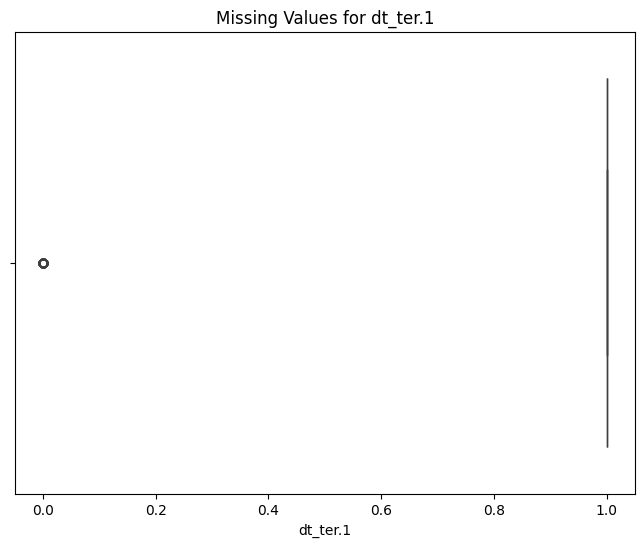

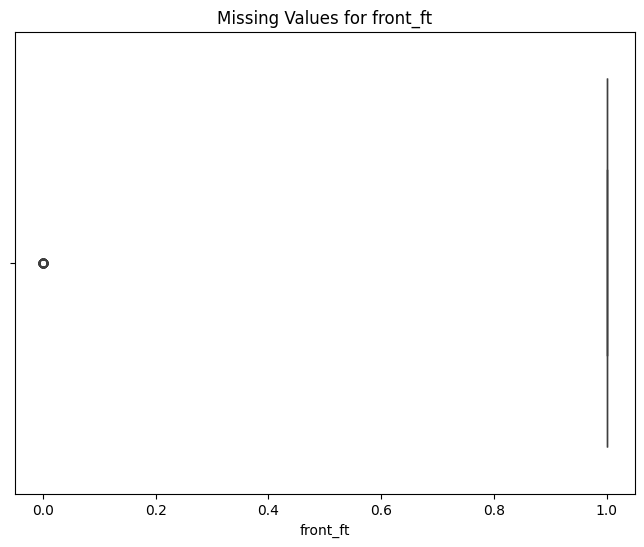

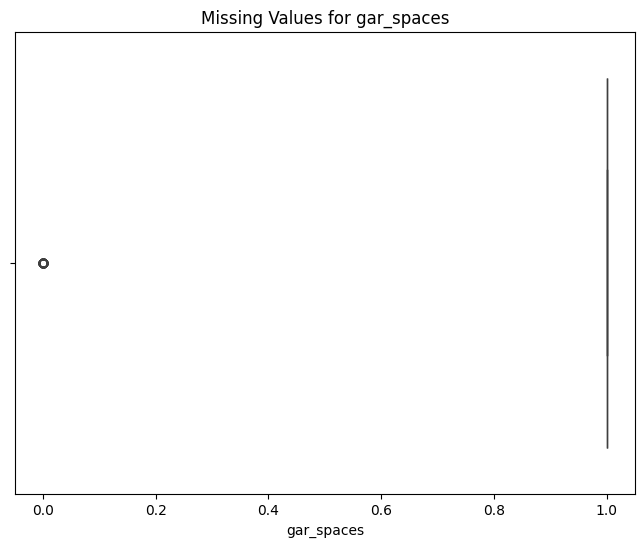

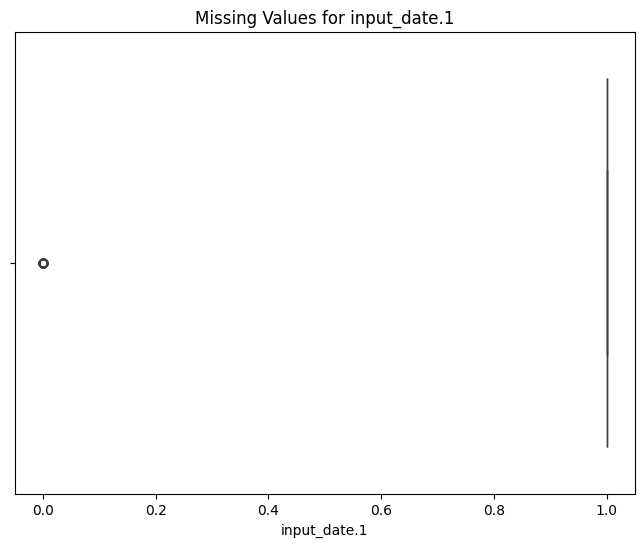

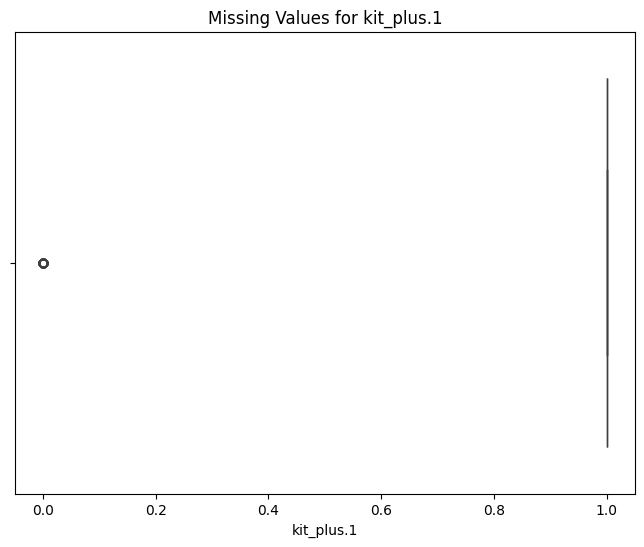

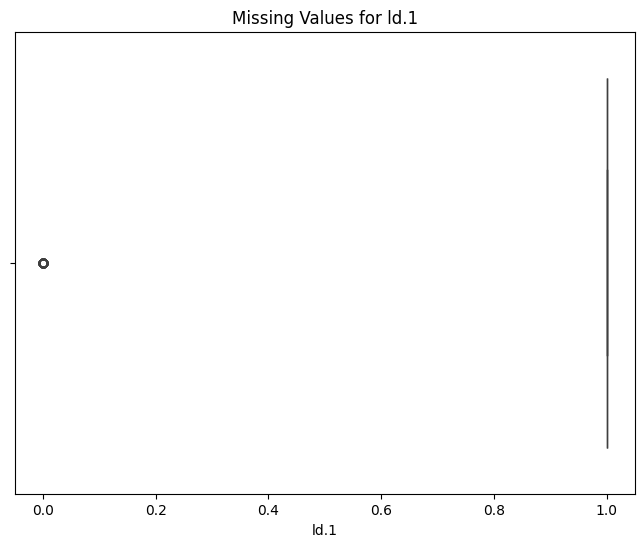

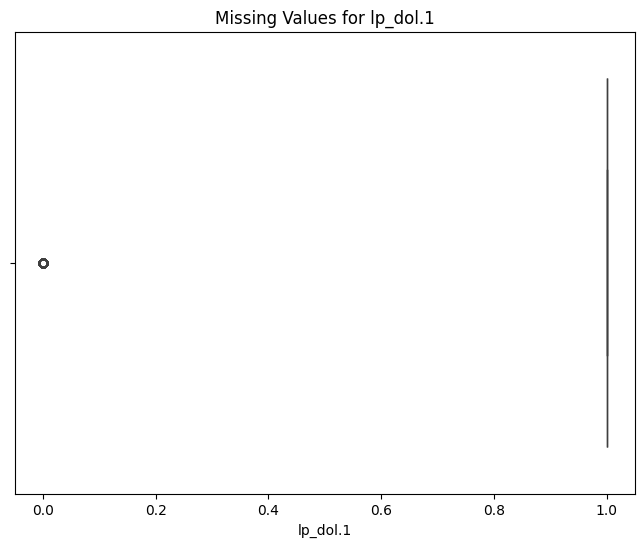

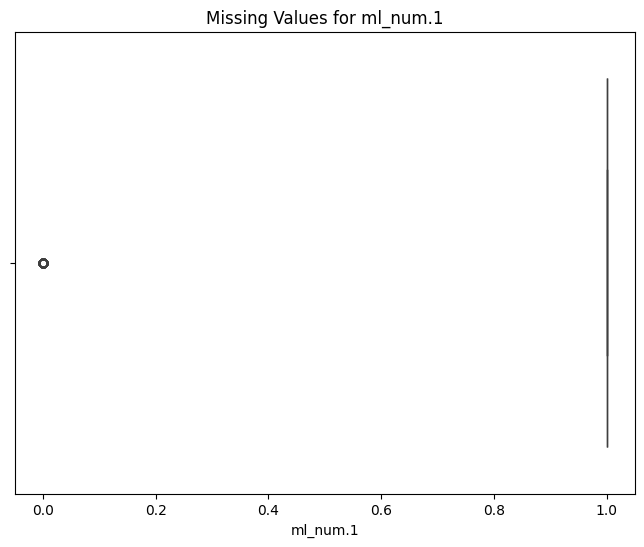

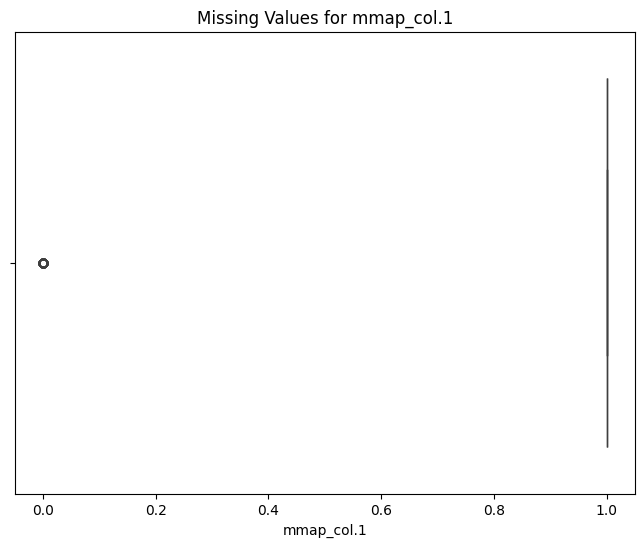

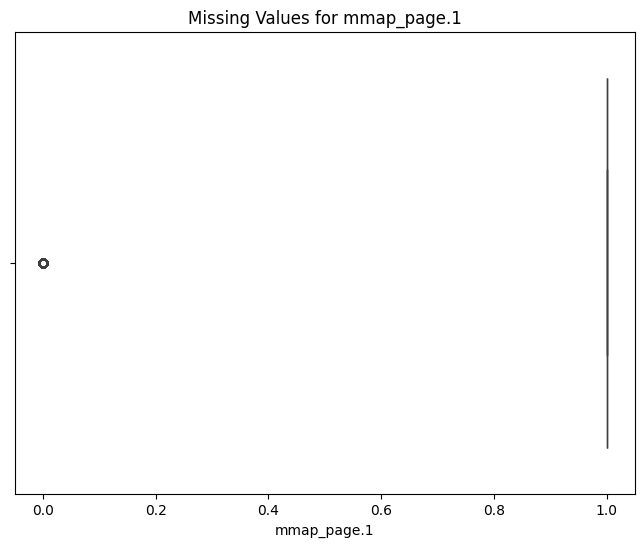

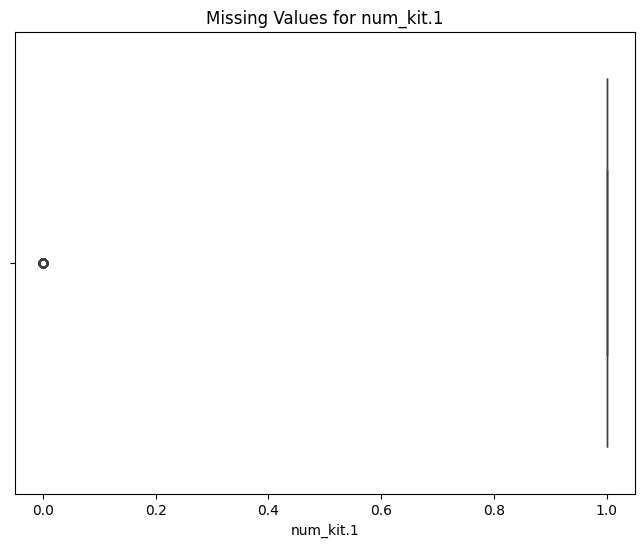

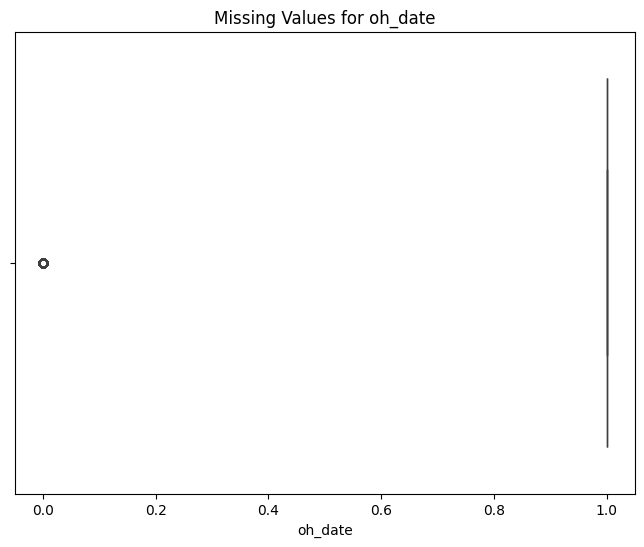

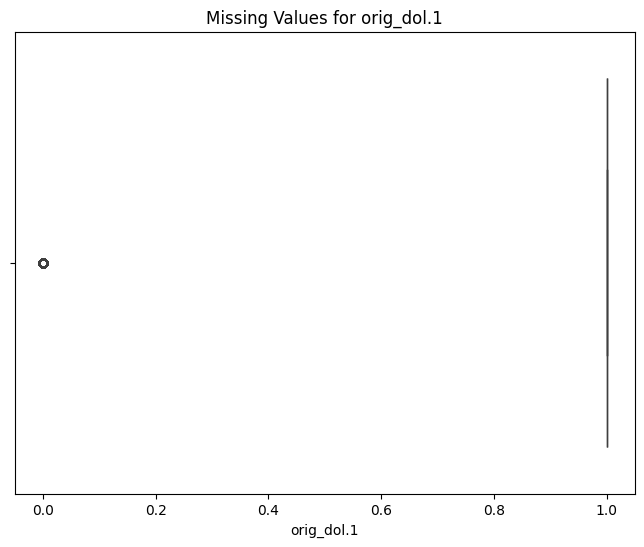

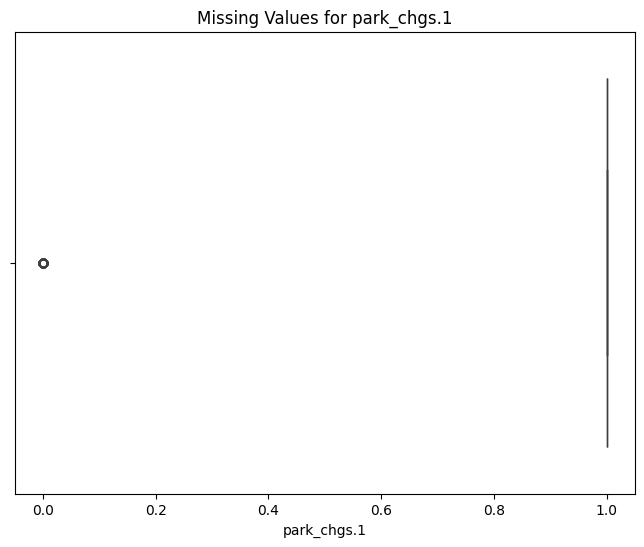

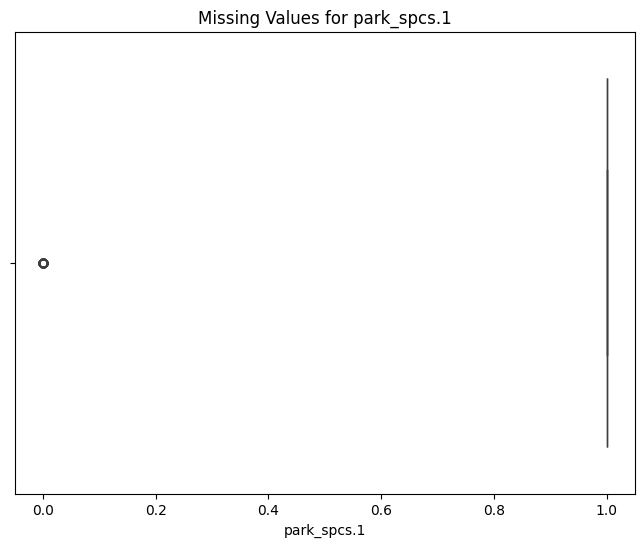

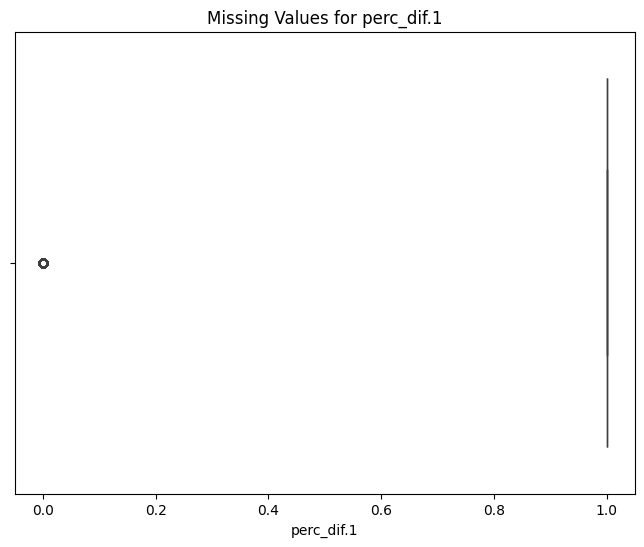

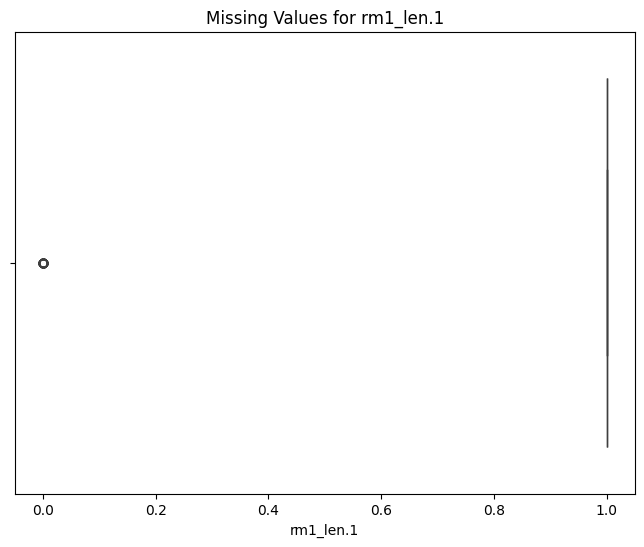

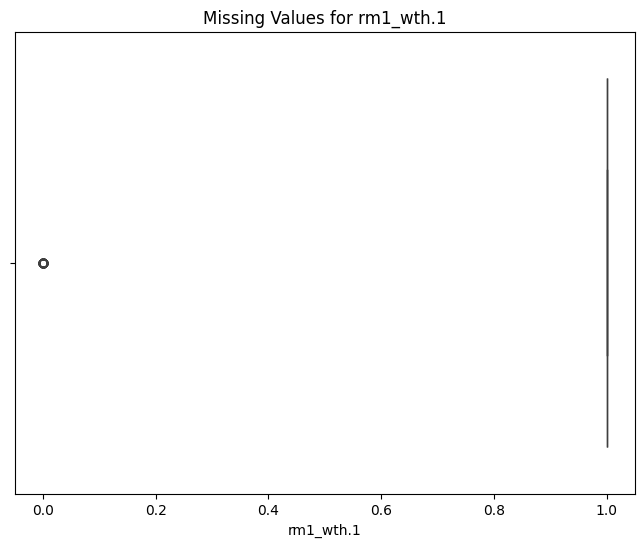

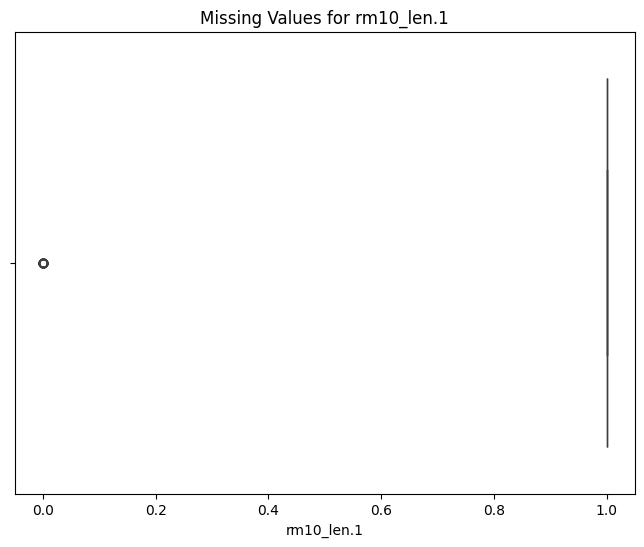

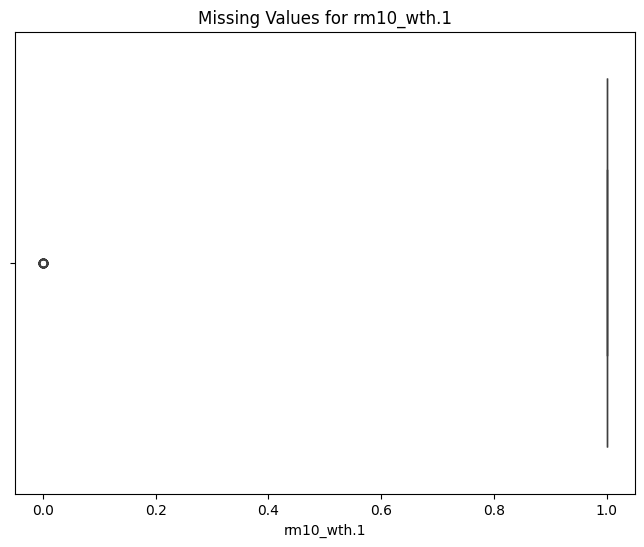

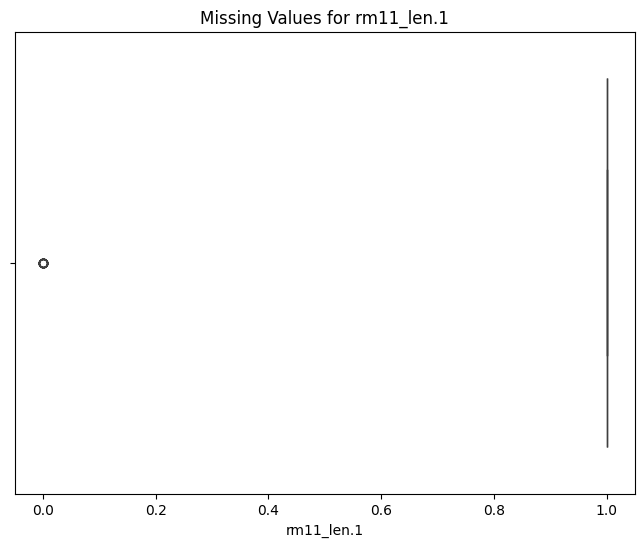

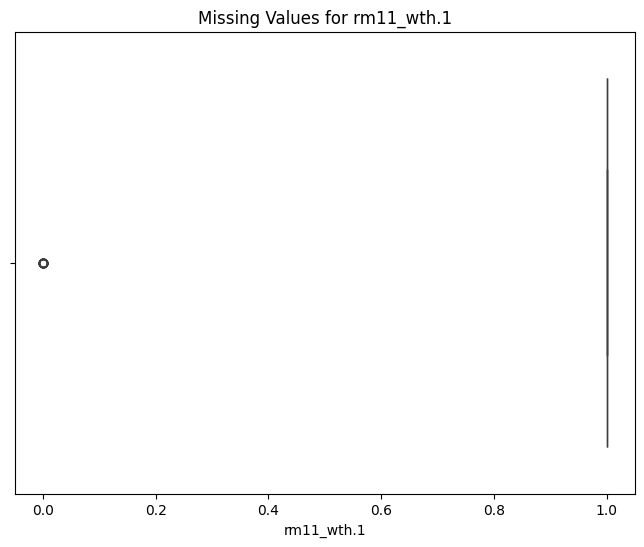

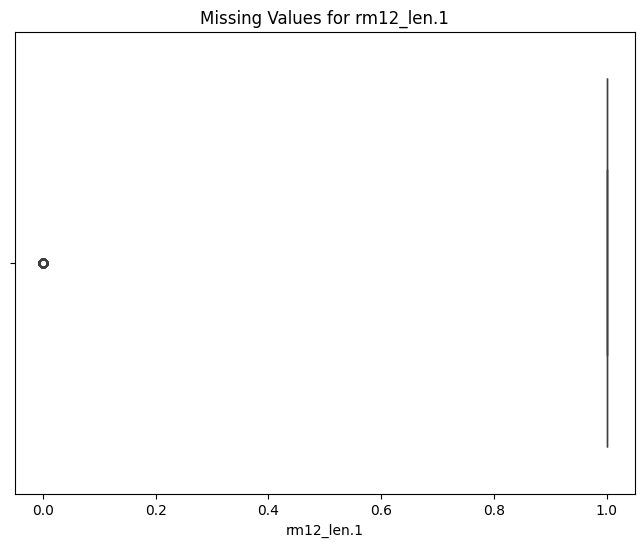

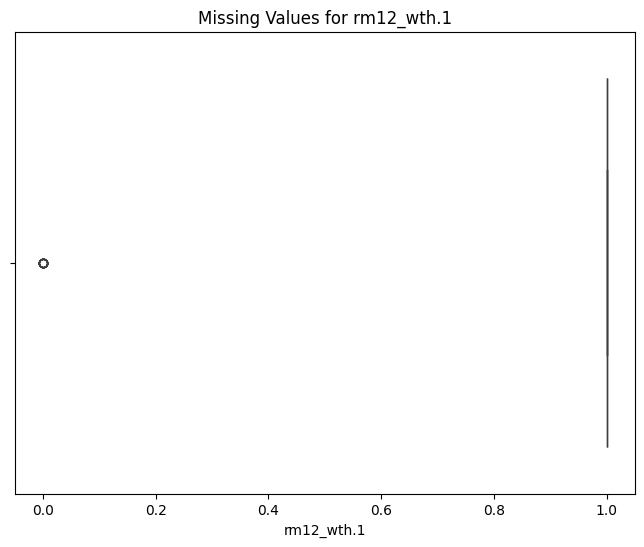

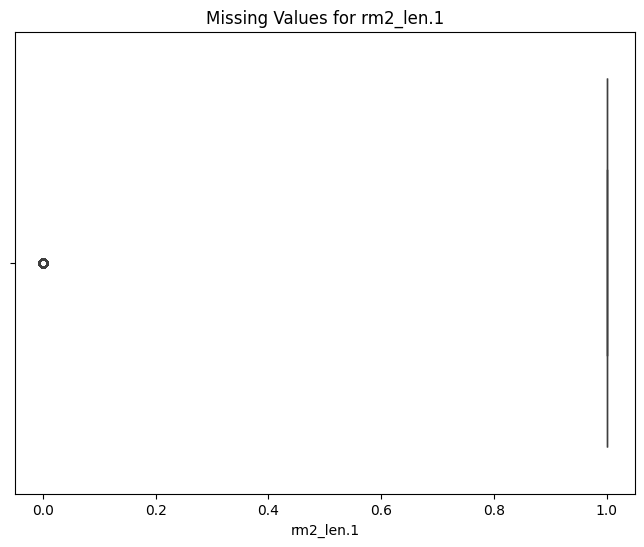

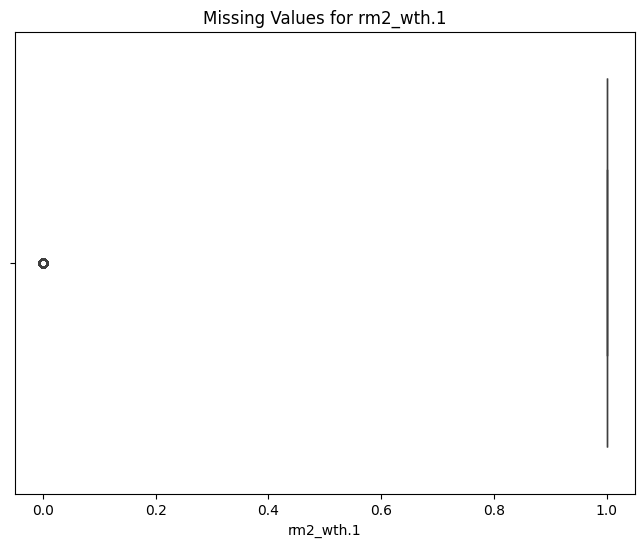

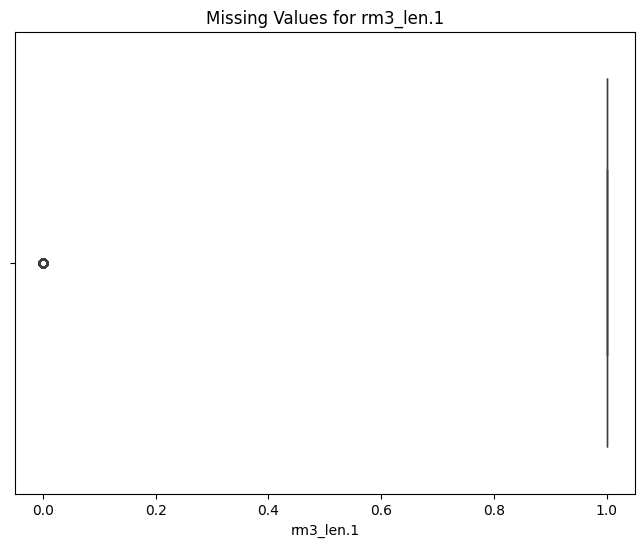

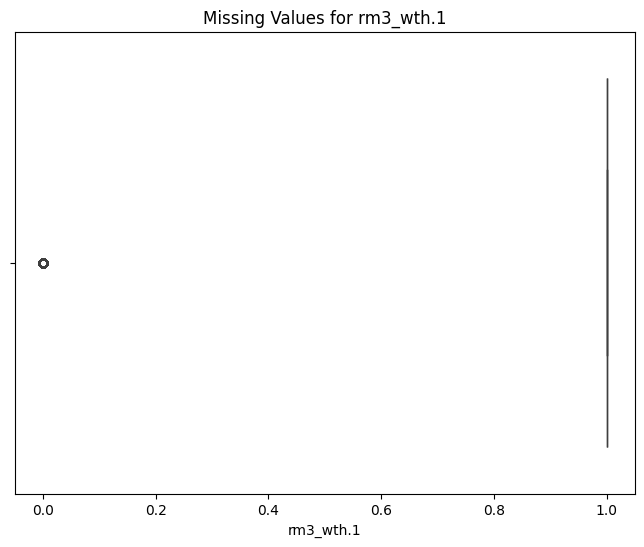

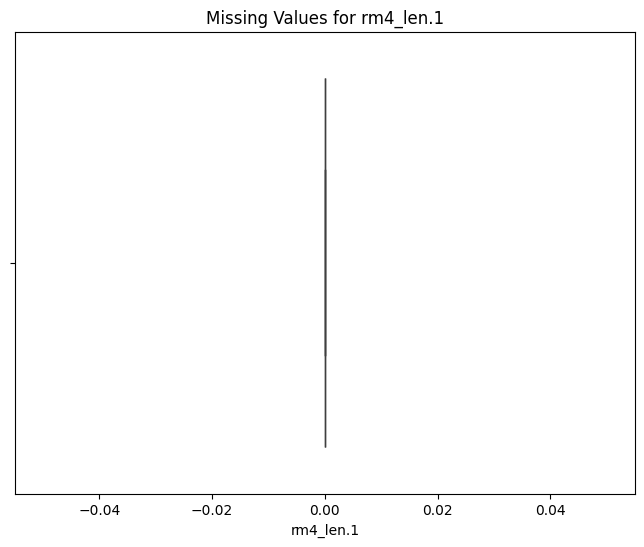

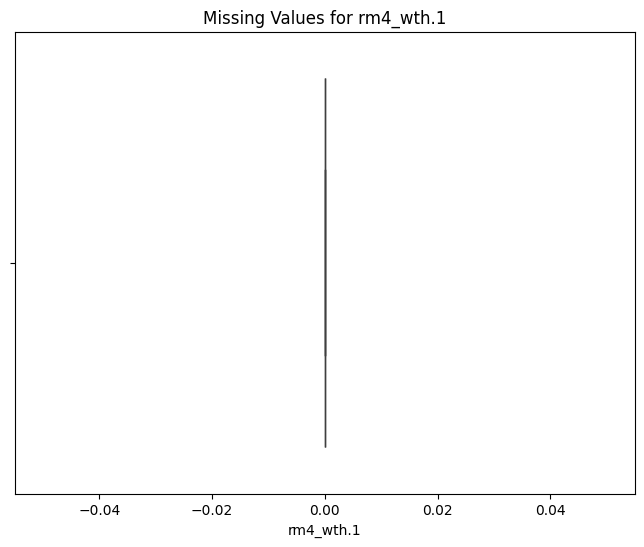

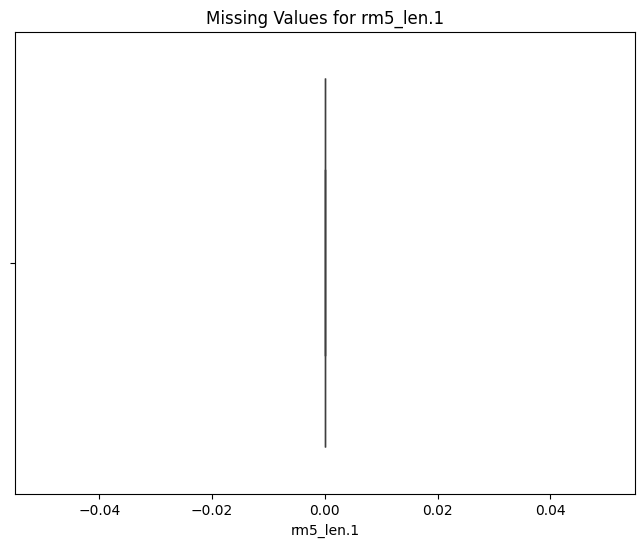

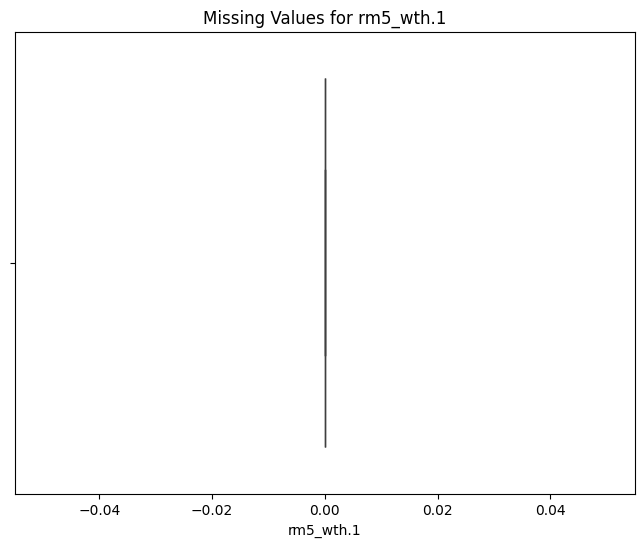

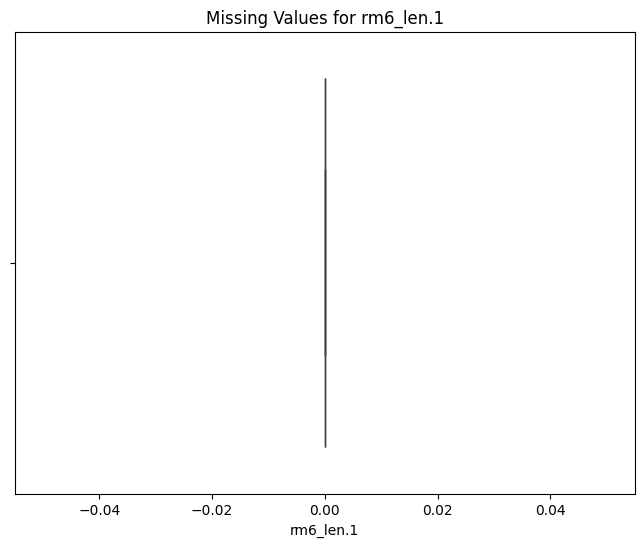

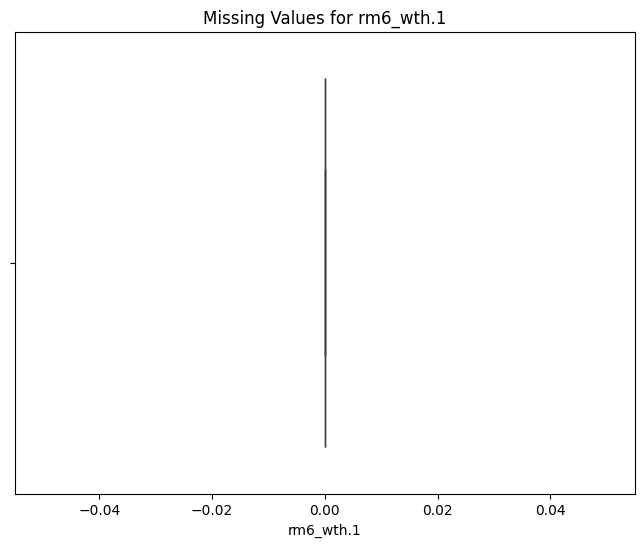

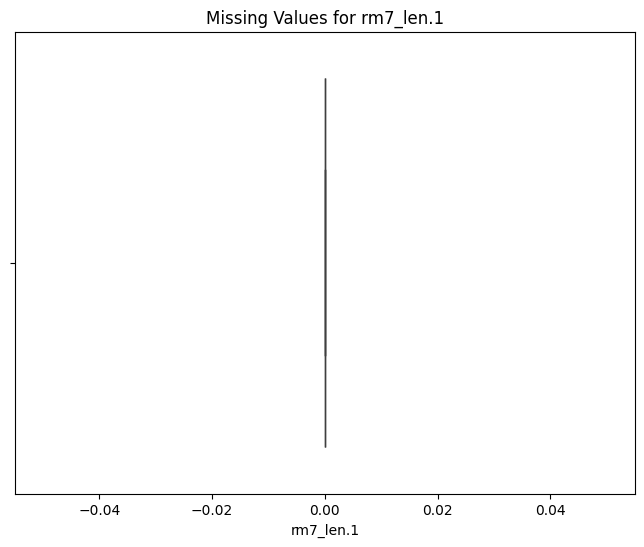

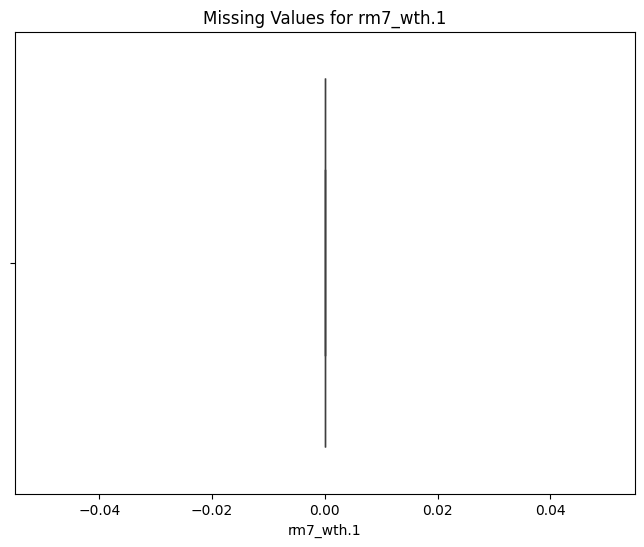

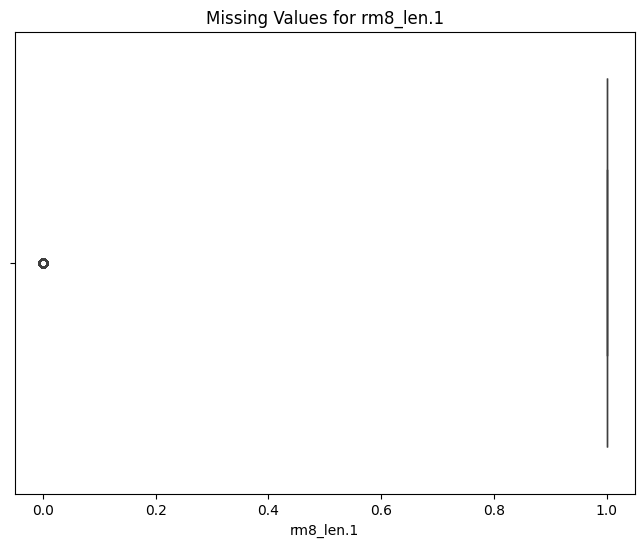

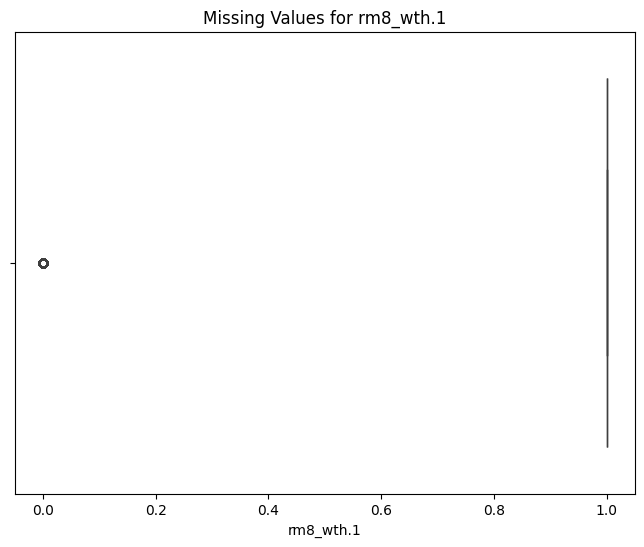

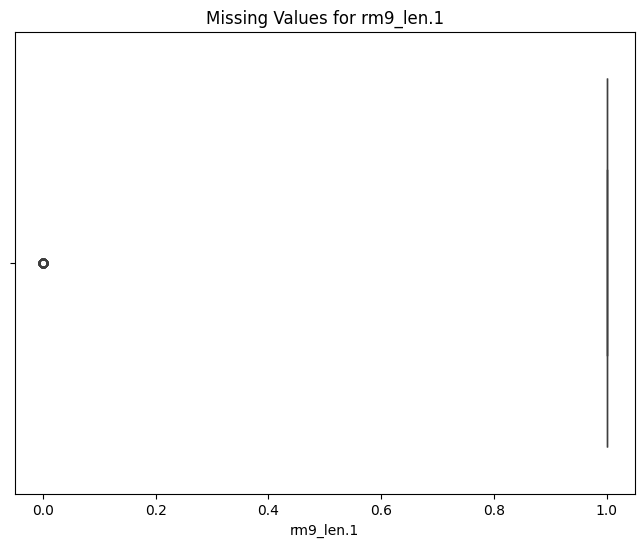

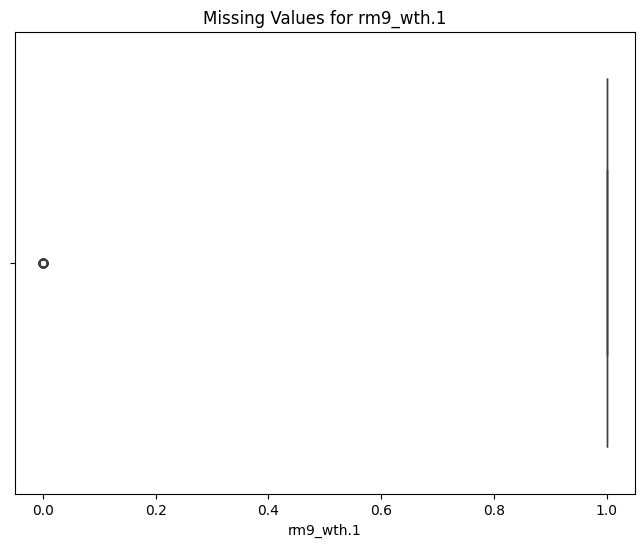

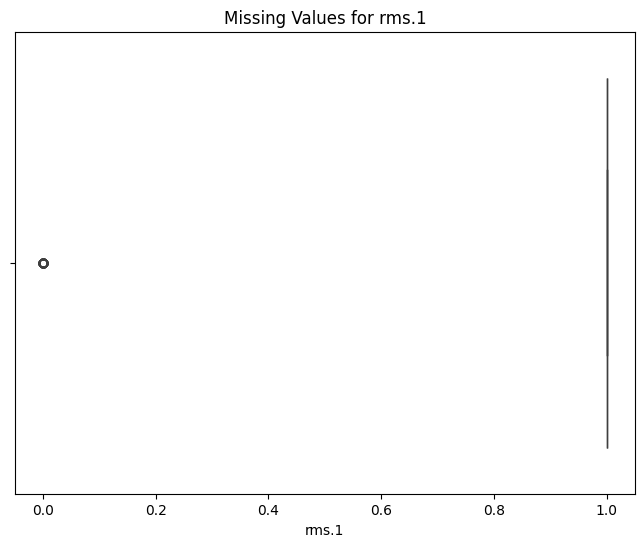

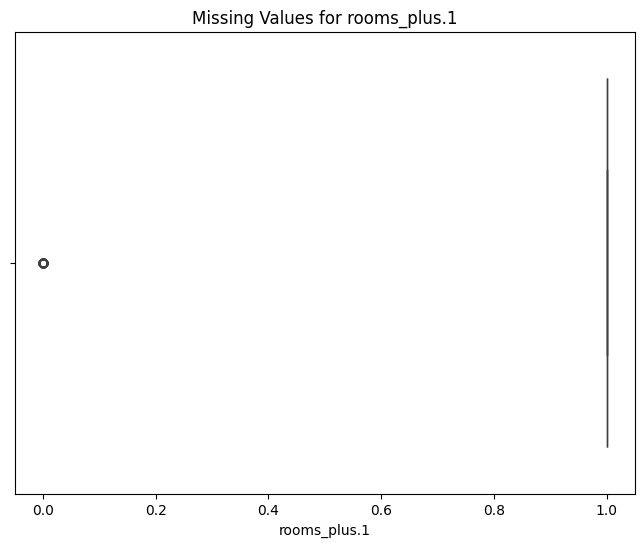

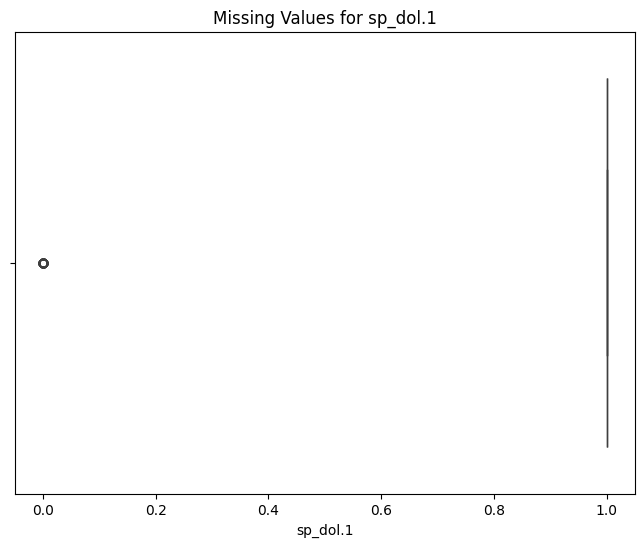

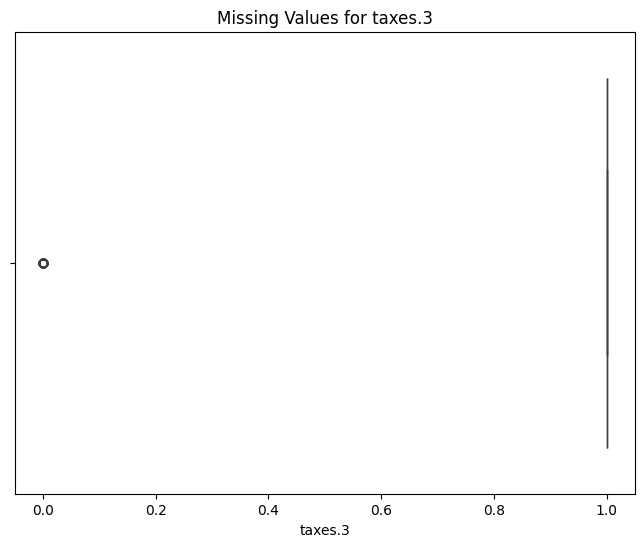

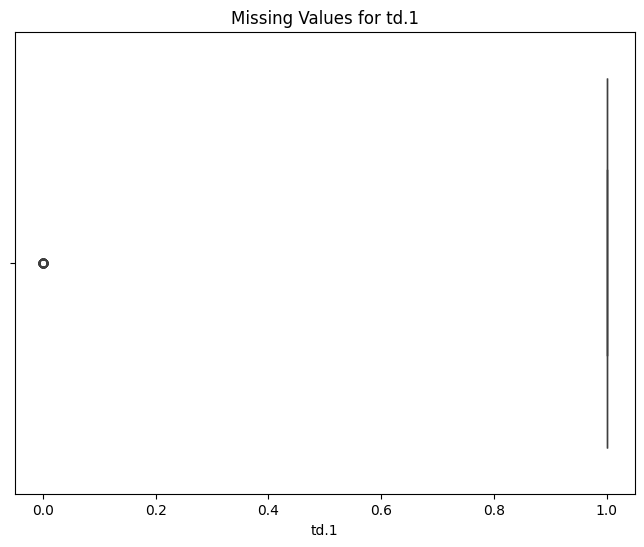

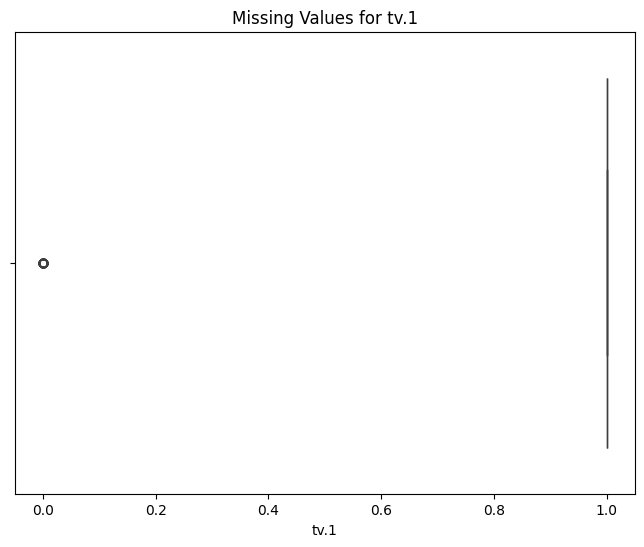

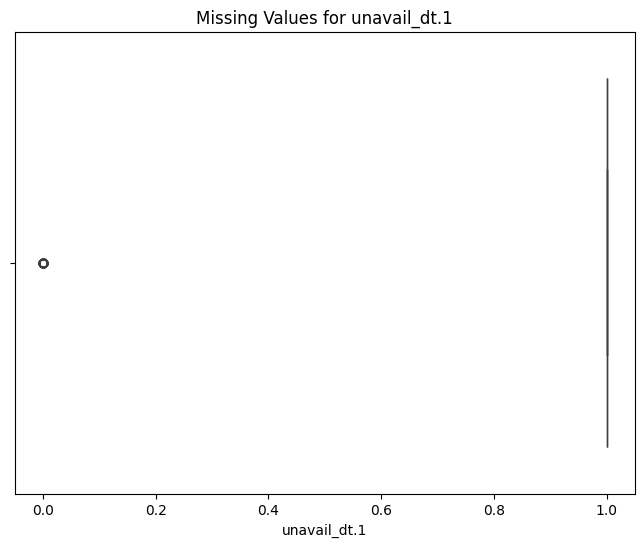

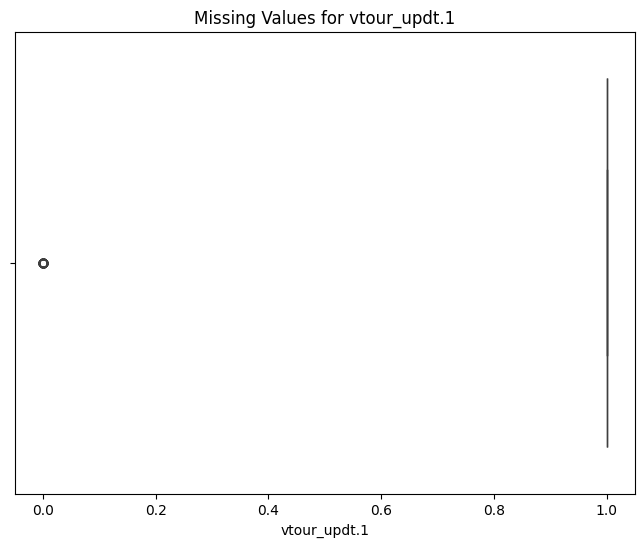

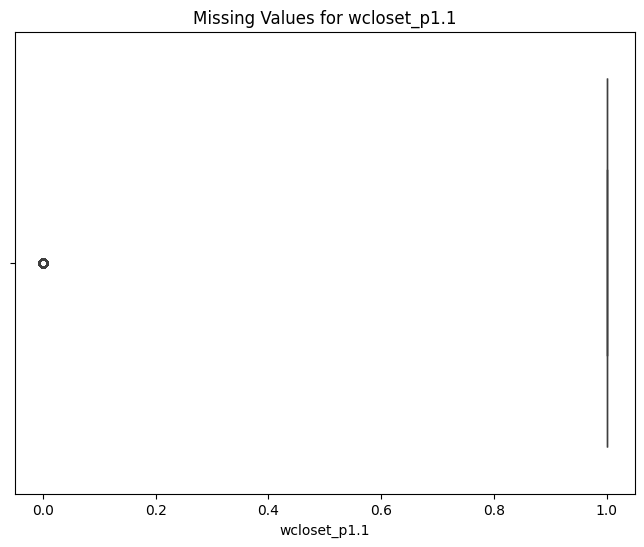

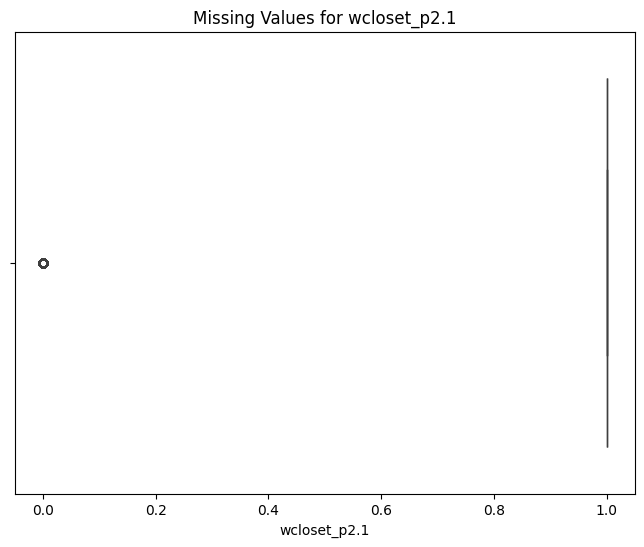

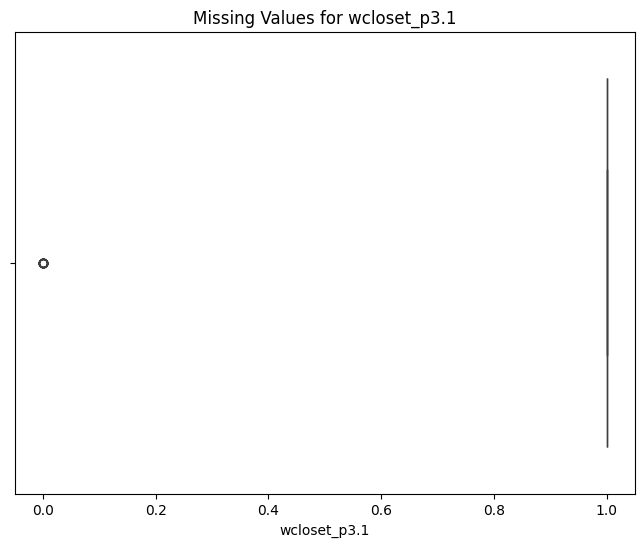

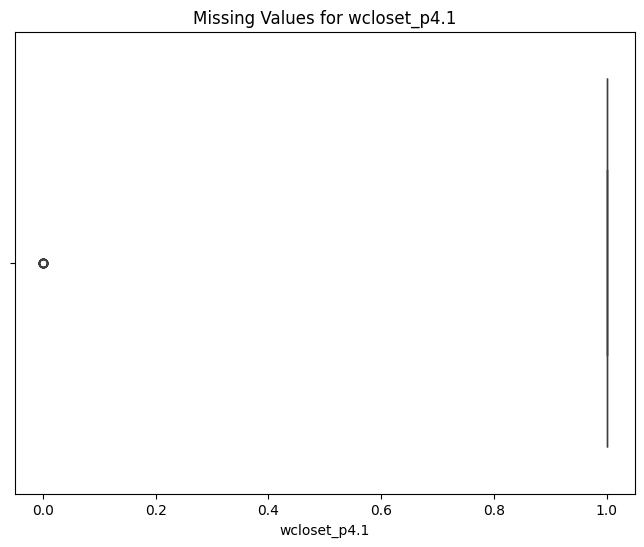

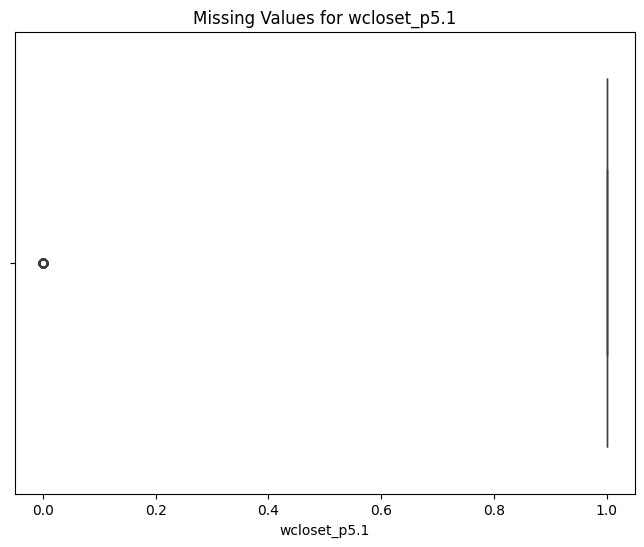

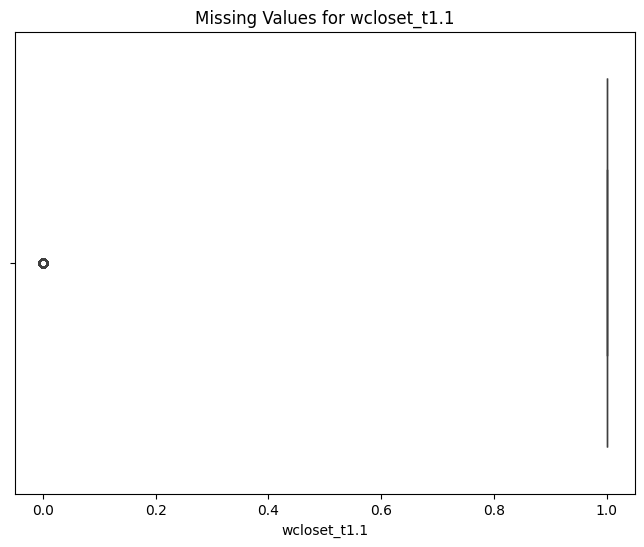

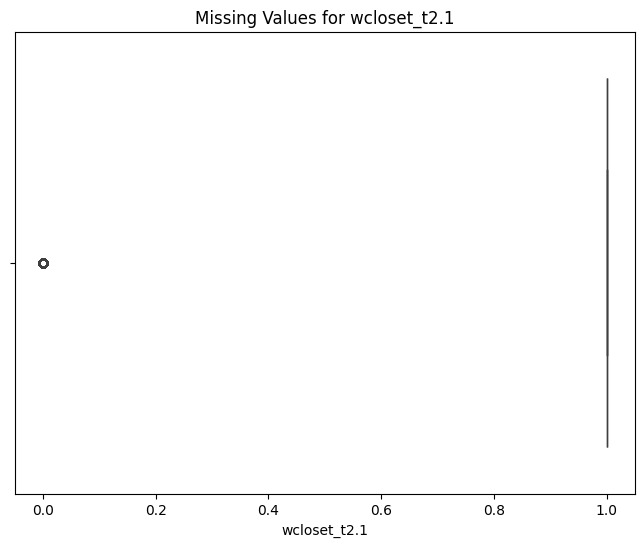

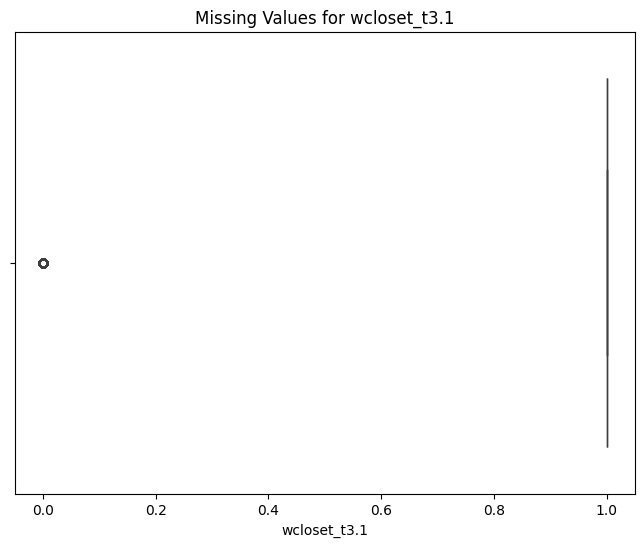

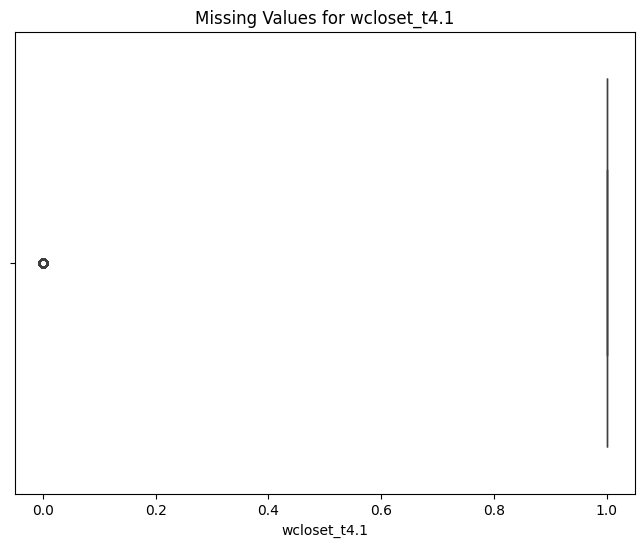

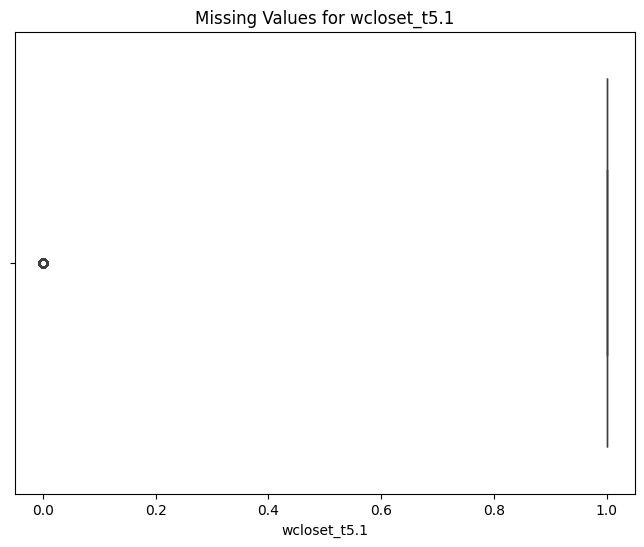

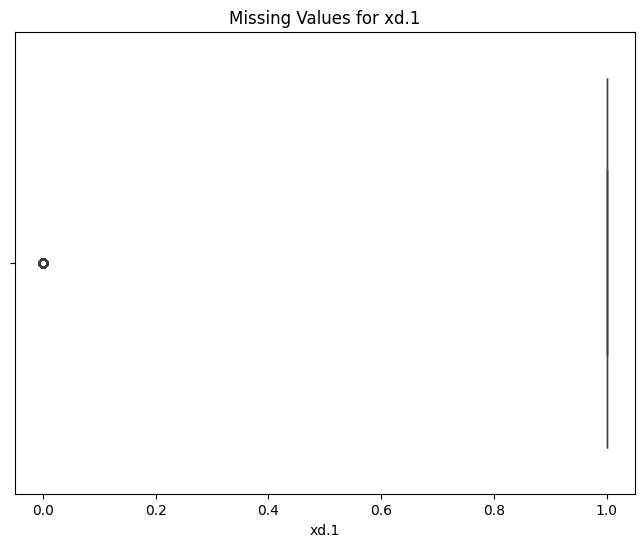

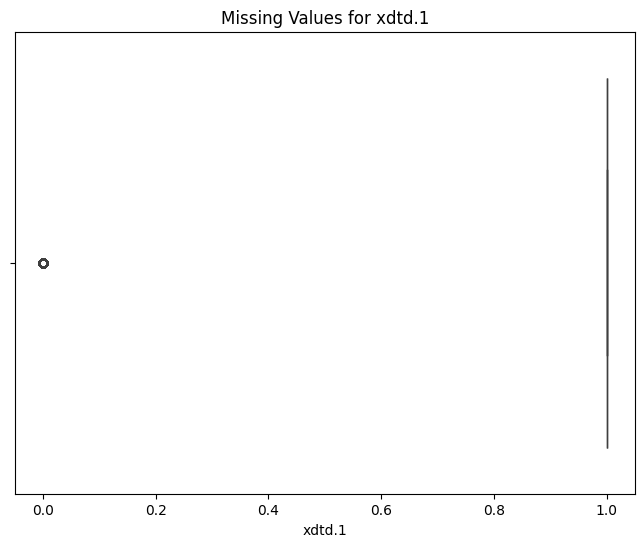

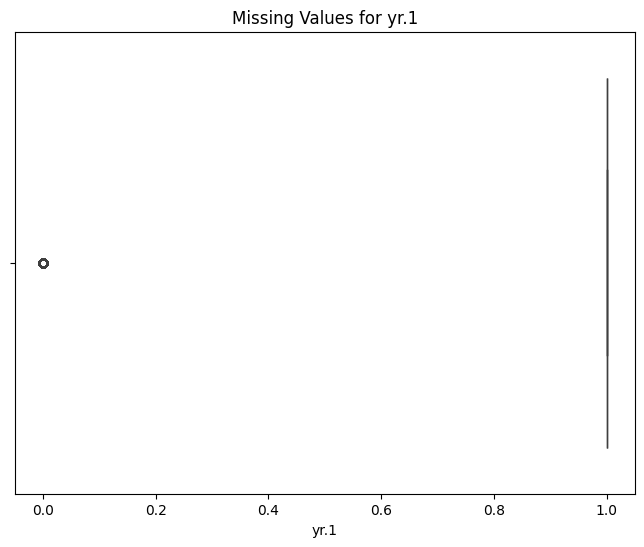

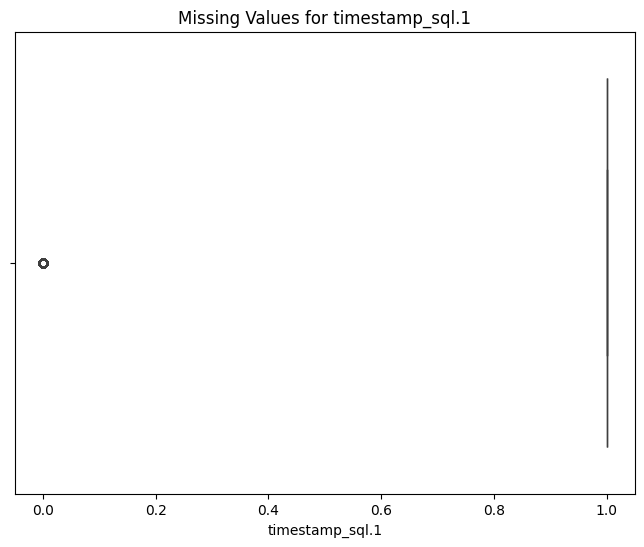

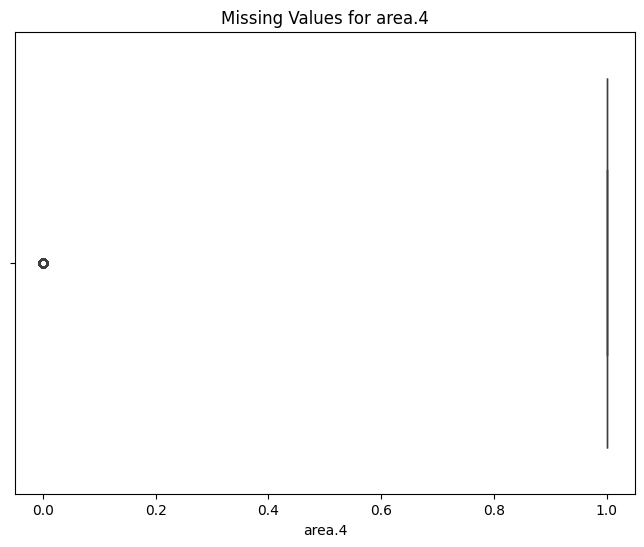

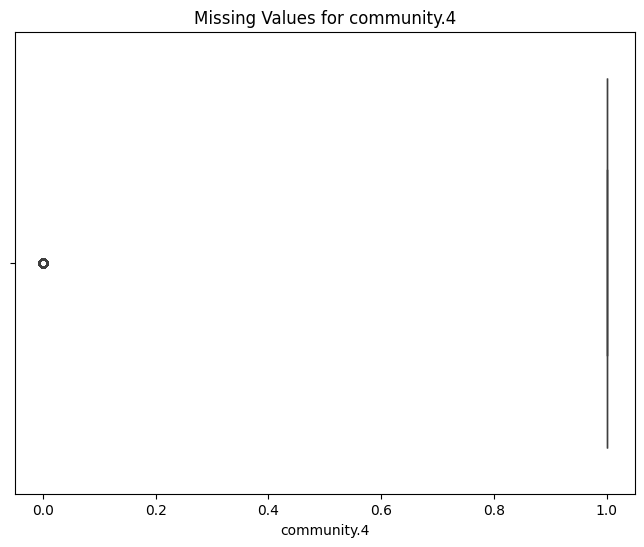

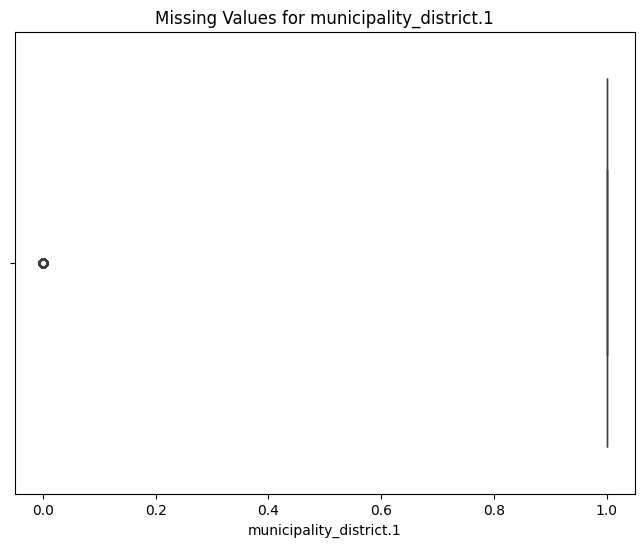

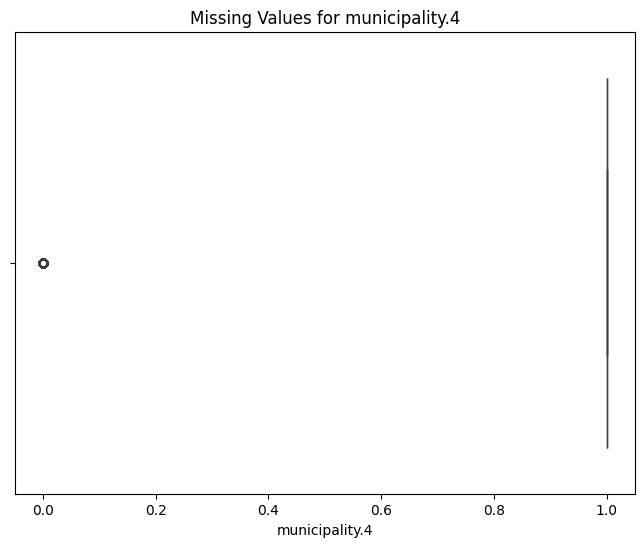

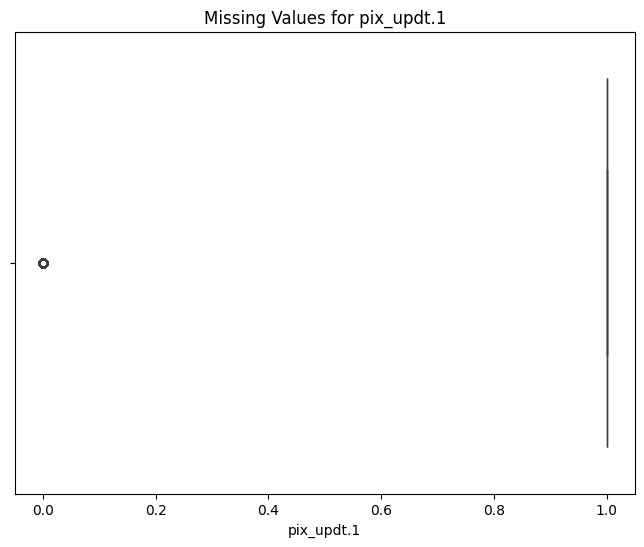

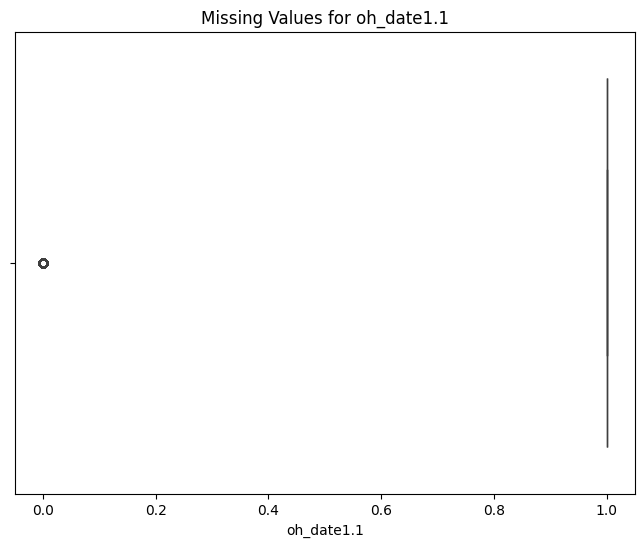

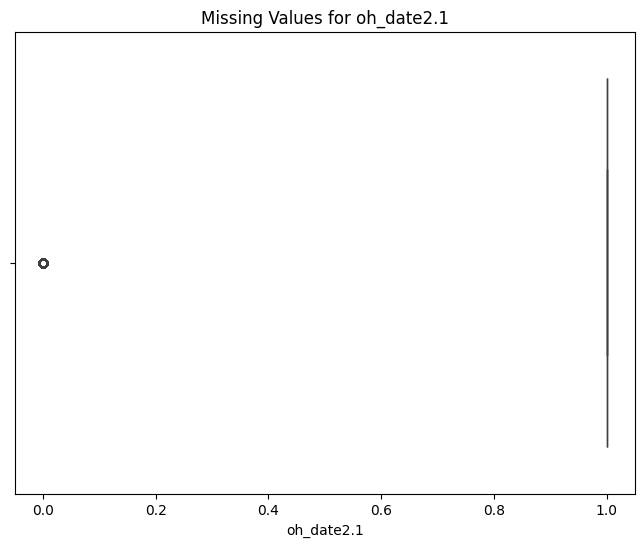

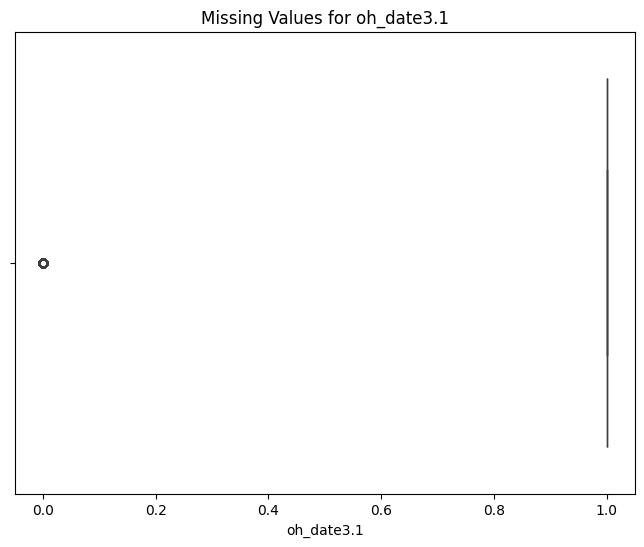

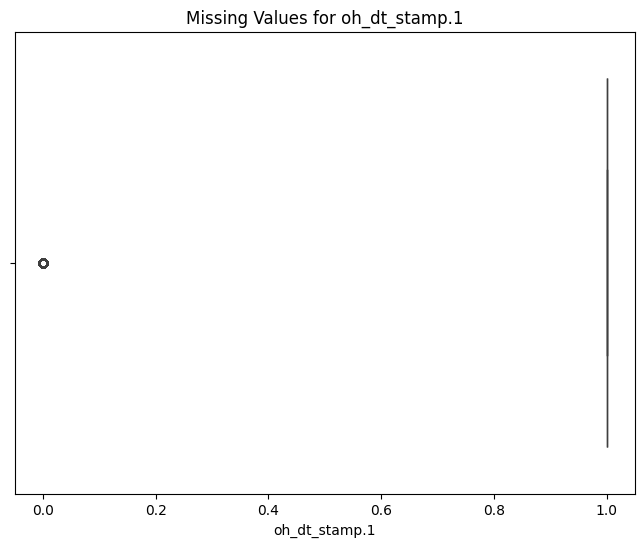

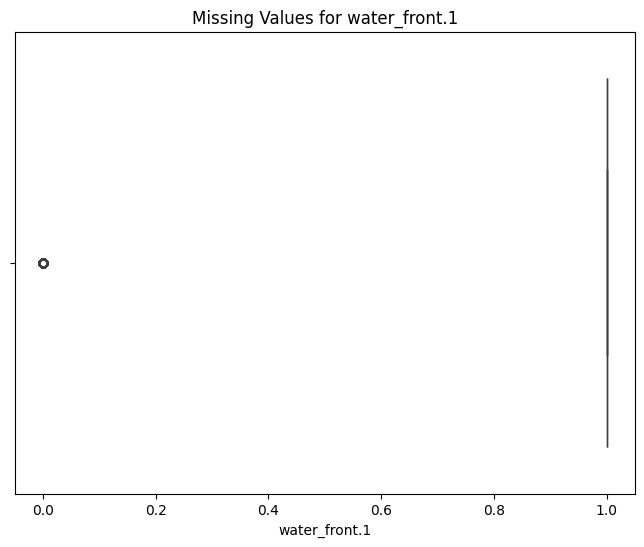

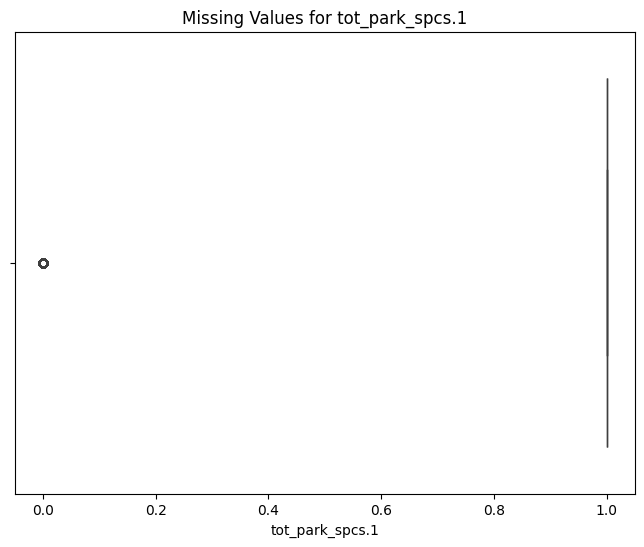

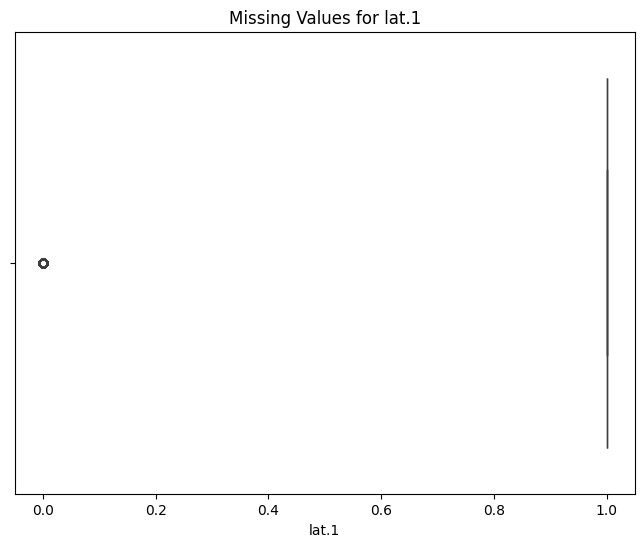

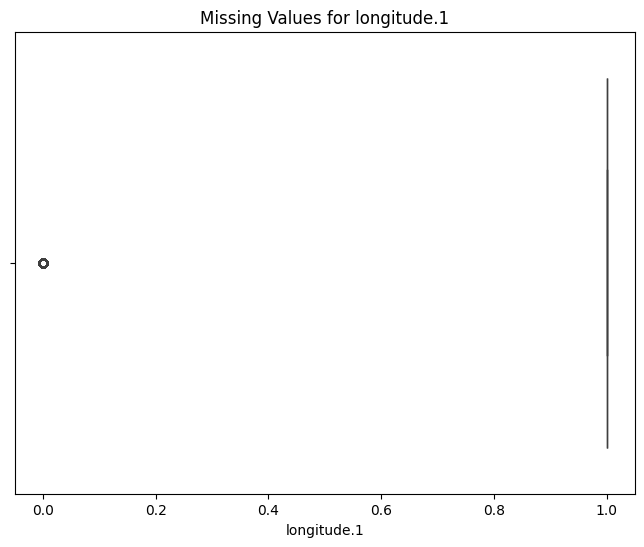

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cleaned_data' is your DataFrame and you want to check outliers for numeric columns
numeric_cols = cleaned_data.select_dtypes(include=['number']).columns

# Create box plots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(x=cleaned_data[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.show()

# To visually check for missing values using box plots (indirectly):
# Create a new column indicating missing values
for col in cleaned_data.columns:
    cleaned_data[col + '_missing'] = cleaned_data[col].isnull()

# Create box plots for the missing value indicator columns
missing_cols = [col for col in cleaned_data.columns if col.endswith('_missing')]
for col in missing_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=cleaned_data[col])
    plt.title(f'Missing Values for {col[:-8]}')  # Remove '_missing' from title
    plt.xlabel(col[:-8])  # Remove '_missing' from x-axis label
    plt.show()

In [ ]:


# Assuming 'property_data' is your DataFrame and 'sold_price' is your target variable

# Define features (X) and target (y)
X = cleaned_data.drop('sold_price', axis=1)  # Features: all columns except 'sold_price'
y = cleaned_data['sold_price']  # Target: 'sold_price' column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (100056, 735)
X_test shape: (25014, 735)
y_train shape: (100056,)
y_test shape: (25014,)


In [ ]:
# Assuming 'cleaned_data' is your DataFrame

# Convert 'garage_spaces' column to numeric, handling errors
cleaned_data['garage_spaces'] = pd.to_numeric(cleaned_data['garage_spaces'], errors='coerce')

# Fill NaN values resulting from conversion errors (if any)
cleaned_data['garage_spaces'] = cleaned_data['garage_spaces'].fillna(cleaned_data['garage_spaces'].mean())

# Re-split the data into training and testing sets
X = cleaned_data.drop('sold_price', axis=1)  # Features: all columns except 'sold_price'
y = cleaned_data['sold_price']  # Target: 'sold_price' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, you can train the model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

TypeError: Cannot cast DatetimeArray to dtype float64

In [ ]:
baseline_model=LinearRegression()
baseline_model.fit(X_train,y_train)



ValueError: could not convert string to float: '0-5'